# Assessing the relative impact of relevant indicators on Maternal Health in Bangladesh

## Summary of Project

The aim of this project was to collect data relevant to maternal health in Bangladesh from publicly available sources, clean the data, and then visualise this data through a variety of methods.

The code presented here is separated into three main parts: data collection, data processing and data analysis. 

## Step One: Data Collection

In [1]:
#Firstly, import all necessary libraries for webscraping
from bs4 import BeautifulSoup
import re
from selenium import webdriver
from time import sleep
from random import randint
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from collections import Counter
import pandas as pd
import numpy as np

#libraries needed for visualisation
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

#Libraries required for a principal component analysis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

### Collecting data from the 2015 Health Bulletin

Firstly, I define the necessary functions required to webscrape from the 2015 Bangladesh Health Bulletin, which can be accessed here: https://app.dghs.gov.bd/localhealthBulletin2015/publish/graph/?level=UHS

Several functions are required for each separate health indicator due to how the website has been built. 

In [18]:
#Function for retrieving maternal health data

def search_query_mh(x,y):
    
    #Create empty lists for regions and total of measure
    regions = []
    count = []

    #Create empty dictionary to store the lists in 
    dictionary = {}
    
    for district in districts:
      
    #Found elements using their xpath
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/a/div/b').click()
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
        
    #Add in sleeps so website is not overloaded and it looks more like a human interacting with website
        sleep(1)

    ##Enter in Indicator Group
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)                
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
        sleep(1)
    
    #Enter in Indicator
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[7]/div[2]/a/div/b').click()
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[7]/div[2]/div/div/input').send_keys(y)
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[7]/div[2]/div/div/input').send_keys(Keys.RETURN)
        sleep(1)
    
    #Submit    
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[11]/input').send_keys(Keys.RETURN)
        sleep(1)
    
    ##Show all results
        browser.find_element_by_xpath('/html/body/div[2]/div/div/div[2]/div/div/div/div[3]/div/div/div/div/div[1]/div[1]/div[2]/label/select').click()
        browser.find_element_by_xpath('/html/body/div[2]/div/div/div[2]/div/div/div/div[3]/div/div/div/div/div[1]/div[1]/div[2]/label/select/option[4]').click()
    
    ## Locate Table
        html_source = browser.page_source

        soup = BeautifulSoup(html_source, 'html.parser')

        table = soup.find(lambda tag: tag.name=='table' and tag.has_attr('id') and tag['id']=="dt_a")
        
    #Note, need to change look-up value depending on health indicator i.e. 'Total' or 'MMR'
        results = get_table(table, 'MMR')
        
    #Append Regions to list
        regions.append(results[0])
        
    #Append Total to list
        count.append(results[1])
        
    #Now need to make list of lists into one list
    regions_list = [item for sublist in regions for item in sublist]
    count_list = [item for sublist in count for item in sublist]
    
    #Some sub-districts have the same name so need to rename locations with number if this is the case
    regions_list = [v + str(regions_list[:i].count(v) + 1) if regions_list.count(v) > 1 else v for i, v in enumerate(regions_list)]
    
    #Write these lists to a dictionary
    dictionary = dict(zip(regions_list, count_list))
        
                                   
    return(dictionary)

In [7]:
##Function for returning percentage data on Maternal health

def search_query_mh2(x,y):
    
    #Create empty lists for regions and the total of measure
    regions = []
    count = []
    
    for district in districts:
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/a/div/b').click()
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
        #sleep(1)

    ##Enter in Indicator Group
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)                
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
        #sleep(1)
    
    #Enter in Indicator
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[7]/div[2]/a/div/b').click()
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[7]/div[2]/div/div/input').send_keys(y)
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[7]/div[2]/div/div/input').send_keys(Keys.RETURN)
        #sleep(1)
    
    #Submit    
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[11]/input').send_keys(Keys.RETURN)
        #sleep(1)
        
    #Navigate to correct page
        browser.find_element_by_xpath('/html/body/div[2]/div/div/div[2]/div/div/ul/li[2]/a').click()
    
    ##Show all results
        browser.find_element_by_xpath('/html/body/div[2]/div/div/div[2]/div/div/div/div[2]/div/div/div/div/div[1]/div[1]/div[2]/label/select').click()
        browser.find_element_by_xpath('/html/body/div[2]/div/div/div[2]/div/div/div/div[2]/div/div/div/div/div[1]/div[1]/div[2]/label/select/option[4]').click()
    
    ## Locate Table
        html_source = browser.page_source

        soup = BeautifulSoup(html_source, 'html.parser')

        table = soup.find(lambda tag: tag.name=='table' and tag.has_attr('id') and tag['id']=="dt_a")
        
        results = get_table(table, 'Data Value')
        
        ############################## NOTE: CODE BETWEEN HASHES SHOWS HOW TO TIDY UP LIST OF SUB-DISTRICTS IF DIFFERENT TO CONSENSUS LIST ##########################################
        
        #Gets only locations
        locations = str(results[0])      
    
        #Tidies up string
        locations = locations.replace(' ','').replace('(','').replace(')','').replace("','",'').replace("']",'').replace(',','').replace('50','').replace('-','')
        
        #Splits string by Capital Letters
        locations = re.findall('[A-Z][^A-Z]*', locations)
    
        ##Tidy up locations so they match format of other data types
        ls_rem = ['Upazila','Upazilla','Health','Complex','Facility','Office','Chittagong','Healthcomplex','Beded','Hospital','Helth','Upzila', 'Uazila']
        locs = []
        for location in locations:
            if location not in ls_rem:
                locs.append(location)
            else:
                continue
        
        ##Now need to join up Sadar with location
        if 'Sadar' in locs:
            sadar_one = locs.index('Sadar')
            locs[sadar_one-1:sadar_one+1] = [' '.join(locs[sadar_one-1:sadar_one+1])]          
        else:
            pass
        
        ##Need to account for exceptions
        if 'Nawabganj Sadar' in locs:
            n_sadar = locs.index('Nawabganj Sadar')
            locs[n_sadar-1:n_sadar+1] = [' '.join(locs[n_sadar-1:n_sadar+1])]
        else:
            pass
        
        #Need to account for exceptions
        if 'Bazar Sadar' in locs:
            b_sadar = locs.index('Bazar Sadar')
            locs[b_sadar-1:b_sadar+1] = [' '.join(locs[b_sadar-1:b_sadar+1])]
        else:
            pass
        
        
        ############################## NOTE: CODE BETWEEN HASHES ABOVE SHOWS HOW TO TIDY UP LIST OF SUB-DISTRICTS IF DIFFERENT TO CONSENSUS LIST ##########################################
        
        #Append locations to list to store all regions in
        regions.append(locs)
        
        #Append Total to list to store all totals in 
        count.append(results[1])
    
    #Now need to make list of lists into one list
    regions_list = [item for sublist in regions for item in sublist]
    count_list = [item for sublist in count for item in sublist]
    
    return(regions_list,count_list)

In [23]:
#Search query function for child health. Note, need to change all results
def search_query_ch(x,y):
    
    #Create empty lists for regions and total of measure
    regions = []
    count = []

    #Create empty dictionary to store the lists in 
    dictionary = {}
    
    for district in districts:
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/a/div/b').click()
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
        #sleep(1)

    ##Enter in Indicator Group
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)                
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
        #sleep(1)
    
    #Enter in Indicator
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[6]/div[2]/a/div/b').click()
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[6]/div[2]/div/div/input').send_keys(y)
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[6]/div[2]/div/div/input').send_keys(Keys.RETURN)
        #sleep(1)
    
    #Submit    
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[11]/input').send_keys(Keys.RETURN)
        #sleep(3)
    
    ##Show all results
        browser.find_element_by_xpath('/html/body/div[2]/div/div/div[2]/div/div/div/div[3]/div/div/div/div/div[1]/div[1]/div[2]/label/select').click()
        browser.find_element_by_xpath('/html/body/div[2]/div/div/div[2]/div/div/div/div[3]/div/div/div/div/div[1]/div[1]/div[2]/label/select/option[4]').click()
    
    ## Locate Table
        html_source = browser.page_source

        soup = BeautifulSoup(html_source, 'html.parser')

        table = soup.find(lambda tag: tag.name=='table' and tag.has_attr('id') and tag['id']=="dt_a")
    #print(table)
        
        #Note, need to change look-up value to 'NMR' or 'Livebirth' depending on health indicatora
        results = get_table(table, 'NMR')
    
        #Append Regions to list
        regions.append(results[0])
        
        #Append Total to list
        count.append(results[1])
    
    #Now need to make list of lists into one list
    regions_list = [item for sublist in regions for item in sublist]
    count_list = [item for sublist in count for item in sublist]
    
    ##Rename locations with same name
    regions_list = [v + str(regions_list[:i].count(v) + 1) if regions_list.count(v) > 1 else v for i, v in enumerate(regions_list)]
    
    #Write these lists to a dictionary
    dictionary = dict(zip(regions_list, count_list))
    
    return(dictionary)

In [9]:
#Search query function for population
def search_query_general(x,y):
    
    #Create empty lists for regions and total of measure
    regions = []
    count = []
    
    for district in districts:
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/a/div/b').click()
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
        #sleep(1)

    ##Enter in Indicator Group
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)                
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
        #sleep(1)
    
    ##Enter in Indicator 
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[4]/div[2]/a/div/b').click() 
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[4]/div[2]/div/div/input').send_keys(y)
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[4]/div[2]/div/div/input').send_keys(Keys.RETURN)
    
    #Submit 
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[11]/input').send_keys(Keys.RETURN)
        #sleep(3)
        
    #Navigate to correct page
        browser.find_element_by_xpath('/html/body/div[2]/div/div/div[2]/div/div/ul/li[2]/a').click()
    
    ##Show all results 
        browser.find_element_by_xpath('/html/body/div[2]/div/div/div[2]/div/div/div/div[2]/div/div/div/div/div[1]/div[1]/div[2]/label/select').click()
        browser.find_element_by_xpath('/html/body/div[2]/div/div/div[2]/div/div/div/div[2]/div/div/div/div/div[1]/div[1]/div[2]/label/select/option[4]').click()
    
    ## Locate Table
        html_source = browser.page_source

        soup = BeautifulSoup(html_source, 'html.parser')

        table = soup.find(lambda tag: tag.name=='table' and tag.has_attr('id') and tag['id']=="dt_a")
    #print(table)
        
        results = get_table(table, 'Data Value')
        
        
        ############################## NOTE: CODE BETWEEN HASHES IS ADDED AS IT SHOWS HOW TO TIDY UP LIST OF SUB-DISTRICTS IF DIFFERENT TO CONSENSUS LIST ##########################################

        
        #Gets only locations
        locations = str(results[0])      
    
        #Tidies up string
        locations = locations.replace(' ','').replace('(','').replace(')','').replace("','",'').replace("']",'').replace(',','').replace('50','').replace('-','')
        
        #Splits string by Capital Letters
        locations = re.findall('[A-Z][^A-Z]*', locations)
    
        ##Tidy up locations so they match format of other data types
        ls_rem = ['Upazila','Upazilla','Health','Complex','Facility','Office','Chittagong','Healthcomplex','Beded','Hospital','Helth','Upzila', 'Uazila']
        locs = []
        for location in locations:
            if location not in ls_rem:
                locs.append(location)
            else:
                continue
        
        ##Now need to join up Sadar with location
        if 'Sadar' in locs:
            sadar_one = locs.index('Sadar')
            locs[sadar_one-1:sadar_one+1] = [' '.join(locs[sadar_one-1:sadar_one+1])]          
        else:
            pass
        
        ##Need to account for exceptions
        if 'Nawabganj Sadar' in locs:
            n_sadar = locs.index('Nawabganj Sadar')
            locs[n_sadar-1:n_sadar+1] = [' '.join(locs[n_sadar-1:n_sadar+1])]
        else:
            pass
        
        #Need to account for exceptions
        if 'Bazar Sadar' in locs:
            b_sadar = locs.index('Bazar Sadar')
            locs[b_sadar-1:b_sadar+1] = [' '.join(locs[b_sadar-1:b_sadar+1])]
        else:
            pass
        
        ############################## NOTE: CODE BETWEEN HASHES IS ADDED AS IT SHOWS HOW TO TIDY UP LIST OF SUB-DISTRICTS IF DIFFERENT TO CONSENSUS LIST ##########################################
        
        #Append locations to list to store all regions in
        regions.append(locs)
        
        #Append Total to list to store all totals in 
        count.append(results[1])
        
        ##Now need to remove Indicator Group before new loop
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/abbr').click()

    #Now need to make list of lists into one list
    regions_list = [item for sublist in regions for item in sublist]
    count_list = [item for sublist in count for item in sublist]
    
    return(regions_list,count_list)

In [10]:
#Search query function for number of hospitals in each district. 
def search_query_hosp(x,y):
    
   #Create empty lists for regions and total of measure
    regions = []
    count = []

    #Create empty dictionary to store the lists in 
    dictionary = {}
    
    for district in districts:
        
        
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/a/div/b').click()
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
        #sleep(1)

    ##Enter in Indicator Group
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)                
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
        #sleep(1)
    
    #Enter in Indicator 
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[5]/div[2]/a/div/b').click()
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[5]/div[2]/div/div/input').send_keys(y)
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[5]/div[2]/div/div/input').send_keys(Keys.RETURN)
        #sleep(1)
    
    #Submit    
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[11]/input').send_keys(Keys.RETURN)
        #sleep(3)
    
    ##Show all results
        browser.find_element_by_xpath('/html/body/div[2]/div/div/div[2]/div/div/div/div[3]/div/div/div/div/div[1]/div[1]/div[2]/label/select').click()
        browser.find_element_by_xpath('/html/body/div[2]/div/div/div[2]/div/div/div/div[3]/div/div/div/div/div[1]/div[1]/div[2]/label/select/option[4]').click()
    
    ## Locate Table
        html_source = browser.page_source

        soup = BeautifulSoup(html_source, 'html.parser')

        table = soup.find(lambda tag: tag.name=='table' and tag.has_attr('id') and tag['id']=="dt_a")
    #print(table)
        
        results = get_table(table, 'Total')
    
        #Append Regions to list
        regions.append(results[0])
        
        #Append Total to list
        count.append(results[1])
    
    #Now need to make list of lists into one list
    regions_list = [item for sublist in regions for item in sublist]
    count_list = [item for sublist in count for item in sublist]
    
    ##Rename locations with same name
    regions_list = [v + str(regions_list[:i].count(v) + 1) if regions_list.count(v) > 1 else v for i, v in enumerate(regions_list)]
    
    #Write these lists to a dictionary
    dictionary = dict(zip(regions_list, count_list))
    
    return(dictionary)

The function below details how to read and extract the data from tables on the website

In [19]:
##Now collect data from table on website
def get_table(x,y):

    #Finds headers of the columns and adds them to an empty list
    headers = []
    for i in x.find_all('th'):
        title = i.text
        headers.append(title)

    #Create empty dataframe using the columns of the table on the website
    my_data = pd.DataFrame(columns = headers)
 
    #Get data from cells 
    for j in x.find_all('tr')[1:]:
        row_data = j.find_all('td')
    
        row = [i.text for i in row_data]
        
        length = len(my_data)
        
        # Now writes data from cells to the dataframe
        # Note, put in loop to deal with empty lists that occured at beginning
        if len(row) != 0:
            my_data.loc[length] = row
        else:
            continue
        
        #my_data = my_data.append(row)
        #print(my_data.loc[length])

    
    ##Re-name regions
    district = my_data.iloc[:,0]
    district = district.str.replace('\n','')
    district = district.str.replace('\t','')
    
    ##Add new region column
    my_data.insert(0, 'District', district)
    
    #Extract values from District and Total columns to a list
    region = my_data['District'].to_list()
    
    #Need to specify the name of the column wanted extracting
    total = my_data[y].to_list()    
    
    return(region,total)

Now I am in a position to start collecting the data from the 2015 Health Bulletin. Let's open the website

In [242]:
#Now open up website 
browser = webdriver.Chrome()

#Get url
url = "https://app.dghs.gov.bd/localhealthBulletin2015/publish/graph/?level=UHS"
browser.get(url)

html_source = browser.page_source
soup = BeautifulSoup(html_source, 'html.parser')

#Get list of all potential districts
items = soup.select('option[value]')

textValues = [item.text for item in items]

districts = textValues[0:textValues.index('Thakurgaon')+1]

The data can now be collected and stored into dictionaries. First, let's collect data under Maternal Health indicator

In [12]:
#Get data on number of antenatal care visits
anc_visits = search_query_mh('Maternal Health','ANC recipients-4th')

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:14: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBagerhat Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '1938', '1938']
['\n\n\t\t\t\t\t\t\t\t\t\t\tChitalmari\n\t\t\t\t\t\t\t\t\t\t\t\n', '63', '846', '55', '46', '414', '1424']
['\n\n\t\t\t\t\t\t\t\t\t\t\tFakirhat\n\t\t\t\t\t\t\t\t\t\t\t\n', '325', '0', '0', '0', '221', '546']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKachua\n\t\t\t\t\t\t\t\t\t\t\t\n', '331', '123', '0', '0', '803', '1257']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMollahat\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '472', '7', '0', '1135', '1614']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMongla\n\t\t\t\t\t\t\t\t\t\t\t\n', '240', '345', '253', '52', '73', '963']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMorelganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '55', '0', '0', '0', '1556', '1611']
['\n\n\t\t\t\t\t\t\t\t\t\t\tRampal\n\t\t\t\t\t\t\t\t\t\t\t\n', '89', '535', '0', '0', '0', '624']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSarankhola\n\t\t\t\t\t\t\t\t

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tAlikadam\n\t\t\t\t\t\t\t\t\t\t\t\n', '132', '563', '12', '0', '132', '839']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBandarban Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '1051', '0', '0', '0', '0', '1051']
['\n\n\t\t\t\t\t\t\t\t\t\t\tLama\n\t\t\t\t\t\t\t\t\t\t\t\n', '15', '908', '580', '0', '0', '1503']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNykongchari\n\t\t\t\t\t\t\t\t\t\t\t\n', '315', '0', '0', '0', '0', '315']
['\n\n\t\t\t\t\t\t\t\t\t\t\tRawangchari\n\t\t\t\t\t\t\t\t\t\t\t\n', '13', '0', '104', '0', '47', '164']
['\n\n\t\t\t\t\t\t\t\t\t\t\tRuma\n\t\t\t\t\t\t\t\t\t\t\t\n', '66', '0', '53', '0', '0', '119']
['\n\n\t\t\t\t\t\t\t\t\t\t\tThanchi\n\t\t\t\t\t\t\t\t\t\t\t\n', '24', '0', '54', '0', '167', '245']
          District                                            Upazila   UHC  \
0         Alikadam  \n\n\t\t\t\t\t\t\t\t\t\t\tAlikadam\n\t\t\t\t\t...   132   
1  Bandarb

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tAmtali\n\t\t\t\t\t\t\t\t\t\t\t\n', '132', '1087', '0', '116', '4230', '5565']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBamna\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '0', '0']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBarguna Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '439', '0', '0', '1375', '1814']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBetagi\n\t\t\t\t\t\t\t\t\t\t\t\n', '84', '336', '0', '0', '412', '832']
['\n\n\t\t\t\t\t\t\t\t\t\t\tPathargatha\n\t\t\t\t\t\t\t\t\t\t\t\n', '136', '423', '566', '0', '1421', '2546']
        District                                            Upazila  UHC  \
0         Amtali  \n\n\t\t\t\t\t\t\t\t\t\t\tAmtali\n\t\t\t\t\t\t...  132   
1          Bamna  \n\n\t\t\t\t\t\t\t\t\t\t\tBamna\n\t\t\t\t\t\t\...    0   
2  Barguna Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tBarguna Sadar\n\t\t\...    0   
3         Betagi  \n\n\t\t\t\t\t\t\t\t\t\t\tBetagi\n\t\t\t\t

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tAgailjhara\n\t\t\t\t\t\t\t\t\t\t\t\n', '150', '121', '182', '25', '621', '1099']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBabuganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '54', '103', '0', '0', '68', '225']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBakerganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '60', '1844', '45', '185', '626', '2760']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBanaripara\n\t\t\t\t\t\t\t\t\t\t\t\n', '2009', '322', '0', '0', '1978', '4309']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBarisal Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '265', '0', '0', '443', '708']
['\n\n\t\t\t\t\t\t\t\t\t\t\tGournadi\n\t\t\t\t\t\t\t\t\t\t\t\n', '79', '306', '112', '55', '849', '1401']
['\n\n\t\t\t\t\t\t\t\t\t\t\tHijla\n\t\t\t\t\t\t\t\t\t\t\t\n', '745', '487', '0', '0', '1239', '2471']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMehendiganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '205', '927', '657', '0', '916', '2705']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMul

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBhola Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '2020', '299', '0', '420', '2739']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBorhanuddin\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '481', '0', '0', '0', '481']
['\n\n\t\t\t\t\t\t\t\t\t\t\tCharfession\n\t\t\t\t\t\t\t\t\t\t\t\n', '104', '0', '382', '410', '2948', '3844']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDaulatkhan\n\t\t\t\t\t\t\t\t\t\t\t\n', '99', '1686', '0', '0', '0', '1785']
['\n\n\t\t\t\t\t\t\t\t\t\t\tLalmohan\n\t\t\t\t\t\t\t\t\t\t\t\n', '371', '1929', '0', '0', '0', '2300']
['\n\n\t\t\t\t\t\t\t\t\t\t\tManpura\n\t\t\t\t\t\t\t\t\t\t\t\n', '111', '409', '0', '0', '0', '520']
['\n\n\t\t\t\t\t\t\t\t\t\t\tTajumuddin\n\t\t\t\t\t\t\t\t\t\t\t\n', '258', '0', '0', '0', '1379', '1637']
      District                                            Upazila  UHC  \
0  Bhola Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tBhola Sadar\n\t\t\t\...    0   


C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tAdamdighi\n\t\t\t\t\t\t\t\t\t\t\t\n', '88', '0', '0', '0', '715', '803']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBogra Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '2126', '0', '0', '620', '2746']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDhunat\n\t\t\t\t\t\t\t\t\t\t\t\n', '430', '32', '1380', '0', '1131', '2973']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDhupchachia\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '1217', '0', '0', '0', '1217']
['\n\n\t\t\t\t\t\t\t\t\t\t\tGabtali\n\t\t\t\t\t\t\t\t\t\t\t\n', '846', '654', '0', '0', '1463', '2963']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKahaloo\n\t\t\t\t\t\t\t\t\t\t\t\n', '340', '0', '40', '0', '1866', '2246']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNandigram\n\t\t\t\t\t\t\t\t\t\t\t\n', '17', '0', '0', '0', '1205', '1222']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSariakandi\n\t\t\t\t\t\t\t\t\t\t\t\n', '847', '1621', '218', '0', '0', '2686']
['\n\n\t\t\t\t\t\t\t\t\t\t\tShajahanpur\n\t\t\t

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:14: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tAkhaura\n\t\t\t\t\t\t\t\t\t\t\t\n', '79', '361', '0', '0', '2876', '3316']
['\n\n\t\t\t\t\t\t\t\t\t\t\tAshugonj\n\t\t\t\t\t\t\t\t\t\t\t\n', '196', '1482', '0', '624', '0', '2302']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBancharampur\n\t\t\t\t\t\t\t\t\t\t\t\n', '545', '1028', '0', '826', '0', '2399']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBrahmanbaria Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '2129', '2129']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKashba\n\t\t\t\t\t\t\t\t\t\t\t\n', '202', '3328', '0', '225', '2987', '6742']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNabinagar\n\t\t\t\t\t\t\t\t\t\t\t\n', '150', '1976', '427', '213', '654', '3420']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNasirnagar\n\t\t\t\t\t\t\t\t\t\t\t\n', '145', '2873', '0', '1220', '710', '4948']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSarail\n\t\t\t\t\t\t\t\t\t\t\t\n', '1122', '1500', '0', '200', '0', '2822']
             District 

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tChandpur Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '2301', '586', '176', '0', '3063']
['\n\n\t\t\t\t\t\t\t\t\t\t\tFaridganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '209', '5137', '0', '189', '173', '5708']
['\n\n\t\t\t\t\t\t\t\t\t\t\tHaimchar\n\t\t\t\t\t\t\t\t\t\t\t\n', '148', '0', '0', '0', '1756', '1904']
['\n\n\t\t\t\t\t\t\t\t\t\t\tHajiganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '20', '1860', '0', '0', '124', '2004']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKachua\n\t\t\t\t\t\t\t\t\t\t\t\n', '1050', '1910', '0', '0', '403', '3363']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMatlab(Daxin)\n\t\t\t\t\t\t\t\t\t\t\t\n', '289', '1124', '2292', '0', '710', '4415']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMatlab(Uttar)\n\t\t\t\t\t\t\t\t\t\t\t\n', '676', '2482', '32', '378', '1759', '5327']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSaharasthi\n\t\t\t\t\t\t\t\t\t\t\t\n', '644', '1030', '0', '681', '1181', '3536']
         Dist

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBholahat\n\t\t\t\t\t\t\t\t\t\t\t\n', '482', '0', '0', '0', '0', '482']
['\n\n\t\t\t\t\t\t\t\t\t\t\tChapai Nawabganj Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '438', '0', '438']
['\n\n\t\t\t\t\t\t\t\t\t\t\tGomastapur\n\t\t\t\t\t\t\t\t\t\t\t\n', '136', '0', '0', '0', '0', '136']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNachol\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '0', '0']
['\n\n\t\t\t\t\t\t\t\t\t\t\tShibganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '0', '0']
                 District                                            Upazila  \
0                Bholahat  \n\n\t\t\t\t\t\t\t\t\t\t\tBholahat\n\t\t\t\t\t...   
1  Chapai Nawabganj Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tChapai Nawabganj Sad...   
2              Gomastapur  \n\n\t\t\t\t\t\t\t\t\t\t\tGomastapur\n\t\t\t\t...   
3                  Nachol  \n\n\t\t\t\t\t\t\t\t\t\t\tNachol

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tAnwara\n\t\t\t\t\t\t\t\t\t\t\t\n', '2502', '0', '3721', '0', '0', '6223']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBanshkhali\n\t\t\t\t\t\t\t\t\t\t\t\n', '641', '0', '0', '0', '0', '641']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBoalkhali\n\t\t\t\t\t\t\t\t\t\t\t\n', '752', '0', '0', '0', '0', '752']
['\n\n\t\t\t\t\t\t\t\t\t\t\tChandanaish\n\t\t\t\t\t\t\t\t\t\t\t\n', '1216', '0', '986', '0', '0', '2202']
['\n\n\t\t\t\t\t\t\t\t\t\t\tFatikchari\n\t\t\t\t\t\t\t\t\t\t\t\n', '2734', '0', '0', '7352', '0', '10086']
['\n\n\t\t\t\t\t\t\t\t\t\t\tHathazari\n\t\t\t\t\t\t\t\t\t\t\t\n', '3344', '1175', '0', '1234', '0', '5753']
['\n\n\t\t\t\t\t\t\t\t\t\t\tLohagara\n\t\t\t\t\t\t\t\t\t\t\t\n', '940', '0', '0', '1876', '0', '2816']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMirarsarai\n\t\t\t\t\t\t\t\t\t\t\t\n', '558', '780', '320', '480', '0', '2138']
['\n\n\t\t\t\t\t\t\t\t\t\t\tPatiya\n\t\t\t\t\

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tAlamdanga\n\t\t\t\t\t\t\t\t\t\t\t\n', '658', '0', '0', '612', '1868', '3138']
['\n\n\t\t\t\t\t\t\t\t\t\t\tChuadanga Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '819', '171', '1014', '1699', '3703']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDamurhuda\n\t\t\t\t\t\t\t\t\t\t\t\n', '513', '0', '0', '387', '2097', '2997']
['\n\n\t\t\t\t\t\t\t\t\t\t\tJibannagar\n\t\t\t\t\t\t\t\t\t\t\t\n', '417', '0', '0', '318', '1976', '2711']
          District                                            Upazila  UHC  \
0        Alamdanga  \n\n\t\t\t\t\t\t\t\t\t\t\tAlamdanga\n\t\t\t\t\...  658   
1  Chuadanga Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tChuadanga Sadar\n\t\...    0   
2        Damurhuda  \n\n\t\t\t\t\t\t\t\t\t\t\tDamurhuda\n\t\t\t\t\...  513   
3       Jibannagar  \n\n\t\t\t\t\t\t\t\t\t\t\tJibannagar\n\t\t\t\t...  417   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in 

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[7]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:27: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBarura\n\t\t\t\t\t\t\t\t\t\t\t\n', '213', '974', '83', '1031', '1063', '3364']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBrahmmanpara\n\t\t\t\t\t\t\t\t\t\t\t\n', '6820', '0', '0', '0', '0', '6820']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBurichong\n\t\t\t\t\t\t\t\t\t\t\t\n', '260', '3004', '1020', '0', '0', '4284']
['\n\n\t\t\t\t\t\t\t\t\t\t\tChaddagram\n\t\t\t\t\t\t\t\t\t\t\t\n', '2521', '0', '0', '0', '0', '2521']
['\n\n\t\t\t\t\t\t\t\t\t\t\tChandina\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '8609', '8609']
['\n\n\t\t\t\t\t\t\t\t\t\t\tComilla Sadar Daxin\n\t\t\t\t\t\t\t\t\t\t\t\n', '205', '582', '0', '540', '4308', '5635']
['\n\n\t\t\t\t\t\t\t\t\t\t\tComilla Sadar Upazila\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '4213', '4213']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDaudkandi\n\t\t\t\t\t\t\t\t\t\t\t\n', '900', '3543', '0', '0', '218', '4661']
['\n\n\t\t\t\t\t\t\

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tChakaria\n\t\t\t\t\t\t\t\t\t\t\t\n', '218', '0', '1313', '2743', '0', '4274']
["\n\n\t\t\t\t\t\t\t\t\t\t\tCox's Bazar Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n", '0', '0', '0', '0', '6828', '6828']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKutubdia\n\t\t\t\t\t\t\t\t\t\t\t\n', '6', '0', '0', '0', '41', '47']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMoheshkhali\n\t\t\t\t\t\t\t\t\t\t\t\n', '65', '5536', '0', '0', '5601', '11202']
['\n\n\t\t\t\t\t\t\t\t\t\t\tPakua\n\t\t\t\t\t\t\t\t\t\t\t\n', '6', '0', '0', '0', '41', '47']
['\n\n\t\t\t\t\t\t\t\t\t\t\tRamu\n\t\t\t\t\t\t\t\t\t\t\t\n', '760', '525', '642', '206', '0', '2133']
['\n\n\t\t\t\t\t\t\t\t\t\t\tTeknaf\n\t\t\t\t\t\t\t\t\t\t\t\n', '275', '572', '1120', '0', '504', '2471']
['\n\n\t\t\t\t\t\t\t\t\t\t\tUkhyia\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '135', '0', '0', '0', '135']
            District                                        

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tDhaka Metropolitan\n\t\t\t\t\t\t\t\t\t\t\t\n', '151', '0', '0', '0', '0', '151']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDhamrai\n\t\t\t\t\t\t\t\t\t\t\t\n', '539', '318', '0', '2341', '0', '3198']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDohar\n\t\t\t\t\t\t\t\t\t\t\t\n', '2243', '0', '0', '1579', '0', '3822']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKeraniganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '574', '4321', '1256', '4513', '0', '10664']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNawabganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '4310', '0', '0', '545', '0', '4855']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSavar\n\t\t\t\t\t\t\t\t\t\t\t\n', '1971', '0', '0', '0', '0', '1971']
             District                                            Upazila  \
0  Dhaka Metropolitan  \n\n\t\t\t\t\t\t\t\t\t\t\tDhaka Metropolitan\n...   
1             Dhamrai  \n\n\t\t\t\t\t\t\t\t\t\t\tDhamrai\n\t\t\t\t\t\...   
2               Dohar  \

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBirampur\n\t\t\t\t\t\t\t\t\t\t\t\n', '238', '369', '1754', '0', '0', '2361']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBirganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '217', '834', '409', '0', '547', '2007']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBirol\n\t\t\t\t\t\t\t\t\t\t\t\n', '1024', '0', '1450', '0', '1106', '3580']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBochaganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '763', '0', '0', '1711', '2474']
['\n\n\t\t\t\t\t\t\t\t\t\t\tChirirbandar\n\t\t\t\t\t\t\t\t\t\t\t\n', '4994', '0', '0', '0', '0', '4994']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDinajpur Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '3345', '0', '0', '0', '3345']
['\n\n\t\t\t\t\t\t\t\t\t\t\tFulbari\n\t\t\t\t\t\t\t\t\t\t\t\n', '102', '0', '0', '184', '523', '809']
['\n\n\t\t\t\t\t\t\t\t\t\t\tGhoraghat\n\t\t\t\t\t\t\t\t\t\t\t\n', '453', '1145', '0', '0', '0', '1598']
['\n\n\t\t\t\t\t\t\t\t\t\t\tHakimpur\n\t\t\t

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tAlfadanga\n\t\t\t\t\t\t\t\t\t\t\t\n', '97', '264', '0', '0', '0', '361']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBhanga\n\t\t\t\t\t\t\t\t\t\t\t\n', '428', '0', '0', '0', '4884', '5312']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBoalmari\n\t\t\t\t\t\t\t\t\t\t\t\n', '1500', '1502', '1500', '1000', '1500', '7002']
['\n\n\t\t\t\t\t\t\t\t\t\t\tCharbhadrason\n\t\t\t\t\t\t\t\t\t\t\t\n', '1054', '0', '0', '0', '0', '1054']
['\n\n\t\t\t\t\t\t\t\t\t\t\tFaridpur Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '1956', '0', '0', '0', '0', '1956']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMadhukhali\n\t\t\t\t\t\t\t\t\t\t\t\n', '87', '1278', '0', '0', '0', '1365']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNagarkanda\n\t\t\t\t\t\t\t\t\t\t\t\n', '394', '1291', '4168', '0', '418', '6271']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSadarpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '1350', '0', '0', '950', '2800', '5100']
         District               

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tChhagalnaya\n\t\t\t\t\t\t\t\t\t\t\t\n', '530', '140', '0', '980', '220', '1870']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDaganbhuiya\n\t\t\t\t\t\t\t\t\t\t\t\n', '1036', '675', '0', '0', '50', '1761']
['\n\n\t\t\t\t\t\t\t\t\t\t\tFeni Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '2140', '0', '0', '0', '2140']
['\n\n\t\t\t\t\t\t\t\t\t\t\tFulgazi\n\t\t\t\t\t\t\t\t\t\t\t\n', '286', '0', '0', '0', '309', '595']
['\n\n\t\t\t\t\t\t\t\t\t\t\tParsuram\n\t\t\t\t\t\t\t\t\t\t\t\n', '698', '439', '564', '0', '167', '1868']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSonagazi\n\t\t\t\t\t\t\t\t\t\t\t\n', '444', '80', '0', '0', '3924', '4448']
      District                                            Upazila   UHC  \
0  Chhagalnaya  \n\n\t\t\t\t\t\t\t\t\t\t\tChhagalnaya\n\t\t\t\...   530   
1  Daganbhuiya  \n\n\t\t\t\t\t\t\t\t\t\t\tDaganbhuiya\n\t\t\t\...  1036   
2   Feni Sadar  \n\n\t\t\t

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tFulchari\n\t\t\t\t\t\t\t\t\t\t\t\n', '125', '1433', '1862', '0', '0', '3420']
['\n\n\t\t\t\t\t\t\t\t\t\t\tGaibandha Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '7628', '0', '0', '7628']
['\n\n\t\t\t\t\t\t\t\t\t\t\tGobindaganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '6100', '0', '0', '0', '0', '6100']
['\n\n\t\t\t\t\t\t\t\t\t\t\tPalashbari\n\t\t\t\t\t\t\t\t\t\t\t\n', '24', '241', '3892', '0', '103', '4260']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSadullapur\n\t\t\t\t\t\t\t\t\t\t\t\n', '917', '0', '0', '0', '2294', '3211']
['\n\n\t\t\t\t\t\t\t\t\t\t\tShaghatta\n\t\t\t\t\t\t\t\t\t\t\t\n', '16', '0', '5720', '0', '0', '5736']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSundarganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '65', '0', '0', '0', '2437', '2502']
          District                                            Upazila   UHC  \
0         Fulchari  \n\n\t\t\t\t\t\t\t\t\t\t\tFulchari\n\t\t\t\

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tGazipur Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '1476', '885', '2243', '225', '4829']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKaliakair\n\t\t\t\t\t\t\t\t\t\t\t\n', '582', '267', '0', '389', '0', '1238']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKaliganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '499', '501', '0', '621', '103', '1724']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKapasia\n\t\t\t\t\t\t\t\t\t\t\t\n', '789', '0', '0', '961', '675', '2425']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSreepur\n\t\t\t\t\t\t\t\t\t\t\t\n', '786', '3622', '2074', '2840', '2303', '11625']
        District                                            Upazila  UHC  \
0  Gazipur Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tGazipur Sadar\n\t\t\...    0   
1      Kaliakair  \n\n\t\t\t\t\t\t\t\t\t\t\tKaliakair\n\t\t\t\t\...  582   
2       Kaliganj  \n\n\t\t\t\t\t\t\t\t\t\t\tKaliganj\n\t\t\t\t\t...  499   
3        Kapasia  \n\n\t\t\t\t\t\t\t\

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tGopalganj Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '5210', '5210']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKassiani\n\t\t\t\t\t\t\t\t\t\t\t\n', '490', '750', '250', '167', '2083', '3740']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKotwalipara\n\t\t\t\t\t\t\t\t\t\t\t\n', '1683', '1521', '0', '150', '1546', '4900']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMukshedpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '296', '0', '0', '0', '6054', '6350']
['\n\n\t\t\t\t\t\t\t\t\t\t\tTungipara\n\t\t\t\t\t\t\t\t\t\t\t\n', '1056', '589', '0', '0', '417', '2062']
          District                                            Upazila   UHC  \
0  Gopalganj Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tGopalganj Sadar\n\t\...     0   
1         Kassiani  \n\n\t\t\t\t\t\t\t\t\t\t\tKassiani\n\t\t\t\t\t...   490   
2      Kotwalipara  \n\n\t\t\t\t\t\t\t\t\t\t\tKotwalipara\n\t\t\t\...  1683   
3       Mukshedpur  \n\n

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tAzmiriganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '558', '1078', '0', '0', '1024', '2660']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBahubal\n\t\t\t\t\t\t\t\t\t\t\t\n', '387', '1087', '0', '0', '734', '2208']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBaniachong\n\t\t\t\t\t\t\t\t\t\t\t\n', '94', '457', '0', '0', '1311', '1862']
['\n\n\t\t\t\t\t\t\t\t\t\t\tChunarughat\n\t\t\t\t\t\t\t\t\t\t\t\n', '213', '680', '0', '0', '1661', '2554']
['\n\n\t\t\t\t\t\t\t\t\t\t\tHobiganj Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '712', '101', '0', '513', '1326']
['\n\n\t\t\t\t\t\t\t\t\t\t\tLakhai\n\t\t\t\t\t\t\t\t\t\t\t\n', '236', '969', '0', '0', '1202', '2407']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMadhabpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '432', '375', '0', '0', '963', '1770']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNabiganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '382', '275', '178', '0', '2106', '2941']
         District            

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBakshiganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '646', '1170', '920', '0', '2454', '5190']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDewanganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '380', '780', '1018', '1225', '2320', '5723']
['\n\n\t\t\t\t\t\t\t\t\t\t\tIslampur\n\t\t\t\t\t\t\t\t\t\t\t\n', '85', '1222', '2608', '0', '112', '4027']
['\n\n\t\t\t\t\t\t\t\t\t\t\tJamalpur Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '2001', '1288', '0', '1895', '5184']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMadarganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '989', '0', '0', '0', '0', '989']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMelandaha\n\t\t\t\t\t\t\t\t\t\t\t\n', '1516', '567', '678', '0', '1875', '4636']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSarisabari\n\t\t\t\t\t\t\t\t\t\t\t\n', '834', '502', '0', '0', '545', '1881']
         District                                            Upazila   UHC  \
0      Bakshiganj  \n\n\t\t\t\t\t\t\t\t\t\t\t

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tAbhoynagar\n\t\t\t\t\t\t\t\t\t\t\t\n', '214', '198', '86', '219', '164', '881']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBagerpara\n\t\t\t\t\t\t\t\t\t\t\t\n', '521', '1834', '0', '0', '0', '2355']
['\n\n\t\t\t\t\t\t\t\t\t\t\tChowgacha\n\t\t\t\t\t\t\t\t\t\t\t\n', '2660', '0', '0', '0', '0', '2660']
['\n\n\t\t\t\t\t\t\t\t\t\t\tJessore Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '3090', '0', '0', '0', '3090']
['\n\n\t\t\t\t\t\t\t\t\t\t\tJhikargacha\n\t\t\t\t\t\t\t\t\t\t\t\n', '744', '324', '0', '0', '1145', '2213']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKeshabpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '84', '0', '0', '796', '3522', '4402']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMonirampur\n\t\t\t\t\t\t\t\t\t\t\t\n', '512', '0', '0', '38', '0', '550']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSarsa\n\t\t\t\t\t\t\t\t\t\t\t\n', '132', '0', '0', '0', '631', '763']
        District                               

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tJhalokathi Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '977', '0', '0', '0', '0', '977']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKathalia\n\t\t\t\t\t\t\t\t\t\t\t\n', '210', '0', '0', '0', '0', '210']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNalchithi\n\t\t\t\t\t\t\t\t\t\t\t\n', '225', '2275', '105', '0', '0', '2605']
['\n\n\t\t\t\t\t\t\t\t\t\t\tRajapur\n\t\t\t\t\t\t\t\t\t\t\t\n', '145', '150', '56', '0', '0', '351']
           District                                            Upazila  UHC  \
0  Jhalokathi Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tJhalokathi Sadar\n\t...  977   
1          Kathalia  \n\n\t\t\t\t\t\t\t\t\t\t\tKathalia\n\t\t\t\t\t...  210   
2         Nalchithi  \n\n\t\t\t\t\t\t\t\t\t\t\tNalchithi\n\t\t\t\t\...  225   
3           Rajapur  \n\n\t\t\t\t\t\t\t\t\t\t\tRajapur\n\t\t\t\t\t\...  145   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0 

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[7]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:27: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tHarinakunda\n\t\t\t\t\t\t\t\t\t\t\t\n', '236', '0', '0', '0', '1396', '1632']
['\n\n\t\t\t\t\t\t\t\t\t\t\tJhenaidah Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '641', '0', '0', '2870', '3511']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKaliganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '829', '2263', '0', '0', '892', '3984']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKotchandpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '415', '397', '0', '0', '286', '1098']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMoheshpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '357', '2715', '0', '0', '0', '3072']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSailkupa\n\t\t\t\t\t\t\t\t\t\t\t\n', '1265', '2545', '0', '0', '0', '3810']
          District                                            Upazila   UHC  \
0      Harinakunda  \n\n\t\t\t\t\t\t\t\t\t\t\tHarinakunda\n\t\t\t\...   236   
1  Jhenaidah Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tJhenaidah Sadar\n\t\...     0   
2      

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tAkkelpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '39', '0', '0', '0', '960', '999']
['\n\n\t\t\t\t\t\t\t\t\t\t\tJoypurhat Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '80', '0', '0', '3380', '3460']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKalai\n\t\t\t\t\t\t\t\t\t\t\t\n', '955', '0', '0', '0', '0', '955']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKhetlal\n\t\t\t\t\t\t\t\t\t\t\t\n', '1361', '0', '0', '0', '0', '1361']
['\n\n\t\t\t\t\t\t\t\t\t\t\tPanchbibi\n\t\t\t\t\t\t\t\t\t\t\t\n', '97', '0', '0', '0', '1287', '1384']
          District                                            Upazila   UHC  \
0         Akkelpur  \n\n\t\t\t\t\t\t\t\t\t\t\tAkkelpur\n\t\t\t\t\t...    39   
1  Joypurhat Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tJoypurhat Sadar\n\t\...     0   
2            Kalai  \n\n\t\t\t\t\t\t\t\t\t\t\tKalai\n\t\t\t\t\t\t\...   955   
3          Khetlal  \n\n\t\t\t\t\t\t\t\t\t\t\tKhetlal\n\

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tDighinala\n\t\t\t\t\t\t\t\t\t\t\t\n', '69', '0', '45', '0', '168', '282']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKhagrachari Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '1', '0', '2643', '0', '0', '2644']
['\n\n\t\t\t\t\t\t\t\t\t\t\tLakshmichari\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '343', '0', '33', '376']
['\n\n\t\t\t\t\t\t\t\t\t\t\tManikchari\n\t\t\t\t\t\t\t\t\t\t\t\n', '195', '0', '1303', '0', '0', '1498']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMatiranga\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '366', '286', '0', '136', '788']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMohalchari\n\t\t\t\t\t\t\t\t\t\t\t\n', '7', '44', '570', '0', '0', '621']
['\n\n\t\t\t\t\t\t\t\t\t\t\tPanchari\n\t\t\t\t\t\t\t\t\t\t\t\n', '698', '0', '2785', '0', '398', '3881']
['\n\n\t\t\t\t\t\t\t\t\t\t\tRamgarh\n\t\t\t\t\t\t\t\t\t\t\t\n', '81', '702', '637', '0', '0', '1420']
            District                          

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBatiaghata\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '0', '0']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDacope\n\t\t\t\t\t\t\t\t\t\t\t\n', '251', '246', '38', '0', '987', '1522']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDighalia\n\t\t\t\t\t\t\t\t\t\t\t\n', '751', '0', '0', '690', '1818', '3259']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDumuria\n\t\t\t\t\t\t\t\t\t\t\t\n', '3402', '205', '71', '41', '795', '4514']
['\n\n\t\t\t\t\t\t\t\t\t\t\tFultala\n\t\t\t\t\t\t\t\t\t\t\t\n', '963', '856', '407', '341', '49', '2616']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKoyra\n\t\t\t\t\t\t\t\t\t\t\t\n', '254', '0', '0', '0', '1270', '1524']
['\n\n\t\t\t\t\t\t\t\t\t\t\tPaikgacha\n\t\t\t\t\t\t\t\t\t\t\t\n', '1990', '380', '0', '0', '1920', '4290']
['\n\n\t\t\t\t\t\t\t\t\t\t\tRupsha\n\t\t\t\t\t\t\t\t\t\t\t\n', '150', '0', '650', '0', '2101', '2901']
['\n\n\t\t\t\t\t\t\t\t\t\t\tTerakhada\n\t\t\t\t\t\t\t

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tAstagram\n\t\t\t\t\t\t\t\t\t\t\t\n', '220', '0', '0', '0', '1510', '1730']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBajitpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '43', '0', '0', '0', '1623', '1666']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBhairab\n\t\t\t\t\t\t\t\t\t\t\t\n', '986', '104', '0', '1342', '987', '3419']
['\n\n\t\t\t\t\t\t\t\t\t\t\tHossainpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '379', '0', '0', '0', '1731', '2110']
['\n\n\t\t\t\t\t\t\t\t\t\t\tItna\n\t\t\t\t\t\t\t\t\t\t\t\n', '56', '0', '0', '0', '1439', '1495']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKarimganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '420', '986', '0', '0', '1500', '2906']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKatiadi\n\t\t\t\t\t\t\t\t\t\t\t\n', '629', '0', '0', '0', '1621', '2250']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKishoreganj Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '1203', '1203']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKuliarchar\n\t\t\t\t

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBhurungamari\n\t\t\t\t\t\t\t\t\t\t\t\n', '555', '0', '3139', '655', '0', '4349']
['\n\n\t\t\t\t\t\t\t\t\t\t\tChilmari\n\t\t\t\t\t\t\t\t\t\t\t\n', '1479', '279', '1186', '0', '0', '2944']
['\n\n\t\t\t\t\t\t\t\t\t\t\tFulbari\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '2976', '0', '0', '2976']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKurigram Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '548', '2750', '1475', '72', '4845']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNageswari\n\t\t\t\t\t\t\t\t\t\t\t\n', '540', '234', '0', '0', '5953', '6727']
['\n\n\t\t\t\t\t\t\t\t\t\t\tRajarhat\n\t\t\t\t\t\t\t\t\t\t\t\n', '3281', '0', '1879', '0', '0', '5160']
['\n\n\t\t\t\t\t\t\t\t\t\t\tRajibpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '675', '0', '799', '0', '499', '1973']
['\n\n\t\t\t\t\t\t\t\t\t\t\tRowmari\n\t\t\t\t\t\t\t\t\t\t\t\n', '245', '0', '340', '0', '377', '962']
['\n\n\t\t\t\t\t\t\t\t\t\t\tUlipur\n

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBheramara\n\t\t\t\t\t\t\t\t\t\t\t\n', '398', '663', '0', '1142', '1102', '3305']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDaulatpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '144', '497', '37', '72', '2325', '3075']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKhoksha\n\t\t\t\t\t\t\t\t\t\t\t\n', '1020', '0', '0', '0', '0', '1020']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKumarkhali\n\t\t\t\t\t\t\t\t\t\t\t\n', '288', '122', '0', '0', '1012', '1422']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKushtia Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '535', '0', '26', '700', '1261']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMirpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '217', '2080', '0', '123', '308', '2728']
        District                                            Upazila   UHC  \
0      Bheramara  \n\n\t\t\t\t\t\t\t\t\t\t\tBheramara\n\t\t\t\t\...   398   
1      Daulatpur  \n\n\t\t\t\t\t\t\t\t\t\t\tDaulatpur\n\t\t\t\t\...   144   
2        Kho

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tKamolnagar\n\t\t\t\t\t\t\t\t\t\t\t\n', '135', '486', '0', '0', '24', '645']
['\n\n\t\t\t\t\t\t\t\t\t\t\tLakshmipur Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '783', '0', '0', '135', '918']
['\n\n\t\t\t\t\t\t\t\t\t\t\tRaipur\n\t\t\t\t\t\t\t\t\t\t\t\n', '437', '495', '0', '127', '342', '1401']
['\n\n\t\t\t\t\t\t\t\t\t\t\tRamganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '87', '287', '0', '0', '104', '478']
['\n\n\t\t\t\t\t\t\t\t\t\t\tRamgati\n\t\t\t\t\t\t\t\t\t\t\t\n', '50', '128', '0', '0', '128', '306']
           District                                            Upazila  UHC  \
0        Kamolnagar  \n\n\t\t\t\t\t\t\t\t\t\t\tKamolnagar\n\t\t\t\t...  135   
1  Lakshmipur Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tLakshmipur Sadar\n\t...    0   
2            Raipur  \n\n\t\t\t\t\t\t\t\t\t\t\tRaipur\n\t\t\t\t\t\t...  437   
3           Ramganj  \n\n\t\t\t\t\t\t\t\t\t\t

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tAditmari\n\t\t\t\t\t\t\t\t\t\t\t\n', '665', '808', '567', '0', '709', '2749']
['\n\n\t\t\t\t\t\t\t\t\t\t\tHatibandha\n\t\t\t\t\t\t\t\t\t\t\t\n', '255', '1032', '0', '0', '1349', '2636']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKaliganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '705', '1128', '0', '0', '1426', '3259']
['\n\n\t\t\t\t\t\t\t\t\t\t\tLalmonirhat Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '2084', '0', '312', '572', '2968']
['\n\n\t\t\t\t\t\t\t\t\t\t\tPatgram\n\t\t\t\t\t\t\t\t\t\t\t\n', '215', '800', '0', '0', '1285', '2300']
            District                                            Upazila  UHC  \
0           Aditmari  \n\n\t\t\t\t\t\t\t\t\t\t\tAditmari\n\t\t\t\t\t...  665   
1         Hatibandha  \n\n\t\t\t\t\t\t\t\t\t\t\tHatibandha\n\t\t\t\t...  255   
2           Kaliganj  \n\n\t\t\t\t\t\t\t\t\t\t\tKaliganj\n\t\t\t\t\t...  705   
3  Lalmonirhat Sadar  

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tKalkini\n\t\t\t\t\t\t\t\t\t\t\t\n', '66', '189', '666', '0', '3778', '4699']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMadaripur Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '740', '808', '0', '420', '1968']
['\n\n\t\t\t\t\t\t\t\t\t\t\tRajoir\n\t\t\t\t\t\t\t\t\t\t\t\n', '935', '512', '3113', '0', '638', '5198']
['\n\n\t\t\t\t\t\t\t\t\t\t\tShibchar\n\t\t\t\t\t\t\t\t\t\t\t\n', '1015', '951', '911', '1251', '1328', '5456']
          District                                            Upazila   UHC  \
0          Kalkini  \n\n\t\t\t\t\t\t\t\t\t\t\tKalkini\n\t\t\t\t\t\...    66   
1  Madaripur Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tMadaripur Sadar\n\t\...     0   
2           Rajoir  \n\n\t\t\t\t\t\t\t\t\t\t\tRajoir\n\t\t\t\t\t\t...   935   
3         Shibchar  \n\n\t\t\t\t\t\t\t\t\t\t\tShibchar\n\t\t\t\t\t...  1015   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not 

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tMagura Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '450', '81', '351', '3920', '4802']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMohammadpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '4393', '0', '4393', '0', '0', '8786']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSalika\n\t\t\t\t\t\t\t\t\t\t\t\n', '99', '117', '0', '0', '2893', '3109']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSreepur\n\t\t\t\t\t\t\t\t\t\t\t\n', '362', '307', '0', '83', '197', '949']
       District                                            Upazila   UHC  \
0  Magura Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tMagura Sadar\n\t\t\t...     0   
1   Mohammadpur  \n\n\t\t\t\t\t\t\t\t\t\t\tMohammadpur\n\t\t\t\...  4393   
2        Salika  \n\n\t\t\t\t\t\t\t\t\t\t\tSalika\n\t\t\t\t\t\t...    99   
3       Sreepur  \n\n\t\t\t\t\t\t\t\t\t\t\tSreepur\n\t\t\t\t\t\...   362   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0       

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tDaulatpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '157', '0', '0', '0', '862', '1019']
['\n\n\t\t\t\t\t\t\t\t\t\t\tGhior\n\t\t\t\t\t\t\t\t\t\t\t\n', '802', '0', '0', '0', '0', '802']
['\n\n\t\t\t\t\t\t\t\t\t\t\tHarirampur\n\t\t\t\t\t\t\t\t\t\t\t\n', '2587', '50', '25', '0', '25', '2687']
['\n\n\t\t\t\t\t\t\t\t\t\t\tManikganj Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '3488', '3488']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSaturia\n\t\t\t\t\t\t\t\t\t\t\t\n', '1244', '1328', '0', '1020', '0', '3592']
['\n\n\t\t\t\t\t\t\t\t\t\t\tShibalaya\n\t\t\t\t\t\t\t\t\t\t\t\n', '1800', '1200', '222', '0', '0', '3222']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSingair\n\t\t\t\t\t\t\t\t\t\t\t\n', '490', '750', '250', '786', '1547', '3823']
          District                                            Upazila   UHC  \
0        Daulatpur  \n\n\t\t\t\t\t\t\t\t\t\t\tDaulatpur\n\t\t\t\t\.

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBarlekha\n\t\t\t\t\t\t\t\t\t\t\t\n', '712', '46', '0', '10', '536', '1304']
['\n\n\t\t\t\t\t\t\t\t\t\t\tJuri\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '720', '720']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKamalganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '310', '190', '0', '150', '650', '1300']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKulaura\n\t\t\t\t\t\t\t\t\t\t\t\n', '612', '408', '397', '410', '508', '2335']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMoulvibazar Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '1725', '1725']
['\n\n\t\t\t\t\t\t\t\t\t\t\tRajnagar\n\t\t\t\t\t\t\t\t\t\t\t\n', '242', '655', '0', '0', '543', '1440']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSreemangal\n\t\t\t\t\t\t\t\t\t\t\t\n', '816', '1505', '0', '978', '396', '3695']
            District                                            Upazila  UHC  \
0           Barlekha  \n\n\t\t\t\t\t\t\t\t\t\t\tBarlekha\n\t\t\t

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tGangni\n\t\t\t\t\t\t\t\t\t\t\t\n', '1541', '0', '103', '78', '69', '1791']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMeherpur Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '672', '0', '0', '0', '0', '672']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMujibnagar\n\t\t\t\t\t\t\t\t\t\t\t\n', '503', '0', '102', '0', '7', '612']
         District                                            Upazila   UHC  \
0          Gangni  \n\n\t\t\t\t\t\t\t\t\t\t\tGangni\n\t\t\t\t\t\t...  1541   
1  Meherpur Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tMeherpur Sadar\n\t\t...   672   
2      Mujibnagar  \n\n\t\t\t\t\t\t\t\t\t\t\tMujibnagar\n\t\t\t\t...   503   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0           103            78           69  1791  
1                 0             0             0            0   672  
2                 0           102             0  

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tGazaria\n\t\t\t\t\t\t\t\t\t\t\t\n', '1082', '75', '0', '401', '1243', '2801']
['\n\n\t\t\t\t\t\t\t\t\t\t\tLouhajang\n\t\t\t\t\t\t\t\t\t\t\t\n', '205', '0', '0', '95', '1450', '1750']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMunshiganj Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '1337', '0', '0', '117', '1454']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSerajdikhan\n\t\t\t\t\t\t\t\t\t\t\t\n', '95', '171', '0', '0', '0', '266']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSreenagar\n\t\t\t\t\t\t\t\t\t\t\t\n', '120', '0', '0', '452', '2051', '2623']
['\n\n\t\t\t\t\t\t\t\t\t\t\tTungibari\n\t\t\t\t\t\t\t\t\t\t\t\n', '2178', '125', '0', '158', '132', '2593']
           District                                            Upazila   UHC  \
0           Gazaria  \n\n\t\t\t\t\t\t\t\t\t\t\tGazaria\n\t\t\t\t\t\...  1082   
1         Louhajang  \n\n\t\t\t\t\t\t\t\t\t\t\tLouhajang\n\t\t\t\t\...   205   
2

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBhaluka\n\t\t\t\t\t\t\t\t\t\t\t\n', '1564', '219', '0', '141', '3943', '5867']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDhubaura\n\t\t\t\t\t\t\t\t\t\t\t\n', '397', '180', '0', '247', '4192', '5016']
['\n\n\t\t\t\t\t\t\t\t\t\t\tFulbaria\n\t\t\t\t\t\t\t\t\t\t\t\n', '502', '2396', '0', '0', '5020', '7918']
['\n\n\t\t\t\t\t\t\t\t\t\t\tFulpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '1145', '532', '0', '181', '4886', '6744']
['\n\n\t\t\t\t\t\t\t\t\t\t\tGofargaon\n\t\t\t\t\t\t\t\t\t\t\t\n', '61860', '0', '0', '0', '0', '61860']
['\n\n\t\t\t\t\t\t\t\t\t\t\tGouripur\n\t\t\t\t\t\t\t\t\t\t\t\n', '812', '505', '0', '0', '1870', '3187']
['\n\n\t\t\t\t\t\t\t\t\t\t\tHaluaghat\n\t\t\t\t\t\t\t\t\t\t\t\n', '745', '455', '37', '2184', '4227', '7648']
['\n\n\t\t\t\t\t\t\t\t\t\t\tIswarganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '1254', '1249', '0', '0', '5224', '7727']
['\n\n\t\t\t\t\t\t\t\t\t\t\

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tAtrai\n\t\t\t\t\t\t\t\t\t\t\t\n', '233', '257', '0', '0', '0', '490']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBadalgachi\n\t\t\t\t\t\t\t\t\t\t\t\n', '321', '0', '0', '0', '2304', '2625']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDhamairhat\n\t\t\t\t\t\t\t\t\t\t\t\n', '21', '0', '0', '0', '499', '520']
['\n\n\t\t\t\t\t\t\t\t\t\t\tManda\n\t\t\t\t\t\t\t\t\t\t\t\n', '2314', '4695', '0', '413', '217', '7639']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMohadevpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '1715', '609', '0', '616', '2818', '5758']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNaogaon Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '2132', '2132']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNiamatpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '211', '0', '0', '205', '733', '1149']
['\n\n\t\t\t\t\t\t\t\t\t\t\tPatnitala\n\t\t\t\t\t\t\t\t\t\t\t\n', '811', '0', '0', '1105', '511', '2427']
['\n\n\t\t\t\t\t\t\t\t\t\t\tPorsha\n\t\t\t\

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:14: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tKalia\n\t\t\t\t\t\t\t\t\t\t\t\n', '1064', '1210', '0', '457', '0', '2731']
['\n\n\t\t\t\t\t\t\t\t\t\t\tLohagara\n\t\t\t\t\t\t\t\t\t\t\t\n', '573', '821', '55', '1026', '0', '2475']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNarail Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '1703', '506', '1621', '0', '3830']
       District                                            Upazila   UHC  \
0         Kalia  \n\n\t\t\t\t\t\t\t\t\t\t\tKalia\n\t\t\t\t\t\t\...  1064   
1      Lohagara  \n\n\t\t\t\t\t\t\t\t\t\t\tLohagara\n\t\t\t\t\t...   573   
2  Narail Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tNarail Sadar\n\t\t\t...     0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0              1210             0           457            0  2731  
1               821            55          1026            0  2475  
2              1703           506          1621  

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tAraihazar\n\t\t\t\t\t\t\t\t\t\t\t\n', '310', '190', '0', '150', '650', '1300']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBandar\n\t\t\t\t\t\t\t\t\t\t\t\n', '83', '429', '297', '632', '742', '2183']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNarayanganj Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '520', '4449', '0', '641', '5610']
['\n\n\t\t\t\t\t\t\t\t\t\t\tRupganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '11167', '140', '11089', '697', '1232', '24325']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSonargaon\n\t\t\t\t\t\t\t\t\t\t\t\n', '2321', '142', '153', '371', '1303', '4290']
            District                                            Upazila  \
0          Araihazar  \n\n\t\t\t\t\t\t\t\t\t\t\tAraihazar\n\t\t\t\t\...   
1             Bandar  \n\n\t\t\t\t\t\t\t\t\t\t\tBandar\n\t\t\t\t\t\t...   
2  Narayanganj Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tNarayanganj Sadar\n\...   
3            Rupganj  \n\n\t\t

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBelabo\n\t\t\t\t\t\t\t\t\t\t\t\n', '225', '212', '0', '0', '1263', '1700']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMonohardi\n\t\t\t\t\t\t\t\t\t\t\t\n', '651', '263', '0', '12', '200', '1126']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNarsingdi Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '2615', '147', '368', '318', '3448']
['\n\n\t\t\t\t\t\t\t\t\t\t\tPalash\n\t\t\t\t\t\t\t\t\t\t\t\n', '470', '582', '0', '973', '1826', '3851']
['\n\n\t\t\t\t\t\t\t\t\t\t\tRaipura\n\t\t\t\t\t\t\t\t\t\t\t\n', '6734', '2288', '421', '511', '2307', '12261']
['\n\n\t\t\t\t\t\t\t\t\t\t\tShibpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '278', '5119', '1936', '305', '700', '8338']
          District                                            Upazila   UHC  \
0           Belabo  \n\n\t\t\t\t\t\t\t\t\t\t\tBelabo\n\t\t\t\t\t\t...   225   
1        Monohardi  \n\n\t\t\t\t\t\t\t\t\t\t\tMonohardi\n\t\t\t\t\...   65

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBagatipara\n\t\t\t\t\t\t\t\t\t\t\t\n', '382', '564', '0', '0', '0', '946']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBaraigram\n\t\t\t\t\t\t\t\t\t\t\t\n', '42', '152', '0', '905', '1720', '2819']
['\n\n\t\t\t\t\t\t\t\t\t\t\tGurudashpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '144', '516', '25', '123', '568', '1376']
['\n\n\t\t\t\t\t\t\t\t\t\t\tLalpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '225', '1549', '0', '427', '337', '2538']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNatore Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '2675', '251', '342', '0', '3268']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSingra\n\t\t\t\t\t\t\t\t\t\t\t\n', '826', '1765', '130', '311', '3025', '6057']
       District                                            Upazila  UHC  \
0    Bagatipara  \n\n\t\t\t\t\t\t\t\t\t\t\tBagatipara\n\t\t\t\t...  382   
1     Baraigram  \n\n\t\t\t\t\t\t\t\t\t\t\tBaraigram\n\t\t\t\t\...   42   
2   Gurudashp

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tAtpara\n\t\t\t\t\t\t\t\t\t\t\t\n', '49', '65', '253', '0', '812', '1179']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBarhatta\n\t\t\t\t\t\t\t\t\t\t\t\n', '34', '850', '0', '0', '2288', '3172']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDurgapur\n\t\t\t\t\t\t\t\t\t\t\t\n', '198', '0', '376', '0', '5126', '5700']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKalmakanda\n\t\t\t\t\t\t\t\t\t\t\t\n', '84', '1804', '1416', '0', '0', '3304']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKendua\n\t\t\t\t\t\t\t\t\t\t\t\n', '58', '185', '3', '0', '2212', '2458']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKhaliajhuir\n\t\t\t\t\t\t\t\t\t\t\t\n', '597', '132', '0', '0', '226', '955']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMadan\n\t\t\t\t\t\t\t\t\t\t\t\n', '64', '513', '792', '0', '342', '1711']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMohanganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '181', '624', '735', '0', '468', '2008']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNetrokona Sadar\n

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tDimla\n\t\t\t\t\t\t\t\t\t\t\t\n', '1935', '0', '1970', '167', '91', '4163']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDomar\n\t\t\t\t\t\t\t\t\t\t\t\n', '448', '1256', '0', '328', '1342', '3374']
['\n\n\t\t\t\t\t\t\t\t\t\t\tJaldhaka\n\t\t\t\t\t\t\t\t\t\t\t\n', '1165', '3320', '0', '0', '2186', '6671']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKishoreganj Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '1850', '475', '2552', '0', '0', '4877']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNilphamari Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '1788', '413', '170', '6147', '8518']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSaidpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '411', '5617', '0', '0', '6028']
            District                                            Upazila   UHC  \
0              Dimla  \n\n\t\t\t\t\t\t\t\t\t\t\tDimla\n\t\t\t\t\t\t\...  1935   
1              Domar  \n\n\t\t\t\t\t\t\t\t\t\t\tDomar\n\t\t\t\t\t\t\.

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBegumganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '209', '989', '210', '3561', '10554', '15523']
['\n\n\t\t\t\t\t\t\t\t\t\t\tChatkhil\n\t\t\t\t\t\t\t\t\t\t\t\n', '1468', '0', '0', '0', '130', '1598']
['\n\n\t\t\t\t\t\t\t\t\t\t\tCompaniganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '1322', '744', '0', '0', '389', '2455']
['\n\n\t\t\t\t\t\t\t\t\t\t\tHatiya\n\t\t\t\t\t\t\t\t\t\t\t\n', '67', '3155', '0', '0', '936', '4158']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKabirhat\n\t\t\t\t\t\t\t\t\t\t\t\n', '562', '0', '0', '0', '562', '1124']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNoakhali Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '2788', '1423', '1922', '13977', '20110']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSenbag\n\t\t\t\t\t\t\t\t\t\t\t\n', '1590', '976', '0', '850', '250', '3666']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSonaimuri\n\t\t\t\t\t\t\t\t\t\t\t\n', '60', '0', '0', '0', '3443', '3503']
['\n\n\t\t\t\t\t\t\t\t\t\t

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tAtghoria\n\t\t\t\t\t\t\t\t\t\t\t\n', '815', '2057', '0', '0', '0', '2872']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBangura\n\t\t\t\t\t\t\t\t\t\t\t\n', '703', '440', '0', '109', '510', '1762']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBera\n\t\t\t\t\t\t\t\t\t\t\t\n', '283', '2087', '0', '0', '2942', '5312']
['\n\n\t\t\t\t\t\t\t\t\t\t\tChatmohar\n\t\t\t\t\t\t\t\t\t\t\t\n', '4500', '5726', '0', '70', '30', '10326']
['\n\n\t\t\t\t\t\t\t\t\t\t\tFaridpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '359', '1340', '0', '0', '0', '1699']
['\n\n\t\t\t\t\t\t\t\t\t\t\tIswardi\n\t\t\t\t\t\t\t\t\t\t\t\n', '1872', '1265', '0', '430', '1793', '5360']
['\n\n\t\t\t\t\t\t\t\t\t\t\tPabna Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '301', '0', '0', '742', '1043']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSanthia\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '0', '0']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSujanagar\n\t\t\t\t\t\t\

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tAtwari\n\t\t\t\t\t\t\t\t\t\t\t\n', '349', '480', '430', '0', '0', '1259']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBoda\n\t\t\t\t\t\t\t\t\t\t\t\n', '2516', '0', '0', '0', '0', '2516']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDebiganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '39', '546', '595', '0', '391', '1571']
['\n\n\t\t\t\t\t\t\t\t\t\t\tPanchagarh Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '1026', '0', '413', '1439']
['\n\n\t\t\t\t\t\t\t\t\t\t\tTetulia\n\t\t\t\t\t\t\t\t\t\t\t\n', '750', '0', '0', '0', '1605', '2355']
           District                                            Upazila   UHC  \
0            Atwari  \n\n\t\t\t\t\t\t\t\t\t\t\tAtwari\n\t\t\t\t\t\t...   349   
1              Boda  \n\n\t\t\t\t\t\t\t\t\t\t\tBoda\n\t\t\t\t\t\t\t...  2516   
2          Debiganj  \n\n\t\t\t\t\t\t\t\t\t\t\tDebiganj\n\t\t\t\t\t...    39   
3  Panchagarh Sadar  \n\n\t\t\t\t\t\t\t\t\t

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBauphal\n\t\t\t\t\t\t\t\t\t\t\t\n', '863', '424', '248', '696', '944', '3175']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDashmina\n\t\t\t\t\t\t\t\t\t\t\t\n', '195', '0', '0', '0', '1425', '1620']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDumki\n\t\t\t\t\t\t\t\t\t\t\t\n', '171', '0', '0', '0', '737', '908']
['\n\n\t\t\t\t\t\t\t\t\t\t\tGalachipa\n\t\t\t\t\t\t\t\t\t\t\t\n', '813', '0', '0', '0', '96', '909']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKalapara\n\t\t\t\t\t\t\t\t\t\t\t\n', '901', '0', '0', '0', '250', '1151']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMirzaganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '38', '0', '0', '0', '1009', '1047']
['\n\n\t\t\t\t\t\t\t\t\t\t\tPatuakhali Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '555', '0', '0', '0', '555']
           District                                            Upazila  UHC  \
0           Bauphal  \n\n\t\t\t\t\t\t\t\t\t\t\tBauphal\n\t\t\t\t\t\...  863   
1

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBhandaria\n\t\t\t\t\t\t\t\t\t\t\t\n', '215', '0', '0', '315', '2200', '2730']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKaukhali\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '274', '0', '0', '88', '362']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMathbaria\n\t\t\t\t\t\t\t\t\t\t\t\n', '145', '35', '0', '0', '0', '180']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNazirpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '1893', '365', '0', '0', '0', '2258']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNesarabad\n\t\t\t\t\t\t\t\t\t\t\t\n', '771', '0', '0', '0', '1245', '2016']
['\n\n\t\t\t\t\t\t\t\t\t\t\tPerojpur Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '98', '0', '111', '384', '593']
['\n\n\t\t\t\t\t\t\t\t\t\t\tZia Nagar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '526', '526']
         District                                            Upazila   UHC  \
0       Bhandaria  \n\n\t\t\t\t\t\t\t\t\t\t\tBhandaria\n\t\t\t\t\...   215   
1 

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBaliakandi\n\t\t\t\t\t\t\t\t\t\t\t\n', '360', '1220', '0', '356', '1350', '3286']
['\n\n\t\t\t\t\t\t\t\t\t\t\tGoalanda\n\t\t\t\t\t\t\t\t\t\t\t\n', '360', '229', '0', '0', '1274', '1863']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKalukhali\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '796', '0', '0', '1948', '2744']
['\n\n\t\t\t\t\t\t\t\t\t\t\tPangsha\n\t\t\t\t\t\t\t\t\t\t\t\n', '126', '678', '0', '2787', '701', '4292']
['\n\n\t\t\t\t\t\t\t\t\t\t\tRajbari Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '552', '80', '0', '1556', '2188']
        District                                            Upazila  UHC  \
0     Baliakandi  \n\n\t\t\t\t\t\t\t\t\t\t\tBaliakandi\n\t\t\t\t...  360   
1       Goalanda  \n\n\t\t\t\t\t\t\t\t\t\t\tGoalanda\n\t\t\t\t\t...  360   
2      Kalukhali  \n\n\t\t\t\t\t\t\t\t\t\t\tKalukhali\n\t\t\t\t\...    0   
3        Pangsha  \n\n\t\t\t\t\t\t\t\t\t\t

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBagmara\n\t\t\t\t\t\t\t\t\t\t\t\n', '375', '4012', '846', '428', '0', '5661']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBogha\n\t\t\t\t\t\t\t\t\t\t\t\n', '447', '898', '0', '0', '0', '1345']
['\n\n\t\t\t\t\t\t\t\t\t\t\tCharghat\n\t\t\t\t\t\t\t\t\t\t\t\n', '1950', '0', '0', '0', '0', '1950']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDurgapur\n\t\t\t\t\t\t\t\t\t\t\t\n', '375', '0', '0', '289', '1835', '2499']
['\n\n\t\t\t\t\t\t\t\t\t\t\tGodagari\n\t\t\t\t\t\t\t\t\t\t\t\n', '715', '0', '425', '216', '350', '1706']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMohanpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '1241', '1241']
['\n\n\t\t\t\t\t\t\t\t\t\t\tPaba\n\t\t\t\t\t\t\t\t\t\t\t\n', '128', '2157', '30', '129', '986', '3430']
['\n\n\t\t\t\t\t\t\t\t\t\t\tPuthia\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '0', '0']
['\n\n\t\t\t\t\t\t\t\t\t\t\tTanore\n\t\t\t\t\t\t\t\t\t\t\t\n', '1

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBaghaichari\n\t\t\t\t\t\t\t\t\t\t\t\n', '97', '0', '0', '0', '2443', '2540']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBarkol\n\t\t\t\t\t\t\t\t\t\t\t\n', '9', '0', '321', '0', '315', '645']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBelaichari\n\t\t\t\t\t\t\t\t\t\t\t\n', '18', '0', '0', '0', '225', '243']
['\n\n\t\t\t\t\t\t\t\t\t\t\tJuraichari\n\t\t\t\t\t\t\t\t\t\t\t\n', '16', '0', '0', '0', '562', '578']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKaptai\n\t\t\t\t\t\t\t\t\t\t\t\n', '25', '13', '300', '0', '224', '562']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKawkhali\n\t\t\t\t\t\t\t\t\t\t\t\n', '9', '0', '0', '0', '699', '708']
['\n\n\t\t\t\t\t\t\t\t\t\t\tLangadu\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '75', '0', '1116', '1191']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNaniarchar\n\t\t\t\t\t\t\t\t\t\t\t\n', '43', '0', '131', '0', '945', '1119']
['\n\n\t\t\t\t\t\t\t\t\t\t\tRajstali\n\t\t\t\t\t\t\t\t\t\t\t\n', '

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBaderganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '120', '0', '5772', '0', '0', '5892']
['\n\n\t\t\t\t\t\t\t\t\t\t\tGangachara\n\t\t\t\t\t\t\t\t\t\t\t\n', '1412', '2297', '610', '0', '924', '5243']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKaunia\n\t\t\t\t\t\t\t\t\t\t\t\n', '1162', '196', '1798', '125', '402', '3683']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMithapukur\n\t\t\t\t\t\t\t\t\t\t\t\n', '818', '1042', '3178', '0', '0', '5038']
['\n\n\t\t\t\t\t\t\t\t\t\t\tPirgacha\n\t\t\t\t\t\t\t\t\t\t\t\n', '612', '0', '2275', '1021', '1057', '4965']
['\n\n\t\t\t\t\t\t\t\t\t\t\tPirganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '788', '921', '2712', '0', '0', '4421']
['\n\n\t\t\t\t\t\t\t\t\t\t\tRangpur Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '1946', '3987', '1345', '4123', '11401']
['\n\n\t\t\t\t\t\t\t\t\t\t\tTaraganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '0', '0']
        District          

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tAssasuni\n\t\t\t\t\t\t\t\t\t\t\t\n', '178', '0', '0', '18', '461', '657']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDebhatta\n\t\t\t\t\t\t\t\t\t\t\t\n', '523', '0', '0', '0', '1991', '2514']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKalaroa\n\t\t\t\t\t\t\t\t\t\t\t\n', '1898', '0', '0', '145', '243', '2286']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKaliganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '418', '856', '0', '0', '899', '2173']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSatkhira Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '3213', '3213']
['\n\n\t\t\t\t\t\t\t\t\t\t\tShyamnagar\n\t\t\t\t\t\t\t\t\t\t\t\n', '3333', '0', '0', '0', '510', '3843']
['\n\n\t\t\t\t\t\t\t\t\t\t\tTala\n\t\t\t\t\t\t\t\t\t\t\t\n', '362', '0', '315', '465', '4396', '5538']
         District                                            Upazila   UHC  \
0        Assasuni  \n\n\t\t\t\t\t\t\t\t\t\t\tAssasuni\n\t\t\t\t\t...   178

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBhedarganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '169', '0', '305', '75', '1408', '1957']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDamuddya\n\t\t\t\t\t\t\t\t\t\t\t\n', '620', '0', '480', '390', '900', '2390']
['\n\n\t\t\t\t\t\t\t\t\t\t\tGoshairhat\n\t\t\t\t\t\t\t\t\t\t\t\n', '1353', '0', '0', '0', '0', '1353']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNaria\n\t\t\t\t\t\t\t\t\t\t\t\n', '567', '0', '0', '0', '0', '567']
['\n\n\t\t\t\t\t\t\t\t\t\t\tShariatpur Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '215', '215']
['\n\n\t\t\t\t\t\t\t\t\t\t\tZanzira\n\t\t\t\t\t\t\t\t\t\t\t\n', '150', '0', '0', '0', '0', '150']
           District                                            Upazila   UHC  \
0        Bhedarganj  \n\n\t\t\t\t\t\t\t\t\t\t\tBhedarganj\n\t\t\t\t...   169   
1          Damuddya  \n\n\t\t\t\t\t\t\t\t\t\t\tDamuddya\n\t\t\t\t\t...   620   
2        Goshairhat  \

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tJhenaigati\n\t\t\t\t\t\t\t\t\t\t\t\n', '188', '0', '0', '0', '283', '471']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNakhla\n\t\t\t\t\t\t\t\t\t\t\t\n', '379', '0', '0', '0', '1094', '1473']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNalitabari\n\t\t\t\t\t\t\t\t\t\t\t\n', '403', '546', '0', '0', '994', '1943']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSherpur Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '764', '0', '0', '582', '1346']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSribardi\n\t\t\t\t\t\t\t\t\t\t\t\n', '132', '371', '0', '0', '932', '1435']
        District                                            Upazila  UHC  \
0     Jhenaigati  \n\n\t\t\t\t\t\t\t\t\t\t\tJhenaigati\n\t\t\t\t...  188   
1         Nakhla  \n\n\t\t\t\t\t\t\t\t\t\t\tNakhla\n\t\t\t\t\t\t...  379   
2     Nalitabari  \n\n\t\t\t\t\t\t\t\t\t\t\tNalitabari\n\t\t\t\t...  403   
3  Sherpur Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tSherpur Sad

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBelkuchi\n\t\t\t\t\t\t\t\t\t\t\t\n', '177', '3937', '0', '117', '98', '4329']
['\n\n\t\t\t\t\t\t\t\t\t\t\tChowhali\n\t\t\t\t\t\t\t\t\t\t\t\n', '139', '12', '0', '0', '55', '206']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKamarkanda\n\t\t\t\t\t\t\t\t\t\t\t\n', '45', '288', '0', '0', '0', '333']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKazipur\n\t\t\t\t\t\t\t\t\t\t\t\n', '188', '290', '0', '0', '341', '819']
['\n\n\t\t\t\t\t\t\t\t\t\t\tRaiganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '118', '2377', '0', '0', '0', '2495']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSerajganj Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '6318', '0', '0', '0', '0', '6318']
['\n\n\t\t\t\t\t\t\t\t\t\t\tShahzadpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '927', '0', '0', '0', '0', '927']
['\n\n\t\t\t\t\t\t\t\t\t\t\tTarash\n\t\t\t\t\t\t\t\t\t\t\t\n', '96', '102', '65', '13', '578', '854']
['\n\n\t\t\t\t\t\t\t\t\t\t\tUllapara\n\t\t\t\t\t\t\t\t\t

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:14: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBiswambarpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '98', '0', '224', '26', '881', '1229']
['\n\n\t\t\t\t\t\t\t\t\t\t\tChhatak\n\t\t\t\t\t\t\t\t\t\t\t\n', '614', '2072', '405', '102', '833', '4026']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDaxin Sunamganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '1206', '1206']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDeerai\n\t\t\t\t\t\t\t\t\t\t\t\n', '7685', '0', '0', '0', '566', '8251']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDharmapasha\n\t\t\t\t\t\t\t\t\t\t\t\n', '230', '186', '0', '0', '595', '1011']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDoarabazar\n\t\t\t\t\t\t\t\t\t\t\t\n', '135', '1620', '0', '0', '0', '1755']
['\n\n\t\t\t\t\t\t\t\t\t\t\tJagannathpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '455', '170', '0', '0', '472', '1097']
['\n\n\t\t\t\t\t\t\t\t\t\t\tJamalganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '2114', '0', '0', '0', '0', '2114']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSulla

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBalaganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '112', '218', '0', '25', '157', '512']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBeanibazar\n\t\t\t\t\t\t\t\t\t\t\t\n', '593', '130', '277', '85', '432', '1517']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBiswanath\n\t\t\t\t\t\t\t\t\t\t\t\n', '56', '187', '0', '0', '71', '314']
['\n\n\t\t\t\t\t\t\t\t\t\t\tCompaniganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '159', '93', '0', '0', '510', '762']
['\n\n\t\t\t\t\t\t\t\t\t\t\tFenchuganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '762', '125', '0', '0', '0', '887']
['\n\n\t\t\t\t\t\t\t\t\t\t\tGolapganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '167', '0', '946', '64', '338', '1515']
['\n\n\t\t\t\t\t\t\t\t\t\t\tGowainghat\n\t\t\t\t\t\t\t\t\t\t\t\n', '516', '218', '112', '54', '226', '1126']
['\n\n\t\t\t\t\t\t\t\t\t\t\tJointapur\n\t\t\t\t\t\t\t\t\t\t\t\n', '124', '0', '345', '0', '3045', '3514']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKanaigha

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBasail\n\t\t\t\t\t\t\t\t\t\t\t\n', '782', '406', '583', '0', '1525', '3296']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBhuapur\n\t\t\t\t\t\t\t\t\t\t\t\n', '815', '0', '0', '0', '2733', '3548']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDelduar\n\t\t\t\t\t\t\t\t\t\t\t\n', '537', '548', '140', '0', '0', '1225']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDhanbari\n\t\t\t\t\t\t\t\t\t\t\t\n', '32', '54', '0', '0', '2134', '2220']
['\n\n\t\t\t\t\t\t\t\t\t\t\tGhatail\n\t\t\t\t\t\t\t\t\t\t\t\n', '665', '0', '0', '2118', '1026', '3809']
['\n\n\t\t\t\t\t\t\t\t\t\t\tGopalpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '628', '29', '0', '0', '3170', '3827']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKalihati\n\t\t\t\t\t\t\t\t\t\t\t\n', '237', '437', '0', '1472', '2239', '4385']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMirzapur\n\t\t\t\t\t\t\t\t\t\t\t\n', '5336', '0', '255', '0', '2534', '8125']
['\n\n\t\t\t\t\t\t\t\t\t\t\tModhupur\n\t\t\t

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBaliadangi\n\t\t\t\t\t\t\t\t\t\t\t\n', '1423', '0', '0', '0', '0', '1423']
['\n\n\t\t\t\t\t\t\t\t\t\t\tHaripur\n\t\t\t\t\t\t\t\t\t\t\t\n', '1425', '0', '0', '0', '0', '1425']
['\n\n\t\t\t\t\t\t\t\t\t\t\tPirganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '2356', '413', '0', '0', '0', '2769']
['\n\n\t\t\t\t\t\t\t\t\t\t\tRanisankhail\n\t\t\t\t\t\t\t\t\t\t\t\n', '200', '1037', '0', '190', '27', '1454']
['\n\n\t\t\t\t\t\t\t\t\t\t\tThakurgaon Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '7750', '0', '0', '0', '0', '7750']
           District                                            Upazila   UHC  \
0        Baliadangi  \n\n\t\t\t\t\t\t\t\t\t\t\tBaliadangi\n\t\t\t\t...  1423   
1           Haripur  \n\n\t\t\t\t\t\t\t\t\t\t\tHaripur\n\t\t\t\t\t\...  1425   
2           Pirganj  \n\n\t\t\t\t\t\t\t\t\t\t\tPirganj\n\t\t\t\t\t\...  2356   
3      Ranisankhail  \n\n\t\t\t\t\t\

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:36: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/div[2]/div/div/div/div[3]/div/div/div/div/div[1]/div[1]/div[2]/label/select').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:37: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/div[2]/div/div/div/div[3]/div/div/div/div/div[1]/div[1]/div[2]/label/select/option[4]').click()


In [13]:
#Get data on number of postnatal care visits
pnc_recipients = search_query_mh('Maternal Health','PNC recipients')

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:14: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBagerhat Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '2171', '2171']
['\n\n\t\t\t\t\t\t\t\t\t\t\tChitalmari\n\t\t\t\t\t\t\t\t\t\t\t\n', '114', '6', '0', '96', '621', '837']
['\n\n\t\t\t\t\t\t\t\t\t\t\tFakirhat\n\t\t\t\t\t\t\t\t\t\t\t\n', '1029', '0', '0', '0', '0', '1029']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKachua\n\t\t\t\t\t\t\t\t\t\t\t\n', '82', '336', '0', '0', '1486', '1904']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMollahat\n\t\t\t\t\t\t\t\t\t\t\t\n', '33', '490', '0', '0', '1960', '2483']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMongla\n\t\t\t\t\t\t\t\t\t\t\t\n', '301', '317', '471', '30', '101', '1220']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMorelganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '252', '0', '0', '0', '3320', '3572']
['\n\n\t\t\t\t\t\t\t\t\t\t\tRampal\n\t\t\t\t\t\t\t\t\t\t\t\n', '169', '354', '0', '0', '0', '523']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSarankhola\n\t\t\t\t\t\t\t

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tAlikadam\n\t\t\t\t\t\t\t\t\t\t\t\n', '100', '650', '17', '0', '221', '988']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBandarban Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '1355', '0', '0', '0', '0', '1355']
['\n\n\t\t\t\t\t\t\t\t\t\t\tLama\n\t\t\t\t\t\t\t\t\t\t\t\n', '108', '2138', '385', '0', '0', '2631']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNykongchari\n\t\t\t\t\t\t\t\t\t\t\t\n', '451', '0', '0', '0', '0', '451']
['\n\n\t\t\t\t\t\t\t\t\t\t\tRawangchari\n\t\t\t\t\t\t\t\t\t\t\t\n', '76', '0', '96', '0', '5', '177']
['\n\n\t\t\t\t\t\t\t\t\t\t\tRuma\n\t\t\t\t\t\t\t\t\t\t\t\n', '435', '0', '68', '0', '0', '503']
['\n\n\t\t\t\t\t\t\t\t\t\t\tThanchi\n\t\t\t\t\t\t\t\t\t\t\t\n', '32', '0', '78', '0', '164', '274']
          District                                            Upazila   UHC  \
0         Alikadam  \n\n\t\t\t\t\t\t\t\t\t\t\tAlikadam\n\t\t\t\t\t...   100   
1  Bandar

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tAmtali\n\t\t\t\t\t\t\t\t\t\t\t\n', '304', '790', '0', '116', '5730', '6940']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBamna\n\t\t\t\t\t\t\t\t\t\t\t\n', '52', '321', '0', '0', '2221', '2594']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBarguna Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '326', '0', '0', '1673', '1999']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBetagi\n\t\t\t\t\t\t\t\t\t\t\t\n', '156', '322', '0', '0', '803', '1281']
['\n\n\t\t\t\t\t\t\t\t\t\t\tPathargatha\n\t\t\t\t\t\t\t\t\t\t\t\n', '119', '651', '683', '0', '2581', '4034']
        District                                            Upazila  UHC  \
0         Amtali  \n\n\t\t\t\t\t\t\t\t\t\t\tAmtali\n\t\t\t\t\t\t...  304   
1          Bamna  \n\n\t\t\t\t\t\t\t\t\t\t\tBamna\n\t\t\t\t\t\t\...   52   
2  Barguna Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tBarguna Sadar\n\t\t\...    0   
3         Betagi  \n\n\t\t\t\t\t\t\t\t\t\t\tBetagi

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tAgailjhara\n\t\t\t\t\t\t\t\t\t\t\t\n', '62', '607', '364', '274', '1788', '3095']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBabuganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '58', '87', '72', '361', '2766', '3344']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBakerganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '305', '3175', '61', '265', '1018', '4824']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBanaripara\n\t\t\t\t\t\t\t\t\t\t\t\n', '1156', '768', '104', '512', '2520', '5060']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBarisal Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '2010', '128', '411', '2446', '4995']
['\n\n\t\t\t\t\t\t\t\t\t\t\tGournadi\n\t\t\t\t\t\t\t\t\t\t\t\n', '151', '532', '235', '780', '2131', '3829']
['\n\n\t\t\t\t\t\t\t\t\t\t\tHijla\n\t\t\t\t\t\t\t\t\t\t\t\n', '203', '294', '27', '309', '3252', '4085']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMehendiganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '187', '2708', '0', '360', '651', '3906']
['\n\

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBhola Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '4540', '1050', '0', '4205', '9795']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBorhanuddin\n\t\t\t\t\t\t\t\t\t\t\t\n', '154', '277', '0', '0', '0', '431']
['\n\n\t\t\t\t\t\t\t\t\t\t\tCharfession\n\t\t\t\t\t\t\t\t\t\t\t\n', '1418', '0', '554', '185', '12882', '15039']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDaulatkhan\n\t\t\t\t\t\t\t\t\t\t\t\n', '69', '3543', '0', '0', '0', '3612']
['\n\n\t\t\t\t\t\t\t\t\t\t\tLalmohan\n\t\t\t\t\t\t\t\t\t\t\t\n', '573', '1782', '0', '0', '0', '2355']
['\n\n\t\t\t\t\t\t\t\t\t\t\tManpura\n\t\t\t\t\t\t\t\t\t\t\t\n', '72', '966', '0', '0', '1650', '2688']
['\n\n\t\t\t\t\t\t\t\t\t\t\tTajumuddin\n\t\t\t\t\t\t\t\t\t\t\t\n', '153', '0', '0', '0', '3155', '3308']
      District                                            Upazila   UHC  \
0  Bhola Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tBhola Sadar\n\t\t\t\.

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tAdamdighi\n\t\t\t\t\t\t\t\t\t\t\t\n', '88', '0', '0', '0', '804', '892']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBogra Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '1906', '822', '0', '194', '2922']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDhunat\n\t\t\t\t\t\t\t\t\t\t\t\n', '412', '0', '0', '0', '2673', '3085']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDhupchachia\n\t\t\t\t\t\t\t\t\t\t\t\n', '282', '0', '0', '0', '1546', '1828']
['\n\n\t\t\t\t\t\t\t\t\t\t\tGabtali\n\t\t\t\t\t\t\t\t\t\t\t\n', '45', '0', '506', '0', '1732', '2283']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKahaloo\n\t\t\t\t\t\t\t\t\t\t\t\n', '188', '0', '60', '0', '2517', '2765']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNandigram\n\t\t\t\t\t\t\t\t\t\t\t\n', '21', '0', '0', '198', '2167', '2386']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSariakandi\n\t\t\t\t\t\t\t\t\t\t\t\n', '272', '1942', '185', '0', '0', '2399']
['\n\n\t\t\t\t\t\t\t\t\t\t\tShajahanpur\n\t\t\

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tAkhaura\n\t\t\t\t\t\t\t\t\t\t\t\n', '77', '740', '0', '0', '3051', '3868']
['\n\n\t\t\t\t\t\t\t\t\t\t\tAshugonj\n\t\t\t\t\t\t\t\t\t\t\t\n', '25', '2621', '0', '251', '0', '2897']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBancharampur\n\t\t\t\t\t\t\t\t\t\t\t\n', '141', '250', '0', '820', '0', '1211']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBrahmanbaria Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '1686', '1686']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKashba\n\t\t\t\t\t\t\t\t\t\t\t\n', '71', '2777', '0', '379', '3117', '6344']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNabinagar\n\t\t\t\t\t\t\t\t\t\t\t\n', '95', '1756', '0', '4328', '1876', '8055']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNasirnagar\n\t\t\t\t\t\t\t\t\t\t\t\n', '110', '2470', '0', '1241', '1230', '5051']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSarail\n\t\t\t\t\t\t\t\t\t\t\t\n', '131', '1260', '0', '0', '0', '1391']
             District       

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tChandpur Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '3763', '510', '1539', '2414', '8226']
['\n\n\t\t\t\t\t\t\t\t\t\t\tFaridganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '264', '1618', '0', '301', '2319', '4502']
['\n\n\t\t\t\t\t\t\t\t\t\t\tHaimchar\n\t\t\t\t\t\t\t\t\t\t\t\n', '391', '0', '0', '0', '2604', '2995']
['\n\n\t\t\t\t\t\t\t\t\t\t\tHajiganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '189', '3194', '0', '1260', '587', '5230']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKachua\n\t\t\t\t\t\t\t\t\t\t\t\n', '154', '3500', '0', '703', '2505', '6862']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMatlab(Daxin)\n\t\t\t\t\t\t\t\t\t\t\t\n', '215', '2020', '1898', '0', '785', '4918']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMatlab(Uttar)\n\t\t\t\t\t\t\t\t\t\t\t\n', '1127', '3275', '0', '296', '2372', '7070']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSaharasthi\n\t\t\t\t\t\t\t\t\t\t\t\n', '1331', '986', '0', '879', '1109', '4305']
  

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBholahat\n\t\t\t\t\t\t\t\t\t\t\t\n', '1878', '9', '0', '0', '0', '1887']
['\n\n\t\t\t\t\t\t\t\t\t\t\tChapai Nawabganj Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '724', '2104', '1545', '0', '4373']
['\n\n\t\t\t\t\t\t\t\t\t\t\tGomastapur\n\t\t\t\t\t\t\t\t\t\t\t\n', '2469', '0', '0', '0', '0', '2469']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNachol\n\t\t\t\t\t\t\t\t\t\t\t\n', '350', '0', '0', '0', '300', '650']
['\n\n\t\t\t\t\t\t\t\t\t\t\tShibganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '2709', '0', '0', '0', '0', '2709']
                 District                                            Upazila  \
0                Bholahat  \n\n\t\t\t\t\t\t\t\t\t\t\tBholahat\n\t\t\t\t\t...   
1  Chapai Nawabganj Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tChapai Nawabganj Sad...   
2              Gomastapur  \n\n\t\t\t\t\t\t\t\t\t\t\tGomastapur\n\t\t\t\t...   
3                  Nachol  \n\n\t\t\

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tAnwara\n\t\t\t\t\t\t\t\t\t\t\t\n', '1998', '0', '1518', '0', '0', '3516']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBanshkhali\n\t\t\t\t\t\t\t\t\t\t\t\n', '364', '0', '0', '0', '0', '364']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBoalkhali\n\t\t\t\t\t\t\t\t\t\t\t\n', '670', '1869', '0', '0', '0', '2539']
['\n\n\t\t\t\t\t\t\t\t\t\t\tChandanaish\n\t\t\t\t\t\t\t\t\t\t\t\n', '2563', '0', '852', '0', '0', '3415']
['\n\n\t\t\t\t\t\t\t\t\t\t\tFatikchari\n\t\t\t\t\t\t\t\t\t\t\t\n', '3639', '0', '0', '7225', '0', '10864']
['\n\n\t\t\t\t\t\t\t\t\t\t\tHathazari\n\t\t\t\t\t\t\t\t\t\t\t\n', '1188', '2114', '0', '3612', '0', '6914']
['\n\n\t\t\t\t\t\t\t\t\t\t\tLohagara\n\t\t\t\t\t\t\t\t\t\t\t\n', '1098', '0', '3214', '2345', '0', '6657']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMirarsarai\n\t\t\t\t\t\t\t\t\t\t\t\n', '641', '790', '310', '1010', '0', '2751']
['\n\n\t\t\t\t\t\t\t\t\t\t\tPatiya\n

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tAlamdanga\n\t\t\t\t\t\t\t\t\t\t\t\n', '713', '0', '0', '1022', '4067', '5802']
['\n\n\t\t\t\t\t\t\t\t\t\t\tChuadanga Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '457', '290', '2127', '3051', '5925']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDamurhuda\n\t\t\t\t\t\t\t\t\t\t\t\n', '144', '0', '0', '570', '3915', '4629']
['\n\n\t\t\t\t\t\t\t\t\t\t\tJibannagar\n\t\t\t\t\t\t\t\t\t\t\t\n', '632', '0', '0', '464', '2513', '3609']
          District                                            Upazila  UHC  \
0        Alamdanga  \n\n\t\t\t\t\t\t\t\t\t\t\tAlamdanga\n\t\t\t\t\...  713   
1  Chuadanga Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tChuadanga Sadar\n\t\...    0   
2        Damurhuda  \n\n\t\t\t\t\t\t\t\t\t\t\tDamurhuda\n\t\t\t\t\...  144   
3       Jibannagar  \n\n\t\t\t\t\t\t\t\t\t\t\tJibannagar\n\t\t\t\t...  632   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBarura\n\t\t\t\t\t\t\t\t\t\t\t\n', '360', '389', '96', '5146', '92', '6083']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBrahmmanpara\n\t\t\t\t\t\t\t\t\t\t\t\n', '785', '0', '0', '0', '0', '785']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBurichong\n\t\t\t\t\t\t\t\t\t\t\t\n', '101', '4019', '720', '526', '0', '5366']
['\n\n\t\t\t\t\t\t\t\t\t\t\tChaddagram\n\t\t\t\t\t\t\t\t\t\t\t\n', '1150', '0', '0', '0', '0', '1150']
['\n\n\t\t\t\t\t\t\t\t\t\t\tChandina\n\t\t\t\t\t\t\t\t\t\t\t\n', '410', '0', '0', '0', '8347', '8757']
['\n\n\t\t\t\t\t\t\t\t\t\t\tComilla Sadar Daxin\n\t\t\t\t\t\t\t\t\t\t\t\n', '201', '346', '0', '1734', '8563', '10844']
['\n\n\t\t\t\t\t\t\t\t\t\t\tComilla Sadar Upazila\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '2746', '2746']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDaudkandi\n\t\t\t\t\t\t\t\t\t\t\t\n', '1705', '5957', '0', '0', '179', '7841']
['\n\n\t\t\t\t\t\

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tChakaria\n\t\t\t\t\t\t\t\t\t\t\t\n', '308', '0', '3320', '3588', '0', '7216']
["\n\n\t\t\t\t\t\t\t\t\t\t\tCox's Bazar Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n", '0', '0', '0', '0', '6249', '6249']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKutubdia\n\t\t\t\t\t\t\t\t\t\t\t\n', '27', '0', '0', '0', '135', '162']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMoheshkhali\n\t\t\t\t\t\t\t\t\t\t\t\n', '38', '3856', '0', '0', '3894', '7788']
['\n\n\t\t\t\t\t\t\t\t\t\t\tPakua\n\t\t\t\t\t\t\t\t\t\t\t\n', '15', '0', '0', '0', '135', '150']
['\n\n\t\t\t\t\t\t\t\t\t\t\tRamu\n\t\t\t\t\t\t\t\t\t\t\t\n', '751', '212', '3538', '213', '2054', '6768']
['\n\n\t\t\t\t\t\t\t\t\t\t\tTeknaf\n\t\t\t\t\t\t\t\t\t\t\t\n', '510', '831', '2559', '0', '1190', '5090']
['\n\n\t\t\t\t\t\t\t\t\t\t\tUkhyia\n\t\t\t\t\t\t\t\t\t\t\t\n', '338', '445', '0', '0', '618', '1401']
            District                         

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:14: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tDhaka Metropolitan\n\t\t\t\t\t\t\t\t\t\t\t\n', '186', '0', '0', '0', '0', '186']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDhamrai\n\t\t\t\t\t\t\t\t\t\t\t\n', '2856', '1639', '0', '1764', '365', '6624']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDohar\n\t\t\t\t\t\t\t\t\t\t\t\n', '1208', '0', '0', '1814', '0', '3022']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKeraniganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '497', '7102', '427', '7877', '0', '15903']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNawabganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '3626', '0', '0', '1466', '0', '5092']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSavar\n\t\t\t\t\t\t\t\t\t\t\t\n', '8773', '0', '0', '18279', '0', '27052']
             District                                            Upazila  \
0  Dhaka Metropolitan  \n\n\t\t\t\t\t\t\t\t\t\t\tDhaka Metropolitan\n...   
1             Dhamrai  \n\n\t\t\t\t\t\t\t\t\t\t\tDhamrai\n\t\t\t\t\t\...   
2              

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBirampur\n\t\t\t\t\t\t\t\t\t\t\t\n', '1317', '90', '110', '49', '62', '1628']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBirganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '150', '999', '1039', '0', '1379', '3567']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBirol\n\t\t\t\t\t\t\t\t\t\t\t\n', '161', '0', '2041', '0', '0', '2202']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBochaganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '395', '1286', '0', '0', '1844', '3525']
['\n\n\t\t\t\t\t\t\t\t\t\t\tChirirbandar\n\t\t\t\t\t\t\t\t\t\t\t\n', '4332', '0', '0', '0', '0', '4332']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDinajpur Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '2824', '0', '0', '0', '2824']
['\n\n\t\t\t\t\t\t\t\t\t\t\tFulbari\n\t\t\t\t\t\t\t\t\t\t\t\n', '491', '0', '0', '612', '1026', '2129']
['\n\n\t\t\t\t\t\t\t\t\t\t\tGhoraghat\n\t\t\t\t\t\t\t\t\t\t\t\n', '123', '1837', '0', '305', '0', '2265']
['\n\n\t\t\t\t\t\t\t\t\t\t\tHakimpur\n

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tAlfadanga\n\t\t\t\t\t\t\t\t\t\t\t\n', '146', '471', '0', '0', '0', '617']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBhanga\n\t\t\t\t\t\t\t\t\t\t\t\n', '428', '940', '0', '1736', '2852', '5956']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBoalmari\n\t\t\t\t\t\t\t\t\t\t\t\n', '1500', '1200', '23000', '20555', '10105', '56360']
['\n\n\t\t\t\t\t\t\t\t\t\t\tCharbhadrason\n\t\t\t\t\t\t\t\t\t\t\t\n', '1669', '0', '0', '0', '0', '1669']
['\n\n\t\t\t\t\t\t\t\t\t\t\tFaridpur Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '3245', '0', '0', '0', '0', '3245']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMadhukhali\n\t\t\t\t\t\t\t\t\t\t\t\n', '876', '3765', '0', '0', '345', '4986']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNagarkanda\n\t\t\t\t\t\t\t\t\t\t\t\n', '364', '3035', '2418', '0', '1521', '7338']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSadarpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '950', '0', '0', '676', '2670', '4296']
         District  

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tChhagalnaya\n\t\t\t\t\t\t\t\t\t\t\t\n', '611', '310', '0', '897', '250', '2068']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDaganbhuiya\n\t\t\t\t\t\t\t\t\t\t\t\n', '808', '707', '0', '0', '2936', '4451']
['\n\n\t\t\t\t\t\t\t\t\t\t\tFeni Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '2970', '0', '0', '0', '2970']
['\n\n\t\t\t\t\t\t\t\t\t\t\tFulgazi\n\t\t\t\t\t\t\t\t\t\t\t\n', '375', '0', '0', '0', '832', '1207']
['\n\n\t\t\t\t\t\t\t\t\t\t\tParsuram\n\t\t\t\t\t\t\t\t\t\t\t\n', '543', '279', '677', '0', '374', '1873']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSonagazi\n\t\t\t\t\t\t\t\t\t\t\t\n', '733', '868', '0', '0', '2585', '4186']
      District                                            Upazila  UHC  \
0  Chhagalnaya  \n\n\t\t\t\t\t\t\t\t\t\t\tChhagalnaya\n\t\t\t\...  611   
1  Daganbhuiya  \n\n\t\t\t\t\t\t\t\t\t\t\tDaganbhuiya\n\t\t\t\...  808   
2   Feni Sadar  \n\n\t\t\t

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tFulchari\n\t\t\t\t\t\t\t\t\t\t\t\n', '125', '1420', '2379', '0', '0', '3924']
['\n\n\t\t\t\t\t\t\t\t\t\t\tGaibandha Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '4742', '0', '0', '4742']
['\n\n\t\t\t\t\t\t\t\t\t\t\tGobindaganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '6485', '0', '0', '0', '0', '6485']
['\n\n\t\t\t\t\t\t\t\t\t\t\tPalashbari\n\t\t\t\t\t\t\t\t\t\t\t\n', '910', '5', '3306', '0', '175', '4396']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSadullapur\n\t\t\t\t\t\t\t\t\t\t\t\n', '1617', '0', '0', '0', '3102', '4719']
['\n\n\t\t\t\t\t\t\t\t\t\t\tShaghatta\n\t\t\t\t\t\t\t\t\t\t\t\n', '215', '0', '4043', '0', '0', '4258']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSundarganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '514', '30', '0', '0', '544', '1088']
          District                                            Upazila   UHC  \
0         Fulchari  \n\n\t\t\t\t\t\t\t\t\t\t\tFulchari\n\t\t\

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tGazipur Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '3225', '101', '2203', '256', '5785']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKaliakair\n\t\t\t\t\t\t\t\t\t\t\t\n', '544', '1659', '0', '2352', '0', '4555']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKaliganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '526', '1047', '0', '885', '102', '2560']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKapasia\n\t\t\t\t\t\t\t\t\t\t\t\n', '456', '0', '0', '1926', '845', '3227']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSreepur\n\t\t\t\t\t\t\t\t\t\t\t\n', '672', '3579', '918', '2840', '2186', '10195']
        District                                            Upazila  UHC  \
0  Gazipur Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tGazipur Sadar\n\t\t\...    0   
1      Kaliakair  \n\n\t\t\t\t\t\t\t\t\t\t\tKaliakair\n\t\t\t\t\...  544   
2       Kaliganj  \n\n\t\t\t\t\t\t\t\t\t\t\tKaliganj\n\t\t\t\t\t...  526   
3        Kapasia  \n\n\t\t\t\t\t\t

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tGopalganj Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '5543', '5543']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKassiani\n\t\t\t\t\t\t\t\t\t\t\t\n', '132', '340', '160', '652', '1987', '3271']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKotwalipara\n\t\t\t\t\t\t\t\t\t\t\t\n', '775', '0', '0', '327', '701', '1803']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMukshedpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '1018', '0', '0', '0', '3547', '4565']
['\n\n\t\t\t\t\t\t\t\t\t\t\tTungipara\n\t\t\t\t\t\t\t\t\t\t\t\n', '1284', '458', '0', '0', '440', '2182']
          District                                            Upazila   UHC  \
0  Gopalganj Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tGopalganj Sadar\n\t\...     0   
1         Kassiani  \n\n\t\t\t\t\t\t\t\t\t\t\tKassiani\n\t\t\t\t\t...   132   
2      Kotwalipara  \n\n\t\t\t\t\t\t\t\t\t\t\tKotwalipara\n\t\t\t\...   775   
3       Mukshedpur  \n\n\t\t

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tAzmiriganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '568', '930', '0', '0', '1635', '3133']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBahubal\n\t\t\t\t\t\t\t\t\t\t\t\n', '354', '882', '0', '0', '2542', '3778']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBaniachong\n\t\t\t\t\t\t\t\t\t\t\t\n', '272', '1064', '0', '0', '4408', '5744']
['\n\n\t\t\t\t\t\t\t\t\t\t\tChunarughat\n\t\t\t\t\t\t\t\t\t\t\t\n', '135', '1082', '0', '0', '2828', '4045']
['\n\n\t\t\t\t\t\t\t\t\t\t\tHobiganj Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '915', '208', '0', '2475', '3598']
['\n\n\t\t\t\t\t\t\t\t\t\t\tLakhai\n\t\t\t\t\t\t\t\t\t\t\t\n', '287', '1062', '0', '0', '1595', '2944']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMadhabpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '298', '620', '0', '0', '3717', '4635']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNabiganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '712', '132', '195', '0', '6635', '7674']
         District       

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBakshiganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '895', '1165', '925', '0', '2410', '5395']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDewanganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '282', '790', '1212', '1570', '2417', '6271']
['\n\n\t\t\t\t\t\t\t\t\t\t\tIslampur\n\t\t\t\t\t\t\t\t\t\t\t\n', '342', '1234', '4861', '0', '864', '7301']
['\n\n\t\t\t\t\t\t\t\t\t\t\tJamalpur Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '3032', '1042', '0', '1565', '5639']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMadarganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '1913', '275', '0', '0', '1420', '3608']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMelandaha\n\t\t\t\t\t\t\t\t\t\t\t\n', '298', '194', '200', '0', '3000', '3692']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSarisabari\n\t\t\t\t\t\t\t\t\t\t\t\n', '2795', '406', '0', '0', '3013', '6214']
         District                                            Upazila   UHC  \
0      Bakshiganj  \n\n\t\t\t\t\t\t\

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tAbhoynagar\n\t\t\t\t\t\t\t\t\t\t\t\n', '753', '0', '0', '241', '384', '1378']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBagerpara\n\t\t\t\t\t\t\t\t\t\t\t\n', '439', '0', '0', '659', '0', '1098']
['\n\n\t\t\t\t\t\t\t\t\t\t\tChowgacha\n\t\t\t\t\t\t\t\t\t\t\t\n', '4506', '0', '0', '0', '0', '4506']
['\n\n\t\t\t\t\t\t\t\t\t\t\tJessore Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '4895', '0', '0', '0', '4895']
['\n\n\t\t\t\t\t\t\t\t\t\t\tJhikargacha\n\t\t\t\t\t\t\t\t\t\t\t\n', '1053', '1650', '0', '1354', '1250', '5307']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKeshabpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '137', '303', '0', '370', '0', '810']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMonirampur\n\t\t\t\t\t\t\t\t\t\t\t\n', '262', '0', '0', '122', '567', '951']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSarsa\n\t\t\t\t\t\t\t\t\t\t\t\n', '148', '0', '0', '0', '812', '960']
        District                           

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tJhalokathi Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '1044', '0', '0', '0', '0', '1044']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKathalia\n\t\t\t\t\t\t\t\t\t\t\t\n', '324', '0', '0', '0', '0', '324']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNalchithi\n\t\t\t\t\t\t\t\t\t\t\t\n', '111', '2549', '105', '208', '0', '2973']
['\n\n\t\t\t\t\t\t\t\t\t\t\tRajapur\n\t\t\t\t\t\t\t\t\t\t\t\n', '113', '318', '310', '0', '0', '741']
           District                                            Upazila   UHC  \
0  Jhalokathi Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tJhalokathi Sadar\n\t...  1044   
1          Kathalia  \n\n\t\t\t\t\t\t\t\t\t\t\tKathalia\n\t\t\t\t\t...   324   
2         Nalchithi  \n\n\t\t\t\t\t\t\t\t\t\t\tNalchithi\n\t\t\t\t\...   111   
3           Rajapur  \n\n\t\t\t\t\t\t\t\t\t\t\tRajapur\n\t\t\t\t\t\...   113   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. 

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tHarinakunda\n\t\t\t\t\t\t\t\t\t\t\t\n', '954', '0', '0', '893', '1549', '3396']
['\n\n\t\t\t\t\t\t\t\t\t\t\tJhenaidah Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '5640', '0', '5640']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKaliganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '338', '0', '0', '2831', '2069', '5238']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKotchandpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '320', '537', '0', '826', '542', '2225']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMoheshpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '564', '3261', '0', '2032', '0', '5857']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSailkupa\n\t\t\t\t\t\t\t\t\t\t\t\n', '640', '0', '0', '1288', '4526', '6454']
          District                                            Upazila  UHC  \
0      Harinakunda  \n\n\t\t\t\t\t\t\t\t\t\t\tHarinakunda\n\t\t\t\...  954   
1  Jhenaidah Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tJhenaidah Sadar\n\t\...    0   
2 

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tAkkelpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '248', '0', '0', '0', '3026', '3274']
['\n\n\t\t\t\t\t\t\t\t\t\t\tJoypurhat Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '24', '0', '0', '1956', '1980']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKalai\n\t\t\t\t\t\t\t\t\t\t\t\n', '944', '0', '0', '0', '0', '944']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKhetlal\n\t\t\t\t\t\t\t\t\t\t\t\n', '1361', '0', '0', '0', '0', '1361']
['\n\n\t\t\t\t\t\t\t\t\t\t\tPanchbibi\n\t\t\t\t\t\t\t\t\t\t\t\n', '230', '0', '0', '0', '3977', '4207']
          District                                            Upazila   UHC  \
0         Akkelpur  \n\n\t\t\t\t\t\t\t\t\t\t\tAkkelpur\n\t\t\t\t\t...   248   
1  Joypurhat Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tJoypurhat Sadar\n\t\...     0   
2            Kalai  \n\n\t\t\t\t\t\t\t\t\t\t\tKalai\n\t\t\t\t\t\t\...   944   
3          Khetlal  \n\n\t\t\t\t\t\t\t\t\t\t\tKhetla

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tDighinala\n\t\t\t\t\t\t\t\t\t\t\t\n', '70', '0', '45', '0', '0', '115']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKhagrachari Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '2205', '0', '2596', '0', '0', '4801']
['\n\n\t\t\t\t\t\t\t\t\t\t\tLakshmichari\n\t\t\t\t\t\t\t\t\t\t\t\n', '27', '251', '571', '0', '767', '1616']
['\n\n\t\t\t\t\t\t\t\t\t\t\tManikchari\n\t\t\t\t\t\t\t\t\t\t\t\n', '201', '0', '1074', '0', '691', '1966']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMatiranga\n\t\t\t\t\t\t\t\t\t\t\t\n', '31', '462', '1784', '0', '1748', '4025']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMohalchari\n\t\t\t\t\t\t\t\t\t\t\t\n', '55', '55', '1169', '0', '0', '1279']
['\n\n\t\t\t\t\t\t\t\t\t\t\tPanchari\n\t\t\t\t\t\t\t\t\t\t\t\n', '1132', '0', '962', '0', '79', '2173']
['\n\n\t\t\t\t\t\t\t\t\t\t\tRamgarh\n\t\t\t\t\t\t\t\t\t\t\t\n', '103', '231', '268', '0', '0', '602']
            District            

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBatiaghata\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '0', '0']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDacope\n\t\t\t\t\t\t\t\t\t\t\t\n', '688', '361', '39', '0', '885', '1973']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDighalia\n\t\t\t\t\t\t\t\t\t\t\t\n', '130', '0', '0', '0', '2781', '2911']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDumuria\n\t\t\t\t\t\t\t\t\t\t\t\n', '2019', '220', '42', '30', '1835', '4146']
['\n\n\t\t\t\t\t\t\t\t\t\t\tFultala\n\t\t\t\t\t\t\t\t\t\t\t\n', '332', '329', '507', '958', '802', '2928']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKoyra\n\t\t\t\t\t\t\t\t\t\t\t\n', '321', '0', '0', '0', '771', '1092']
['\n\n\t\t\t\t\t\t\t\t\t\t\tPaikgacha\n\t\t\t\t\t\t\t\t\t\t\t\n', '1712', '440', '0', '0', '2313', '4465']
['\n\n\t\t\t\t\t\t\t\t\t\t\tRupsha\n\t\t\t\t\t\t\t\t\t\t\t\n', '47', '0', '650', '0', '3413', '4110']
['\n\n\t\t\t\t\t\t\t\t\t\t\tTerakhada\n\t\t\t\t\t\t\t\t

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tAstagram\n\t\t\t\t\t\t\t\t\t\t\t\n', '228', '0', '0', '0', '1249', '1477']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBajitpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '345', '0', '0', '0', '2111', '2456']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBhairab\n\t\t\t\t\t\t\t\t\t\t\t\n', '1751', '198', '0', '3189', '2591', '7729']
['\n\n\t\t\t\t\t\t\t\t\t\t\tHossainpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '279', '0', '0', '0', '3658', '3937']
['\n\n\t\t\t\t\t\t\t\t\t\t\tItna\n\t\t\t\t\t\t\t\t\t\t\t\n', '76', '0', '0', '0', '2114', '2190']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKarimganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '187', '1520', '0', '0', '4720', '6427']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKatiadi\n\t\t\t\t\t\t\t\t\t\t\t\n', '826', '0', '0', '0', '3264', '4090']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKishoreganj Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '1687', '1687']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKuliarchar\n\t\t

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBhurungamari\n\t\t\t\t\t\t\t\t\t\t\t\n', '502', '0', '3132', '675', '0', '4309']
['\n\n\t\t\t\t\t\t\t\t\t\t\tChilmari\n\t\t\t\t\t\t\t\t\t\t\t\n', '4650', '0', '0', '0', '0', '4650']
['\n\n\t\t\t\t\t\t\t\t\t\t\tFulbari\n\t\t\t\t\t\t\t\t\t\t\t\n', '252', '0', '2238', '0', '0', '2490']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKurigram Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '244', '356', '414', '0', '1014']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNageswari\n\t\t\t\t\t\t\t\t\t\t\t\n', '397', '28', '0', '751', '5193', '6369']
['\n\n\t\t\t\t\t\t\t\t\t\t\tRajarhat\n\t\t\t\t\t\t\t\t\t\t\t\n', '1513', '0', '1844', '0', '0', '3357']
['\n\n\t\t\t\t\t\t\t\t\t\t\tRajibpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '750', '0', '855', '0', '0', '1605']
['\n\n\t\t\t\t\t\t\t\t\t\t\tRowmari\n\t\t\t\t\t\t\t\t\t\t\t\n', '620', '0', '1745', '0', '0', '2365']
['\n\n\t\t\t\t\t\t\t\t\t\t\tUlipur\n\t\t\t\

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBheramara\n\t\t\t\t\t\t\t\t\t\t\t\n', '157', '20', '0', '1393', '2429', '3999']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDaulatpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '2195', '2711', '127', '1129', '4829', '10991']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKhoksha\n\t\t\t\t\t\t\t\t\t\t\t\n', '1554', '0', '0', '0', '0', '1554']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKumarkhali\n\t\t\t\t\t\t\t\t\t\t\t\n', '314', '715', '0', '100', '5862', '6991']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKushtia Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '615', '0', '37', '6902', '7554']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMirpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '217', '1990', '0', '296', '123', '2626']
        District                                            Upazila   UHC  \
0      Bheramara  \n\n\t\t\t\t\t\t\t\t\t\t\tBheramara\n\t\t\t\t\...   157   
1      Daulatpur  \n\n\t\t\t\t\t\t\t\t\t\t\tDaulatpur\n\t\t\t\t\...  2195   
2   

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:14: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tKamolnagar\n\t\t\t\t\t\t\t\t\t\t\t\n', '107', '786', '0', '0', '24', '917']
['\n\n\t\t\t\t\t\t\t\t\t\t\tLakshmipur Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '1087', '0', '0', '204', '1291']
['\n\n\t\t\t\t\t\t\t\t\t\t\tRaipur\n\t\t\t\t\t\t\t\t\t\t\t\n', '802', '856', '0', '1309', '5303', '8270']
['\n\n\t\t\t\t\t\t\t\t\t\t\tRamganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '407', '459', '0', '288', '213', '1367']
['\n\n\t\t\t\t\t\t\t\t\t\t\tRamgati\n\t\t\t\t\t\t\t\t\t\t\t\n', '45', '148', '0', '0', '37', '230']
           District                                            Upazila  UHC  \
0        Kamolnagar  \n\n\t\t\t\t\t\t\t\t\t\t\tKamolnagar\n\t\t\t\t...  107   
1  Lakshmipur Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tLakshmipur Sadar\n\t...    0   
2            Raipur  \n\n\t\t\t\t\t\t\t\t\t\t\tRaipur\n\t\t\t\t\t\t...  802   
3           Ramganj  \n\n\t\t\t\t\t\t\

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tAditmari\n\t\t\t\t\t\t\t\t\t\t\t\n', '255', '1415', '340', '0', '2850', '4860']
['\n\n\t\t\t\t\t\t\t\t\t\t\tHatibandha\n\t\t\t\t\t\t\t\t\t\t\t\n', '390', '1150', '0', '0', '2850', '4390']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKaliganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '383', '2473', '0', '0', '2236', '5092']
['\n\n\t\t\t\t\t\t\t\t\t\t\tLalmonirhat Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '2198', '0', '1971', '3014', '7183']
['\n\n\t\t\t\t\t\t\t\t\t\t\tPatgram\n\t\t\t\t\t\t\t\t\t\t\t\n', '309', '1421', '0', '0', '1520', '3250']
            District                                            Upazila  UHC  \
0           Aditmari  \n\n\t\t\t\t\t\t\t\t\t\t\tAditmari\n\t\t\t\t\t...  255   
1         Hatibandha  \n\n\t\t\t\t\t\t\t\t\t\t\tHatibandha\n\t\t\t\t...  390   
2           Kaliganj  \n\n\t\t\t\t\t\t\t\t\t\t\tKaliganj\n\t\t\t\t\t...  383   
3  Lalmonirhat Sa

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tKalkini\n\t\t\t\t\t\t\t\t\t\t\t\n', '603', '238', '178', '1102', '3681', '5802']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMadaripur Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '2560', '328', '540', '359', '3787']
['\n\n\t\t\t\t\t\t\t\t\t\t\tRajoir\n\t\t\t\t\t\t\t\t\t\t\t\n', '912', '388', '1711', '0', '478', '3489']
['\n\n\t\t\t\t\t\t\t\t\t\t\tShibchar\n\t\t\t\t\t\t\t\t\t\t\t\n', '358', '1005', '421', '924', '3511', '6219']
          District                                            Upazila  UHC  \
0          Kalkini  \n\n\t\t\t\t\t\t\t\t\t\t\tKalkini\n\t\t\t\t\t\...  603   
1  Madaripur Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tMadaripur Sadar\n\t\...    0   
2           Rajoir  \n\n\t\t\t\t\t\t\t\t\t\t\tRajoir\n\t\t\t\t\t\t...  912   
3         Shibchar  \n\n\t\t\t\t\t\t\t\t\t\t\tShibchar\n\t\t\t\t\t...  358   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tMagura Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '1120', '0', '1070', '2860', '5050']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMohammadpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '3569', '0', '4610', '0', '0', '8179']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSalika\n\t\t\t\t\t\t\t\t\t\t\t\n', '154', '835', '0', '0', '2109', '3098']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSreepur\n\t\t\t\t\t\t\t\t\t\t\t\n', '369', '468', '0', '480', '1700', '3017']
       District                                            Upazila   UHC  \
0  Magura Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tMagura Sadar\n\t\t\t...     0   
1   Mohammadpur  \n\n\t\t\t\t\t\t\t\t\t\t\tMohammadpur\n\t\t\t\...  3569   
2        Salika  \n\n\t\t\t\t\t\t\t\t\t\t\tSalika\n\t\t\t\t\t\t...   154   
3       Sreepur  \n\n\t\t\t\t\t\t\t\t\t\t\tSreepur\n\t\t\t\t\t\...   369   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0  

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tDaulatpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '289', '0', '0', '0', '2084', '2373']
['\n\n\t\t\t\t\t\t\t\t\t\t\tGhior\n\t\t\t\t\t\t\t\t\t\t\t\n', '860', '0', '0', '0', '0', '860']
['\n\n\t\t\t\t\t\t\t\t\t\t\tHarirampur\n\t\t\t\t\t\t\t\t\t\t\t\n', '2500', '125', '0', '302', '0', '2927']
['\n\n\t\t\t\t\t\t\t\t\t\t\tManikganj Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '897', '897']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSaturia\n\t\t\t\t\t\t\t\t\t\t\t\n', '637', '1750', '0', '606', '0', '2993']
['\n\n\t\t\t\t\t\t\t\t\t\t\tShibalaya\n\t\t\t\t\t\t\t\t\t\t\t\n', '1599', '89', '943', '0', '0', '2631']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSingair\n\t\t\t\t\t\t\t\t\t\t\t\n', '132', '340', '160', '1680', '1987', '4299']
          District                                            Upazila   UHC  \
0        Daulatpur  \n\n\t\t\t\t\t\t\t\t\t\t\tDaulatpur\n\t\t\t\t\... 

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBarlekha\n\t\t\t\t\t\t\t\t\t\t\t\n', '917', '68', '0', '525', '3520', '5030']
['\n\n\t\t\t\t\t\t\t\t\t\t\tJuri\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '876', '554', '1430']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKamalganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '1208', '441', '0', '232', '1881', '3762']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKulaura\n\t\t\t\t\t\t\t\t\t\t\t\n', '980', '512', '1121', '1012', '1230', '4855']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMoulvibazar Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '746', '746']
['\n\n\t\t\t\t\t\t\t\t\t\t\tRajnagar\n\t\t\t\t\t\t\t\t\t\t\t\n', '1120', '524', '0', '0', '3121', '4765']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSreemangal\n\t\t\t\t\t\t\t\t\t\t\t\n', '2142', '492', '0', '891', '332', '3857']
            District                                            Upazila   UHC  \
0           Barlekha  \n\n\t\t\t\t\t\t\t\t\t\t\tBarle

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tGangni\n\t\t\t\t\t\t\t\t\t\t\t\n', '2621', '0', '1642', '1168', '201', '5632']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMeherpur Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '586', '0', '0', '0', '0', '586']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMujibnagar\n\t\t\t\t\t\t\t\t\t\t\t\n', '670', '0', '291', '10', '249', '1220']
         District                                            Upazila   UHC  \
0          Gangni  \n\n\t\t\t\t\t\t\t\t\t\t\tGangni\n\t\t\t\t\t\t...  2621   
1  Meherpur Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tMeherpur Sadar\n\t\t...   586   
2      Mujibnagar  \n\n\t\t\t\t\t\t\t\t\t\t\tMujibnagar\n\t\t\t\t...   670   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0          1642          1168          201  5632  
1                 0             0             0            0   586  
2                 0           291        

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tGazaria\n\t\t\t\t\t\t\t\t\t\t\t\n', '820', '264', '0', '140', '2011', '3235']
['\n\n\t\t\t\t\t\t\t\t\t\t\tLouhajang\n\t\t\t\t\t\t\t\t\t\t\t\n', '345', '0', '0', '95', '2455', '2895']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMunshiganj Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '512', '0', '0', '4722', '5234']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSerajdikhan\n\t\t\t\t\t\t\t\t\t\t\t\n', '606', '434', '0', '0', '1257', '2297']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSreenagar\n\t\t\t\t\t\t\t\t\t\t\t\n', '845', '0', '0', '850', '3125', '4820']
['\n\n\t\t\t\t\t\t\t\t\t\t\tTungibari\n\t\t\t\t\t\t\t\t\t\t\t\n', '2158', '424', '0', '1577', '986', '5145']
           District                                            Upazila   UHC  \
0           Gazaria  \n\n\t\t\t\t\t\t\t\t\t\t\tGazaria\n\t\t\t\t\t\...   820   
1         Louhajang  \n\n\t\t\t\t\t\t\t\t\t\t\tLouhajang\n\t\t\t\t\...   34

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBhaluka\n\t\t\t\t\t\t\t\t\t\t\t\n', '2101', '1081', '0', '771', '1565', '5518']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDhubaura\n\t\t\t\t\t\t\t\t\t\t\t\n', '139', '163', '0', '227', '3818', '4347']
['\n\n\t\t\t\t\t\t\t\t\t\t\tFulbaria\n\t\t\t\t\t\t\t\t\t\t\t\n', '407', '2812', '0', '0', '3278', '6497']
['\n\n\t\t\t\t\t\t\t\t\t\t\tFulpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '896', '60', '0', '0', '10120', '11076']
['\n\n\t\t\t\t\t\t\t\t\t\t\tGofargaon\n\t\t\t\t\t\t\t\t\t\t\t\n', '1179', '0', '0', '0', '0', '1179']
['\n\n\t\t\t\t\t\t\t\t\t\t\tGouripur\n\t\t\t\t\t\t\t\t\t\t\t\n', '849', '435', '0', '0', '4102', '5386']
['\n\n\t\t\t\t\t\t\t\t\t\t\tHaluaghat\n\t\t\t\t\t\t\t\t\t\t\t\n', '750', '968', '114', '2208', '2756', '6796']
['\n\n\t\t\t\t\t\t\t\t\t\t\tIswarganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '876', '0', '0', '0', '7398', '8274']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMukta

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tAtrai\n\t\t\t\t\t\t\t\t\t\t\t\n', '1674', '570', '0', '0', '567', '2811']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBadalgachi\n\t\t\t\t\t\t\t\t\t\t\t\n', '107', '0', '0', '0', '2948', '3055']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDhamairhat\n\t\t\t\t\t\t\t\t\t\t\t\n', '210', '0', '0', '0', '1720', '1930']
['\n\n\t\t\t\t\t\t\t\t\t\t\tManda\n\t\t\t\t\t\t\t\t\t\t\t\n', '2069', '3491', '0', '1024', '201', '6785']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMohadevpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '335', '326', '0', '516', '1450', '2627']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNaogaon Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '2862', '2862']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNiamatpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '179', '0', '0', '520', '1462', '2161']
['\n\n\t\t\t\t\t\t\t\t\t\t\tPatnitala\n\t\t\t\t\t\t\t\t\t\t\t\n', '883', '0', '0', '2205', '0', '3088']
['\n\n\t\t\t\t\t\t\t\t\t\t\tPorsha\n\

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tKalia\n\t\t\t\t\t\t\t\t\t\t\t\n', '1002', '3327', '0', '457', '436', '5222']
['\n\n\t\t\t\t\t\t\t\t\t\t\tLohagara\n\t\t\t\t\t\t\t\t\t\t\t\n', '1413', '568', '28', '1026', '2324', '5359']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNarail Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '580', '290', '1740', '0', '2610']
       District                                            Upazila   UHC  \
0         Kalia  \n\n\t\t\t\t\t\t\t\t\t\t\tKalia\n\t\t\t\t\t\t\...  1002   
1      Lohagara  \n\n\t\t\t\t\t\t\t\t\t\t\tLohagara\n\t\t\t\t\t...  1413   
2  Narail Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tNarail Sadar\n\t\t\t...     0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0              3327             0           457          436  5222  
1               568            28          1026         2324  5359  
2               580           290          1

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tAraihazar\n\t\t\t\t\t\t\t\t\t\t\t\n', '1208', '441', '0', '232', '1881', '3762']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBandar\n\t\t\t\t\t\t\t\t\t\t\t\n', '163', '1534', '1206', '597', '314', '3814']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNarayanganj Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '1153', '7459', '0', '537', '9149']
['\n\n\t\t\t\t\t\t\t\t\t\t\tRupganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '2827', '81', '1642', '5628', '2011', '12189']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSonargaon\n\t\t\t\t\t\t\t\t\t\t\t\n', '272', '124', '314', '3001', '532', '4243']
            District                                            Upazila   UHC  \
0          Araihazar  \n\n\t\t\t\t\t\t\t\t\t\t\tAraihazar\n\t\t\t\t\...  1208   
1             Bandar  \n\n\t\t\t\t\t\t\t\t\t\t\tBandar\n\t\t\t\t\t\t...   163   
2  Narayanganj Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tNarayanganj Sadar\n\...     0   
3  

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBelabo\n\t\t\t\t\t\t\t\t\t\t\t\n', '1067', '192', '0', '0', '4880', '6139']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMonohardi\n\t\t\t\t\t\t\t\t\t\t\t\n', '1891', '1733', '0', '1268', '499', '5391']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNarsingdi Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '2119', '0', '0', '855', '2974']
['\n\n\t\t\t\t\t\t\t\t\t\t\tPalash\n\t\t\t\t\t\t\t\t\t\t\t\n', '886', '0', '203', '105', '1005', '2199']
['\n\n\t\t\t\t\t\t\t\t\t\t\tRaipura\n\t\t\t\t\t\t\t\t\t\t\t\n', '4378', '3120', '1094', '1229', '3712', '13533']
['\n\n\t\t\t\t\t\t\t\t\t\t\tShibpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '455', '4927', '82', '350', '1600', '7414']
          District                                            Upazila   UHC  \
0           Belabo  \n\n\t\t\t\t\t\t\t\t\t\t\tBelabo\n\t\t\t\t\t\t...  1067   
1        Monohardi  \n\n\t\t\t\t\t\t\t\t\t\t\tMonohardi\n\t\t\t\t\...  1

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBagatipara\n\t\t\t\t\t\t\t\t\t\t\t\n', '456', '561', '24', '1593', '0', '2634']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBaraigram\n\t\t\t\t\t\t\t\t\t\t\t\n', '204', '1952', '0', '1601', '2165', '5922']
['\n\n\t\t\t\t\t\t\t\t\t\t\tGurudashpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '312', '1243', '22', '857', '3036', '5470']
['\n\n\t\t\t\t\t\t\t\t\t\t\tLalpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '483', '1925', '0', '1435', '321', '4164']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNatore Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '4544', '521', '4801', '0', '9866']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSingra\n\t\t\t\t\t\t\t\t\t\t\t\n', '471', '4465', '162', '1128', '1926', '8152']
       District                                            Upazila  UHC  \
0    Bagatipara  \n\n\t\t\t\t\t\t\t\t\t\t\tBagatipara\n\t\t\t\t...  456   
1     Baraigram  \n\n\t\t\t\t\t\t\t\t\t\t\tBaraigram\n\t\t\t\t\...  204   


C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tAtpara\n\t\t\t\t\t\t\t\t\t\t\t\n', '28', '0', '789', '0', '3037', '3854']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBarhatta\n\t\t\t\t\t\t\t\t\t\t\t\n', '130', '1942', '0', '0', '2396', '4468']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDurgapur\n\t\t\t\t\t\t\t\t\t\t\t\n', '185', '452', '434', '0', '3247', '4318']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKalmakanda\n\t\t\t\t\t\t\t\t\t\t\t\n', '263', '4486', '2890', '0', '0', '7639']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKendua\n\t\t\t\t\t\t\t\t\t\t\t\n', '397', '231', '611', '0', '8181', '9420']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKhaliajhuir\n\t\t\t\t\t\t\t\t\t\t\t\n', '1108', '315', '0', '0', '89', '1512']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMadan\n\t\t\t\t\t\t\t\t\t\t\t\n', '350', '49', '0', '0', '893', '1292']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMohanganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '430', '724', '774', '0', '1499', '3427']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNetrokona

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:14: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tDimla\n\t\t\t\t\t\t\t\t\t\t\t\n', '1643', '0', '2810', '0', '0', '4453']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDomar\n\t\t\t\t\t\t\t\t\t\t\t\n', '796', '810', '0', '876', '2356', '4838']
['\n\n\t\t\t\t\t\t\t\t\t\t\tJaldhaka\n\t\t\t\t\t\t\t\t\t\t\t\n', '1465', '3514', '0', '0', '4632', '9611']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKishoreganj Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '1586', '1590', '2120', '0', '0', '5296']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNilphamari Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '2478', '2915', '25', '2406', '7824']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSaidpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '763', '3693', '770', '0', '5226']
            District                                            Upazila   UHC  \
0              Dimla  \n\n\t\t\t\t\t\t\t\t\t\t\tDimla\n\t\t\t\t\t\t\...  1643   
1              Domar  \n\n\t\t\t\t\t\t\t\t\t\t\tDomar\n\t\t\t\t\t\t\..

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBegumganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '209', '1397', '675', '5913', '12424', '20618']
['\n\n\t\t\t\t\t\t\t\t\t\t\tChatkhil\n\t\t\t\t\t\t\t\t\t\t\t\n', '1988', '757', '0', '107', '2897', '5749']
['\n\n\t\t\t\t\t\t\t\t\t\t\tCompaniganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '670', '130', '0', '0', '1318', '2118']
['\n\n\t\t\t\t\t\t\t\t\t\t\tHatiya\n\t\t\t\t\t\t\t\t\t\t\t\n', '267', '3509', '0', '0', '2405', '6181']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKabirhat\n\t\t\t\t\t\t\t\t\t\t\t\n', '6015', '0', '0', '0', '6015', '12030']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNoakhali Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '12198', '12198']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSenbag\n\t\t\t\t\t\t\t\t\t\t\t\n', '2380', '1099', '0', '920', '1020', '5419']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSonaimuri\n\t\t\t\t\t\t\t\t\t\t\t\n', '105', '0', '0', '0', '3429', '3534']
['\n\n\t\t\t\t\t\t\t\

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tAtghoria\n\t\t\t\t\t\t\t\t\t\t\t\n', '504', '1833', '0', '0', '565', '2902']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBangura\n\t\t\t\t\t\t\t\t\t\t\t\n', '525', '624', '0', '412', '1173', '2734']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBera\n\t\t\t\t\t\t\t\t\t\t\t\n', '525', '1210', '0', '0', '3306', '5041']
['\n\n\t\t\t\t\t\t\t\t\t\t\tChatmohar\n\t\t\t\t\t\t\t\t\t\t\t\n', '1186', '6998', '0', '121', '0', '8305']
['\n\n\t\t\t\t\t\t\t\t\t\t\tFaridpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '213', '10', '0', '0', '2880', '3103']
['\n\n\t\t\t\t\t\t\t\t\t\t\tIswardi\n\t\t\t\t\t\t\t\t\t\t\t\n', '2172', '913', '0', '978', '2596', '6659']
['\n\n\t\t\t\t\t\t\t\t\t\t\tPabna Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '1649', '0', '0', '4511', '6160']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSanthia\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '0', '0']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSujanagar\n\t\t\t\t\

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:14: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tAtwari\n\t\t\t\t\t\t\t\t\t\t\t\n', '308', '538', '1889', '0', '0', '2735']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBoda\n\t\t\t\t\t\t\t\t\t\t\t\n', '112', '87', '0', '0', '0', '199']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDebiganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '1913', '936', '850', '0', '658', '4357']
['\n\n\t\t\t\t\t\t\t\t\t\t\tPanchagarh Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '2816', '0', '687', '3503']
['\n\n\t\t\t\t\t\t\t\t\t\t\tTetulia\n\t\t\t\t\t\t\t\t\t\t\t\n', '303', '0', '0', '0', '2212', '2515']
           District                                            Upazila   UHC  \
0            Atwari  \n\n\t\t\t\t\t\t\t\t\t\t\tAtwari\n\t\t\t\t\t\t...   308   
1              Boda  \n\n\t\t\t\t\t\t\t\t\t\t\tBoda\n\t\t\t\t\t\t\t...   112   
2          Debiganj  \n\n\t\t\t\t\t\t\t\t\t\t\tDebiganj\n\t\t\t\t\t...  1913   
3  Panchagarh Sadar  \n\n\t\t\t\t\t\t\t\t

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBauphal\n\t\t\t\t\t\t\t\t\t\t\t\n', '382', '806', '37', '777', '2262', '4264']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDashmina\n\t\t\t\t\t\t\t\t\t\t\t\n', '382', '0', '0', '0', '3166', '3548']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDumki\n\t\t\t\t\t\t\t\t\t\t\t\n', '85', '0', '300', '0', '749', '1134']
['\n\n\t\t\t\t\t\t\t\t\t\t\tGalachipa\n\t\t\t\t\t\t\t\t\t\t\t\n', '1784', '0', '0', '0', '1784', '3568']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKalapara\n\t\t\t\t\t\t\t\t\t\t\t\n', '796', '217', '0', '0', '1033', '2046']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMirzaganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '38', '0', '0', '0', '1879', '1917']
['\n\n\t\t\t\t\t\t\t\t\t\t\tPatuakhali Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '1823', '296', '0', '0', '2119']
           District                                            Upazila   UHC  \
0           Bauphal  \n\n\t\t\t\t\t\t\t\t\t\t\tBauphal\n\t\t\t\t\t

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBhandaria\n\t\t\t\t\t\t\t\t\t\t\t\n', '221', '0', '0', '315', '2905', '3441']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKaukhali\n\t\t\t\t\t\t\t\t\t\t\t\n', '38', '604', '0', '24', '839', '1505']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMathbaria\n\t\t\t\t\t\t\t\t\t\t\t\n', '520', '298', '0', '953', '0', '1771']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNazirpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '1893', '447', '0', '0', '673', '3013']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNesarabad\n\t\t\t\t\t\t\t\t\t\t\t\n', '1260', '100', '0', '400', '1000', '2760']
['\n\n\t\t\t\t\t\t\t\t\t\t\tPerojpur Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '223', '183', '1311', '246', '1963']
['\n\n\t\t\t\t\t\t\t\t\t\t\tZia Nagar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '1380', '1380']
         District                                            Upazila   UHC  \
0       Bhandaria  \n\n\t\t\t\t\t\t\t\t\t\t\tBhandaria\n\t

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBaliakandi\n\t\t\t\t\t\t\t\t\t\t\t\n', '341', '1148', '0', '0', '2294', '3783']
['\n\n\t\t\t\t\t\t\t\t\t\t\tGoalanda\n\t\t\t\t\t\t\t\t\t\t\t\n', '303', '936', '0', '0', '3178', '4417']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKalukhali\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '816', '0', '0', '1685', '2501']
['\n\n\t\t\t\t\t\t\t\t\t\t\tPangsha\n\t\t\t\t\t\t\t\t\t\t\t\n', '126', '998', '0', '3138', '1051', '5313']
['\n\n\t\t\t\t\t\t\t\t\t\t\tRajbari Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '710', '64', '0', '2691', '3465']
        District                                            Upazila  UHC  \
0     Baliakandi  \n\n\t\t\t\t\t\t\t\t\t\t\tBaliakandi\n\t\t\t\t...  341   
1       Goalanda  \n\n\t\t\t\t\t\t\t\t\t\t\tGoalanda\n\t\t\t\t\t...  303   
2      Kalukhali  \n\n\t\t\t\t\t\t\t\t\t\t\tKalukhali\n\t\t\t\t\...    0   
3        Pangsha  \n\n\t\t\t\t\t\t\t\t\t\t\

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBagmara\n\t\t\t\t\t\t\t\t\t\t\t\n', '456', '4433', '512', '504', '0', '5905']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBogha\n\t\t\t\t\t\t\t\t\t\t\t\n', '2463', '0', '0', '0', '0', '2463']
['\n\n\t\t\t\t\t\t\t\t\t\t\tCharghat\n\t\t\t\t\t\t\t\t\t\t\t\n', '3030', '0', '0', '0', '0', '3030']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDurgapur\n\t\t\t\t\t\t\t\t\t\t\t\n', '205', '0', '0', '745', '1775', '2725']
['\n\n\t\t\t\t\t\t\t\t\t\t\tGodagari\n\t\t\t\t\t\t\t\t\t\t\t\n', '552', '0', '495', '328', '1332', '2707']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMohanpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '2506', '2506']
['\n\n\t\t\t\t\t\t\t\t\t\t\tPaba\n\t\t\t\t\t\t\t\t\t\t\t\n', '20', '389', '98', '305', '2986', '3798']
['\n\n\t\t\t\t\t\t\t\t\t\t\tPuthia\n\t\t\t\t\t\t\t\t\t\t\t\n', '906', '0', '0', '529', '425', '1860']
['\n\n\t\t\t\t\t\t\t\t\t\t\tTanore\n\t\t\t\t\t\t\t\t\t\t\

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBaghaichari\n\t\t\t\t\t\t\t\t\t\t\t\n', '69', '0', '0', '0', '2443', '2512']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBarkol\n\t\t\t\t\t\t\t\t\t\t\t\n', '9', '0', '573', '0', '414', '996']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBelaichari\n\t\t\t\t\t\t\t\t\t\t\t\n', '16', '0', '0', '0', '579', '595']
['\n\n\t\t\t\t\t\t\t\t\t\t\tJuraichari\n\t\t\t\t\t\t\t\t\t\t\t\n', '4', '0', '0', '0', '714', '718']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKaptai\n\t\t\t\t\t\t\t\t\t\t\t\n', '27', '4', '597', '0', '216', '844']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKawkhali\n\t\t\t\t\t\t\t\t\t\t\t\n', '20', '0', '0', '0', '820', '840']
['\n\n\t\t\t\t\t\t\t\t\t\t\tLangadu\n\t\t\t\t\t\t\t\t\t\t\t\n', '46', '0', '76', '0', '1848', '1970']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNaniarchar\n\t\t\t\t\t\t\t\t\t\t\t\n', '43', '0', '459', '0', '845', '1347']
['\n\n\t\t\t\t\t\t\t\t\t\t\tRajstali\n\t\t\t\t\t\t\t\t\t\t\t\n', '

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBaderganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '213', '0', '4752', '0', '0', '4965']
['\n\n\t\t\t\t\t\t\t\t\t\t\tGangachara\n\t\t\t\t\t\t\t\t\t\t\t\n', '2524', '712', '526', '598', '1224', '5584']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKaunia\n\t\t\t\t\t\t\t\t\t\t\t\n', '476', '142', '3247', '67', '217', '4149']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMithapukur\n\t\t\t\t\t\t\t\t\t\t\t\n', '676', '1543', '2510', '0', '0', '4729']
['\n\n\t\t\t\t\t\t\t\t\t\t\tPirgacha\n\t\t\t\t\t\t\t\t\t\t\t\n', '105', '112', '2469', '0', '95', '2781']
['\n\n\t\t\t\t\t\t\t\t\t\t\tPirganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '874', '723', '0', '421', '6462', '8480']
['\n\n\t\t\t\t\t\t\t\t\t\t\tRangpur Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '2165', '1754', '2431', '4324', '10674']
['\n\n\t\t\t\t\t\t\t\t\t\t\tTaraganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '0', '0']
        District           

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tAssasuni\n\t\t\t\t\t\t\t\t\t\t\t\n', '333', '0', '0', '146', '3268', '3747']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDebhatta\n\t\t\t\t\t\t\t\t\t\t\t\n', '1343', '0', '0', '117', '1466', '2926']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKalaroa\n\t\t\t\t\t\t\t\t\t\t\t\n', '710', '0', '0', '275', '2735', '3720']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKaliganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '506', '526', '0', '1153', '1338', '3523']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSatkhira Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '2962', '2962']
['\n\n\t\t\t\t\t\t\t\t\t\t\tShyamnagar\n\t\t\t\t\t\t\t\t\t\t\t\n', '2926', '0', '0', '292', '3181', '6399']
['\n\n\t\t\t\t\t\t\t\t\t\t\tTala\n\t\t\t\t\t\t\t\t\t\t\t\n', '265', '0', '182', '195', '4162', '4804']
         District                                            Upazila   UHC  \
0        Assasuni  \n\n\t\t\t\t\t\t\t\t\t\t\tAssasuni\n\t\t\t

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBhedarganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '489', '330', '499', '326', '556', '2200']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDamuddya\n\t\t\t\t\t\t\t\t\t\t\t\n', '1470', '0', '102', '285', '350', '2207']
['\n\n\t\t\t\t\t\t\t\t\t\t\tGoshairhat\n\t\t\t\t\t\t\t\t\t\t\t\n', '2233', '0', '0', '0', '0', '2233']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNaria\n\t\t\t\t\t\t\t\t\t\t\t\n', '2721', '0', '0', '0', '2477', '5198']
['\n\n\t\t\t\t\t\t\t\t\t\t\tShariatpur Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '582', '582']
['\n\n\t\t\t\t\t\t\t\t\t\t\tZanzira\n\t\t\t\t\t\t\t\t\t\t\t\n', '387', '0', '0', '0', '1501', '1888']
           District                                            Upazila   UHC  \
0        Bhedarganj  \n\n\t\t\t\t\t\t\t\t\t\t\tBhedarganj\n\t\t\t\t...   489   
1          Damuddya  \n\n\t\t\t\t\t\t\t\t\t\t\tDamuddya\n\t\t\t\t\t...  1470   
2        G

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tJhenaigati\n\t\t\t\t\t\t\t\t\t\t\t\n', '266', '0', '0', '0', '2877', '3143']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNakhla\n\t\t\t\t\t\t\t\t\t\t\t\n', '353', '0', '0', '0', '1417', '1770']
['\n\n\t\t\t\t\t\t\t\t\t\t\tNalitabari\n\t\t\t\t\t\t\t\t\t\t\t\n', '211', '1901', '0', '0', '2802', '4914']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSherpur Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '849', '0', '0', '2319', '3168']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSribardi\n\t\t\t\t\t\t\t\t\t\t\t\n', '144', '351', '0', '0', '4689', '5184']
        District                                            Upazila  UHC  \
0     Jhenaigati  \n\n\t\t\t\t\t\t\t\t\t\t\tJhenaigati\n\t\t\t\t...  266   
1         Nakhla  \n\n\t\t\t\t\t\t\t\t\t\t\tNakhla\n\t\t\t\t\t\t...  353   
2     Nalitabari  \n\n\t\t\t\t\t\t\t\t\t\t\tNalitabari\n\t\t\t\t...  211   
3  Sherpur Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tSherp

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBelkuchi\n\t\t\t\t\t\t\t\t\t\t\t\n', '1983', '2732', '0', '392', '1733', '6840']
['\n\n\t\t\t\t\t\t\t\t\t\t\tChowhali\n\t\t\t\t\t\t\t\t\t\t\t\n', '153', '195', '0', '0', '234', '582']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKamarkanda\n\t\t\t\t\t\t\t\t\t\t\t\n', '483', '807', '0', '0', '0', '1290']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKazipur\n\t\t\t\t\t\t\t\t\t\t\t\n', '194', '2476', '0', '0', '1160', '3830']
['\n\n\t\t\t\t\t\t\t\t\t\t\tRaiganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '197', '2210', '0', '0', '0', '2407']
['\n\n\t\t\t\t\t\t\t\t\t\t\tSerajganj Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '4813', '0', '0', '0', '0', '4813']
['\n\n\t\t\t\t\t\t\t\t\t\t\tShahzadpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '3124', '0', '437', '0', '2131', '5692']
['\n\n\t\t\t\t\t\t\t\t\t\t\tTarash\n\t\t\t\t\t\t\t\t\t\t\t\n', '164', '178', '55', '16', '321', '734']
['\n\n\t\t\t\t\t\t\t\t\t\t\tUllapara\n

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBiswambarpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '100', '6', '456', '26', '1918', '2506']
['\n\n\t\t\t\t\t\t\t\t\t\t\tChhatak\n\t\t\t\t\t\t\t\t\t\t\t\n', '509', '2916', '1438', '539', '2290', '7692']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDaxin Sunamganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '2307', '2307']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDeerai\n\t\t\t\t\t\t\t\t\t\t\t\n', '2931', '0', '0', '0', '2383', '5314']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDharmapasha\n\t\t\t\t\t\t\t\t\t\t\t\n', '230', '536', '0', '0', '1993', '2759']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDoarabazar\n\t\t\t\t\t\t\t\t\t\t\t\n', '246', '8761', '0', '0', '0', '9007']
['\n\n\t\t\t\t\t\t\t\t\t\t\tJagannathpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '455', '70', '610', '150', '2038', '3323']
['\n\n\t\t\t\t\t\t\t\t\t\t\tJamalganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '4479', '0', '0', '0', '0', '4479']
['\n\n\t\t\t\t\t\t\t\t\

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBalaganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '401', '0', '0', '339', '2077', '2817']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBeanibazar\n\t\t\t\t\t\t\t\t\t\t\t\n', '2647', '829', '528', '409', '1916', '6329']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBiswanath\n\t\t\t\t\t\t\t\t\t\t\t\n', '267', '0', '0', '0', '2018', '2285']
['\n\n\t\t\t\t\t\t\t\t\t\t\tCompaniganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '189', '83', '0', '0', '2339', '2611']
['\n\n\t\t\t\t\t\t\t\t\t\t\tFenchuganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '652', '1989', '0', '0', '0', '2641']
['\n\n\t\t\t\t\t\t\t\t\t\t\tGolapganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '1220', '0', '2275', '220', '1396', '5111']
['\n\n\t\t\t\t\t\t\t\t\t\t\tGowainghat\n\t\t\t\t\t\t\t\t\t\t\t\n', '116', '41', '0', '42', '8265', '8464']
['\n\n\t\t\t\t\t\t\t\t\t\t\tJointapur\n\t\t\t\t\t\t\t\t\t\t\t\n', '244', '0', '420', '0', '3982', '4646']
['\n\n\t\t\t\t\t\t\t\t\t

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBasail\n\t\t\t\t\t\t\t\t\t\t\t\n', '490', '223', '369', '0', '1585', '2667']
['\n\n\t\t\t\t\t\t\t\t\t\t\tBhuapur\n\t\t\t\t\t\t\t\t\t\t\t\n', '571', '0', '0', '0', '3612', '4183']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDelduar\n\t\t\t\t\t\t\t\t\t\t\t\n', '675', '2702', '163', '0', '0', '3540']
['\n\n\t\t\t\t\t\t\t\t\t\t\tDhanbari\n\t\t\t\t\t\t\t\t\t\t\t\n', '0', '25', '0', '0', '3643', '3668']
['\n\n\t\t\t\t\t\t\t\t\t\t\tGhatail\n\t\t\t\t\t\t\t\t\t\t\t\n', '491', '0', '0', '2059', '2219', '4769']
['\n\n\t\t\t\t\t\t\t\t\t\t\tGopalpur\n\t\t\t\t\t\t\t\t\t\t\t\n', '559', '1161', '0', '0', '2037', '3757']
['\n\n\t\t\t\t\t\t\t\t\t\t\tKalihati\n\t\t\t\t\t\t\t\t\t\t\t\n', '389', '417', '0', '1643', '4794', '7243']
['\n\n\t\t\t\t\t\t\t\t\t\t\tMirzapur\n\t\t\t\t\t\t\t\t\t\t\t\n', '3573', '0', '978', '1288', '3811', '9650']
['\n\n\t\t\t\t\t\t\t\t\t\t\tModhupur\n\

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find

Empty DataFrame
Columns: [Upazila, UHC, Other Govt. Faci., NGO clin/hosp, Pvt clin/hosp, Not in Faci., Total]
Index: []
['\n\n\t\t\t\t\t\t\t\t\t\t\tBaliadangi\n\t\t\t\t\t\t\t\t\t\t\t\n', '992', '0', '0', '392', '0', '1384']
['\n\n\t\t\t\t\t\t\t\t\t\t\tHaripur\n\t\t\t\t\t\t\t\t\t\t\t\n', '3233', '0', '0', '0', '0', '3233']
['\n\n\t\t\t\t\t\t\t\t\t\t\tPirganj\n\t\t\t\t\t\t\t\t\t\t\t\n', '1038', '250', '0', '442', '1048', '2778']
['\n\n\t\t\t\t\t\t\t\t\t\t\tRanisankhail\n\t\t\t\t\t\t\t\t\t\t\t\n', '892', '2240', '0', '675', '310', '4117']
['\n\n\t\t\t\t\t\t\t\t\t\t\tThakurgaon Sadar\n\t\t\t\t\t\t\t\t\t\t\t\n', '7245', '0', '0', '0', '0', '7245']
           District                                            Upazila   UHC  \
0        Baliadangi  \n\n\t\t\t\t\t\t\t\t\t\t\tBaliadangi\n\t\t\t\t...   992   
1           Haripur  \n\n\t\t\t\t\t\t\t\t\t\t\tHaripur\n\t\t\t\t\t\...  3233   
2           Pirganj  \n\n\t\t\t\t\t\t\t\t\t\t\tPirganj\n\t\t\t\t\t\...  1038   
3      Ranisankhail  \n\n\t\t

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:36: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/div[2]/div/div/div/div[3]/div/div/div/div/div[1]/div[1]/div[2]/label/select').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:37: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/div[2]/div/div/div/div[3]/div/div/div/div/div[1]/div[1]/div[2]/label/select/option[4]').click()


In [15]:
#Get data on number on number of pregnancy complications treated
complications_treated = search_query_mh('Maternal Health','Pregnancy complications treated')

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:14: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find

         District                                            Upazila  UHC  \
0  Bagerhat Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tBagerhat Sadar\n\t\t...    0   
1      Chitalmari  \n\n\t\t\t\t\t\t\t\t\t\t\tChitalmari\n\t\t\t\t...   51   
2        Fakirhat  \n\n\t\t\t\t\t\t\t\t\t\t\tFakirhat\n\t\t\t\t\t...  555   
3          Kachua  \n\n\t\t\t\t\t\t\t\t\t\t\tKachua\n\t\t\t\t\t\t...  139   
4        Mollahat  \n\n\t\t\t\t\t\t\t\t\t\t\tMollahat\n\t\t\t\t\t...    0   
5          Mongla  \n\n\t\t\t\t\t\t\t\t\t\t\tMongla\n\t\t\t\t\t\t...    0   
6       Morelganj  \n\n\t\t\t\t\t\t\t\t\t\t\tMorelganj\n\t\t\t\t\...    0   
7          Rampal  \n\n\t\t\t\t\t\t\t\t\t\t\tRampal\n\t\t\t\t\t\t...  181   
8      Sarankhola  \n\n\t\t\t\t\t\t\t\t\t\t\tSarankhola\n\t\t\t\t...   32   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0             0            0     0  
1                 0             0            28            0    79  
2                 0   

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

          District                                            Upazila UHC  \
0         Alikadam  \n\n\t\t\t\t\t\t\t\t\t\t\tAlikadam\n\t\t\t\t\t...   0   
1  Bandarban Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tBandarban Sadar\n\t\...   0   
2             Lama  \n\n\t\t\t\t\t\t\t\t\t\t\tLama\n\t\t\t\t\t\t\t...  10   
3      Nykongchari  \n\n\t\t\t\t\t\t\t\t\t\t\tNykongchari\n\t\t\t\...   0   
4      Rawangchari  \n\n\t\t\t\t\t\t\t\t\t\t\tRawangchari\n\t\t\t\...   3   
5             Ruma  \n\n\t\t\t\t\t\t\t\t\t\t\tRuma\n\t\t\t\t\t\t\t...   0   
6          Thanchi  \n\n\t\t\t\t\t\t\t\t\t\t\tThanchi\n\t\t\t\t\t\...   0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0             0            0     0  
1                 5             0             0            0     5  
2                 0             0             0            0    10  
3                 0             0             0            0     0  
4                 0             0     

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

        District                                            Upazila  UHC  \
0         Amtali  \n\n\t\t\t\t\t\t\t\t\t\t\tAmtali\n\t\t\t\t\t\t...   94   
1          Bamna  \n\n\t\t\t\t\t\t\t\t\t\t\tBamna\n\t\t\t\t\t\t\...    5   
2  Barguna Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tBarguna Sadar\n\t\t\...    0   
3         Betagi  \n\n\t\t\t\t\t\t\t\t\t\t\tBetagi\n\t\t\t\t\t\t...   81   
4    Pathargatha  \n\n\t\t\t\t\t\t\t\t\t\t\tPathargatha\n\t\t\t\...  130   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0            30            0   124  
1                35             0             0           84   124  
2                38             0             0            0    38  
3                31             0             0            0   112  
4                91            78             0           41   340  


C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find

        District                                            Upazila   UHC  \
0     Agailjhara  \n\n\t\t\t\t\t\t\t\t\t\t\tAgailjhara\n\t\t\t\t...     5   
1       Babuganj  \n\n\t\t\t\t\t\t\t\t\t\t\tBabuganj\n\t\t\t\t\t...   267   
2      Bakerganj  \n\n\t\t\t\t\t\t\t\t\t\t\tBakerganj\n\t\t\t\t\...    44   
3     Banaripara  \n\n\t\t\t\t\t\t\t\t\t\t\tBanaripara\n\t\t\t\t...  2536   
4  Barisal Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tBarisal Sadar\n\t\t\...     0   
5       Gournadi  \n\n\t\t\t\t\t\t\t\t\t\t\tGournadi\n\t\t\t\t\t...     6   
6          Hijla  \n\n\t\t\t\t\t\t\t\t\t\t\tHijla\n\t\t\t\t\t\t\...     0   
7    Mehendiganj  \n\n\t\t\t\t\t\t\t\t\t\t\tMehendiganj\n\t\t\t\...    18   
8         Muladi  \n\n\t\t\t\t\t\t\t\t\t\t\tMuladi\n\t\t\t\t\t\t...    24   
9       Wazirpur  \n\n\t\t\t\t\t\t\t\t\t\t\tWazirpur\n\t\t\t\t\t...     0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0               175            31            21            0   232  
1             

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

      District                                            Upazila  UHC  \
0  Bhola Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tBhola Sadar\n\t\t\t\...    0   
1  Borhanuddin  \n\n\t\t\t\t\t\t\t\t\t\t\tBorhanuddin\n\t\t\t\...  185   
2  Charfession  \n\n\t\t\t\t\t\t\t\t\t\t\tCharfession\n\t\t\t\...  121   
3   Daulatkhan  \n\n\t\t\t\t\t\t\t\t\t\t\tDaulatkhan\n\t\t\t\t...  181   
4     Lalmohan  \n\n\t\t\t\t\t\t\t\t\t\t\tLalmohan\n\t\t\t\t\t...   65   
5      Manpura  \n\n\t\t\t\t\t\t\t\t\t\t\tManpura\n\t\t\t\t\t\...   14   
6   Tajumuddin  \n\n\t\t\t\t\t\t\t\t\t\t\tTajumuddin\n\t\t\t\t...    0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                90            25           120            0   235  
1                 0             0             0            0   185  
2                 0             0             3            0   124  
3                 0             0             0            0   181  
4                13             0             0            0  

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

       District                                            Upazila  UHC  \
0     Adamdighi  \n\n\t\t\t\t\t\t\t\t\t\t\tAdamdighi\n\t\t\t\t\...    8   
1   Bogra Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tBogra Sadar\n\t\t\t\...    0   
2        Dhunat  \n\n\t\t\t\t\t\t\t\t\t\t\tDhunat\n\t\t\t\t\t\t...    8   
3   Dhupchachia  \n\n\t\t\t\t\t\t\t\t\t\t\tDhupchachia\n\t\t\t\...  139   
4       Gabtali  \n\n\t\t\t\t\t\t\t\t\t\t\tGabtali\n\t\t\t\t\t\...    2   
5       Kahaloo  \n\n\t\t\t\t\t\t\t\t\t\t\tKahaloo\n\t\t\t\t\t\...   53   
6     Nandigram  \n\n\t\t\t\t\t\t\t\t\t\t\tNandigram\n\t\t\t\t\...   14   
7    Sariakandi  \n\n\t\t\t\t\t\t\t\t\t\t\tSariakandi\n\t\t\t\t...   42   
8   Shajahanpur  \n\n\t\t\t\t\t\t\t\t\t\t\tShajahanpur\n\t\t\t\...    0   
9       Sherpur  \n\n\t\t\t\t\t\t\t\t\t\t\tSherpur\n\t\t\t\t\t\...  137   
10     Shibganj  \n\n\t\t\t\t\t\t\t\t\t\t\tShibganj\n\t\t\t\t\t...   90   
11     Sonatala  \n\n\t\t\t\t\t\t\t\t\t\t\tSonatala\n\t\t\t\t\t...  196   

   Other Govt. Faci. NGO

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

             District                                            Upazila  UHC  \
0             Akhaura  \n\n\t\t\t\t\t\t\t\t\t\t\tAkhaura\n\t\t\t\t\t\...    0   
1            Ashugonj  \n\n\t\t\t\t\t\t\t\t\t\t\tAshugonj\n\t\t\t\t\t...    0   
2        Bancharampur  \n\n\t\t\t\t\t\t\t\t\t\t\tBancharampur\n\t\t\t...    7   
3  Brahmanbaria Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tBrahmanbaria Sadar\n...    0   
4              Kashba  \n\n\t\t\t\t\t\t\t\t\t\t\tKashba\n\t\t\t\t\t\t...   10   
5           Nabinagar  \n\n\t\t\t\t\t\t\t\t\t\t\tNabinagar\n\t\t\t\t\...  654   
6          Nasirnagar  \n\n\t\t\t\t\t\t\t\t\t\t\tNasirnagar\n\t\t\t\t...    0   
7              Sarail  \n\n\t\t\t\t\t\t\t\t\t\t\tSarail\n\t\t\t\t\t\t...   58   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                36             0             0            0    36  
1                 0             0             0            0     0  
2                 2             0            68            0   

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

         District                                            Upazila  UHC  \
0  Chandpur Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tChandpur Sadar\n\t\t...    0   
1       Faridganj  \n\n\t\t\t\t\t\t\t\t\t\t\tFaridganj\n\t\t\t\t\...  106   
2        Haimchar  \n\n\t\t\t\t\t\t\t\t\t\t\tHaimchar\n\t\t\t\t\t...    0   
3        Hajiganj  \n\n\t\t\t\t\t\t\t\t\t\t\tHajiganj\n\t\t\t\t\t...   12   
4          Kachua  \n\n\t\t\t\t\t\t\t\t\t\t\tKachua\n\t\t\t\t\t\t...   96   
5   Matlab(Daxin)  \n\n\t\t\t\t\t\t\t\t\t\t\tMatlab(Daxin)\n\t\t\...  267   
6   Matlab(Uttar)  \n\n\t\t\t\t\t\t\t\t\t\t\tMatlab(Uttar)\n\t\t\...   21   
7      Saharasthi  \n\n\t\t\t\t\t\t\t\t\t\t\tSaharasthi\n\t\t\t\t...  318   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0               525            25          1250            0  1800  
1               211             0            39            0   356  
2                 0             0             0            0     0  
3                 0           

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

                 District                                            Upazila  \
0                Bholahat  \n\n\t\t\t\t\t\t\t\t\t\t\tBholahat\n\t\t\t\t\t...   
1  Chapai Nawabganj Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tChapai Nawabganj Sad...   
2              Gomastapur  \n\n\t\t\t\t\t\t\t\t\t\t\tGomastapur\n\t\t\t\t...   
3                  Nachol  \n\n\t\t\t\t\t\t\t\t\t\t\tNachol\n\t\t\t\t\t\t...   
4                Shibganj  \n\n\t\t\t\t\t\t\t\t\t\t\tShibganj\n\t\t\t\t\t...   

   UHC Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0   49                 0             0             0            0    49  
1    0                 0           138          1536            0  1674  
2  205                 0             0             0            0   205  
3   69                 0             0            50          500   619  
4  687                 0             0             0            0   687  


C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

       District                                            Upazila  UHC  \
0        Anwara  \n\n\t\t\t\t\t\t\t\t\t\t\tAnwara\n\t\t\t\t\t\t...   46   
1    Banshkhali  \n\n\t\t\t\t\t\t\t\t\t\t\tBanshkhali\n\t\t\t\t...  130   
2     Boalkhali  \n\n\t\t\t\t\t\t\t\t\t\t\tBoalkhali\n\t\t\t\t\...   88   
3   Chandanaish  \n\n\t\t\t\t\t\t\t\t\t\t\tChandanaish\n\t\t\t\...    0   
4    Fatikchari  \n\n\t\t\t\t\t\t\t\t\t\t\tFatikchari\n\t\t\t\t...  638   
5     Hathazari  \n\n\t\t\t\t\t\t\t\t\t\t\tHathazari\n\t\t\t\t\...  130   
6      Lohagara  \n\n\t\t\t\t\t\t\t\t\t\t\tLohagara\n\t\t\t\t\t...  123   
7    Mirarsarai  \n\n\t\t\t\t\t\t\t\t\t\t\tMirarsarai\n\t\t\t\t...  467   
8        Patiya  \n\n\t\t\t\t\t\t\t\t\t\t\tPatiya\n\t\t\t\t\t\t...  322   
9      Rangunia  \n\n\t\t\t\t\t\t\t\t\t\t\tRangunia\n\t\t\t\t\t...   35   
10       Raujan  \n\n\t\t\t\t\t\t\t\t\t\t\tRaujan\n\t\t\t\t\t\t...   85   
11      Sandwip  \n\n\t\t\t\t\t\t\t\t\t\t\tSandwip\n\t\t\t\t\t\...    0   
12     Satkania  \n\n\t\t

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

          District                                            Upazila  UHC  \
0        Alamdanga  \n\n\t\t\t\t\t\t\t\t\t\t\tAlamdanga\n\t\t\t\t\...  348   
1  Chuadanga Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tChuadanga Sadar\n\t\...    0   
2        Damurhuda  \n\n\t\t\t\t\t\t\t\t\t\t\tDamurhuda\n\t\t\t\t\...   36   
3       Jibannagar  \n\n\t\t\t\t\t\t\t\t\t\t\tJibannagar\n\t\t\t\t...  107   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0           714            0  1062  
1                 0            37          1085            0  1122  
2                 0             0           195            0   231  
3                 0             0           143            0   250  


C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

                 District                                            Upazila  \
0                  Barura  \n\n\t\t\t\t\t\t\t\t\t\t\tBarura\n\t\t\t\t\t\t...   
1            Brahmmanpara  \n\n\t\t\t\t\t\t\t\t\t\t\tBrahmmanpara\n\t\t\t...   
2               Burichong  \n\n\t\t\t\t\t\t\t\t\t\t\tBurichong\n\t\t\t\t\...   
3              Chaddagram  \n\n\t\t\t\t\t\t\t\t\t\t\tChaddagram\n\t\t\t\t...   
4                Chandina  \n\n\t\t\t\t\t\t\t\t\t\t\tChandina\n\t\t\t\t\t...   
5     Comilla Sadar Daxin  \n\n\t\t\t\t\t\t\t\t\t\t\tComilla Sadar Daxin\...   
6   Comilla Sadar Upazila  \n\n\t\t\t\t\t\t\t\t\t\t\tComilla Sadar Upazil...   
7               Daudkandi  \n\n\t\t\t\t\t\t\t\t\t\t\tDaudkandi\n\t\t\t\t\...   
8                Debidwar  \n\n\t\t\t\t\t\t\t\t\t\t\tDebidwar\n\t\t\t\t\t...   
9                   Homna  \n\n\t\t\t\t\t\t\t\t\t\t\tHomna\n\t\t\t\t\t\t\...   
10                Laksham  \n\n\t\t\t\t\t\t\t\t\t\t\tLaksham\n\t\t\t\t\t\...   
11                 Meghna  \n\n\t\t\t\t\

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

            District                                            Upazila  UHC  \
0           Chakaria  \n\n\t\t\t\t\t\t\t\t\t\t\tChakaria\n\t\t\t\t\t...  212   
1  Cox's Bazar Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tCox's Bazar Sadar\n\...    0   
2           Kutubdia  \n\n\t\t\t\t\t\t\t\t\t\t\tKutubdia\n\t\t\t\t\t...    0   
3        Moheshkhali  \n\n\t\t\t\t\t\t\t\t\t\t\tMoheshkhali\n\t\t\t\...   16   
4              Pakua  \n\n\t\t\t\t\t\t\t\t\t\t\tPakua\n\t\t\t\t\t\t\...    0   
5               Ramu  \n\n\t\t\t\t\t\t\t\t\t\t\tRamu\n\t\t\t\t\t\t\t...  253   
6             Teknaf  \n\n\t\t\t\t\t\t\t\t\t\t\tTeknaf\n\t\t\t\t\t\t...  142   
7             Ukhyia  \n\n\t\t\t\t\t\t\t\t\t\t\tUkhyia\n\t\t\t\t\t\t...   14   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0             0            0   212  
1                 0             0             0         3469  3469  
2                 0             0             0            0     0  
3  

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

             District                                            Upazila  \
0  Dhaka Metropolitan  \n\n\t\t\t\t\t\t\t\t\t\t\tDhaka Metropolitan\n...   
1             Dhamrai  \n\n\t\t\t\t\t\t\t\t\t\t\tDhamrai\n\t\t\t\t\t\...   
2               Dohar  \n\n\t\t\t\t\t\t\t\t\t\t\tDohar\n\t\t\t\t\t\t\...   
3          Keraniganj  \n\n\t\t\t\t\t\t\t\t\t\t\tKeraniganj\n\t\t\t\t...   
4           Nawabganj  \n\n\t\t\t\t\t\t\t\t\t\t\tNawabganj\n\t\t\t\t\...   
5               Savar  \n\n\t\t\t\t\t\t\t\t\t\t\tSavar\n\t\t\t\t\t\t\...   

    UHC Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0     0                 0             0             0            0     0  
1   504                 0             0          1874            0  2378  
2     0                 0             0             0            0     0  
3   254               151           116          2022            0  2543  
4  1302                 0             0          1610            0  2912  
5   110          

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

          District                                            Upazila  UHC  \
0         Birampur  \n\n\t\t\t\t\t\t\t\t\t\t\tBirampur\n\t\t\t\t\t...  175   
1          Birganj  \n\n\t\t\t\t\t\t\t\t\t\t\tBirganj\n\t\t\t\t\t\...  150   
2            Birol  \n\n\t\t\t\t\t\t\t\t\t\t\tBirol\n\t\t\t\t\t\t\...   90   
3        Bochaganj  \n\n\t\t\t\t\t\t\t\t\t\t\tBochaganj\n\t\t\t\t\...  363   
4     Chirirbandar  \n\n\t\t\t\t\t\t\t\t\t\t\tChirirbandar\n\t\t\t...  897   
5   Dinajpur Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tDinajpur Sadar\n\t\t...    0   
6          Fulbari  \n\n\t\t\t\t\t\t\t\t\t\t\tFulbari\n\t\t\t\t\t\...  199   
7        Ghoraghat  \n\n\t\t\t\t\t\t\t\t\t\t\tGhoraghat\n\t\t\t\t\...  111   
8         Hakimpur  \n\n\t\t\t\t\t\t\t\t\t\t\tHakimpur\n\t\t\t\t\t...  102   
9          Kaharol  \n\n\t\t\t\t\t\t\t\t\t\t\tKaharol\n\t\t\t\t\t\...   45   
10        Khansama  \n\n\t\t\t\t\t\t\t\t\t\t\tKhansama\n\t\t\t\t\t...  981   
11       Nawabganj  \n\n\t\t\t\t\t\t\t\t\t\t\tNawabganj\n\t\t\t\

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

         District                                            Upazila  UHC  \
0       Alfadanga  \n\n\t\t\t\t\t\t\t\t\t\t\tAlfadanga\n\t\t\t\t\...  115   
1          Bhanga  \n\n\t\t\t\t\t\t\t\t\t\t\tBhanga\n\t\t\t\t\t\t...    0   
2        Boalmari  \n\n\t\t\t\t\t\t\t\t\t\t\tBoalmari\n\t\t\t\t\t...  100   
3   Charbhadrason  \n\n\t\t\t\t\t\t\t\t\t\t\tCharbhadrason\n\t\t\...    5   
4  Faridpur Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tFaridpur Sadar\n\t\t...    0   
5      Madhukhali  \n\n\t\t\t\t\t\t\t\t\t\t\tMadhukhali\n\t\t\t\t...  245   
6      Nagarkanda  \n\n\t\t\t\t\t\t\t\t\t\t\tNagarkanda\n\t\t\t\t...  117   
7        Sadarpur  \n\n\t\t\t\t\t\t\t\t\t\t\tSadarpur\n\t\t\t\t\t...   64   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0             0            0   115  
1                 0             0             0          809   809  
2                15             0            22            0   137  
3                 0           

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

      District                                            Upazila  UHC  \
0  Chhagalnaya  \n\n\t\t\t\t\t\t\t\t\t\t\tChhagalnaya\n\t\t\t\...    0   
1  Daganbhuiya  \n\n\t\t\t\t\t\t\t\t\t\t\tDaganbhuiya\n\t\t\t\...    0   
2   Feni Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tFeni Sadar\n\t\t\t\t...    0   
3      Fulgazi  \n\n\t\t\t\t\t\t\t\t\t\t\tFulgazi\n\t\t\t\t\t\...   38   
4     Parsuram  \n\n\t\t\t\t\t\t\t\t\t\t\tParsuram\n\t\t\t\t\t...  247   
5     Sonagazi  \n\n\t\t\t\t\t\t\t\t\t\t\tSonagazi\n\t\t\t\t\t...   91   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0           689            0   689  
1                 0             0             0            0     0  
2                 0             0             0            0     0  
3                 0             0             0            0    38  
4                 0             0             0            0   247  
5                 0             0             0            0    91 

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

          District                                            Upazila   UHC  \
0         Fulchari  \n\n\t\t\t\t\t\t\t\t\t\t\tFulchari\n\t\t\t\t\t...     7   
1  Gaibandha Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tGaibandha Sadar\n\t\...     0   
2      Gobindaganj  \n\n\t\t\t\t\t\t\t\t\t\t\tGobindaganj\n\t\t\t\...  3789   
3       Palashbari  \n\n\t\t\t\t\t\t\t\t\t\t\tPalashbari\n\t\t\t\t...   189   
4       Sadullapur  \n\n\t\t\t\t\t\t\t\t\t\t\tSadullapur\n\t\t\t\t...   161   
5        Shaghatta  \n\n\t\t\t\t\t\t\t\t\t\t\tShaghatta\n\t\t\t\t\...   234   
6       Sundarganj  \n\n\t\t\t\t\t\t\t\t\t\t\tSundarganj\n\t\t\t\t...   206   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0          1904             0            0  1911  
1                 0             0             0            0     0  
2                 0             0             0            0  3789  
3                 0          1025             0            0  1214  
4                 0   

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

        District                                            Upazila  UHC  \
0  Gazipur Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tGazipur Sadar\n\t\t\...    0   
1      Kaliakair  \n\n\t\t\t\t\t\t\t\t\t\t\tKaliakair\n\t\t\t\t\...  206   
2       Kaliganj  \n\n\t\t\t\t\t\t\t\t\t\t\tKaliganj\n\t\t\t\t\t...  107   
3        Kapasia  \n\n\t\t\t\t\t\t\t\t\t\t\tKapasia\n\t\t\t\t\t\...  123   
4        Sreepur  \n\n\t\t\t\t\t\t\t\t\t\t\tSreepur\n\t\t\t\t\t\...   36   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0          5062            0  5062  
1                 0             0          1390            0  1596  
2                 0             0           666            0   773  
3                 0             0          2025            0  2148  
4                 0             0          1928            0  1964  


C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

          District                                            Upazila  UHC  \
0  Gopalganj Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tGopalganj Sadar\n\t\...    0   
1         Kassiani  \n\n\t\t\t\t\t\t\t\t\t\t\tKassiani\n\t\t\t\t\t...   10   
2      Kotwalipara  \n\n\t\t\t\t\t\t\t\t\t\t\tKotwalipara\n\t\t\t\...  480   
3       Mukshedpur  \n\n\t\t\t\t\t\t\t\t\t\t\tMukshedpur\n\t\t\t\t...  117   
4        Tungipara  \n\n\t\t\t\t\t\t\t\t\t\t\tTungipara\n\t\t\t\t\...  832   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0             0            0     0  
1                10            24           163           55   262  
2                 0             0             0            0   480  
3                 0             0             0            0   117  
4                 9             0             0            0   841  


C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find

         District                                            Upazila  UHC  \
0      Azmiriganj  \n\n\t\t\t\t\t\t\t\t\t\t\tAzmiriganj\n\t\t\t\t...  176   
1         Bahubal  \n\n\t\t\t\t\t\t\t\t\t\t\tBahubal\n\t\t\t\t\t\...   33   
2      Baniachong  \n\n\t\t\t\t\t\t\t\t\t\t\tBaniachong\n\t\t\t\t...    0   
3     Chunarughat  \n\n\t\t\t\t\t\t\t\t\t\t\tChunarughat\n\t\t\t\...   64   
4  Hobiganj Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tHobiganj Sadar\n\t\t...    0   
5          Lakhai  \n\n\t\t\t\t\t\t\t\t\t\t\tLakhai\n\t\t\t\t\t\t...   20   
6       Madhabpur  \n\n\t\t\t\t\t\t\t\t\t\t\tMadhabpur\n\t\t\t\t\...   45   
7        Nabiganj  \n\n\t\t\t\t\t\t\t\t\t\t\tNabiganj\n\t\t\t\t\t...  142   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0             0            0   176  
1               160             0             0            0   193  
2                 0             0             0            0     0  
3                 0           

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

         District                                            Upazila  UHC  \
0      Bakshiganj  \n\n\t\t\t\t\t\t\t\t\t\t\tBakshiganj\n\t\t\t\t...  211   
1       Dewanganj  \n\n\t\t\t\t\t\t\t\t\t\t\tDewanganj\n\t\t\t\t\...  160   
2        Islampur  \n\n\t\t\t\t\t\t\t\t\t\t\tIslampur\n\t\t\t\t\t...  189   
3  Jamalpur Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tJamalpur Sadar\n\t\t...    0   
4       Madarganj  \n\n\t\t\t\t\t\t\t\t\t\t\tMadarganj\n\t\t\t\t\...  145   
5       Melandaha  \n\n\t\t\t\t\t\t\t\t\t\t\tMelandaha\n\t\t\t\t\...   96   
6      Sarisabari  \n\n\t\t\t\t\t\t\t\t\t\t\tSarisabari\n\t\t\t\t...  424   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0             0            0   211  
1                 0             0             0            0   160  
2                87            78             0           81   435  
3                 0             0             0            0     0  
4                 0             0     

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

        District                                            Upazila   UHC  \
0     Abhoynagar  \n\n\t\t\t\t\t\t\t\t\t\t\tAbhoynagar\n\t\t\t\t...   372   
1      Bagerpara  \n\n\t\t\t\t\t\t\t\t\t\t\tBagerpara\n\t\t\t\t\...     0   
2      Chowgacha  \n\n\t\t\t\t\t\t\t\t\t\t\tChowgacha\n\t\t\t\t\...  1570   
3  Jessore Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tJessore Sadar\n\t\t\...     0   
4    Jhikargacha  \n\n\t\t\t\t\t\t\t\t\t\t\tJhikargacha\n\t\t\t\...   278   
5      Keshabpur  \n\n\t\t\t\t\t\t\t\t\t\t\tKeshabpur\n\t\t\t\t\...    89   
6     Monirampur  \n\n\t\t\t\t\t\t\t\t\t\t\tMonirampur\n\t\t\t\t...     0   
7          Sarsa  \n\n\t\t\t\t\t\t\t\t\t\t\tSarsa\n\t\t\t\t\t\t\...    80   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0             0            0   372  
1                 0             0             0            0     0  
2                 0             0             0            0  1570  
3              1397           

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

           District                                            Upazila UHC  \
0  Jhalokathi Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tJhalokathi Sadar\n\t...   0   
1          Kathalia  \n\n\t\t\t\t\t\t\t\t\t\t\tKathalia\n\t\t\t\t\t...   0   
2         Nalchithi  \n\n\t\t\t\t\t\t\t\t\t\t\tNalchithi\n\t\t\t\t\...   0   
3           Rajapur  \n\n\t\t\t\t\t\t\t\t\t\t\tRajapur\n\t\t\t\t\t\...  32   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0             0            0     0  
1                 0             0             0            0     0  
2                 0             0             0            0     0  
3                 0             0             0            0    32  


C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[7]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:27: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

          District                                            Upazila  UHC  \
0      Harinakunda  \n\n\t\t\t\t\t\t\t\t\t\t\tHarinakunda\n\t\t\t\...  644   
1  Jhenaidah Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tJhenaidah Sadar\n\t\...    0   
2         Kaliganj  \n\n\t\t\t\t\t\t\t\t\t\t\tKaliganj\n\t\t\t\t\t...  261   
3      Kotchandpur  \n\n\t\t\t\t\t\t\t\t\t\t\tKotchandpur\n\t\t\t\...  237   
4        Moheshpur  \n\n\t\t\t\t\t\t\t\t\t\t\tMoheshpur\n\t\t\t\t\...  383   
5         Sailkupa  \n\n\t\t\t\t\t\t\t\t\t\t\tSailkupa\n\t\t\t\t\t...  980   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0           893            0  1537  
1                 0             0             0            0     0  
2                 0             0          2484            0  2745  
3                 0             0           679            0   916  
4                 0             0           421            0   804  
5               602             0      

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

          District                                            Upazila  UHC  \
0         Akkelpur  \n\n\t\t\t\t\t\t\t\t\t\t\tAkkelpur\n\t\t\t\t\t...   76   
1  Joypurhat Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tJoypurhat Sadar\n\t\...    0   
2            Kalai  \n\n\t\t\t\t\t\t\t\t\t\t\tKalai\n\t\t\t\t\t\t\...   57   
3          Khetlal  \n\n\t\t\t\t\t\t\t\t\t\t\tKhetlal\n\t\t\t\t\t\...  311   
4        Panchbibi  \n\n\t\t\t\t\t\t\t\t\t\t\tPanchbibi\n\t\t\t\t\...   19   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0             0          796   872  
1                 0             0             0            0     0  
2                 0             0             0            0    57  
3                 0             0             0            0   311  
4                 0             0             0            0    19  


C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

            District                                            Upazila UHC  \
0          Dighinala  \n\n\t\t\t\t\t\t\t\t\t\t\tDighinala\n\t\t\t\t\...  69   
1  Khagrachari Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tKhagrachari Sadar\n\...  46   
2       Lakshmichari  \n\n\t\t\t\t\t\t\t\t\t\t\tLakshmichari\n\t\t\t...   0   
3         Manikchari  \n\n\t\t\t\t\t\t\t\t\t\t\tManikchari\n\t\t\t\t...   0   
4          Matiranga  \n\n\t\t\t\t\t\t\t\t\t\t\tMatiranga\n\t\t\t\t\...   0   
5         Mohalchari  \n\n\t\t\t\t\t\t\t\t\t\t\tMohalchari\n\t\t\t\t...   0   
6           Panchari  \n\n\t\t\t\t\t\t\t\t\t\t\tPanchari\n\t\t\t\t\t...   0   
7            Ramgarh  \n\n\t\t\t\t\t\t\t\t\t\t\tRamgarh\n\t\t\t\t\t\...  72   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0             0          168   237  
1                 0             2             0            0    48  
2                 0             0             0            0     0  
3           

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

     District                                            Upazila   UHC  \
0  Batiaghata  \n\n\t\t\t\t\t\t\t\t\t\t\tBatiaghata\n\t\t\t\t...     0   
1      Dacope  \n\n\t\t\t\t\t\t\t\t\t\t\tDacope\n\t\t\t\t\t\t...   443   
2    Dighalia  \n\n\t\t\t\t\t\t\t\t\t\t\tDighalia\n\t\t\t\t\t...     0   
3     Dumuria  \n\n\t\t\t\t\t\t\t\t\t\t\tDumuria\n\t\t\t\t\t\...   102   
4     Fultala  \n\n\t\t\t\t\t\t\t\t\t\t\tFultala\n\t\t\t\t\t\...    81   
5       Koyra  \n\n\t\t\t\t\t\t\t\t\t\t\tKoyra\n\t\t\t\t\t\t\...   206   
6   Paikgacha  \n\n\t\t\t\t\t\t\t\t\t\t\tPaikgacha\n\t\t\t\t\...  1308   
7      Rupsha  \n\n\t\t\t\t\t\t\t\t\t\t\tRupsha\n\t\t\t\t\t\t...    24   
8   Terakhada  \n\n\t\t\t\t\t\t\t\t\t\t\tTerakhada\n\t\t\t\t\...    13   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0             0            0     0  
1                 0             0             0            0   443  
2                 0             0           566     

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

             District                                            Upazila  UHC  \
0            Astagram  \n\n\t\t\t\t\t\t\t\t\t\t\tAstagram\n\t\t\t\t\t...  163   
1            Bajitpur  \n\n\t\t\t\t\t\t\t\t\t\t\tBajitpur\n\t\t\t\t\t...    4   
2             Bhairab  \n\n\t\t\t\t\t\t\t\t\t\t\tBhairab\n\t\t\t\t\t\...  480   
3          Hossainpur  \n\n\t\t\t\t\t\t\t\t\t\t\tHossainpur\n\t\t\t\t...  128   
4                Itna  \n\n\t\t\t\t\t\t\t\t\t\t\tItna\n\t\t\t\t\t\t\t...   11   
5           Karimganj  \n\n\t\t\t\t\t\t\t\t\t\t\tKarimganj\n\t\t\t\t\...  123   
6             Katiadi  \n\n\t\t\t\t\t\t\t\t\t\t\tKatiadi\n\t\t\t\t\t\...  358   
7   Kishoreganj Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tKishoreganj Sadar\n\...    0   
8          Kuliarchar  \n\n\t\t\t\t\t\t\t\t\t\t\tKuliarchar\n\t\t\t\t...   46   
9           Mithamoin  \n\n\t\t\t\t\t\t\t\t\t\t\tMithamoin\n\t\t\t\t\...   52   
10             Nikhli  \n\n\t\t\t\t\t\t\t\t\t\t\tNikhli\n\t\t\t\t\t\t...   53   
11           Pakundia  \n\n\

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

         District                                            Upazila  UHC  \
0    Bhurungamari  \n\n\t\t\t\t\t\t\t\t\t\t\tBhurungamari\n\t\t\t...   65   
1        Chilmari  \n\n\t\t\t\t\t\t\t\t\t\t\tChilmari\n\t\t\t\t\t...  773   
2         Fulbari  \n\n\t\t\t\t\t\t\t\t\t\t\tFulbari\n\t\t\t\t\t\...    0   
3  Kurigram Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tKurigram Sadar\n\t\t...    0   
4       Nageswari  \n\n\t\t\t\t\t\t\t\t\t\t\tNageswari\n\t\t\t\t\...  139   
5        Rajarhat  \n\n\t\t\t\t\t\t\t\t\t\t\tRajarhat\n\t\t\t\t\t...   27   
6        Rajibpur  \n\n\t\t\t\t\t\t\t\t\t\t\tRajibpur\n\t\t\t\t\t...  156   
7         Rowmari  \n\n\t\t\t\t\t\t\t\t\t\t\tRowmari\n\t\t\t\t\t\...  300   
8          Ulipur  \n\n\t\t\t\t\t\t\t\t\t\t\tUlipur\n\t\t\t\t\t\t...  170   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0           189           279            0   533  
1                 0             0           523            0  1296  
2                 0   

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

        District                                            Upazila   UHC  \
0      Bheramara  \n\n\t\t\t\t\t\t\t\t\t\t\tBheramara\n\t\t\t\t\...   180   
1      Daulatpur  \n\n\t\t\t\t\t\t\t\t\t\t\tDaulatpur\n\t\t\t\t\...  1793   
2        Khoksha  \n\n\t\t\t\t\t\t\t\t\t\t\tKhoksha\n\t\t\t\t\t\...   153   
3     Kumarkhali  \n\n\t\t\t\t\t\t\t\t\t\t\tKumarkhali\n\t\t\t\t...    60   
4  Kushtia Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tKushtia Sadar\n\t\t\...     0   
5         Mirpur  \n\n\t\t\t\t\t\t\t\t\t\t\tMirpur\n\t\t\t\t\t\t...    11   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                84             0             0            0   264  
1               319           146           795            0  3053  
2                 0             0             0            0   153  
3                 0             0             0            0    60  
4                 0             0             0            0     0  
5                 0             0             

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

           District                                            Upazila  UHC  \
0        Kamolnagar  \n\n\t\t\t\t\t\t\t\t\t\t\tKamolnagar\n\t\t\t\t...   93   
1  Lakshmipur Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tLakshmipur Sadar\n\t...    0   
2            Raipur  \n\n\t\t\t\t\t\t\t\t\t\t\tRaipur\n\t\t\t\t\t\t...  481   
3           Ramganj  \n\n\t\t\t\t\t\t\t\t\t\t\tRamganj\n\t\t\t\t\t\...   85   
4           Ramgati  \n\n\t\t\t\t\t\t\t\t\t\t\tRamgati\n\t\t\t\t\t\...   12   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0             0            0    93  
1                 0             0             0            0     0  
2                 0             0          1297            0  1778  
3                 0             0             0            0    85  
4                 0             0             0            0    12  


C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

            District                                            Upazila  UHC  \
0           Aditmari  \n\n\t\t\t\t\t\t\t\t\t\t\tAditmari\n\t\t\t\t\t...  278   
1         Hatibandha  \n\n\t\t\t\t\t\t\t\t\t\t\tHatibandha\n\t\t\t\t...  193   
2           Kaliganj  \n\n\t\t\t\t\t\t\t\t\t\t\tKaliganj\n\t\t\t\t\t...  471   
3  Lalmonirhat Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tLalmonirhat Sadar\n\...    0   
4            Patgram  \n\n\t\t\t\t\t\t\t\t\t\t\tPatgram\n\t\t\t\t\t\...  220   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0               115           487             0          856  1736  
1               100             0             0          501   794  
2               141             0             0          448  1060  
3               198             0           442          456  1096  
4                88             0             0          410   718  


C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

          District                                            Upazila  UHC  \
0          Kalkini  \n\n\t\t\t\t\t\t\t\t\t\t\tKalkini\n\t\t\t\t\t\...   68   
1  Madaripur Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tMadaripur Sadar\n\t\...    0   
2           Rajoir  \n\n\t\t\t\t\t\t\t\t\t\t\tRajoir\n\t\t\t\t\t\t...  588   
3         Shibchar  \n\n\t\t\t\t\t\t\t\t\t\t\tShibchar\n\t\t\t\t\t...    0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                50           142          1085            0  1345  
1              2105           220           340            0  2665  
2               459          1007           103            0  2157  
3               424          1391          1497            0  3312  


C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

       District                                            Upazila  UHC  \
0  Magura Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tMagura Sadar\n\t\t\t...    0   
1   Mohammadpur  \n\n\t\t\t\t\t\t\t\t\t\t\tMohammadpur\n\t\t\t\...  635   
2        Salika  \n\n\t\t\t\t\t\t\t\t\t\t\tSalika\n\t\t\t\t\t\t...   81   
3       Sreepur  \n\n\t\t\t\t\t\t\t\t\t\t\tSreepur\n\t\t\t\t\t\...    5   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0               750            35           343            0  1128  
1                 0          2471             0            0  3106  
2                 0             0             0            0    81  
3                 0             0            24            0    29  


C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

          District                                            Upazila  UHC  \
0        Daulatpur  \n\n\t\t\t\t\t\t\t\t\t\t\tDaulatpur\n\t\t\t\t\...    0   
1            Ghior  \n\n\t\t\t\t\t\t\t\t\t\t\tGhior\n\t\t\t\t\t\t\...   30   
2       Harirampur  \n\n\t\t\t\t\t\t\t\t\t\t\tHarirampur\n\t\t\t\t...   95   
3  Manikganj Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tManikganj Sadar\n\t\...    0   
4          Saturia  \n\n\t\t\t\t\t\t\t\t\t\t\tSaturia\n\t\t\t\t\t\...   17   
5        Shibalaya  \n\n\t\t\t\t\t\t\t\t\t\t\tShibalaya\n\t\t\t\t\...  254   
6          Singair  \n\n\t\t\t\t\t\t\t\t\t\t\tSingair\n\t\t\t\t\t\...   10   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0             0            0     0  
1                 0             0             0            0    30  
2                50            20             0            0   165  
3                 0             0             0            0     0  
4                 0           

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

            District                                            Upazila  UHC  \
0           Barlekha  \n\n\t\t\t\t\t\t\t\t\t\t\tBarlekha\n\t\t\t\t\t...  407   
1               Juri  \n\n\t\t\t\t\t\t\t\t\t\t\tJuri\n\t\t\t\t\t\t\t...    0   
2          Kamalganj  \n\n\t\t\t\t\t\t\t\t\t\t\tKamalganj\n\t\t\t\t\...  270   
3            Kulaura  \n\n\t\t\t\t\t\t\t\t\t\t\tKulaura\n\t\t\t\t\t\...  135   
4  Moulvibazar Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tMoulvibazar Sadar\n\...    0   
5           Rajnagar  \n\n\t\t\t\t\t\t\t\t\t\t\tRajnagar\n\t\t\t\t\t...   93   
6         Sreemangal  \n\n\t\t\t\t\t\t\t\t\t\t\tSreemangal\n\t\t\t\t...  271   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0             6            0   413  
1                 0             0           198           27   225  
2                 0             0            30            0   300  
3                 0           270           420            0   825  
4             

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

         District                                            Upazila  UHC  \
0          Gangni  \n\n\t\t\t\t\t\t\t\t\t\t\tGangni\n\t\t\t\t\t\t...  648   
1  Meherpur Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tMeherpur Sadar\n\t\t...    0   
2      Mujibnagar  \n\n\t\t\t\t\t\t\t\t\t\t\tMujibnagar\n\t\t\t\t...   17   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0           183           189            0  1020  
1                 0             0             0            0     0  
2                 0             0             0            0    17  


C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find

           District                                            Upazila  UHC  \
0           Gazaria  \n\n\t\t\t\t\t\t\t\t\t\t\tGazaria\n\t\t\t\t\t\...   27   
1         Louhajang  \n\n\t\t\t\t\t\t\t\t\t\t\tLouhajang\n\t\t\t\t\...    8   
2  Munshiganj Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tMunshiganj Sadar\n\t...    0   
3       Serajdikhan  \n\n\t\t\t\t\t\t\t\t\t\t\tSerajdikhan\n\t\t\t\...   62   
4         Sreenagar  \n\n\t\t\t\t\t\t\t\t\t\t\tSreenagar\n\t\t\t\t\...   20   
5         Tungibari  \n\n\t\t\t\t\t\t\t\t\t\t\tTungibari\n\t\t\t\t\...  142   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0             0            0    27  
1                 0             0            95          211   314  
2                87             0             0            0    87  
3                 0             0          1083            0  1145  
4                 0             0           152          370   542  
5                 0             

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

            District                                            Upazila   UHC  \
0            Bhaluka  \n\n\t\t\t\t\t\t\t\t\t\t\tBhaluka\n\t\t\t\t\t\...   263   
1           Dhubaura  \n\n\t\t\t\t\t\t\t\t\t\t\tDhubaura\n\t\t\t\t\t...   118   
2           Fulbaria  \n\n\t\t\t\t\t\t\t\t\t\t\tFulbaria\n\t\t\t\t\t...     0   
3             Fulpur  \n\n\t\t\t\t\t\t\t\t\t\t\tFulpur\n\t\t\t\t\t\t...     0   
4          Gofargaon  \n\n\t\t\t\t\t\t\t\t\t\t\tGofargaon\n\t\t\t\t\...     0   
5           Gouripur  \n\n\t\t\t\t\t\t\t\t\t\t\tGouripur\n\t\t\t\t\t...     0   
6          Haluaghat  \n\n\t\t\t\t\t\t\t\t\t\t\tHaluaghat\n\t\t\t\t\...    79   
7          Iswarganj  \n\n\t\t\t\t\t\t\t\t\t\t\tIswarganj\n\t\t\t\t\...  1032   
8         Muktagacha  \n\n\t\t\t\t\t\t\t\t\t\t\tMuktagacha\n\t\t\t\t...   182   
9   Mymensingh Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tMymensingh Sadar\n\t...     0   
10           Nandail  \n\n\t\t\t\t\t\t\t\t\t\t\tNandail\n\t\t\t\t\t\...   601   
11            Trisal  \n\n\t

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

         District                                            Upazila  UHC  \
0           Atrai  \n\n\t\t\t\t\t\t\t\t\t\t\tAtrai\n\t\t\t\t\t\t\...  138   
1      Badalgachi  \n\n\t\t\t\t\t\t\t\t\t\t\tBadalgachi\n\t\t\t\t...   27   
2      Dhamairhat  \n\n\t\t\t\t\t\t\t\t\t\t\tDhamairhat\n\t\t\t\t...   14   
3           Manda  \n\n\t\t\t\t\t\t\t\t\t\t\tManda\n\t\t\t\t\t\t\...  309   
4      Mohadevpur  \n\n\t\t\t\t\t\t\t\t\t\t\tMohadevpur\n\t\t\t\t...   82   
5   Naogaon Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tNaogaon Sadar\n\t\t\...    0   
6       Niamatpur  \n\n\t\t\t\t\t\t\t\t\t\t\tNiamatpur\n\t\t\t\t\...   22   
7       Patnitala  \n\n\t\t\t\t\t\t\t\t\t\t\tPatnitala\n\t\t\t\t\...  342   
8          Porsha  \n\n\t\t\t\t\t\t\t\t\t\t\tPorsha\n\t\t\t\t\t\t...   52   
9       Raninagar  \n\n\t\t\t\t\t\t\t\t\t\t\tRaninagar\n\t\t\t\t\...   37   
10        Sapahar  \n\n\t\t\t\t\t\t\t\t\t\t\tSapahar\n\t\t\t\t\t\...  172   

   Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0    

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

       District                                            Upazila  UHC  \
0         Kalia  \n\n\t\t\t\t\t\t\t\t\t\t\tKalia\n\t\t\t\t\t\t\...  548   
1      Lohagara  \n\n\t\t\t\t\t\t\t\t\t\t\tLohagara\n\t\t\t\t\t...  222   
2  Narail Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tNarail Sadar\n\t\t\t...    0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0           445            0   993  
1                 0             0          1026            0  1248  
2               517             0          1732            0  2249  


C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

            District                                            Upazila  UHC  \
0          Araihazar  \n\n\t\t\t\t\t\t\t\t\t\t\tAraihazar\n\t\t\t\t\...  270   
1             Bandar  \n\n\t\t\t\t\t\t\t\t\t\t\tBandar\n\t\t\t\t\t\t...    5   
2  Narayanganj Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tNarayanganj Sadar\n\...    0   
3            Rupganj  \n\n\t\t\t\t\t\t\t\t\t\t\tRupganj\n\t\t\t\t\t\...   23   
4          Sonargaon  \n\n\t\t\t\t\t\t\t\t\t\t\tSonargaon\n\t\t\t\t\...    0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0            30            0   300  
1                 0           108           466            0   579  
2                51           124             0           12   187  
3                 0             0          2019            0  2042  
4                 0           251          2038          301  2590  


C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

          District                                            Upazila  UHC  \
0           Belabo  \n\n\t\t\t\t\t\t\t\t\t\t\tBelabo\n\t\t\t\t\t\t...   61   
1        Monohardi  \n\n\t\t\t\t\t\t\t\t\t\t\tMonohardi\n\t\t\t\t\...  147   
2  Narsingdi Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tNarsingdi Sadar\n\t\...    0   
3           Palash  \n\n\t\t\t\t\t\t\t\t\t\t\tPalash\n\t\t\t\t\t\t...  135   
4          Raipura  \n\n\t\t\t\t\t\t\t\t\t\t\tRaipura\n\t\t\t\t\t\...  487   
5          Shibpur  \n\n\t\t\t\t\t\t\t\t\t\t\tShibpur\n\t\t\t\t\t\...   21   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0             0            0    61  
1               200             0             8            0   355  
2               675            91          1248            0  2014  
3                 0             0           148            0   283  
4               168            56           132            0   843  
5                 0           138      

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

       District                                            Upazila  UHC  \
0    Bagatipara  \n\n\t\t\t\t\t\t\t\t\t\t\tBagatipara\n\t\t\t\t...    0   
1     Baraigram  \n\n\t\t\t\t\t\t\t\t\t\t\tBaraigram\n\t\t\t\t\...   88   
2   Gurudashpur  \n\n\t\t\t\t\t\t\t\t\t\t\tGurudashpur\n\t\t\t\...  137   
3        Lalpur  \n\n\t\t\t\t\t\t\t\t\t\t\tLalpur\n\t\t\t\t\t\t...  139   
4  Natore Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tNatore Sadar\n\t\t\t...    0   
5        Singra  \n\n\t\t\t\t\t\t\t\t\t\t\tSingra\n\t\t\t\t\t\t...   45   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0          1579            0  1579  
1                 0             0          1004            0  1092  
2                 0             0           811            0   948  
3                 0             0          1117            0  1256  
4               257           165           502            0   924  
5                18             0           817            0

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

          District                                            Upazila  UHC  \
0           Atpara  \n\n\t\t\t\t\t\t\t\t\t\t\tAtpara\n\t\t\t\t\t\t...   19   
1         Barhatta  \n\n\t\t\t\t\t\t\t\t\t\t\tBarhatta\n\t\t\t\t\t...   22   
2         Durgapur  \n\n\t\t\t\t\t\t\t\t\t\t\tDurgapur\n\t\t\t\t\t...  305   
3       Kalmakanda  \n\n\t\t\t\t\t\t\t\t\t\t\tKalmakanda\n\t\t\t\t...  137   
4           Kendua  \n\n\t\t\t\t\t\t\t\t\t\t\tKendua\n\t\t\t\t\t\t...   47   
5      Khaliajhuir  \n\n\t\t\t\t\t\t\t\t\t\t\tKhaliajhuir\n\t\t\t\...   12   
6            Madan  \n\n\t\t\t\t\t\t\t\t\t\t\tMadan\n\t\t\t\t\t\t\...   68   
7        Mohanganj  \n\n\t\t\t\t\t\t\t\t\t\t\tMohanganj\n\t\t\t\t\...  246   
8  Netrokona Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tNetrokona Sadar\n\t\...    0   
9       Purbadhala  \n\n\t\t\t\t\t\t\t\t\t\t\tPurbadhala\n\t\t\t\t...  406   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0             0            0    19  
1  

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

            District                                            Upazila   UHC  \
0              Dimla  \n\n\t\t\t\t\t\t\t\t\t\t\tDimla\n\t\t\t\t\t\t\...   921   
1              Domar  \n\n\t\t\t\t\t\t\t\t\t\t\tDomar\n\t\t\t\t\t\t\...   165   
2           Jaldhaka  \n\n\t\t\t\t\t\t\t\t\t\t\tJaldhaka\n\t\t\t\t\t...   778   
3  Kishoreganj Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tKishoreganj Sadar\n\...  1069   
4   Nilphamari Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tNilphamari Sadar\n\t...     0   
5            Saidpur  \n\n\t\t\t\t\t\t\t\t\t\t\tSaidpur\n\t\t\t\t\t\...     0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0           975             0            0  1896  
1               338             0           144          210   857  
2               620             0             0          127  1525  
3                 0          1590             0            0  2659  
4              2328           125           816            0  3269  
5                 

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

         District                                            Upazila  UHC  \
0       Begumganj  \n\n\t\t\t\t\t\t\t\t\t\t\tBegumganj\n\t\t\t\t\...   33   
1        Chatkhil  \n\n\t\t\t\t\t\t\t\t\t\t\tChatkhil\n\t\t\t\t\t...  124   
2     Companiganj  \n\n\t\t\t\t\t\t\t\t\t\t\tCompaniganj\n\t\t\t\...  329   
3          Hatiya  \n\n\t\t\t\t\t\t\t\t\t\t\tHatiya\n\t\t\t\t\t\t...   31   
4        Kabirhat  \n\n\t\t\t\t\t\t\t\t\t\t\tKabirhat\n\t\t\t\t\t...    0   
5  Noakhali Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tNoakhali Sadar\n\t\t...    0   
6          Senbag  \n\n\t\t\t\t\t\t\t\t\t\t\tSenbag\n\t\t\t\t\t\t...  650   
7       Sonaimuri  \n\n\t\t\t\t\t\t\t\t\t\t\tSonaimuri\n\t\t\t\t\...    0   
8     Subarnachar  \n\n\t\t\t\t\t\t\t\t\t\t\tSubarnachar\n\t\t\t\...    0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                31             0           773            0   837  
1                 0             0           997            0  1121  
2                 0   

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

      District                                            Upazila  UHC  \
0     Atghoria  \n\n\t\t\t\t\t\t\t\t\t\t\tAtghoria\n\t\t\t\t\t...    5   
1      Bangura  \n\n\t\t\t\t\t\t\t\t\t\t\tBangura\n\t\t\t\t\t\...  113   
2         Bera  \n\n\t\t\t\t\t\t\t\t\t\t\tBera\n\t\t\t\t\t\t\t...   64   
3    Chatmohar  \n\n\t\t\t\t\t\t\t\t\t\t\tChatmohar\n\t\t\t\t\...  154   
4     Faridpur  \n\n\t\t\t\t\t\t\t\t\t\t\tFaridpur\n\t\t\t\t\t...    0   
5      Iswardi  \n\n\t\t\t\t\t\t\t\t\t\t\tIswardi\n\t\t\t\t\t\...  543   
6  Pabna Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tPabna Sadar\n\t\t\t\...    0   
7      Santhia  \n\n\t\t\t\t\t\t\t\t\t\t\tSanthia\n\t\t\t\t\t\...    0   
8    Sujanagar  \n\n\t\t\t\t\t\t\t\t\t\t\tSujanagar\n\t\t\t\t\...   85   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0               250             0             0            0   255  
1                 0             0           345          110   568  
2                32             0             0     

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

           District                                            Upazila  UHC  \
0            Atwari  \n\n\t\t\t\t\t\t\t\t\t\t\tAtwari\n\t\t\t\t\t\t...    0   
1              Boda  \n\n\t\t\t\t\t\t\t\t\t\t\tBoda\n\t\t\t\t\t\t\t...   42   
2          Debiganj  \n\n\t\t\t\t\t\t\t\t\t\t\tDebiganj\n\t\t\t\t\t...  321   
3  Panchagarh Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tPanchagarh Sadar\n\t...    0   
4           Tetulia  \n\n\t\t\t\t\t\t\t\t\t\t\tTetulia\n\t\t\t\t\t\...  421   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0             0            0     0  
1                 0             0             0            0    42  
2                 0             0             0            0   321  
3                 0             0             0            0     0  
4                 0             0             0            0   421  


C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

           District                                            Upazila  UHC  \
0           Bauphal  \n\n\t\t\t\t\t\t\t\t\t\t\tBauphal\n\t\t\t\t\t\...   67   
1          Dashmina  \n\n\t\t\t\t\t\t\t\t\t\t\tDashmina\n\t\t\t\t\t...  152   
2             Dumki  \n\n\t\t\t\t\t\t\t\t\t\t\tDumki\n\t\t\t\t\t\t\...    0   
3         Galachipa  \n\n\t\t\t\t\t\t\t\t\t\t\tGalachipa\n\t\t\t\t\...  239   
4          Kalapara  \n\n\t\t\t\t\t\t\t\t\t\t\tKalapara\n\t\t\t\t\t...  742   
5         Mirzaganj  \n\n\t\t\t\t\t\t\t\t\t\t\tMirzaganj\n\t\t\t\t\...   37   
6  Patuakhali Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tPatuakhali Sadar\n\t...    0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                12             8            30           41   158  
1                 0             0             0            0   152  
2                 0             0             0            0     0  
3                 0             0             0            0   239  
4                 0   

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

         District                                            Upazila  UHC  \
0       Bhandaria  \n\n\t\t\t\t\t\t\t\t\t\t\tBhandaria\n\t\t\t\t\...   14   
1        Kaukhali  \n\n\t\t\t\t\t\t\t\t\t\t\tKaukhali\n\t\t\t\t\t...   20   
2       Mathbaria  \n\n\t\t\t\t\t\t\t\t\t\t\tMathbaria\n\t\t\t\t\...  471   
3        Nazirpur  \n\n\t\t\t\t\t\t\t\t\t\t\tNazirpur\n\t\t\t\t\t...   64   
4       Nesarabad  \n\n\t\t\t\t\t\t\t\t\t\t\tNesarabad\n\t\t\t\t\...  356   
5  Perojpur Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tPerojpur Sadar\n\t\t...    0   
6       Zia Nagar  \n\n\t\t\t\t\t\t\t\t\t\t\tZia Nagar\n\t\t\t\t\...    0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0             0            0    14  
1                 6             0            20            0    46  
2                15             0           125            0   611  
3                 0             0             0            0    64  
4                 0             0     

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

        District                                            Upazila  UHC  \
0     Baliakandi  \n\n\t\t\t\t\t\t\t\t\t\t\tBaliakandi\n\t\t\t\t...  163   
1       Goalanda  \n\n\t\t\t\t\t\t\t\t\t\t\tGoalanda\n\t\t\t\t\t...  155   
2      Kalukhali  \n\n\t\t\t\t\t\t\t\t\t\t\tKalukhali\n\t\t\t\t\...    0   
3        Pangsha  \n\n\t\t\t\t\t\t\t\t\t\t\tPangsha\n\t\t\t\t\t\...  291   
4  Rajbari Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tRajbari Sadar\n\t\t\...    0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0               148             0           123         1366  1800  
1                 0             0             0          294   449  
2                 0             0             0          462   462  
3                 0             0          1185            0  1476  
4                 0             0             0            0     0  


C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

   District                                            Upazila  UHC  \
0   Bagmara  \n\n\t\t\t\t\t\t\t\t\t\t\tBagmara\n\t\t\t\t\t\...  236   
1     Bogha  \n\n\t\t\t\t\t\t\t\t\t\t\tBogha\n\t\t\t\t\t\t\...  123   
2  Charghat  \n\n\t\t\t\t\t\t\t\t\t\t\tCharghat\n\t\t\t\t\t...  153   
3  Durgapur  \n\n\t\t\t\t\t\t\t\t\t\t\tDurgapur\n\t\t\t\t\t...    0   
4  Godagari  \n\n\t\t\t\t\t\t\t\t\t\t\tGodagari\n\t\t\t\t\t...  170   
5  Mohanpur  \n\n\t\t\t\t\t\t\t\t\t\t\tMohanpur\n\t\t\t\t\t...    0   
6      Paba  \n\n\t\t\t\t\t\t\t\t\t\t\tPaba\n\t\t\t\t\t\t\t...  145   
7    Puthia  \n\n\t\t\t\t\t\t\t\t\t\t\tPuthia\n\t\t\t\t\t\t...  422   
8    Tanore  \n\n\t\t\t\t\t\t\t\t\t\t\tTanore\n\t\t\t\t\t\t...  249   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0            15            56            0   307  
1                 0             0             0            0   123  
2                 0             0             0            0   153  
3            

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

          District                                            Upazila UHC  \
0      Baghaichari  \n\n\t\t\t\t\t\t\t\t\t\t\tBaghaichari\n\t\t\t\...   0   
1           Barkol  \n\n\t\t\t\t\t\t\t\t\t\t\tBarkol\n\t\t\t\t\t\t...   6   
2       Belaichari  \n\n\t\t\t\t\t\t\t\t\t\t\tBelaichari\n\t\t\t\t...   0   
3       Juraichari  \n\n\t\t\t\t\t\t\t\t\t\t\tJuraichari\n\t\t\t\t...   1   
4           Kaptai  \n\n\t\t\t\t\t\t\t\t\t\t\tKaptai\n\t\t\t\t\t\t...   0   
5         Kawkhali  \n\n\t\t\t\t\t\t\t\t\t\t\tKawkhali\n\t\t\t\t\t...   1   
6          Langadu  \n\n\t\t\t\t\t\t\t\t\t\t\tLangadu\n\t\t\t\t\t\...   0   
7       Naniarchar  \n\n\t\t\t\t\t\t\t\t\t\t\tNaniarchar\n\t\t\t\t...   1   
8         Rajstali  \n\n\t\t\t\t\t\t\t\t\t\t\tRajstali\n\t\t\t\t\t...   0   
9  Rangamati Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tRangamati Sadar\n\t\...   0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0             0            0     0  
1             

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

        District                                            Upazila  UHC  \
0      Baderganj  \n\n\t\t\t\t\t\t\t\t\t\t\tBaderganj\n\t\t\t\t\...   40   
1     Gangachara  \n\n\t\t\t\t\t\t\t\t\t\t\tGangachara\n\t\t\t\t...  924   
2         Kaunia  \n\n\t\t\t\t\t\t\t\t\t\t\tKaunia\n\t\t\t\t\t\t...  836   
3     Mithapukur  \n\n\t\t\t\t\t\t\t\t\t\t\tMithapukur\n\t\t\t\t...  144   
4       Pirgacha  \n\n\t\t\t\t\t\t\t\t\t\t\tPirgacha\n\t\t\t\t\t...   36   
5        Pirganj  \n\n\t\t\t\t\t\t\t\t\t\t\tPirganj\n\t\t\t\t\t\...  152   
6  Rangpur Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tRangpur Sadar\n\t\t\...    0   
7       Taraganj  \n\n\t\t\t\t\t\t\t\t\t\t\tTaraganj\n\t\t\t\t\t...    0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0          1000             0            0  1040  
1               219            59             0           71  1273  
2                 0          2097             0            0  2933  
3                 0           721      

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find

         District                                            Upazila   UHC  \
0        Assasuni  \n\n\t\t\t\t\t\t\t\t\t\t\tAssasuni\n\t\t\t\t\t...   133   
1        Debhatta  \n\n\t\t\t\t\t\t\t\t\t\t\tDebhatta\n\t\t\t\t\t...  1013   
2         Kalaroa  \n\n\t\t\t\t\t\t\t\t\t\t\tKalaroa\n\t\t\t\t\t\...   915   
3        Kaliganj  \n\n\t\t\t\t\t\t\t\t\t\t\tKaliganj\n\t\t\t\t\t...   220   
4  Satkhira Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tSatkhira Sadar\n\t\t...     0   
5      Shyamnagar  \n\n\t\t\t\t\t\t\t\t\t\t\tShyamnagar\n\t\t\t\t...  1326   
6            Tala  \n\n\t\t\t\t\t\t\t\t\t\t\tTala\n\t\t\t\t\t\t\t...   111   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0           123            0   256  
1                 0             0             0            0  1013  
2                 0             0           321            0  1236  
3                 2             0          1046            0  1268  
4                 0           

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

           District                                            Upazila  UHC  \
0        Bhedarganj  \n\n\t\t\t\t\t\t\t\t\t\t\tBhedarganj\n\t\t\t\t...   28   
1          Damuddya  \n\n\t\t\t\t\t\t\t\t\t\t\tDamuddya\n\t\t\t\t\t...   25   
2        Goshairhat  \n\n\t\t\t\t\t\t\t\t\t\t\tGoshairhat\n\t\t\t\t...  171   
3             Naria  \n\n\t\t\t\t\t\t\t\t\t\t\tNaria\n\t\t\t\t\t\t\...  263   
4  Shariatpur Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tShariatpur Sadar\n\t...    0   
5           Zanzira  \n\n\t\t\t\t\t\t\t\t\t\t\tZanzira\n\t\t\t\t\t\...   46   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0             5            0    33  
1                 0            10           627            2   664  
2                 0             0             0            0   171  
3                 0             0             0            0   263  
4                 0             0             0            0     0  
5                 0             

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

        District                                            Upazila UHC  \
0     Jhenaigati  \n\n\t\t\t\t\t\t\t\t\t\t\tJhenaigati\n\t\t\t\t...  21   
1         Nakhla  \n\n\t\t\t\t\t\t\t\t\t\t\tNakhla\n\t\t\t\t\t\t...  78   
2     Nalitabari  \n\n\t\t\t\t\t\t\t\t\t\t\tNalitabari\n\t\t\t\t...  36   
3  Sherpur Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tSherpur Sadar\n\t\t\...   0   
4       Sribardi  \n\n\t\t\t\t\t\t\t\t\t\t\tSribardi\n\t\t\t\t\t...  13   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0             0          212   233  
1                 0             0             0            0    78  
2                 0             0             0            0    36  
3                 0             0             0            0     0  
4                 0             0             0           25    38  


C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

          District                                            Upazila   UHC  \
0         Belkuchi  \n\n\t\t\t\t\t\t\t\t\t\t\tBelkuchi\n\t\t\t\t\t...   127   
1         Chowhali  \n\n\t\t\t\t\t\t\t\t\t\t\tChowhali\n\t\t\t\t\t...    20   
2       Kamarkanda  \n\n\t\t\t\t\t\t\t\t\t\t\tKamarkanda\n\t\t\t\t...    78   
3          Kazipur  \n\n\t\t\t\t\t\t\t\t\t\t\tKazipur\n\t\t\t\t\t\...   129   
4          Raiganj  \n\n\t\t\t\t\t\t\t\t\t\t\tRaiganj\n\t\t\t\t\t\...     0   
5  Serajganj Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tSerajganj Sadar\n\t\...  1327   
6       Shahzadpur  \n\n\t\t\t\t\t\t\t\t\t\t\tShahzadpur\n\t\t\t\t...   287   
7           Tarash  \n\n\t\t\t\t\t\t\t\t\t\t\tTarash\n\t\t\t\t\t\t...   108   
8         Ullapara  \n\n\t\t\t\t\t\t\t\t\t\t\tUllapara\n\t\t\t\t\t...   157   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0            36            0   163  
1                 0             0             0            0    20  
2 

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

           District                                            Upazila  UHC  \
0      Biswambarpur  \n\n\t\t\t\t\t\t\t\t\t\t\tBiswambarpur\n\t\t\t...   25   
1           Chhatak  \n\n\t\t\t\t\t\t\t\t\t\t\tChhatak\n\t\t\t\t\t\...  147   
2   Daxin Sunamganj  \n\n\t\t\t\t\t\t\t\t\t\t\tDaxin Sunamganj\n\t\...    0   
3            Deerai  \n\n\t\t\t\t\t\t\t\t\t\t\tDeerai\n\t\t\t\t\t\t...  115   
4       Dharmapasha  \n\n\t\t\t\t\t\t\t\t\t\t\tDharmapasha\n\t\t\t\...   78   
5        Doarabazar  \n\n\t\t\t\t\t\t\t\t\t\t\tDoarabazar\n\t\t\t\t...   10   
6      Jagannathpur  \n\n\t\t\t\t\t\t\t\t\t\t\tJagannathpur\n\t\t\t...  233   
7         Jamalganj  \n\n\t\t\t\t\t\t\t\t\t\t\tJamalganj\n\t\t\t\t\...   48   
8             Sulla  \n\n\t\t\t\t\t\t\t\t\t\t\tSulla\n\t\t\t\t\t\t\...   27   
9   Sunamganj Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tSunamganj Sadar\n\t\...    0   
10         Taherpur  \n\n\t\t\t\t\t\t\t\t\t\t\tTaherpur\n\t\t\t\t\t...   23   

   Other Govt. Faci. NGO clin/hosp Pvt clin/hosp No

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

        District                                            Upazila   UHC  \
0       Balaganj  \n\n\t\t\t\t\t\t\t\t\t\t\tBalaganj\n\t\t\t\t\t...     0   
1     Beanibazar  \n\n\t\t\t\t\t\t\t\t\t\t\tBeanibazar\n\t\t\t\t...  1134   
2      Biswanath  \n\n\t\t\t\t\t\t\t\t\t\t\tBiswanath\n\t\t\t\t\...     0   
3    Companiganj  \n\n\t\t\t\t\t\t\t\t\t\t\tCompaniganj\n\t\t\t\...   293   
4     Fenchuganj  \n\n\t\t\t\t\t\t\t\t\t\t\tFenchuganj\n\t\t\t\t...   308   
5      Golapganj  \n\n\t\t\t\t\t\t\t\t\t\t\tGolapganj\n\t\t\t\t\...    87   
6     Gowainghat  \n\n\t\t\t\t\t\t\t\t\t\t\tGowainghat\n\t\t\t\t...    62   
7      Jointapur  \n\n\t\t\t\t\t\t\t\t\t\t\tJointapur\n\t\t\t\t\...    32   
8      Kanaighat  \n\n\t\t\t\t\t\t\t\t\t\t\tKanaighat\n\t\t\t\t\...    70   
9          Surma  \n\n\t\t\t\t\t\t\t\t\t\t\tSurma\n\t\t\t\t\t\t\...     0   
10  Sylhet Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tSylhet Sadar\n\t\t\t...     0   
11      Zakigang  \n\n\t\t\t\t\t\t\t\t\t\t\tZakigang\n\t\t\t\t\t...   157   

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

         District                                            Upazila   UHC  \
0          Basail  \n\n\t\t\t\t\t\t\t\t\t\t\tBasail\n\t\t\t\t\t\t...    40   
1         Bhuapur  \n\n\t\t\t\t\t\t\t\t\t\t\tBhuapur\n\t\t\t\t\t\...   471   
2         Delduar  \n\n\t\t\t\t\t\t\t\t\t\t\tDelduar\n\t\t\t\t\t\...     6   
3        Dhanbari  \n\n\t\t\t\t\t\t\t\t\t\t\tDhanbari\n\t\t\t\t\t...     0   
4         Ghatail  \n\n\t\t\t\t\t\t\t\t\t\t\tGhatail\n\t\t\t\t\t\...   525   
5        Gopalpur  \n\n\t\t\t\t\t\t\t\t\t\t\tGopalpur\n\t\t\t\t\t...   344   
6        Kalihati  \n\n\t\t\t\t\t\t\t\t\t\t\tKalihati\n\t\t\t\t\t...    65   
7        Mirzapur  \n\n\t\t\t\t\t\t\t\t\t\t\tMirzapur\n\t\t\t\t\t...    36   
8        Modhupur  \n\n\t\t\t\t\t\t\t\t\t\t\tModhupur\n\t\t\t\t\t...   824   
9        Nagarpur  \n\n\t\t\t\t\t\t\t\t\t\t\tNagarpur\n\t\t\t\t\t...   245   
10       Sakhipur  \n\n\t\t\t\t\t\t\t\t\t\t\tSakhipur\n\t\t\t\t\t...  1974   
11  Tangail Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tTangail Sadar\n\t\t

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

           District                                            Upazila  UHC  \
0        Baliadangi  \n\n\t\t\t\t\t\t\t\t\t\t\tBaliadangi\n\t\t\t\t...   60   
1           Haripur  \n\n\t\t\t\t\t\t\t\t\t\t\tHaripur\n\t\t\t\t\t\...  176   
2           Pirganj  \n\n\t\t\t\t\t\t\t\t\t\t\tPirganj\n\t\t\t\t\t\...  297   
3      Ranisankhail  \n\n\t\t\t\t\t\t\t\t\t\t\tRanisankhail\n\t\t\t...   78   
4  Thakurgaon Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tThakurgaon Sadar\n\t...  130   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0             0            0    60  
1                 0             0             0            0   176  
2                 0             0             1            0   298  
3                 0             0             0            0    78  
4                 0             0             0            0   130  


C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:36: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/div[2]/div/div/div/div[3]/div/div/div/div/div[1]/div[1]/div[2]/label/select').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:37: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/div[2]/div/div/div/div[3]/div/div/div/div/div[1]/div[1]/div[2]/label/select/option[4]').click()


In [16]:
#Get data on Number of C-sections
csec_no = search_query_mh('Maternal Health', 'Delivery-Cesarean Section')

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:14: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find

         District                                            Upazila  UHC  \
0  Bagerhat Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tBagerhat Sadar\n\t\t...    0   
1      Chitalmari  \n\n\t\t\t\t\t\t\t\t\t\t\tChitalmari\n\t\t\t\t...    0   
2        Fakirhat  \n\n\t\t\t\t\t\t\t\t\t\t\tFakirhat\n\t\t\t\t\t...  365   
3          Kachua  \n\n\t\t\t\t\t\t\t\t\t\t\tKachua\n\t\t\t\t\t\t...    0   
4        Mollahat  \n\n\t\t\t\t\t\t\t\t\t\t\tMollahat\n\t\t\t\t\t...    0   
5          Mongla  \n\n\t\t\t\t\t\t\t\t\t\t\tMongla\n\t\t\t\t\t\t...    0   
6       Morelganj  \n\n\t\t\t\t\t\t\t\t\t\t\tMorelganj\n\t\t\t\t\...   40   
7          Rampal  \n\n\t\t\t\t\t\t\t\t\t\t\tRampal\n\t\t\t\t\t\t...    3   
8      Sarankhola  \n\n\t\t\t\t\t\t\t\t\t\t\tSarankhola\n\t\t\t\t...    0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0          1045            0  1045  
1                 0             0           101            0   101  
2                 0   

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

          District                                            Upazila UHC  \
0         Alikadam  \n\n\t\t\t\t\t\t\t\t\t\t\tAlikadam\n\t\t\t\t\t...   0   
1  Bandarban Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tBandarban Sadar\n\t\...   0   
2             Lama  \n\n\t\t\t\t\t\t\t\t\t\t\tLama\n\t\t\t\t\t\t\t...   0   
3      Nykongchari  \n\n\t\t\t\t\t\t\t\t\t\t\tNykongchari\n\t\t\t\...   0   
4      Rawangchari  \n\n\t\t\t\t\t\t\t\t\t\t\tRawangchari\n\t\t\t\...   0   
5             Ruma  \n\n\t\t\t\t\t\t\t\t\t\t\tRuma\n\t\t\t\t\t\t\t...   0   
6          Thanchi  \n\n\t\t\t\t\t\t\t\t\t\t\tThanchi\n\t\t\t\t\t\...   0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0             0            0     0  
1                 0             0            32            0    32  
2                 0             0             0            0     0  
3                 0             0             0            0     0  
4                 0             0     

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

        District                                            Upazila UHC  \
0         Amtali  \n\n\t\t\t\t\t\t\t\t\t\t\tAmtali\n\t\t\t\t\t\t...   0   
1          Bamna  \n\n\t\t\t\t\t\t\t\t\t\t\tBamna\n\t\t\t\t\t\t\...   0   
2  Barguna Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tBarguna Sadar\n\t\t\...   0   
3         Betagi  \n\n\t\t\t\t\t\t\t\t\t\t\tBetagi\n\t\t\t\t\t\t...  45   
4    Pathargatha  \n\n\t\t\t\t\t\t\t\t\t\t\tPathargatha\n\t\t\t\...   0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0           116          793   909  
1                10             0            30           70   110  
2                 0             0             0         1108  1108  
3                33             0            61            0   139  
4                56           221             0          151   428  


C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

        District                                            Upazila  UHC  \
0     Agailjhara  \n\n\t\t\t\t\t\t\t\t\t\t\tAgailjhara\n\t\t\t\t...    0   
1       Babuganj  \n\n\t\t\t\t\t\t\t\t\t\t\tBabuganj\n\t\t\t\t\t...    0   
2      Bakerganj  \n\n\t\t\t\t\t\t\t\t\t\t\tBakerganj\n\t\t\t\t\...    0   
3     Banaripara  \n\n\t\t\t\t\t\t\t\t\t\t\tBanaripara\n\t\t\t\t...  318   
4  Barisal Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tBarisal Sadar\n\t\t\...    0   
5       Gournadi  \n\n\t\t\t\t\t\t\t\t\t\t\tGournadi\n\t\t\t\t\t...    0   
6          Hijla  \n\n\t\t\t\t\t\t\t\t\t\t\tHijla\n\t\t\t\t\t\t\...    0   
7    Mehendiganj  \n\n\t\t\t\t\t\t\t\t\t\t\tMehendiganj\n\t\t\t\...    0   
8         Muladi  \n\n\t\t\t\t\t\t\t\t\t\t\tMuladi\n\t\t\t\t\t\t...    0   
9       Wazirpur  \n\n\t\t\t\t\t\t\t\t\t\t\tWazirpur\n\t\t\t\t\t...    0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0               442           181            85            0   708  
1               165      

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

      District                                            Upazila UHC  \
0  Bhola Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tBhola Sadar\n\t\t\t\...   0   
1  Borhanuddin  \n\n\t\t\t\t\t\t\t\t\t\t\tBorhanuddin\n\t\t\t\...   0   
2  Charfession  \n\n\t\t\t\t\t\t\t\t\t\t\tCharfession\n\t\t\t\...  15   
3   Daulatkhan  \n\n\t\t\t\t\t\t\t\t\t\t\tDaulatkhan\n\t\t\t\t...   0   
4     Lalmohan  \n\n\t\t\t\t\t\t\t\t\t\t\tLalmohan\n\t\t\t\t\t...  24   
5      Manpura  \n\n\t\t\t\t\t\t\t\t\t\t\tManpura\n\t\t\t\t\t\...   0   
6   Tajumuddin  \n\n\t\t\t\t\t\t\t\t\t\t\tTajumuddin\n\t\t\t\t...   0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                77            45           708            0   830  
1                 0             0             0            0     0  
2                 0             8           310            0   333  
3                 0             0             0           44    44  
4                 0             0             0            0    24  
5

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

       District                                            Upazila UHC  \
0     Adamdighi  \n\n\t\t\t\t\t\t\t\t\t\t\tAdamdighi\n\t\t\t\t\...   0   
1   Bogra Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tBogra Sadar\n\t\t\t\...   0   
2        Dhunat  \n\n\t\t\t\t\t\t\t\t\t\t\tDhunat\n\t\t\t\t\t\t...   0   
3   Dhupchachia  \n\n\t\t\t\t\t\t\t\t\t\t\tDhupchachia\n\t\t\t\...   0   
4       Gabtali  \n\n\t\t\t\t\t\t\t\t\t\t\tGabtali\n\t\t\t\t\t\...   0   
5       Kahaloo  \n\n\t\t\t\t\t\t\t\t\t\t\tKahaloo\n\t\t\t\t\t\...   0   
6     Nandigram  \n\n\t\t\t\t\t\t\t\t\t\t\tNandigram\n\t\t\t\t\...   0   
7    Sariakandi  \n\n\t\t\t\t\t\t\t\t\t\t\tSariakandi\n\t\t\t\t...   0   
8   Shajahanpur  \n\n\t\t\t\t\t\t\t\t\t\t\tShajahanpur\n\t\t\t\...   0   
9       Sherpur  \n\n\t\t\t\t\t\t\t\t\t\t\tSherpur\n\t\t\t\t\t\...   0   
10     Shibganj  \n\n\t\t\t\t\t\t\t\t\t\t\tShibganj\n\t\t\t\t\t...   0   
11     Sonatala  \n\n\t\t\t\t\t\t\t\t\t\t\tSonatala\n\t\t\t\t\t...   6   

   Other Govt. Faci. NGO clin/hosp Pv

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

             District                                            Upazila UHC  \
0             Akhaura  \n\n\t\t\t\t\t\t\t\t\t\t\tAkhaura\n\t\t\t\t\t\...   0   
1            Ashugonj  \n\n\t\t\t\t\t\t\t\t\t\t\tAshugonj\n\t\t\t\t\t...   0   
2        Bancharampur  \n\n\t\t\t\t\t\t\t\t\t\t\tBancharampur\n\t\t\t...  11   
3  Brahmanbaria Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tBrahmanbaria Sadar\n...   0   
4              Kashba  \n\n\t\t\t\t\t\t\t\t\t\t\tKashba\n\t\t\t\t\t\t...   0   
5           Nabinagar  \n\n\t\t\t\t\t\t\t\t\t\t\tNabinagar\n\t\t\t\t\...   0   
6          Nasirnagar  \n\n\t\t\t\t\t\t\t\t\t\t\tNasirnagar\n\t\t\t\t...   0   
7              Sarail  \n\n\t\t\t\t\t\t\t\t\t\t\tSarail\n\t\t\t\t\t\t...  17   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0             0            0     0  
1                 0             0           102            0   102  
2                 0             0          1023            0  1034  
3  

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

         District                                            Upazila  UHC  \
0  Chandpur Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tChandpur Sadar\n\t\t...    0   
1       Faridganj  \n\n\t\t\t\t\t\t\t\t\t\t\tFaridganj\n\t\t\t\t\...    0   
2        Haimchar  \n\n\t\t\t\t\t\t\t\t\t\t\tHaimchar\n\t\t\t\t\t...    0   
3        Hajiganj  \n\n\t\t\t\t\t\t\t\t\t\t\tHajiganj\n\t\t\t\t\t...   13   
4          Kachua  \n\n\t\t\t\t\t\t\t\t\t\t\tKachua\n\t\t\t\t\t\t...    0   
5   Matlab(Daxin)  \n\n\t\t\t\t\t\t\t\t\t\t\tMatlab(Daxin)\n\t\t\...    0   
6   Matlab(Uttar)  \n\n\t\t\t\t\t\t\t\t\t\t\tMatlab(Uttar)\n\t\t\...   18   
7      Saharasthi  \n\n\t\t\t\t\t\t\t\t\t\t\tSaharasthi\n\t\t\t\t...  270   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0               427             0          1301            0  1728  
1                 0             0           313            0   313  
2                 0             0             0            0     0  
3                 0           

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

                 District                                            Upazila  \
0                Bholahat  \n\n\t\t\t\t\t\t\t\t\t\t\tBholahat\n\t\t\t\t\t...   
1  Chapai Nawabganj Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tChapai Nawabganj Sad...   
2              Gomastapur  \n\n\t\t\t\t\t\t\t\t\t\t\tGomastapur\n\t\t\t\t...   
3                  Nachol  \n\n\t\t\t\t\t\t\t\t\t\t\tNachol\n\t\t\t\t\t\t...   
4                Shibganj  \n\n\t\t\t\t\t\t\t\t\t\t\tShibganj\n\t\t\t\t\t...   

  UHC Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0   0                 0             0           123            0   123  
1   0                 0           244          1536            0  1780  
2   0                 0             0           177          757   934  
3   0                 0             0             0            0     0  
4   0                 0             0          1009            0  1009  


C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

       District                                            Upazila  UHC  \
0        Anwara  \n\n\t\t\t\t\t\t\t\t\t\t\tAnwara\n\t\t\t\t\t\t...    0   
1    Banshkhali  \n\n\t\t\t\t\t\t\t\t\t\t\tBanshkhali\n\t\t\t\t...    0   
2     Boalkhali  \n\n\t\t\t\t\t\t\t\t\t\t\tBoalkhali\n\t\t\t\t\...    0   
3   Chandanaish  \n\n\t\t\t\t\t\t\t\t\t\t\tChandanaish\n\t\t\t\...    0   
4    Fatikchari  \n\n\t\t\t\t\t\t\t\t\t\t\tFatikchari\n\t\t\t\t...  115   
5     Hathazari  \n\n\t\t\t\t\t\t\t\t\t\t\tHathazari\n\t\t\t\t\...    0   
6      Lohagara  \n\n\t\t\t\t\t\t\t\t\t\t\tLohagara\n\t\t\t\t\t...    0   
7    Mirarsarai  \n\n\t\t\t\t\t\t\t\t\t\t\tMirarsarai\n\t\t\t\t...   77   
8        Patiya  \n\n\t\t\t\t\t\t\t\t\t\t\tPatiya\n\t\t\t\t\t\t...   72   
9      Rangunia  \n\n\t\t\t\t\t\t\t\t\t\t\tRangunia\n\t\t\t\t\t...    0   
10       Raujan  \n\n\t\t\t\t\t\t\t\t\t\t\tRaujan\n\t\t\t\t\t\t...    0   
11      Sandwip  \n\n\t\t\t\t\t\t\t\t\t\t\tSandwip\n\t\t\t\t\t\...    0   
12     Satkania  \n\n\t\t

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find

          District                                            Upazila  UHC  \
0        Alamdanga  \n\n\t\t\t\t\t\t\t\t\t\t\tAlamdanga\n\t\t\t\t\...  340   
1  Chuadanga Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tChuadanga Sadar\n\t\...    0   
2        Damurhuda  \n\n\t\t\t\t\t\t\t\t\t\t\tDamurhuda\n\t\t\t\t\...    0   
3       Jibannagar  \n\n\t\t\t\t\t\t\t\t\t\t\tJibannagar\n\t\t\t\t...    4   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0           785            0  1125  
1               149            54          1664            0  1867  
2                 0             0           587            0   587  
3                 0             0           297          301   602  


C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

                 District                                            Upazila  \
0                  Barura  \n\n\t\t\t\t\t\t\t\t\t\t\tBarura\n\t\t\t\t\t\t...   
1            Brahmmanpara  \n\n\t\t\t\t\t\t\t\t\t\t\tBrahmmanpara\n\t\t\t...   
2               Burichong  \n\n\t\t\t\t\t\t\t\t\t\t\tBurichong\n\t\t\t\t\...   
3              Chaddagram  \n\n\t\t\t\t\t\t\t\t\t\t\tChaddagram\n\t\t\t\t...   
4                Chandina  \n\n\t\t\t\t\t\t\t\t\t\t\tChandina\n\t\t\t\t\t...   
5     Comilla Sadar Daxin  \n\n\t\t\t\t\t\t\t\t\t\t\tComilla Sadar Daxin\...   
6   Comilla Sadar Upazila  \n\n\t\t\t\t\t\t\t\t\t\t\tComilla Sadar Upazil...   
7               Daudkandi  \n\n\t\t\t\t\t\t\t\t\t\t\tDaudkandi\n\t\t\t\t\...   
8                Debidwar  \n\n\t\t\t\t\t\t\t\t\t\t\tDebidwar\n\t\t\t\t\t...   
9                   Homna  \n\n\t\t\t\t\t\t\t\t\t\t\tHomna\n\t\t\t\t\t\t\...   
10                Laksham  \n\n\t\t\t\t\t\t\t\t\t\t\tLaksham\n\t\t\t\t\t\...   
11                 Meghna  \n\n\t\t\t\t\

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

            District                                            Upazila UHC  \
0           Chakaria  \n\n\t\t\t\t\t\t\t\t\t\t\tChakaria\n\t\t\t\t\t...  10   
1  Cox's Bazar Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tCox's Bazar Sadar\n\...   0   
2           Kutubdia  \n\n\t\t\t\t\t\t\t\t\t\t\tKutubdia\n\t\t\t\t\t...   0   
3        Moheshkhali  \n\n\t\t\t\t\t\t\t\t\t\t\tMoheshkhali\n\t\t\t\...   0   
4              Pakua  \n\n\t\t\t\t\t\t\t\t\t\t\tPakua\n\t\t\t\t\t\t\...   0   
5               Ramu  \n\n\t\t\t\t\t\t\t\t\t\t\tRamu\n\t\t\t\t\t\t\t...   0   
6             Teknaf  \n\n\t\t\t\t\t\t\t\t\t\t\tTeknaf\n\t\t\t\t\t\t...   0   
7             Ukhyia  \n\n\t\t\t\t\t\t\t\t\t\t\tUkhyia\n\t\t\t\t\t\t...   0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0          1531            0  1541  
1                 0             0             0         1137  1137  
2                 0             0             0            0     0  
3           

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

             District                                            Upazila  UHC  \
0  Dhaka Metropolitan  \n\n\t\t\t\t\t\t\t\t\t\t\tDhaka Metropolitan\n...    0   
1             Dhamrai  \n\n\t\t\t\t\t\t\t\t\t\t\tDhamrai\n\t\t\t\t\t\...  166   
2               Dohar  \n\n\t\t\t\t\t\t\t\t\t\t\tDohar\n\t\t\t\t\t\t\...   44   
3          Keraniganj  \n\n\t\t\t\t\t\t\t\t\t\t\tKeraniganj\n\t\t\t\t...  143   
4           Nawabganj  \n\n\t\t\t\t\t\t\t\t\t\t\tNawabganj\n\t\t\t\t\...  289   
5               Savar  \n\n\t\t\t\t\t\t\t\t\t\t\tSavar\n\t\t\t\t\t\t\...  164   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci.  Total  
0                 0             0             0            0      0  
1                 0             0          1789            0   1955  
2                 0             0          2602            0   2646  
3                 0             0          1919            0   2062  
4                 0             0          2104            0   2393  
5           

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

          District                                            Upazila  UHC  \
0         Birampur  \n\n\t\t\t\t\t\t\t\t\t\t\tBirampur\n\t\t\t\t\t...   47   
1          Birganj  \n\n\t\t\t\t\t\t\t\t\t\t\tBirganj\n\t\t\t\t\t\...    0   
2            Birol  \n\n\t\t\t\t\t\t\t\t\t\t\tBirol\n\t\t\t\t\t\t\...    0   
3        Bochaganj  \n\n\t\t\t\t\t\t\t\t\t\t\tBochaganj\n\t\t\t\t\...    0   
4     Chirirbandar  \n\n\t\t\t\t\t\t\t\t\t\t\tChirirbandar\n\t\t\t...  962   
5   Dinajpur Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tDinajpur Sadar\n\t\t...    0   
6          Fulbari  \n\n\t\t\t\t\t\t\t\t\t\t\tFulbari\n\t\t\t\t\t\...    0   
7        Ghoraghat  \n\n\t\t\t\t\t\t\t\t\t\t\tGhoraghat\n\t\t\t\t\...    0   
8         Hakimpur  \n\n\t\t\t\t\t\t\t\t\t\t\tHakimpur\n\t\t\t\t\t...    0   
9          Kaharol  \n\n\t\t\t\t\t\t\t\t\t\t\tKaharol\n\t\t\t\t\t\...    0   
10        Khansama  \n\n\t\t\t\t\t\t\t\t\t\t\tKhansama\n\t\t\t\t\t...    0   
11       Nawabganj  \n\n\t\t\t\t\t\t\t\t\t\t\tNawabganj\n\t\t\t\

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

         District                                            Upazila UHC  \
0       Alfadanga  \n\n\t\t\t\t\t\t\t\t\t\t\tAlfadanga\n\t\t\t\t\...   0   
1          Bhanga  \n\n\t\t\t\t\t\t\t\t\t\t\tBhanga\n\t\t\t\t\t\t...  17   
2        Boalmari  \n\n\t\t\t\t\t\t\t\t\t\t\tBoalmari\n\t\t\t\t\t...   0   
3   Charbhadrason  \n\n\t\t\t\t\t\t\t\t\t\t\tCharbhadrason\n\t\t\...   0   
4  Faridpur Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tFaridpur Sadar\n\t\t...   0   
5      Madhukhali  \n\n\t\t\t\t\t\t\t\t\t\t\tMadhukhali\n\t\t\t\t...   0   
6      Nagarkanda  \n\n\t\t\t\t\t\t\t\t\t\t\tNagarkanda\n\t\t\t\t...   0   
7        Sadarpur  \n\n\t\t\t\t\t\t\t\t\t\t\tSadarpur\n\t\t\t\t\t...   0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0             0            0     0  
1               686             0          1502            0  2205  
2                 0            88           115            0   203  
3                 0             0      

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

      District                                            Upazila UHC  \
0  Chhagalnaya  \n\n\t\t\t\t\t\t\t\t\t\t\tChhagalnaya\n\t\t\t\...   0   
1  Daganbhuiya  \n\n\t\t\t\t\t\t\t\t\t\t\tDaganbhuiya\n\t\t\t\...   0   
2   Feni Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tFeni Sadar\n\t\t\t\t...   0   
3      Fulgazi  \n\n\t\t\t\t\t\t\t\t\t\t\tFulgazi\n\t\t\t\t\t\...   0   
4     Parsuram  \n\n\t\t\t\t\t\t\t\t\t\t\tParsuram\n\t\t\t\t\t...   8   
5     Sonagazi  \n\n\t\t\t\t\t\t\t\t\t\t\tSonagazi\n\t\t\t\t\t...   0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0           689            0   689  
1                 0             0             0            0     0  
2                 0             0             0            0     0  
3                 0             0             0            0     0  
4                 0             0             0            0     8  
5                 0             0             0            0     0  


C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

          District                                            Upazila   UHC  \
0         Fulchari  \n\n\t\t\t\t\t\t\t\t\t\t\tFulchari\n\t\t\t\t\t...     0   
1  Gaibandha Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tGaibandha Sadar\n\t\...     0   
2      Gobindaganj  \n\n\t\t\t\t\t\t\t\t\t\t\tGobindaganj\n\t\t\t\...  1678   
3       Palashbari  \n\n\t\t\t\t\t\t\t\t\t\t\tPalashbari\n\t\t\t\t...     5   
4       Sadullapur  \n\n\t\t\t\t\t\t\t\t\t\t\tSadullapur\n\t\t\t\t...     0   
5        Shaghatta  \n\n\t\t\t\t\t\t\t\t\t\t\tShaghatta\n\t\t\t\t\...     0   
6       Sundarganj  \n\n\t\t\t\t\t\t\t\t\t\t\tSundarganj\n\t\t\t\t...     0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0           320             0            0   320  
1                 0          1247             0            0  1247  
2                 0             0             0            0  1678  
3                 0             0             0          718   723  
4               284   

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

        District                                            Upazila UHC  \
0  Gazipur Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tGazipur Sadar\n\t\t\...   0   
1      Kaliakair  \n\n\t\t\t\t\t\t\t\t\t\t\tKaliakair\n\t\t\t\t\...  13   
2       Kaliganj  \n\n\t\t\t\t\t\t\t\t\t\t\tKaliganj\n\t\t\t\t\t...  72   
3        Kapasia  \n\n\t\t\t\t\t\t\t\t\t\t\tKapasia\n\t\t\t\t\t\...   0   
4        Sreepur  \n\n\t\t\t\t\t\t\t\t\t\t\tSreepur\n\t\t\t\t\t\...   0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0          5062            0  5062  
1                 0             0          1374            0  1387  
2                 0             0           676            0   748  
3                 0             0          1926            0  1926  
4                 0             0          1928            0  1928  


C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

          District                                            Upazila  UHC  \
0  Gopalganj Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tGopalganj Sadar\n\t\...    0   
1         Kassiani  \n\n\t\t\t\t\t\t\t\t\t\t\tKassiani\n\t\t\t\t\t...    0   
2      Kotwalipara  \n\n\t\t\t\t\t\t\t\t\t\t\tKotwalipara\n\t\t\t\...   93   
3       Mukshedpur  \n\n\t\t\t\t\t\t\t\t\t\t\tMukshedpur\n\t\t\t\t...    0   
4        Tungipara  \n\n\t\t\t\t\t\t\t\t\t\t\tTungipara\n\t\t\t\t\...  592   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0             0            0     0  
1                 0             0           202            0   202  
2                 0             0           262            0   355  
3                 0             0           288            0   288  
4                 0             0             0            0   592  


C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

         District                                            Upazila UHC  \
0      Azmiriganj  \n\n\t\t\t\t\t\t\t\t\t\t\tAzmiriganj\n\t\t\t\t...  30   
1         Bahubal  \n\n\t\t\t\t\t\t\t\t\t\t\tBahubal\n\t\t\t\t\t\...   0   
2      Baniachong  \n\n\t\t\t\t\t\t\t\t\t\t\tBaniachong\n\t\t\t\t...   0   
3     Chunarughat  \n\n\t\t\t\t\t\t\t\t\t\t\tChunarughat\n\t\t\t\...  34   
4  Hobiganj Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tHobiganj Sadar\n\t\t...   0   
5          Lakhai  \n\n\t\t\t\t\t\t\t\t\t\t\tLakhai\n\t\t\t\t\t\t...   0   
6       Madhabpur  \n\n\t\t\t\t\t\t\t\t\t\t\tMadhabpur\n\t\t\t\t\...   0   
7        Nabiganj  \n\n\t\t\t\t\t\t\t\t\t\t\tNabiganj\n\t\t\t\t\t...   0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0             0            0    30  
1                 0             0             0            0     0  
2                 0             0             0            0     0  
3                 0             0      

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

         District                                            Upazila UHC  \
0      Bakshiganj  \n\n\t\t\t\t\t\t\t\t\t\t\tBakshiganj\n\t\t\t\t...   0   
1       Dewanganj  \n\n\t\t\t\t\t\t\t\t\t\t\tDewanganj\n\t\t\t\t\...  20   
2        Islampur  \n\n\t\t\t\t\t\t\t\t\t\t\tIslampur\n\t\t\t\t\t...  22   
3  Jamalpur Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tJamalpur Sadar\n\t\t...   0   
4       Madarganj  \n\n\t\t\t\t\t\t\t\t\t\t\tMadarganj\n\t\t\t\t\...   0   
5       Melandaha  \n\n\t\t\t\t\t\t\t\t\t\t\tMelandaha\n\t\t\t\t\...   0   
6      Sarisabari  \n\n\t\t\t\t\t\t\t\t\t\t\tSarisabari\n\t\t\t\t...   3   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0             0            0     0  
1                 0             0             0            0    20  
2                 0             0             0            0    22  
3                 0             0             0            0     0  
4                 0             0             

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

        District                                            Upazila  UHC  \
0     Abhoynagar  \n\n\t\t\t\t\t\t\t\t\t\t\tAbhoynagar\n\t\t\t\t...  372   
1      Bagerpara  \n\n\t\t\t\t\t\t\t\t\t\t\tBagerpara\n\t\t\t\t\...    0   
2      Chowgacha  \n\n\t\t\t\t\t\t\t\t\t\t\tChowgacha\n\t\t\t\t\...  694   
3  Jessore Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tJessore Sadar\n\t\t\...    0   
4    Jhikargacha  \n\n\t\t\t\t\t\t\t\t\t\t\tJhikargacha\n\t\t\t\...  261   
5      Keshabpur  \n\n\t\t\t\t\t\t\t\t\t\t\tKeshabpur\n\t\t\t\t\...   89   
6     Monirampur  \n\n\t\t\t\t\t\t\t\t\t\t\tMonirampur\n\t\t\t\t...  134   
7          Sarsa  \n\n\t\t\t\t\t\t\t\t\t\t\tSarsa\n\t\t\t\t\t\t\...    0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0           735            0  1107  
1                 0             0           659            0   659  
2                82            67           278            0  1121  
3                 0             0      

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

           District                                            Upazila UHC  \
0  Jhalokathi Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tJhalokathi Sadar\n\t...   0   
1          Kathalia  \n\n\t\t\t\t\t\t\t\t\t\t\tKathalia\n\t\t\t\t\t...   0   
2         Nalchithi  \n\n\t\t\t\t\t\t\t\t\t\t\tNalchithi\n\t\t\t\t\...   0   
3           Rajapur  \n\n\t\t\t\t\t\t\t\t\t\t\tRajapur\n\t\t\t\t\t\...   0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0               312             0           543            0   855  
1               256             0             3            0   259  
2                82             0           133            0   215  
3               156             0           506            0   662  


C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

          District                                            Upazila  UHC  \
0      Harinakunda  \n\n\t\t\t\t\t\t\t\t\t\t\tHarinakunda\n\t\t\t\...  336   
1  Jhenaidah Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tJhenaidah Sadar\n\t\...    0   
2         Kaliganj  \n\n\t\t\t\t\t\t\t\t\t\t\tKaliganj\n\t\t\t\t\t...    1   
3      Kotchandpur  \n\n\t\t\t\t\t\t\t\t\t\t\tKotchandpur\n\t\t\t\...    0   
4        Moheshpur  \n\n\t\t\t\t\t\t\t\t\t\t\tMoheshpur\n\t\t\t\t\...    0   
5         Sailkupa  \n\n\t\t\t\t\t\t\t\t\t\t\tSailkupa\n\t\t\t\t\t...  166   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0           893            0  1229  
1                 0             0          5640            0  5640  
2                 0             0          2484            0  2485  
3                 0             0           679            0   679  
4                 0             0          1664            0  1664  
5                 0             0      

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

          District                                            Upazila  UHC  \
0         Akkelpur  \n\n\t\t\t\t\t\t\t\t\t\t\tAkkelpur\n\t\t\t\t\t...    0   
1  Joypurhat Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tJoypurhat Sadar\n\t\...    0   
2            Kalai  \n\n\t\t\t\t\t\t\t\t\t\t\tKalai\n\t\t\t\t\t\t\...  753   
3          Khetlal  \n\n\t\t\t\t\t\t\t\t\t\t\tKhetlal\n\t\t\t\t\t\...  311   
4        Panchbibi  \n\n\t\t\t\t\t\t\t\t\t\t\tPanchbibi\n\t\t\t\t\...    0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0             0            0     0  
1                 0             0             0            0     0  
2                 0             0             0            0   753  
3                 0             0             0            0   311  
4               742             0             0            0   742  


C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

            District                                            Upazila UHC  \
0          Dighinala  \n\n\t\t\t\t\t\t\t\t\t\t\tDighinala\n\t\t\t\t\...   0   
1  Khagrachari Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tKhagrachari Sadar\n\...   0   
2       Lakshmichari  \n\n\t\t\t\t\t\t\t\t\t\t\tLakshmichari\n\t\t\t...   0   
3         Manikchari  \n\n\t\t\t\t\t\t\t\t\t\t\tManikchari\n\t\t\t\t...   0   
4          Matiranga  \n\n\t\t\t\t\t\t\t\t\t\t\tMatiranga\n\t\t\t\t\...   0   
5         Mohalchari  \n\n\t\t\t\t\t\t\t\t\t\t\tMohalchari\n\t\t\t\t...   0   
6           Panchari  \n\n\t\t\t\t\t\t\t\t\t\t\tPanchari\n\t\t\t\t\t...   0   
7            Ramgarh  \n\n\t\t\t\t\t\t\t\t\t\t\tRamgarh\n\t\t\t\t\t\...   0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0             0            0     0  
1                 0             0             0            0     0  
2                 0             0             0            0     0  
3           

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

     District                                            Upazila  UHC  \
0  Batiaghata  \n\n\t\t\t\t\t\t\t\t\t\t\tBatiaghata\n\t\t\t\t...    0   
1      Dacope  \n\n\t\t\t\t\t\t\t\t\t\t\tDacope\n\t\t\t\t\t\t...  357   
2    Dighalia  \n\n\t\t\t\t\t\t\t\t\t\t\tDighalia\n\t\t\t\t\t...    0   
3     Dumuria  \n\n\t\t\t\t\t\t\t\t\t\t\tDumuria\n\t\t\t\t\t\...    0   
4     Fultala  \n\n\t\t\t\t\t\t\t\t\t\t\tFultala\n\t\t\t\t\t\...   72   
5       Koyra  \n\n\t\t\t\t\t\t\t\t\t\t\tKoyra\n\t\t\t\t\t\t\...  135   
6   Paikgacha  \n\n\t\t\t\t\t\t\t\t\t\t\tPaikgacha\n\t\t\t\t\...  973   
7      Rupsha  \n\n\t\t\t\t\t\t\t\t\t\t\tRupsha\n\t\t\t\t\t\t...    0   
8   Terakhada  \n\n\t\t\t\t\t\t\t\t\t\t\tTerakhada\n\t\t\t\t\...    0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0             0            0     0  
1                 0             0             0            0   357  
2                 0             0           547          245  

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:14: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find

             District                                            Upazila  UHC  \
0            Astagram  \n\n\t\t\t\t\t\t\t\t\t\t\tAstagram\n\t\t\t\t\t...    0   
1            Bajitpur  \n\n\t\t\t\t\t\t\t\t\t\t\tBajitpur\n\t\t\t\t\t...    0   
2             Bhairab  \n\n\t\t\t\t\t\t\t\t\t\t\tBhairab\n\t\t\t\t\t\...  778   
3          Hossainpur  \n\n\t\t\t\t\t\t\t\t\t\t\tHossainpur\n\t\t\t\t...    0   
4                Itna  \n\n\t\t\t\t\t\t\t\t\t\t\tItna\n\t\t\t\t\t\t\t...    0   
5           Karimganj  \n\n\t\t\t\t\t\t\t\t\t\t\tKarimganj\n\t\t\t\t\...    0   
6             Katiadi  \n\n\t\t\t\t\t\t\t\t\t\t\tKatiadi\n\t\t\t\t\t\...    0   
7   Kishoreganj Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tKishoreganj Sadar\n\...    0   
8          Kuliarchar  \n\n\t\t\t\t\t\t\t\t\t\t\tKuliarchar\n\t\t\t\t...    0   
9           Mithamoin  \n\n\t\t\t\t\t\t\t\t\t\t\tMithamoin\n\t\t\t\t\...    0   
10             Nikhli  \n\n\t\t\t\t\t\t\t\t\t\t\tNikhli\n\t\t\t\t\t\t...    0   
11           Pakundia  \n\n\

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

         District                                            Upazila  UHC  \
0    Bhurungamari  \n\n\t\t\t\t\t\t\t\t\t\t\tBhurungamari\n\t\t\t...    0   
1        Chilmari  \n\n\t\t\t\t\t\t\t\t\t\t\tChilmari\n\t\t\t\t\t...  204   
2         Fulbari  \n\n\t\t\t\t\t\t\t\t\t\t\tFulbari\n\t\t\t\t\t\...    0   
3  Kurigram Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tKurigram Sadar\n\t\t...    0   
4       Nageswari  \n\n\t\t\t\t\t\t\t\t\t\t\tNageswari\n\t\t\t\t\...    0   
5        Rajarhat  \n\n\t\t\t\t\t\t\t\t\t\t\tRajarhat\n\t\t\t\t\t...    0   
6        Rajibpur  \n\n\t\t\t\t\t\t\t\t\t\t\tRajibpur\n\t\t\t\t\t...    0   
7         Rowmari  \n\n\t\t\t\t\t\t\t\t\t\t\tRowmari\n\t\t\t\t\t\...    0   
8          Ulipur  \n\n\t\t\t\t\t\t\t\t\t\t\tUlipur\n\t\t\t\t\t\t...   78   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0           375           576            0   951  
1                 0             0             0            0   204  
2                 0   

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

        District                                            Upazila   UHC  \
0      Bheramara  \n\n\t\t\t\t\t\t\t\t\t\t\tBheramara\n\t\t\t\t\...     0   
1      Daulatpur  \n\n\t\t\t\t\t\t\t\t\t\t\tDaulatpur\n\t\t\t\t\...  1053   
2        Khoksha  \n\n\t\t\t\t\t\t\t\t\t\t\tKhoksha\n\t\t\t\t\t\...     0   
3     Kumarkhali  \n\n\t\t\t\t\t\t\t\t\t\t\tKumarkhali\n\t\t\t\t...     3   
4  Kushtia Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tKushtia Sadar\n\t\t\...     0   
5         Mirpur  \n\n\t\t\t\t\t\t\t\t\t\t\tMirpur\n\t\t\t\t\t\t...     0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                16             0          1254            0  1270  
1                 0            74           461            0  1588  
2                 0             0             0            0     0  
3                 0             0           432          814  1249  
4              2834             0            37            0  2871  
5                 0             0           19

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

           District                                            Upazila  UHC  \
0        Kamolnagar  \n\n\t\t\t\t\t\t\t\t\t\t\tKamolnagar\n\t\t\t\t...    0   
1  Lakshmipur Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tLakshmipur Sadar\n\t...    0   
2            Raipur  \n\n\t\t\t\t\t\t\t\t\t\t\tRaipur\n\t\t\t\t\t\t...  481   
3           Ramganj  \n\n\t\t\t\t\t\t\t\t\t\t\tRamganj\n\t\t\t\t\t\...   91   
4           Ramgati  \n\n\t\t\t\t\t\t\t\t\t\t\tRamgati\n\t\t\t\t\t\...    0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0             0            0     0  
1                 0             0             0            0     0  
2                 0             0          1297            0  1778  
3                 0             0           176            0   267  
4                 0             0             0            0     0  


C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

            District                                            Upazila UHC  \
0           Aditmari  \n\n\t\t\t\t\t\t\t\t\t\t\tAditmari\n\t\t\t\t\t...   0   
1         Hatibandha  \n\n\t\t\t\t\t\t\t\t\t\t\tHatibandha\n\t\t\t\t...   0   
2           Kaliganj  \n\n\t\t\t\t\t\t\t\t\t\t\tKaliganj\n\t\t\t\t\t...   0   
3  Lalmonirhat Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tLalmonirhat Sadar\n\...   0   
4            Patgram  \n\n\t\t\t\t\t\t\t\t\t\t\tPatgram\n\t\t\t\t\t\...   0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0               123           256             0          249   628  
1                 0             0             0            0     0  
2                 0             0             0            0     0  
3                 0             0          1814            0  1814  
4                 0             0             0            0     0  


C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

          District                                            Upazila  UHC  \
0          Kalkini  \n\n\t\t\t\t\t\t\t\t\t\t\tKalkini\n\t\t\t\t\t\...    0   
1  Madaripur Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tMadaripur Sadar\n\t\...    0   
2           Rajoir  \n\n\t\t\t\t\t\t\t\t\t\t\tRajoir\n\t\t\t\t\t\t...    4   
3         Shibchar  \n\n\t\t\t\t\t\t\t\t\t\t\tShibchar\n\t\t\t\t\t...  152   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                36             0          1102            0  1138  
1               926             0          1031            0  1957  
2                 0             0          1835            0  1839  
3               392             0           587            0  1131  


C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

       District                                            Upazila  UHC  \
0  Magura Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tMagura Sadar\n\t\t\t...    0   
1   Mohammadpur  \n\n\t\t\t\t\t\t\t\t\t\t\tMohammadpur\n\t\t\t\...  214   
2        Salika  \n\n\t\t\t\t\t\t\t\t\t\t\tSalika\n\t\t\t\t\t\t...    0   
3       Sreepur  \n\n\t\t\t\t\t\t\t\t\t\t\tSreepur\n\t\t\t\t\t\...    0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0          1085            0  1085  
1                 0          1036             0            0  1250  
2                 0             0             0         1192  1192  
3                 0             0           480            0   480  


C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

          District                                            Upazila  UHC  \
0        Daulatpur  \n\n\t\t\t\t\t\t\t\t\t\t\tDaulatpur\n\t\t\t\t\...    0   
1            Ghior  \n\n\t\t\t\t\t\t\t\t\t\t\tGhior\n\t\t\t\t\t\t\...    0   
2       Harirampur  \n\n\t\t\t\t\t\t\t\t\t\t\tHarirampur\n\t\t\t\t...   69   
3  Manikganj Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tManikganj Sadar\n\t\...    0   
4          Saturia  \n\n\t\t\t\t\t\t\t\t\t\t\tSaturia\n\t\t\t\t\t\...    0   
5        Shibalaya  \n\n\t\t\t\t\t\t\t\t\t\t\tShibalaya\n\t\t\t\t\...  148   
6          Singair  \n\n\t\t\t\t\t\t\t\t\t\t\tSingair\n\t\t\t\t\t\...    0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0             0            0     0  
1                 0             0             0            0     0  
2                45             0             0            0   114  
3                 0             0             0            0     0  
4                 0           

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

            District                                            Upazila  UHC  \
0           Barlekha  \n\n\t\t\t\t\t\t\t\t\t\t\tBarlekha\n\t\t\t\t\t...   18   
1               Juri  \n\n\t\t\t\t\t\t\t\t\t\t\tJuri\n\t\t\t\t\t\t\t...    0   
2          Kamalganj  \n\n\t\t\t\t\t\t\t\t\t\t\tKamalganj\n\t\t\t\t\...    0   
3            Kulaura  \n\n\t\t\t\t\t\t\t\t\t\t\tKulaura\n\t\t\t\t\t\...    0   
4  Moulvibazar Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tMoulvibazar Sadar\n\...    0   
5           Rajnagar  \n\n\t\t\t\t\t\t\t\t\t\t\tRajnagar\n\t\t\t\t\t...    0   
6         Sreemangal  \n\n\t\t\t\t\t\t\t\t\t\t\tSreemangal\n\t\t\t\t...  103   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0           214            0   232  
1                 0             0           109           13   122  
2                 0             0           151          151   302  
3                 0           279           440            0   719  
4             

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

         District                                            Upazila  UHC  \
0          Gangni  \n\n\t\t\t\t\t\t\t\t\t\t\tGangni\n\t\t\t\t\t\t...  199   
1  Meherpur Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tMeherpur Sadar\n\t\t...  967   
2      Mujibnagar  \n\n\t\t\t\t\t\t\t\t\t\t\tMujibnagar\n\t\t\t\t...    0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0           235           909            0  1343  
1                 0             0             0            0   967  
2                 0             0           584            0   584  


C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

           District                                            Upazila UHC  \
0           Gazaria  \n\n\t\t\t\t\t\t\t\t\t\t\tGazaria\n\t\t\t\t\t\...   0   
1         Louhajang  \n\n\t\t\t\t\t\t\t\t\t\t\tLouhajang\n\t\t\t\t\...   0   
2  Munshiganj Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tMunshiganj Sadar\n\t...   0   
3       Serajdikhan  \n\n\t\t\t\t\t\t\t\t\t\t\tSerajdikhan\n\t\t\t\...   9   
4         Sreenagar  \n\n\t\t\t\t\t\t\t\t\t\t\tSreenagar\n\t\t\t\t\...   0   
5         Tungibari  \n\n\t\t\t\t\t\t\t\t\t\t\tTungibari\n\t\t\t\t\...   0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0           236            0   236  
1                 0             0            38            0    38  
2                 6             0          2188            0  2194  
3                 0             0          1083            0  1092  
4                 0             0           401            0   401  
5                 0             0      

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

            District                                            Upazila UHC  \
0            Bhaluka  \n\n\t\t\t\t\t\t\t\t\t\t\tBhaluka\n\t\t\t\t\t\...  35   
1           Dhubaura  \n\n\t\t\t\t\t\t\t\t\t\t\tDhubaura\n\t\t\t\t\t...   0   
2           Fulbaria  \n\n\t\t\t\t\t\t\t\t\t\t\tFulbaria\n\t\t\t\t\t...   0   
3             Fulpur  \n\n\t\t\t\t\t\t\t\t\t\t\tFulpur\n\t\t\t\t\t\t...   0   
4          Gofargaon  \n\n\t\t\t\t\t\t\t\t\t\t\tGofargaon\n\t\t\t\t\...   0   
5           Gouripur  \n\n\t\t\t\t\t\t\t\t\t\t\tGouripur\n\t\t\t\t\t...   0   
6          Haluaghat  \n\n\t\t\t\t\t\t\t\t\t\t\tHaluaghat\n\t\t\t\t\...   0   
7          Iswarganj  \n\n\t\t\t\t\t\t\t\t\t\t\tIswarganj\n\t\t\t\t\...   0   
8         Muktagacha  \n\n\t\t\t\t\t\t\t\t\t\t\tMuktagacha\n\t\t\t\t...   0   
9   Mymensingh Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tMymensingh Sadar\n\t...   0   
10           Nandail  \n\n\t\t\t\t\t\t\t\t\t\t\tNandail\n\t\t\t\t\t\...  21   
11            Trisal  \n\n\t\t\t\t\t\t\t\t\t\t\tTris

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

         District                                            Upazila  UHC  \
0           Atrai  \n\n\t\t\t\t\t\t\t\t\t\t\tAtrai\n\t\t\t\t\t\t\...  477   
1      Badalgachi  \n\n\t\t\t\t\t\t\t\t\t\t\tBadalgachi\n\t\t\t\t...    0   
2      Dhamairhat  \n\n\t\t\t\t\t\t\t\t\t\t\tDhamairhat\n\t\t\t\t...    0   
3           Manda  \n\n\t\t\t\t\t\t\t\t\t\t\tManda\n\t\t\t\t\t\t\...    0   
4      Mohadevpur  \n\n\t\t\t\t\t\t\t\t\t\t\tMohadevpur\n\t\t\t\t...    0   
5   Naogaon Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tNaogaon Sadar\n\t\t\...    0   
6       Niamatpur  \n\n\t\t\t\t\t\t\t\t\t\t\tNiamatpur\n\t\t\t\t\...    0   
7       Patnitala  \n\n\t\t\t\t\t\t\t\t\t\t\tPatnitala\n\t\t\t\t\...  213   
8          Porsha  \n\n\t\t\t\t\t\t\t\t\t\t\tPorsha\n\t\t\t\t\t\t...    0   
9       Raninagar  \n\n\t\t\t\t\t\t\t\t\t\t\tRaninagar\n\t\t\t\t\...    0   
10        Sapahar  \n\n\t\t\t\t\t\t\t\t\t\t\tSapahar\n\t\t\t\t\t\...    0   

   Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0    

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

       District                                            Upazila  UHC  \
0         Kalia  \n\n\t\t\t\t\t\t\t\t\t\t\tKalia\n\t\t\t\t\t\t\...  300   
1      Lohagara  \n\n\t\t\t\t\t\t\t\t\t\t\tLohagara\n\t\t\t\t\t...  220   
2  Narail Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tNarail Sadar\n\t\t\t...    0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0           445            0   745  
1                 0             0          1026            0  1246  
2               106             0          1732            0  1838  


C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

            District                                            Upazila  UHC  \
0          Araihazar  \n\n\t\t\t\t\t\t\t\t\t\t\tAraihazar\n\t\t\t\t\...    0   
1             Bandar  \n\n\t\t\t\t\t\t\t\t\t\t\tBandar\n\t\t\t\t\t\t...    0   
2  Narayanganj Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tNarayanganj Sadar\n\...    0   
3            Rupganj  \n\n\t\t\t\t\t\t\t\t\t\t\tRupganj\n\t\t\t\t\t\...  111   
4          Sonargaon  \n\n\t\t\t\t\t\t\t\t\t\t\tSonargaon\n\t\t\t\t\...    0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0           151          151   302  
1                 0           108           466            0   574  
2                 0          3537             0            0  3537  
3                 0           535          2311            0  2957  
4                 0           901          3012            0  3913  


C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

          District                                            Upazila  UHC  \
0           Belabo  \n\n\t\t\t\t\t\t\t\t\t\t\tBelabo\n\t\t\t\t\t\t...    0   
1        Monohardi  \n\n\t\t\t\t\t\t\t\t\t\t\tMonohardi\n\t\t\t\t\...   60   
2  Narsingdi Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tNarsingdi Sadar\n\t\...    0   
3           Palash  \n\n\t\t\t\t\t\t\t\t\t\t\tPalash\n\t\t\t\t\t\t...    5   
4          Raipura  \n\n\t\t\t\t\t\t\t\t\t\t\tRaipura\n\t\t\t\t\t\...  305   
5          Shibpur  \n\n\t\t\t\t\t\t\t\t\t\t\tShibpur\n\t\t\t\t\t\...    0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0             0            0     0  
1                21             0           709            0   790  
2               568             0             0            0   568  
3                 0             0          1740            0  1745  
4                 0             0           452            0   757  
5                 0             0      

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

       District                                            Upazila UHC  \
0    Bagatipara  \n\n\t\t\t\t\t\t\t\t\t\t\tBagatipara\n\t\t\t\t...   0   
1     Baraigram  \n\n\t\t\t\t\t\t\t\t\t\t\tBaraigram\n\t\t\t\t\...   0   
2   Gurudashpur  \n\n\t\t\t\t\t\t\t\t\t\t\tGurudashpur\n\t\t\t\...   0   
3        Lalpur  \n\n\t\t\t\t\t\t\t\t\t\t\tLalpur\n\t\t\t\t\t\t...   1   
4  Natore Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tNatore Sadar\n\t\t\t...   0   
5        Singra  \n\n\t\t\t\t\t\t\t\t\t\t\tSingra\n\t\t\t\t\t\t...   0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0          1375            0  1375  
1                 0             0          1004            0  1004  
2                 0             0           811            0   811  
3                 0             0          1117            0  1118  
4              1211             0          2183            0  3394  
5                 0             0           741            0   741 

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

          District                                            Upazila UHC  \
0           Atpara  \n\n\t\t\t\t\t\t\t\t\t\t\tAtpara\n\t\t\t\t\t\t...   0   
1         Barhatta  \n\n\t\t\t\t\t\t\t\t\t\t\tBarhatta\n\t\t\t\t\t...   0   
2         Durgapur  \n\n\t\t\t\t\t\t\t\t\t\t\tDurgapur\n\t\t\t\t\t...   0   
3       Kalmakanda  \n\n\t\t\t\t\t\t\t\t\t\t\tKalmakanda\n\t\t\t\t...   0   
4           Kendua  \n\n\t\t\t\t\t\t\t\t\t\t\tKendua\n\t\t\t\t\t\t...   0   
5      Khaliajhuir  \n\n\t\t\t\t\t\t\t\t\t\t\tKhaliajhuir\n\t\t\t\...   0   
6            Madan  \n\n\t\t\t\t\t\t\t\t\t\t\tMadan\n\t\t\t\t\t\t\...   0   
7        Mohanganj  \n\n\t\t\t\t\t\t\t\t\t\t\tMohanganj\n\t\t\t\t\...   0   
8  Netrokona Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tNetrokona Sadar\n\t\...   0   
9       Purbadhala  \n\n\t\t\t\t\t\t\t\t\t\t\tPurbadhala\n\t\t\t\t...   0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0             0            0     0  
1             

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find

            District                                            Upazila UHC  \
0              Dimla  \n\n\t\t\t\t\t\t\t\t\t\t\tDimla\n\t\t\t\t\t\t\...   0   
1              Domar  \n\n\t\t\t\t\t\t\t\t\t\t\tDomar\n\t\t\t\t\t\t\...   0   
2           Jaldhaka  \n\n\t\t\t\t\t\t\t\t\t\t\tJaldhaka\n\t\t\t\t\t...  21   
3  Kishoreganj Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tKishoreganj Sadar\n\...   0   
4   Nilphamari Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tNilphamari Sadar\n\t...   0   
5            Saidpur  \n\n\t\t\t\t\t\t\t\t\t\t\tSaidpur\n\t\t\t\t\t\...   0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0             0            0     0  
1                 0             0           857            0   857  
2              1339             0             0            0  1360  
3                 0             0           828            0   828  
4               465           140          1053            0  1658  
5                 0           78

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

         District                                            Upazila  UHC  \
0       Begumganj  \n\n\t\t\t\t\t\t\t\t\t\t\tBegumganj\n\t\t\t\t\...    0   
1        Chatkhil  \n\n\t\t\t\t\t\t\t\t\t\t\tChatkhil\n\t\t\t\t\t...  116   
2     Companiganj  \n\n\t\t\t\t\t\t\t\t\t\t\tCompaniganj\n\t\t\t\...   71   
3          Hatiya  \n\n\t\t\t\t\t\t\t\t\t\t\tHatiya\n\t\t\t\t\t\t...    0   
4        Kabirhat  \n\n\t\t\t\t\t\t\t\t\t\t\tKabirhat\n\t\t\t\t\t...    0   
5  Noakhali Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tNoakhali Sadar\n\t\t...    0   
6          Senbag  \n\n\t\t\t\t\t\t\t\t\t\t\tSenbag\n\t\t\t\t\t\t...    0   
7       Sonaimuri  \n\n\t\t\t\t\t\t\t\t\t\t\tSonaimuri\n\t\t\t\t\...    0   
8     Subarnachar  \n\n\t\t\t\t\t\t\t\t\t\t\tSubarnachar\n\t\t\t\...    0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0          1673            0  1673  
1                 0             0           982            0  1098  
2                 0   

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

      District                                            Upazila  UHC  \
0     Atghoria  \n\n\t\t\t\t\t\t\t\t\t\t\tAtghoria\n\t\t\t\t\t...    0   
1      Bangura  \n\n\t\t\t\t\t\t\t\t\t\t\tBangura\n\t\t\t\t\t\...    0   
2         Bera  \n\n\t\t\t\t\t\t\t\t\t\t\tBera\n\t\t\t\t\t\t\t...    0   
3    Chatmohar  \n\n\t\t\t\t\t\t\t\t\t\t\tChatmohar\n\t\t\t\t\...    0   
4     Faridpur  \n\n\t\t\t\t\t\t\t\t\t\t\tFaridpur\n\t\t\t\t\t...    0   
5      Iswardi  \n\n\t\t\t\t\t\t\t\t\t\t\tIswardi\n\t\t\t\t\t\...  266   
6  Pabna Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tPabna Sadar\n\t\t\t\...    0   
7      Santhia  \n\n\t\t\t\t\t\t\t\t\t\t\tSanthia\n\t\t\t\t\t\...    0   
8    Sujanagar  \n\n\t\t\t\t\t\t\t\t\t\t\tSujanagar\n\t\t\t\t\...    0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0               125             0           206            0   331  
1                 0             0           363            0   363  
2                 0             0           730     

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

           District                                            Upazila  UHC  \
0            Atwari  \n\n\t\t\t\t\t\t\t\t\t\t\tAtwari\n\t\t\t\t\t\t...    0   
1              Boda  \n\n\t\t\t\t\t\t\t\t\t\t\tBoda\n\t\t\t\t\t\t\t...   52   
2          Debiganj  \n\n\t\t\t\t\t\t\t\t\t\t\tDebiganj\n\t\t\t\t\t...  119   
3  Panchagarh Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tPanchagarh Sadar\n\t...    0   
4           Tetulia  \n\n\t\t\t\t\t\t\t\t\t\t\tTetulia\n\t\t\t\t\t\...    0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0           254          654   908  
1                 0             0           201            0   253  
2                93             0           116            0   328  
3                 0             0             0            0     0  
4                91             0           132            0   223  


C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

           District                                            Upazila  UHC  \
0           Bauphal  \n\n\t\t\t\t\t\t\t\t\t\t\tBauphal\n\t\t\t\t\t\...    2   
1          Dashmina  \n\n\t\t\t\t\t\t\t\t\t\t\tDashmina\n\t\t\t\t\t...    0   
2             Dumki  \n\n\t\t\t\t\t\t\t\t\t\t\tDumki\n\t\t\t\t\t\t\...    0   
3         Galachipa  \n\n\t\t\t\t\t\t\t\t\t\t\tGalachipa\n\t\t\t\t\...    0   
4          Kalapara  \n\n\t\t\t\t\t\t\t\t\t\t\tKalapara\n\t\t\t\t\t...  334   
5         Mirzaganj  \n\n\t\t\t\t\t\t\t\t\t\t\tMirzaganj\n\t\t\t\t\...    0   
6  Patuakhali Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tPatuakhali Sadar\n\t...    0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0           388            0   390  
1                 0             0             0            0     0  
2                 0           237             0          237   474  
3                 0             0             0            0     0  
4                 0   

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

         District                                            Upazila  UHC  \
0       Bhandaria  \n\n\t\t\t\t\t\t\t\t\t\t\tBhandaria\n\t\t\t\t\...    0   
1        Kaukhali  \n\n\t\t\t\t\t\t\t\t\t\t\tKaukhali\n\t\t\t\t\t...    0   
2       Mathbaria  \n\n\t\t\t\t\t\t\t\t\t\t\tMathbaria\n\t\t\t\t\...  198   
3        Nazirpur  \n\n\t\t\t\t\t\t\t\t\t\t\tNazirpur\n\t\t\t\t\t...  542   
4       Nesarabad  \n\n\t\t\t\t\t\t\t\t\t\t\tNesarabad\n\t\t\t\t\...    0   
5  Perojpur Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tPerojpur Sadar\n\t\t...    0   
6       Zia Nagar  \n\n\t\t\t\t\t\t\t\t\t\t\tZia Nagar\n\t\t\t\t\...    0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0           315            0   315  
1                 0             0            20            0    20  
2                 0             0           784            0   982  
3                 0             0             0            0   542  
4               297             0     

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

        District                                            Upazila UHC  \
0     Baliakandi  \n\n\t\t\t\t\t\t\t\t\t\t\tBaliakandi\n\t\t\t\t...   0   
1       Goalanda  \n\n\t\t\t\t\t\t\t\t\t\t\tGoalanda\n\t\t\t\t\t...   0   
2      Kalukhali  \n\n\t\t\t\t\t\t\t\t\t\t\tKalukhali\n\t\t\t\t\...   0   
3        Pangsha  \n\n\t\t\t\t\t\t\t\t\t\t\tPangsha\n\t\t\t\t\t\...   4   
4  Rajbari Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tRajbari Sadar\n\t\t\...   0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0           287            0   287  
1                 0             0             0            0     0  
2                 0             0             0            0     0  
3                 0             0          2554            0  2558  
4                 0             0             0            0     0  


C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

   District                                            Upazila UHC  \
0   Bagmara  \n\n\t\t\t\t\t\t\t\t\t\t\tBagmara\n\t\t\t\t\t\...  18   
1     Bogha  \n\n\t\t\t\t\t\t\t\t\t\t\tBogha\n\t\t\t\t\t\t\...   0   
2  Charghat  \n\n\t\t\t\t\t\t\t\t\t\t\tCharghat\n\t\t\t\t\t...   0   
3  Durgapur  \n\n\t\t\t\t\t\t\t\t\t\t\tDurgapur\n\t\t\t\t\t...   0   
4  Godagari  \n\n\t\t\t\t\t\t\t\t\t\t\tGodagari\n\t\t\t\t\t...   0   
5  Mohanpur  \n\n\t\t\t\t\t\t\t\t\t\t\tMohanpur\n\t\t\t\t\t...   0   
6      Paba  \n\n\t\t\t\t\t\t\t\t\t\t\tPaba\n\t\t\t\t\t\t\t...   0   
7    Puthia  \n\n\t\t\t\t\t\t\t\t\t\t\tPuthia\n\t\t\t\t\t\t...   0   
8    Tanore  \n\n\t\t\t\t\t\t\t\t\t\t\tTanore\n\t\t\t\t\t\t...   0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0            54           765            0   837  
1                 0             0           692            0   692  
2                 0             0             0            0     0  
3                 0    

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

          District                                            Upazila UHC  \
0      Baghaichari  \n\n\t\t\t\t\t\t\t\t\t\t\tBaghaichari\n\t\t\t\...   0   
1           Barkol  \n\n\t\t\t\t\t\t\t\t\t\t\tBarkol\n\t\t\t\t\t\t...   0   
2       Belaichari  \n\n\t\t\t\t\t\t\t\t\t\t\tBelaichari\n\t\t\t\t...   0   
3       Juraichari  \n\n\t\t\t\t\t\t\t\t\t\t\tJuraichari\n\t\t\t\t...   0   
4           Kaptai  \n\n\t\t\t\t\t\t\t\t\t\t\tKaptai\n\t\t\t\t\t\t...   0   
5         Kawkhali  \n\n\t\t\t\t\t\t\t\t\t\t\tKawkhali\n\t\t\t\t\t...   0   
6          Langadu  \n\n\t\t\t\t\t\t\t\t\t\t\tLangadu\n\t\t\t\t\t\...   0   
7       Naniarchar  \n\n\t\t\t\t\t\t\t\t\t\t\tNaniarchar\n\t\t\t\t...   0   
8         Rajstali  \n\n\t\t\t\t\t\t\t\t\t\t\tRajstali\n\t\t\t\t\t...   0   
9  Rangamati Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tRangamati Sadar\n\t\...   0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0             0            0     0  
1             

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

        District                                            Upazila  UHC  \
0      Baderganj  \n\n\t\t\t\t\t\t\t\t\t\t\tBaderganj\n\t\t\t\t\...    0   
1     Gangachara  \n\n\t\t\t\t\t\t\t\t\t\t\tGangachara\n\t\t\t\t...  194   
2         Kaunia  \n\n\t\t\t\t\t\t\t\t\t\t\tKaunia\n\t\t\t\t\t\t...    0   
3     Mithapukur  \n\n\t\t\t\t\t\t\t\t\t\t\tMithapukur\n\t\t\t\t...    0   
4       Pirgacha  \n\n\t\t\t\t\t\t\t\t\t\t\tPirgacha\n\t\t\t\t\t...    0   
5        Pirganj  \n\n\t\t\t\t\t\t\t\t\t\t\tPirganj\n\t\t\t\t\t\...    0   
6  Rangpur Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tRangpur Sadar\n\t\t\...    0   
7       Taraganj  \n\n\t\t\t\t\t\t\t\t\t\t\tTaraganj\n\t\t\t\t\t...    0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0              1000             0            54            0  1054  
1               321             0           263            0   778  
2                 0          1381             0            0  1381  
3                 0             0      

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

         District                                            Upazila   UHC  \
0        Assasuni  \n\n\t\t\t\t\t\t\t\t\t\t\tAssasuni\n\t\t\t\t\t...    94   
1        Debhatta  \n\n\t\t\t\t\t\t\t\t\t\t\tDebhatta\n\t\t\t\t\t...   854   
2         Kalaroa  \n\n\t\t\t\t\t\t\t\t\t\t\tKalaroa\n\t\t\t\t\t\...   234   
3        Kaliganj  \n\n\t\t\t\t\t\t\t\t\t\t\tKaliganj\n\t\t\t\t\t...   205   
4  Satkhira Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tSatkhira Sadar\n\t\t...     0   
5      Shyamnagar  \n\n\t\t\t\t\t\t\t\t\t\t\tShyamnagar\n\t\t\t\t...  1091   
6            Tala  \n\n\t\t\t\t\t\t\t\t\t\t\tTala\n\t\t\t\t\t\t\t...    11   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0           123            0   217  
1                 0             0           123            0   977  
2                 0             0          1141            0  1375  
3                 2             0          1146            0  1353  
4                 0           

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

           District                                            Upazila UHC  \
0        Bhedarganj  \n\n\t\t\t\t\t\t\t\t\t\t\tBhedarganj\n\t\t\t\t...   0   
1          Damuddya  \n\n\t\t\t\t\t\t\t\t\t\t\tDamuddya\n\t\t\t\t\t...   0   
2        Goshairhat  \n\n\t\t\t\t\t\t\t\t\t\t\tGoshairhat\n\t\t\t\t...   0   
3             Naria  \n\n\t\t\t\t\t\t\t\t\t\t\tNaria\n\t\t\t\t\t\t\...   0   
4  Shariatpur Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tShariatpur Sadar\n\t...   0   
5           Zanzira  \n\n\t\t\t\t\t\t\t\t\t\t\tZanzira\n\t\t\t\t\t\...   0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0           821            0   821  
1                 0             0           627            0   627  
2                 0             0           584            0   584  
3                 0             0             0            0     0  
4                15             0          1850          540  2405  
5                 0             0      

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

        District                                            Upazila UHC  \
0     Jhenaigati  \n\n\t\t\t\t\t\t\t\t\t\t\tJhenaigati\n\t\t\t\t...   0   
1         Nakhla  \n\n\t\t\t\t\t\t\t\t\t\t\tNakhla\n\t\t\t\t\t\t...   0   
2     Nalitabari  \n\n\t\t\t\t\t\t\t\t\t\t\tNalitabari\n\t\t\t\t...   0   
3  Sherpur Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tSherpur Sadar\n\t\t\...   0   
4       Sribardi  \n\n\t\t\t\t\t\t\t\t\t\t\tSribardi\n\t\t\t\t\t...   0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0             0            0     0  
1                 0             0             0            0     0  
2                 0             0             0            0     0  
3                 0             0             0            0     0  
4                 0             0             0            0     0  


C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

          District                                            Upazila  UHC  \
0         Belkuchi  \n\n\t\t\t\t\t\t\t\t\t\t\tBelkuchi\n\t\t\t\t\t...    0   
1         Chowhali  \n\n\t\t\t\t\t\t\t\t\t\t\tChowhali\n\t\t\t\t\t...    0   
2       Kamarkanda  \n\n\t\t\t\t\t\t\t\t\t\t\tKamarkanda\n\t\t\t\t...    0   
3          Kazipur  \n\n\t\t\t\t\t\t\t\t\t\t\tKazipur\n\t\t\t\t\t\...   17   
4          Raiganj  \n\n\t\t\t\t\t\t\t\t\t\t\tRaiganj\n\t\t\t\t\t\...    0   
5  Serajganj Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tSerajganj Sadar\n\t\...  730   
6       Shahzadpur  \n\n\t\t\t\t\t\t\t\t\t\t\tShahzadpur\n\t\t\t\t...  289   
7           Tarash  \n\n\t\t\t\t\t\t\t\t\t\t\tTarash\n\t\t\t\t\t\t...    0   
8         Ullapara  \n\n\t\t\t\t\t\t\t\t\t\t\tUllapara\n\t\t\t\t\t...    0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0          1901            0  1901  
1                 0             0             0            0     0  
2           

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

           District                                            Upazila UHC  \
0      Biswambarpur  \n\n\t\t\t\t\t\t\t\t\t\t\tBiswambarpur\n\t\t\t...   0   
1           Chhatak  \n\n\t\t\t\t\t\t\t\t\t\t\tChhatak\n\t\t\t\t\t\...   0   
2   Daxin Sunamganj  \n\n\t\t\t\t\t\t\t\t\t\t\tDaxin Sunamganj\n\t\...   0   
3            Deerai  \n\n\t\t\t\t\t\t\t\t\t\t\tDeerai\n\t\t\t\t\t\t...   0   
4       Dharmapasha  \n\n\t\t\t\t\t\t\t\t\t\t\tDharmapasha\n\t\t\t\...   0   
5        Doarabazar  \n\n\t\t\t\t\t\t\t\t\t\t\tDoarabazar\n\t\t\t\t...   0   
6      Jagannathpur  \n\n\t\t\t\t\t\t\t\t\t\t\tJagannathpur\n\t\t\t...   0   
7         Jamalganj  \n\n\t\t\t\t\t\t\t\t\t\t\tJamalganj\n\t\t\t\t\...   0   
8             Sulla  \n\n\t\t\t\t\t\t\t\t\t\t\tSulla\n\t\t\t\t\t\t\...   0   
9   Sunamganj Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tSunamganj Sadar\n\t\...   0   
10         Taherpur  \n\n\t\t\t\t\t\t\t\t\t\t\tTaherpur\n\t\t\t\t\t...   0   

   Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. T

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

        District                                            Upazila  UHC  \
0       Balaganj  \n\n\t\t\t\t\t\t\t\t\t\t\tBalaganj\n\t\t\t\t\t...    0   
1     Beanibazar  \n\n\t\t\t\t\t\t\t\t\t\t\tBeanibazar\n\t\t\t\t...  140   
2      Biswanath  \n\n\t\t\t\t\t\t\t\t\t\t\tBiswanath\n\t\t\t\t\...    0   
3    Companiganj  \n\n\t\t\t\t\t\t\t\t\t\t\tCompaniganj\n\t\t\t\...    0   
4     Fenchuganj  \n\n\t\t\t\t\t\t\t\t\t\t\tFenchuganj\n\t\t\t\t...    0   
5      Golapganj  \n\n\t\t\t\t\t\t\t\t\t\t\tGolapganj\n\t\t\t\t\...    2   
6     Gowainghat  \n\n\t\t\t\t\t\t\t\t\t\t\tGowainghat\n\t\t\t\t...    0   
7      Jointapur  \n\n\t\t\t\t\t\t\t\t\t\t\tJointapur\n\t\t\t\t\...    0   
8      Kanaighat  \n\n\t\t\t\t\t\t\t\t\t\t\tKanaighat\n\t\t\t\t\...    0   
9          Surma  \n\n\t\t\t\t\t\t\t\t\t\t\tSurma\n\t\t\t\t\t\t\...    0   
10  Sylhet Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tSylhet Sadar\n\t\t\t...    0   
11      Zakigang  \n\n\t\t\t\t\t\t\t\t\t\t\tZakigang\n\t\t\t\t\t...    0   

   Other Go

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

         District                                            Upazila  UHC  \
0          Basail  \n\n\t\t\t\t\t\t\t\t\t\t\tBasail\n\t\t\t\t\t\t...    0   
1         Bhuapur  \n\n\t\t\t\t\t\t\t\t\t\t\tBhuapur\n\t\t\t\t\t\...    0   
2         Delduar  \n\n\t\t\t\t\t\t\t\t\t\t\tDelduar\n\t\t\t\t\t\...    0   
3        Dhanbari  \n\n\t\t\t\t\t\t\t\t\t\t\tDhanbari\n\t\t\t\t\t...    0   
4         Ghatail  \n\n\t\t\t\t\t\t\t\t\t\t\tGhatail\n\t\t\t\t\t\...   12   
5        Gopalpur  \n\n\t\t\t\t\t\t\t\t\t\t\tGopalpur\n\t\t\t\t\t...    0   
6        Kalihati  \n\n\t\t\t\t\t\t\t\t\t\t\tKalihati\n\t\t\t\t\t...    0   
7        Mirzapur  \n\n\t\t\t\t\t\t\t\t\t\t\tMirzapur\n\t\t\t\t\t...   12   
8        Modhupur  \n\n\t\t\t\t\t\t\t\t\t\t\tModhupur\n\t\t\t\t\t...  498   
9        Nagarpur  \n\n\t\t\t\t\t\t\t\t\t\t\tNagarpur\n\t\t\t\t\t...    0   
10       Sakhipur  \n\n\t\t\t\t\t\t\t\t\t\t\tSakhipur\n\t\t\t\t\t...  510   
11  Tangail Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tTangail Sadar\n\t\t\...    0   

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

           District                                            Upazila  UHC  \
0        Baliadangi  \n\n\t\t\t\t\t\t\t\t\t\t\tBaliadangi\n\t\t\t\t...  143   
1           Haripur  \n\n\t\t\t\t\t\t\t\t\t\t\tHaripur\n\t\t\t\t\t\...   81   
2           Pirganj  \n\n\t\t\t\t\t\t\t\t\t\t\tPirganj\n\t\t\t\t\t\...  188   
3      Ranisankhail  \n\n\t\t\t\t\t\t\t\t\t\t\tRanisankhail\n\t\t\t...    0   
4  Thakurgaon Sadar  \n\n\t\t\t\t\t\t\t\t\t\t\tThakurgaon Sadar\n\t...    0   

  Other Govt. Faci. NGO clin/hosp Pvt clin/hosp Not in Faci. Total  
0                 0             0           295            0   438  
1                 0             0             0            0    81  
2                 0             0           474            0   662  
3                 0             0           250            0   250  
4                 0             0             0            0     0  


In [17]:
#Get data on Number of Pregnancies
preg_no = search_query_mh('Maternal Health', 'Pregnancy registration')

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:14: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find

         District                                    Name of Upazila  \
0  Bagerhat Sadar  \n\n\t\t\t\t\t\t\t\t\t\tBagerhat Sadar\n\t\t\t...   
1      Chitalmari  \n\n\t\t\t\t\t\t\t\t\t\tChitalmari\n\t\t\t\t\t...   
2        Fakirhat  \n\n\t\t\t\t\t\t\t\t\t\tFakirhat\n\t\t\t\t\t\t...   
3          Kachua  \n\n\t\t\t\t\t\t\t\t\t\tKachua\n\t\t\t\t\t\t\t...   
4        Mollahat  \n\n\t\t\t\t\t\t\t\t\t\tMollahat\n\t\t\t\t\t\t...   
5          Mongla  \n\n\t\t\t\t\t\t\t\t\t\tMongla\n\t\t\t\t\t\t\t...   
6       Morelganj  \n\n\t\t\t\t\t\t\t\t\t\tMorelganj\n\t\t\t\t\t\...   
7          Rampal  \n\n\t\t\t\t\t\t\t\t\t\tRampal\n\t\t\t\t\t\t\t...   
8      Sarankhola  \n\n\t\t\t\t\t\t\t\t\t\tSarankhola\n\t\t\t\t\t...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                      0                      0              0   
1                    201                      0              0   
2                      0                      0              0   
3              

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

          District                                    Name of Upazila  \
0         Alikadam  \n\n\t\t\t\t\t\t\t\t\t\tAlikadam\n\t\t\t\t\t\t...   
1  Bandarban Sadar  \n\n\t\t\t\t\t\t\t\t\t\tBandarban Sadar\n\t\t\...   
2             Lama  \n\n\t\t\t\t\t\t\t\t\t\tLama\n\t\t\t\t\t\t\t\t...   
3      Nykongchari  \n\n\t\t\t\t\t\t\t\t\t\tNykongchari\n\t\t\t\t\...   
4      Rawangchari  \n\n\t\t\t\t\t\t\t\t\t\tRawangchari\n\t\t\t\t\...   
5             Ruma  \n\n\t\t\t\t\t\t\t\t\t\tRuma\n\t\t\t\t\t\t\t\t...   
6          Thanchi  \n\n\t\t\t\t\t\t\t\t\t\tThanchi\n\t\t\t\t\t\t\...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                    151                    752             28   
1                   2110                      0              0   
2                    910                   3094              0   
3                   2450                      0              0   
4                    364                      0             31   
5                  

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

        District                                    Name of Upazila  \
0         Amtali  \n\n\t\t\t\t\t\t\t\t\t\tAmtali\n\t\t\t\t\t\t\t...   
1          Bamna  \n\n\t\t\t\t\t\t\t\t\t\tBamna\n\t\t\t\t\t\t\t\...   
2  Barguna Sadar  \n\n\t\t\t\t\t\t\t\t\t\tBarguna Sadar\n\t\t\t\...   
3         Betagi  \n\n\t\t\t\t\t\t\t\t\t\tBetagi\n\t\t\t\t\t\t\t...   
4    Pathargatha  \n\n\t\t\t\t\t\t\t\t\t\tPathargatha\n\t\t\t\t\...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                    348                   2313              0   
1                    245                    754              0   
2                      0                      0              0   
3                    284                    193              0   
4                    332                    724            752   

  Private Facilities Not in Facilities (e.g., Home, Field, Others) Total  
0                296                                          4840  7797  
1                  0      

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

        District                                    Name of Upazila  \
0     Agailjhara  \n\n\t\t\t\t\t\t\t\t\t\tAgailjhara\n\t\t\t\t\t...   
1       Babuganj  \n\n\t\t\t\t\t\t\t\t\t\tBabuganj\n\t\t\t\t\t\t...   
2      Bakerganj  \n\n\t\t\t\t\t\t\t\t\t\tBakerganj\n\t\t\t\t\t\...   
3     Banaripara  \n\n\t\t\t\t\t\t\t\t\t\tBanaripara\n\t\t\t\t\t...   
4  Barisal Sadar  \n\n\t\t\t\t\t\t\t\t\t\tBarisal Sadar\n\t\t\t\...   
5       Gournadi  \n\n\t\t\t\t\t\t\t\t\t\tGournadi\n\t\t\t\t\t\t...   
6          Hijla  \n\n\t\t\t\t\t\t\t\t\t\tHijla\n\t\t\t\t\t\t\t\...   
7    Mehendiganj  \n\n\t\t\t\t\t\t\t\t\t\tMehendiganj\n\t\t\t\t\...   
8         Muladi  \n\n\t\t\t\t\t\t\t\t\t\tMuladi\n\t\t\t\t\t\t\t...   
9       Wazirpur  \n\n\t\t\t\t\t\t\t\t\t\tWazirpur\n\t\t\t\t\t\t...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                    346                      0              0   
1                     93                    147              0   
2                   

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

      District                                    Name of Upazila  \
0  Bhola Sadar  \n\n\t\t\t\t\t\t\t\t\t\tBhola Sadar\n\t\t\t\t\...   
1  Borhanuddin  \n\n\t\t\t\t\t\t\t\t\t\tBorhanuddin\n\t\t\t\t\...   
2  Charfession  \n\n\t\t\t\t\t\t\t\t\t\tCharfession\n\t\t\t\t\...   
3   Daulatkhan  \n\n\t\t\t\t\t\t\t\t\t\tDaulatkhan\n\t\t\t\t\t...   
4     Lalmohan  \n\n\t\t\t\t\t\t\t\t\t\tLalmohan\n\t\t\t\t\t\t...   
5      Manpura  \n\n\t\t\t\t\t\t\t\t\t\tManpura\n\t\t\t\t\t\t\...   
6   Tajumuddin  \n\n\t\t\t\t\t\t\t\t\t\tTajumuddin\n\t\t\t\t\t...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                      0                      0              0   
1                    401                   6276              0   
2                   1198                      0            633   
3                    161                    236              0   
4                    278                      0              0   
5                    498                      0    

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

       District                                    Name of Upazila  \
0     Adamdighi  \n\n\t\t\t\t\t\t\t\t\t\tAdamdighi\n\t\t\t\t\t\...   
1   Bogra Sadar  \n\n\t\t\t\t\t\t\t\t\t\tBogra Sadar\n\t\t\t\t\...   
2        Dhunat  \n\n\t\t\t\t\t\t\t\t\t\tDhunat\n\t\t\t\t\t\t\t...   
3   Dhupchachia  \n\n\t\t\t\t\t\t\t\t\t\tDhupchachia\n\t\t\t\t\...   
4       Gabtali  \n\n\t\t\t\t\t\t\t\t\t\tGabtali\n\t\t\t\t\t\t\...   
5       Kahaloo  \n\n\t\t\t\t\t\t\t\t\t\tKahaloo\n\t\t\t\t\t\t\...   
6     Nandigram  \n\n\t\t\t\t\t\t\t\t\t\tNandigram\n\t\t\t\t\t\...   
7    Sariakandi  \n\n\t\t\t\t\t\t\t\t\t\tSariakandi\n\t\t\t\t\t...   
8   Shajahanpur  \n\n\t\t\t\t\t\t\t\t\t\tShajahanpur\n\t\t\t\t\...   
9       Sherpur  \n\n\t\t\t\t\t\t\t\t\t\tSherpur\n\t\t\t\t\t\t\...   
10     Shibganj  \n\n\t\t\t\t\t\t\t\t\t\tShibganj\n\t\t\t\t\t\t...   
11     Sonatala  \n\n\t\t\t\t\t\t\t\t\t\tSonatala\n\t\t\t\t\t\t...   

   Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                    4

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

             District                                    Name of Upazila  \
0             Akhaura  \n\n\t\t\t\t\t\t\t\t\t\tAkhaura\n\t\t\t\t\t\t\...   
1            Ashugonj  \n\n\t\t\t\t\t\t\t\t\t\tAshugonj\n\t\t\t\t\t\t...   
2        Bancharampur  \n\n\t\t\t\t\t\t\t\t\t\tBancharampur\n\t\t\t\t...   
3  Brahmanbaria Sadar  \n\n\t\t\t\t\t\t\t\t\t\tBrahmanbaria Sadar\n\t...   
4              Kashba  \n\n\t\t\t\t\t\t\t\t\t\tKashba\n\t\t\t\t\t\t\t...   
5           Nabinagar  \n\n\t\t\t\t\t\t\t\t\t\tNabinagar\n\t\t\t\t\t\...   
6          Nasirnagar  \n\n\t\t\t\t\t\t\t\t\t\tNasirnagar\n\t\t\t\t\t...   
7              Sarail  \n\n\t\t\t\t\t\t\t\t\t\tSarail\n\t\t\t\t\t\t\t...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                     79                    927              0   
1                    474                      0              0   
2                    128                    207              0   
3                      0                      0    

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

         District                                    Name of Upazila  \
0  Chandpur Sadar  \n\n\t\t\t\t\t\t\t\t\t\tChandpur Sadar\n\t\t\t...   
1       Faridganj  \n\n\t\t\t\t\t\t\t\t\t\tFaridganj\n\t\t\t\t\t\...   
2        Haimchar  \n\n\t\t\t\t\t\t\t\t\t\tHaimchar\n\t\t\t\t\t\t...   
3        Hajiganj  \n\n\t\t\t\t\t\t\t\t\t\tHajiganj\n\t\t\t\t\t\t...   
4          Kachua  \n\n\t\t\t\t\t\t\t\t\t\tKachua\n\t\t\t\t\t\t\t...   
5   Matlab(Daxin)  \n\n\t\t\t\t\t\t\t\t\t\tMatlab(Daxin)\n\t\t\t\...   
6   Matlab(Uttar)  \n\n\t\t\t\t\t\t\t\t\t\tMatlab(Uttar)\n\t\t\t\...   
7      Saharasthi  \n\n\t\t\t\t\t\t\t\t\t\tSaharasthi\n\t\t\t\t\t...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                      0                      0              0   
1                    879                  10893              0   
2                    625                      0              0   
3                    140                      0              0   
4                    

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

                 District                                    Name of Upazila  \
0                Bholahat  \n\n\t\t\t\t\t\t\t\t\t\tBholahat\n\t\t\t\t\t\t...   
1  Chapai Nawabganj Sadar  \n\n\t\t\t\t\t\t\t\t\t\tChapai Nawabganj Sadar...   
2              Gomastapur  \n\n\t\t\t\t\t\t\t\t\t\tGomastapur\n\t\t\t\t\t...   
3                  Nachol  \n\n\t\t\t\t\t\t\t\t\t\tNachol\n\t\t\t\t\t\t\t...   
4                Shibganj  \n\n\t\t\t\t\t\t\t\t\t\tShibganj\n\t\t\t\t\t\t...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                   2198                      0              0   
1                  12834                      0              0   
2                   6112                      0              0   
3                    458                      0              0   
4                  11208                      0              0   

  Private Facilities Not in Facilities (e.g., Home, Field, Others)  Total  
0                  0                          

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

       District                                    Name of Upazila  \
0        Anwara  \n\n\t\t\t\t\t\t\t\t\t\tAnwara\n\t\t\t\t\t\t\t...   
1    Banshkhali  \n\n\t\t\t\t\t\t\t\t\t\tBanshkhali\n\t\t\t\t\t...   
2     Boalkhali  \n\n\t\t\t\t\t\t\t\t\t\tBoalkhali\n\t\t\t\t\t\...   
3   Chandanaish  \n\n\t\t\t\t\t\t\t\t\t\tChandanaish\n\t\t\t\t\...   
4    Fatikchari  \n\n\t\t\t\t\t\t\t\t\t\tFatikchari\n\t\t\t\t\t...   
5     Hathazari  \n\n\t\t\t\t\t\t\t\t\t\tHathazari\n\t\t\t\t\t\...   
6      Lohagara  \n\n\t\t\t\t\t\t\t\t\t\tLohagara\n\t\t\t\t\t\t...   
7    Mirarsarai  \n\n\t\t\t\t\t\t\t\t\t\tMirarsarai\n\t\t\t\t\t...   
8        Patiya  \n\n\t\t\t\t\t\t\t\t\t\tPatiya\n\t\t\t\t\t\t\t...   
9      Rangunia  \n\n\t\t\t\t\t\t\t\t\t\tRangunia\n\t\t\t\t\t\t...   
10       Raujan  \n\n\t\t\t\t\t\t\t\t\t\tRaujan\n\t\t\t\t\t\t\t...   
11      Sandwip  \n\n\t\t\t\t\t\t\t\t\t\tSandwip\n\t\t\t\t\t\t\...   
12     Satkania  \n\n\t\t\t\t\t\t\t\t\t\tSatkania\n\t\t\t\t\t\t...   
13    Sitakunda  \n\

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

          District                                    Name of Upazila  \
0        Alamdanga  \n\n\t\t\t\t\t\t\t\t\t\tAlamdanga\n\t\t\t\t\t\...   
1  Chuadanga Sadar  \n\n\t\t\t\t\t\t\t\t\t\tChuadanga Sadar\n\t\t\...   
2        Damurhuda  \n\n\t\t\t\t\t\t\t\t\t\tDamurhuda\n\t\t\t\t\t\...   
3       Jibannagar  \n\n\t\t\t\t\t\t\t\t\t\tJibannagar\n\t\t\t\t\t...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                   1238                      0              0   
1                      0                   1028            219   
2                   1320                      0              0   
3                    596                      0              0   

  Private Facilities Not in Facilities (e.g., Home, Field, Others) Total  
0                915                                          4154  6307  
1               2085                                          2928  6260  
2                968                                          3642  5930  
3  

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

                 District                                    Name of Upazila  \
0                  Barura  \n\n\t\t\t\t\t\t\t\t\t\tBarura\n\t\t\t\t\t\t\t...   
1            Brahmmanpara  \n\n\t\t\t\t\t\t\t\t\t\tBrahmmanpara\n\t\t\t\t...   
2               Burichong  \n\n\t\t\t\t\t\t\t\t\t\tBurichong\n\t\t\t\t\t\...   
3              Chaddagram  \n\n\t\t\t\t\t\t\t\t\t\tChaddagram\n\t\t\t\t\t...   
4                Chandina  \n\n\t\t\t\t\t\t\t\t\t\tChandina\n\t\t\t\t\t\t...   
5     Comilla Sadar Daxin  \n\n\t\t\t\t\t\t\t\t\t\tComilla Sadar Daxin\n\...   
6   Comilla Sadar Upazila  \n\n\t\t\t\t\t\t\t\t\t\tComilla Sadar Upazila\...   
7               Daudkandi  \n\n\t\t\t\t\t\t\t\t\t\tDaudkandi\n\t\t\t\t\t\...   
8                Debidwar  \n\n\t\t\t\t\t\t\t\t\t\tDebidwar\n\t\t\t\t\t\t...   
9                   Homna  \n\n\t\t\t\t\t\t\t\t\t\tHomna\n\t\t\t\t\t\t\t\...   
10                Laksham  \n\n\t\t\t\t\t\t\t\t\t\tLaksham\n\t\t\t\t\t\t\...   
11                 Meghna  \n\n\t\t\t\t\

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

            District                                    Name of Upazila  \
0           Chakaria  \n\n\t\t\t\t\t\t\t\t\t\tChakaria\n\t\t\t\t\t\t...   
1  Cox's Bazar Sadar  \n\n\t\t\t\t\t\t\t\t\t\tCox's Bazar Sadar\n\t\...   
2           Kutubdia  \n\n\t\t\t\t\t\t\t\t\t\tKutubdia\n\t\t\t\t\t\t...   
3        Moheshkhali  \n\n\t\t\t\t\t\t\t\t\t\tMoheshkhali\n\t\t\t\t\...   
4              Pakua  \n\n\t\t\t\t\t\t\t\t\t\tPakua\n\t\t\t\t\t\t\t\...   
5               Ramu  \n\n\t\t\t\t\t\t\t\t\t\tRamu\n\t\t\t\t\t\t\t\t...   
6             Teknaf  \n\n\t\t\t\t\t\t\t\t\t\tTeknaf\n\t\t\t\t\t\t\t...   
7             Ukhyia  \n\n\t\t\t\t\t\t\t\t\t\tUkhyia\n\t\t\t\t\t\t\t...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                    963                      0           2321   
1                      0                      0              0   
2                     30                      0              0   
3                   2534                   7082             

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

             District                                    Name of Upazila  \
0  Dhaka Metropolitan  \n\n\t\t\t\t\t\t\t\t\t\tDhaka Metropolitan\n\t...   
1             Dhamrai  \n\n\t\t\t\t\t\t\t\t\t\tDhamrai\n\t\t\t\t\t\t\...   
2               Dohar  \n\n\t\t\t\t\t\t\t\t\t\tDohar\n\t\t\t\t\t\t\t\...   
3          Keraniganj  \n\n\t\t\t\t\t\t\t\t\t\tKeraniganj\n\t\t\t\t\t...   
4           Nawabganj  \n\n\t\t\t\t\t\t\t\t\t\tNawabganj\n\t\t\t\t\t\...   
5               Savar  \n\n\t\t\t\t\t\t\t\t\t\tSavar\n\t\t\t\t\t\t\t\...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                  36140                      0              0   
1                      0                      0              0   
2                   4574                   1910           1201   
3                    816                   3921            839   
4                   7798                      0              0   
5                   6033                      0              0   

  Pr

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

          District                                    Name of Upazila  \
0         Birampur  \n\n\t\t\t\t\t\t\t\t\t\tBirampur\n\t\t\t\t\t\t...   
1          Birganj  \n\n\t\t\t\t\t\t\t\t\t\tBirganj\n\t\t\t\t\t\t\...   
2            Birol  \n\n\t\t\t\t\t\t\t\t\t\tBirol\n\t\t\t\t\t\t\t\...   
3        Bochaganj  \n\n\t\t\t\t\t\t\t\t\t\tBochaganj\n\t\t\t\t\t\...   
4     Chirirbandar  \n\n\t\t\t\t\t\t\t\t\t\tChirirbandar\n\t\t\t\t...   
5   Dinajpur Sadar  \n\n\t\t\t\t\t\t\t\t\t\tDinajpur Sadar\n\t\t\t...   
6          Fulbari  \n\n\t\t\t\t\t\t\t\t\t\tFulbari\n\t\t\t\t\t\t\...   
7        Ghoraghat  \n\n\t\t\t\t\t\t\t\t\t\tGhoraghat\n\t\t\t\t\t\...   
8         Hakimpur  \n\n\t\t\t\t\t\t\t\t\t\tHakimpur\n\t\t\t\t\t\t...   
9          Kaharol  \n\n\t\t\t\t\t\t\t\t\t\tKaharol\n\t\t\t\t\t\t\...   
10        Khansama  \n\n\t\t\t\t\t\t\t\t\t\tKhansama\n\t\t\t\t\t\t...   
11       Nawabganj  \n\n\t\t\t\t\t\t\t\t\t\tNawabganj\n\t\t\t\t\t\...   
12      Parbatipur  \n\n\t\t\t\t\t\t\t\t\t\tParbati

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find

         District                                    Name of Upazila  \
0       Alfadanga  \n\n\t\t\t\t\t\t\t\t\t\tAlfadanga\n\t\t\t\t\t\...   
1          Bhanga  \n\n\t\t\t\t\t\t\t\t\t\tBhanga\n\t\t\t\t\t\t\t...   
2        Boalmari  \n\n\t\t\t\t\t\t\t\t\t\tBoalmari\n\t\t\t\t\t\t...   
3   Charbhadrason  \n\n\t\t\t\t\t\t\t\t\t\tCharbhadrason\n\t\t\t\...   
4  Faridpur Sadar  \n\n\t\t\t\t\t\t\t\t\t\tFaridpur Sadar\n\t\t\t...   
5      Madhukhali  \n\n\t\t\t\t\t\t\t\t\t\tMadhukhali\n\t\t\t\t\t...   
6      Nagarkanda  \n\n\t\t\t\t\t\t\t\t\t\tNagarkanda\n\t\t\t\t\t...   
7        Sadarpur  \n\n\t\t\t\t\t\t\t\t\t\tSadarpur\n\t\t\t\t\t\t...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                   1526                      0              0   
1                   1051                      0              0   
2                   4475                  47758           3012   
3                   1846                      0              0   
4                   4

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

      District                                    Name of Upazila  \
0  Chhagalnaya  \n\n\t\t\t\t\t\t\t\t\t\tChhagalnaya\n\t\t\t\t\...   
1  Daganbhuiya  \n\n\t\t\t\t\t\t\t\t\t\tDaganbhuiya\n\t\t\t\t\...   
2   Feni Sadar  \n\n\t\t\t\t\t\t\t\t\t\tFeni Sadar\n\t\t\t\t\t...   
3      Fulgazi  \n\n\t\t\t\t\t\t\t\t\t\tFulgazi\n\t\t\t\t\t\t\...   
4     Parsuram  \n\n\t\t\t\t\t\t\t\t\t\tParsuram\n\t\t\t\t\t\t...   
5     Sonagazi  \n\n\t\t\t\t\t\t\t\t\t\tSonagazi\n\t\t\t\t\t\t...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                    445                      0              0   
1                   2719                      0              0   
2                      0                      0              0   
3                    295                      0              0   
4                    972                    696            732   
5                   1317                   1933              0   

  Private Facilities Not in Facilities (e.g., Home, F

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find

          District                                    Name of Upazila  \
0         Fulchari  \n\n\t\t\t\t\t\t\t\t\t\tFulchari\n\t\t\t\t\t\t...   
1  Gaibandha Sadar  \n\n\t\t\t\t\t\t\t\t\t\tGaibandha Sadar\n\t\t\...   
2      Gobindaganj  \n\n\t\t\t\t\t\t\t\t\t\tGobindaganj\n\t\t\t\t\...   
3       Palashbari  \n\n\t\t\t\t\t\t\t\t\t\tPalashbari\n\t\t\t\t\t...   
4       Sadullapur  \n\n\t\t\t\t\t\t\t\t\t\tSadullapur\n\t\t\t\t\t...   
5        Shaghatta  \n\n\t\t\t\t\t\t\t\t\t\tShaghatta\n\t\t\t\t\t\...   
6       Sundarganj  \n\n\t\t\t\t\t\t\t\t\t\tSundarganj\n\t\t\t\t\t...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                    536                   2087           3319   
1                      0                      0           9229   
2                  11100                      0              0   
3                    871                    140           5396   
4                   2121                      0              0   
5                  

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

        District                                    Name of Upazila  \
0  Gazipur Sadar  \n\n\t\t\t\t\t\t\t\t\t\tGazipur Sadar\n\t\t\t\...   
1      Kaliakair  \n\n\t\t\t\t\t\t\t\t\t\tKaliakair\n\t\t\t\t\t\...   
2       Kaliganj  \n\n\t\t\t\t\t\t\t\t\t\tKaliganj\n\t\t\t\t\t\t...   
3        Kapasia  \n\n\t\t\t\t\t\t\t\t\t\tKapasia\n\t\t\t\t\t\t\...   
4        Sreepur  \n\n\t\t\t\t\t\t\t\t\t\tSreepur\n\t\t\t\t\t\t\...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                      0                      0              0   
1                      0                      0              0   
2                      0                      0              0   
3                      0                      0              0   
4                      0                      0              0   

  Private Facilities Not in Facilities (e.g., Home, Field, Others)  Total  
0                  0                                         32449  32449  
1                  0    

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

          District                                    Name of Upazila  \
0  Gopalganj Sadar  \n\n\t\t\t\t\t\t\t\t\t\tGopalganj Sadar\n\t\t\...   
1         Kassiani  \n\n\t\t\t\t\t\t\t\t\t\tKassiani\n\t\t\t\t\t\t...   
2      Kotwalipara  \n\n\t\t\t\t\t\t\t\t\t\tKotwalipara\n\t\t\t\t\...   
3       Mukshedpur  \n\n\t\t\t\t\t\t\t\t\t\tMukshedpur\n\t\t\t\t\t...   
4        Tungipara  \n\n\t\t\t\t\t\t\t\t\t\tTungipara\n\t\t\t\t\t\...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                      0                      0              0   
1                    550                    839              0   
2                   2527                    892              0   
3                    358                      0              0   
4                    890                   1012              0   

  Private Facilities Not in Facilities (e.g., Home, Field, Others) Total  
0                  0                                          6164  6164  
1             

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

         District                                    Name of Upazila  \
0      Azmiriganj  \n\n\t\t\t\t\t\t\t\t\t\tAzmiriganj\n\t\t\t\t\t...   
1         Bahubal  \n\n\t\t\t\t\t\t\t\t\t\tBahubal\n\t\t\t\t\t\t\...   
2      Baniachong  \n\n\t\t\t\t\t\t\t\t\t\tBaniachong\n\t\t\t\t\t...   
3     Chunarughat  \n\n\t\t\t\t\t\t\t\t\t\tChunarughat\n\t\t\t\t\...   
4  Hobiganj Sadar  \n\n\t\t\t\t\t\t\t\t\t\tHobiganj Sadar\n\t\t\t...   
5          Lakhai  \n\n\t\t\t\t\t\t\t\t\t\tLakhai\n\t\t\t\t\t\t\t...   
6       Madhabpur  \n\n\t\t\t\t\t\t\t\t\t\tMadhabpur\n\t\t\t\t\t\...   
7        Nabiganj  \n\n\t\t\t\t\t\t\t\t\t\tNabiganj\n\t\t\t\t\t\t...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                    668                   1153              0   
1                     82                    848              0   
2                    378                   2831              0   
3                    232                    380              0   
4                    

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

         District                                    Name of Upazila  \
0      Bakshiganj  \n\n\t\t\t\t\t\t\t\t\t\tBakshiganj\n\t\t\t\t\t...   
1       Dewanganj  \n\n\t\t\t\t\t\t\t\t\t\tDewanganj\n\t\t\t\t\t\...   
2        Islampur  \n\n\t\t\t\t\t\t\t\t\t\tIslampur\n\t\t\t\t\t\t...   
3  Jamalpur Sadar  \n\n\t\t\t\t\t\t\t\t\t\tJamalpur Sadar\n\t\t\t...   
4       Madarganj  \n\n\t\t\t\t\t\t\t\t\t\tMadarganj\n\t\t\t\t\t\...   
5       Melandaha  \n\n\t\t\t\t\t\t\t\t\t\tMelandaha\n\t\t\t\t\t\...   
6      Sarisabari  \n\n\t\t\t\t\t\t\t\t\t\tSarisabari\n\t\t\t\t\t...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                   1116                   1610           1125   
1                    520                   1012           1820   
2                    449                    620           3581   
3                      0                   3620           1432   
4                   1742                   3400              0   
5                   2127   

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

        District                                    Name of Upazila  \
0     Abhoynagar  \n\n\t\t\t\t\t\t\t\t\t\tAbhoynagar\n\t\t\t\t\t...   
1      Bagerpara  \n\n\t\t\t\t\t\t\t\t\t\tBagerpara\n\t\t\t\t\t\...   
2      Chowgacha  \n\n\t\t\t\t\t\t\t\t\t\tChowgacha\n\t\t\t\t\t\...   
3  Jessore Sadar  \n\n\t\t\t\t\t\t\t\t\t\tJessore Sadar\n\t\t\t\...   
4    Jhikargacha  \n\n\t\t\t\t\t\t\t\t\t\tJhikargacha\n\t\t\t\t\...   
5      Keshabpur  \n\n\t\t\t\t\t\t\t\t\t\tKeshabpur\n\t\t\t\t\t\...   
6     Monirampur  \n\n\t\t\t\t\t\t\t\t\t\tMonirampur\n\t\t\t\t\t...   
7          Sarsa  \n\n\t\t\t\t\t\t\t\t\t\tSarsa\n\t\t\t\t\t\t\t\...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                   3769                    864            543   
1                    625                   2563              0   
2                   5121                      0              0   
3                      0                      0              0   
4                   1578      

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

           District                                    Name of Upazila  \
0  Jhalokathi Sadar  \n\n\t\t\t\t\t\t\t\t\t\tJhalokathi Sadar\n\t\t...   
1          Kathalia  \n\n\t\t\t\t\t\t\t\t\t\tKathalia\n\t\t\t\t\t\t...   
2         Nalchithi  \n\n\t\t\t\t\t\t\t\t\t\tNalchithi\n\t\t\t\t\t\...   
3           Rajapur  \n\n\t\t\t\t\t\t\t\t\t\tRajapur\n\t\t\t\t\t\t\...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                   3010                      0              0   
1                    423                    490              0   
2                    270                   2388            175   
3                    764                    675            402   

  Private Facilities Not in Facilities (e.g., Home, Field, Others) Total  
0                  0                                             0  3010  
1                  0                                          2226  3139  
2                185                                           320  3338 

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

          District                                    Name of Upazila  \
0      Harinakunda  \n\n\t\t\t\t\t\t\t\t\t\tHarinakunda\n\t\t\t\t\...   
1  Jhenaidah Sadar  \n\n\t\t\t\t\t\t\t\t\t\tJhenaidah Sadar\n\t\t\...   
2         Kaliganj  \n\n\t\t\t\t\t\t\t\t\t\tKaliganj\n\t\t\t\t\t\t...   
3      Kotchandpur  \n\n\t\t\t\t\t\t\t\t\t\tKotchandpur\n\t\t\t\t\...   
4        Moheshpur  \n\n\t\t\t\t\t\t\t\t\t\tMoheshpur\n\t\t\t\t\t\...   
5         Sailkupa  \n\n\t\t\t\t\t\t\t\t\t\tSailkupa\n\t\t\t\t\t\t...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                   1530                      0              0   
1                      0                      0              0   
2                    308                      0              0   
3                    265                      0              0   
4                    516                      0              0   
5                    420                      0              0   

  Private Facilities Not 

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

          District                                    Name of Upazila  \
0         Akkelpur  \n\n\t\t\t\t\t\t\t\t\t\tAkkelpur\n\t\t\t\t\t\t...   
1  Joypurhat Sadar  \n\n\t\t\t\t\t\t\t\t\t\tJoypurhat Sadar\n\t\t\...   
2            Kalai  \n\n\t\t\t\t\t\t\t\t\t\tKalai\n\t\t\t\t\t\t\t\...   
3          Khetlal  \n\n\t\t\t\t\t\t\t\t\t\tKhetlal\n\t\t\t\t\t\t\...   
4        Panchbibi  \n\n\t\t\t\t\t\t\t\t\t\tPanchbibi\n\t\t\t\t\t\...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                    626                      0              0   
1                      0                    150              0   
2                   3213                      0              0   
3                   1634                      0              0   
4                      0                      0              0   

  Private Facilities Not in Facilities (e.g., Home, Field, Others) Total  
0                  0                                          4379  5005  
1             

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

            District                                    Name of Upazila  \
0          Dighinala  \n\n\t\t\t\t\t\t\t\t\t\tDighinala\n\t\t\t\t\t\...   
1  Khagrachari Sadar  \n\n\t\t\t\t\t\t\t\t\t\tKhagrachari Sadar\n\t\...   
2       Lakshmichari  \n\n\t\t\t\t\t\t\t\t\t\tLakshmichari\n\t\t\t\t...   
3         Manikchari  \n\n\t\t\t\t\t\t\t\t\t\tManikchari\n\t\t\t\t\t...   
4          Matiranga  \n\n\t\t\t\t\t\t\t\t\t\tMatiranga\n\t\t\t\t\t\...   
5         Mohalchari  \n\n\t\t\t\t\t\t\t\t\t\tMohalchari\n\t\t\t\t\t...   
6           Panchari  \n\n\t\t\t\t\t\t\t\t\t\tPanchari\n\t\t\t\t\t\t...   
7            Ramgarh  \n\n\t\t\t\t\t\t\t\t\t\tRamgarh\n\t\t\t\t\t\t\...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                    512                      0            312   
1                   3259                      0              0   
2                      0                    594              0   
3                    101                    261           11

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

     District                                    Name of Upazila  \
0  Batiaghata  \n\n\t\t\t\t\t\t\t\t\t\tBatiaghata\n\t\t\t\t\t...   
1      Dacope  \n\n\t\t\t\t\t\t\t\t\t\tDacope\n\t\t\t\t\t\t\t...   
2    Dighalia  \n\n\t\t\t\t\t\t\t\t\t\tDighalia\n\t\t\t\t\t\t...   
3     Dumuria  \n\n\t\t\t\t\t\t\t\t\t\tDumuria\n\t\t\t\t\t\t\...   
4     Fultala  \n\n\t\t\t\t\t\t\t\t\t\tFultala\n\t\t\t\t\t\t\...   
5       Koyra  \n\n\t\t\t\t\t\t\t\t\t\tKoyra\n\t\t\t\t\t\t\t\...   
6   Paikgacha  \n\n\t\t\t\t\t\t\t\t\t\tPaikgacha\n\t\t\t\t\t\...   
7      Rupsha  \n\n\t\t\t\t\t\t\t\t\t\tRupsha\n\t\t\t\t\t\t\t...   
8   Terakhada  \n\n\t\t\t\t\t\t\t\t\t\tTerakhada\n\t\t\t\t\t\...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                      0                      0              0   
1                      0                      0              0   
2                    760                      0              0   
3                    520                    410        

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

             District                                    Name of Upazila  \
0            Astagram  \n\n\t\t\t\t\t\t\t\t\t\tAstagram\n\t\t\t\t\t\t...   
1            Bajitpur  \n\n\t\t\t\t\t\t\t\t\t\tBajitpur\n\t\t\t\t\t\t...   
2             Bhairab  \n\n\t\t\t\t\t\t\t\t\t\tBhairab\n\t\t\t\t\t\t\...   
3          Hossainpur  \n\n\t\t\t\t\t\t\t\t\t\tHossainpur\n\t\t\t\t\t...   
4                Itna  \n\n\t\t\t\t\t\t\t\t\t\tItna\n\t\t\t\t\t\t\t\t...   
5           Karimganj  \n\n\t\t\t\t\t\t\t\t\t\tKarimganj\n\t\t\t\t\t\...   
6             Katiadi  \n\n\t\t\t\t\t\t\t\t\t\tKatiadi\n\t\t\t\t\t\t\...   
7   Kishoreganj Sadar  \n\n\t\t\t\t\t\t\t\t\t\tKishoreganj Sadar\n\t\...   
8          Kuliarchar  \n\n\t\t\t\t\t\t\t\t\t\tKuliarchar\n\t\t\t\t\t...   
9           Mithamoin  \n\n\t\t\t\t\t\t\t\t\t\tMithamoin\n\t\t\t\t\t\...   
10             Nikhli  \n\n\t\t\t\t\t\t\t\t\t\tNikhli\n\t\t\t\t\t\t\t...   
11           Pakundia  \n\n\t\t\t\t\t\t\t\t\t\tPakundia\n\t\t\t\t\t\t...   
12          

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

         District                                    Name of Upazila  \
0    Bhurungamari  \n\n\t\t\t\t\t\t\t\t\t\tBhurungamari\n\t\t\t\t...   
1        Chilmari  \n\n\t\t\t\t\t\t\t\t\t\tChilmari\n\t\t\t\t\t\t...   
2         Fulbari  \n\n\t\t\t\t\t\t\t\t\t\tFulbari\n\t\t\t\t\t\t\...   
3  Kurigram Sadar  \n\n\t\t\t\t\t\t\t\t\t\tKurigram Sadar\n\t\t\t...   
4       Nageswari  \n\n\t\t\t\t\t\t\t\t\t\tNageswari\n\t\t\t\t\t\...   
5        Rajarhat  \n\n\t\t\t\t\t\t\t\t\t\tRajarhat\n\t\t\t\t\t\t...   
6        Rajibpur  \n\n\t\t\t\t\t\t\t\t\t\tRajibpur\n\t\t\t\t\t\t...   
7         Rowmari  \n\n\t\t\t\t\t\t\t\t\t\tRowmari\n\t\t\t\t\t\t\...   
8          Ulipur  \n\n\t\t\t\t\t\t\t\t\t\tUlipur\n\t\t\t\t\t\t\t...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                   1252                      0           1247   
1                   3096                    797           3082   
2                    287                      0           3727   
3              

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

        District                                    Name of Upazila  \
0      Bheramara  \n\n\t\t\t\t\t\t\t\t\t\tBheramara\n\t\t\t\t\t\...   
1      Daulatpur  \n\n\t\t\t\t\t\t\t\t\t\tDaulatpur\n\t\t\t\t\t\...   
2        Khoksha  \n\n\t\t\t\t\t\t\t\t\t\tKhoksha\n\t\t\t\t\t\t\...   
3     Kumarkhali  \n\n\t\t\t\t\t\t\t\t\t\tKumarkhali\n\t\t\t\t\t...   
4  Kushtia Sadar  \n\n\t\t\t\t\t\t\t\t\t\tKushtia Sadar\n\t\t\t\...   
5         Mirpur  \n\n\t\t\t\t\t\t\t\t\t\tMirpur\n\t\t\t\t\t\t\t...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                    535                    890              0   
1                   3215                   1756            173   
2                   3513                      0              0   
3                    314                   1008              0   
4                      0                   3582              0   
5                    321                    602              0   

  Private Facilities Not in Facilities 

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

           District                                    Name of Upazila  \
0        Kamolnagar  \n\n\t\t\t\t\t\t\t\t\t\tKamolnagar\n\t\t\t\t\t...   
1  Lakshmipur Sadar  \n\n\t\t\t\t\t\t\t\t\t\tLakshmipur Sadar\n\t\t...   
2            Raipur  \n\n\t\t\t\t\t\t\t\t\t\tRaipur\n\t\t\t\t\t\t\t...   
3           Ramganj  \n\n\t\t\t\t\t\t\t\t\t\tRamganj\n\t\t\t\t\t\t\...   
4           Ramgati  \n\n\t\t\t\t\t\t\t\t\t\tRamgati\n\t\t\t\t\t\t\...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                      0                      0              0   
1                      0                      0              0   
2                      0                      0              0   
3                      0                      0              0   
4                      0                      0              0   

  Private Facilities Not in Facilities (e.g., Home, Field, Others)  Total  
0                  0                                          7385   7385  
1     

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

            District                                    Name of Upazila  \
0           Aditmari  \n\n\t\t\t\t\t\t\t\t\t\tAditmari\n\t\t\t\t\t\t...   
1         Hatibandha  \n\n\t\t\t\t\t\t\t\t\t\tHatibandha\n\t\t\t\t\t...   
2           Kaliganj  \n\n\t\t\t\t\t\t\t\t\t\tKaliganj\n\t\t\t\t\t\t...   
3  Lalmonirhat Sadar  \n\n\t\t\t\t\t\t\t\t\t\tLalmonirhat Sadar\n\t\...   
4            Patgram  \n\n\t\t\t\t\t\t\t\t\t\tPatgram\n\t\t\t\t\t\t\...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                   1040                   1910           1200   
1                    683                   1845              0   
2                   1234                   2042              0   
3                      0                   4373              0   
4                    513                   1675              0   

  Private Facilities Not in Facilities (e.g., Home, Field, Others) Total  
0                  0                                          1785  5935  
1 

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

          District                                    Name of Upazila  \
0          Kalkini  \n\n\t\t\t\t\t\t\t\t\t\tKalkini\n\t\t\t\t\t\t\...   
1  Madaripur Sadar  \n\n\t\t\t\t\t\t\t\t\t\tMadaripur Sadar\n\t\t\...   
2           Rajoir  \n\n\t\t\t\t\t\t\t\t\t\tRajoir\n\t\t\t\t\t\t\t...   
3         Shibchar  \n\n\t\t\t\t\t\t\t\t\t\tShibchar\n\t\t\t\t\t\t...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                    321                   1017            952   
1                      0                   2009           2450   
2                   1937                    918           4388   
3                    943                      0           3121   

  Private Facilities Not in Facilities (e.g., Home, Field, Others) Total  
0                  0                                          4723  7013  
1                  0                                          2863  7322  
2                  0                                          1827  9070  
3  

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

       District                                    Name of Upazila  \
0  Magura Sadar  \n\n\t\t\t\t\t\t\t\t\t\tMagura Sadar\n\t\t\t\t...   
1   Mohammadpur  \n\n\t\t\t\t\t\t\t\t\t\tMohammadpur\n\t\t\t\t\...   
2        Salika  \n\n\t\t\t\t\t\t\t\t\t\tSalika\n\t\t\t\t\t\t\t...   
3       Sreepur  \n\n\t\t\t\t\t\t\t\t\t\tSreepur\n\t\t\t\t\t\t\...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                      0                   1772            135   
1                   8772                      0           5211   
2                    493                    512              0   
3                   1332                   1225              0   

  Private Facilities Not in Facilities (e.g., Home, Field, Others)  Total  
0                672                                          3920   6499  
1                  0                                             0  13983  
2                  0                                          2726   3731  
3             

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find

          District                                    Name of Upazila  \
0        Daulatpur  \n\n\t\t\t\t\t\t\t\t\t\tDaulatpur\n\t\t\t\t\t\...   
1            Ghior  \n\n\t\t\t\t\t\t\t\t\t\tGhior\n\t\t\t\t\t\t\t\...   
2       Harirampur  \n\n\t\t\t\t\t\t\t\t\t\tHarirampur\n\t\t\t\t\t...   
3  Manikganj Sadar  \n\n\t\t\t\t\t\t\t\t\t\tManikganj Sadar\n\t\t\...   
4          Saturia  \n\n\t\t\t\t\t\t\t\t\t\tSaturia\n\t\t\t\t\t\t\...   
5        Shibalaya  \n\n\t\t\t\t\t\t\t\t\t\tShibalaya\n\t\t\t\t\t\...   
6          Singair  \n\n\t\t\t\t\t\t\t\t\t\tSingair\n\t\t\t\t\t\t\...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                   5131                      0              0   
1                   4092                      0              0   
2                   3250                      0              0   
3                      0                      0              0   
4                   2769                      0              0   
5                  

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

            District                                    Name of Upazila  \
0           Barlekha  \n\n\t\t\t\t\t\t\t\t\t\tBarlekha\n\t\t\t\t\t\t...   
1               Juri  \n\n\t\t\t\t\t\t\t\t\t\tJuri\n\t\t\t\t\t\t\t\t...   
2          Kamalganj  \n\n\t\t\t\t\t\t\t\t\t\tKamalganj\n\t\t\t\t\t\...   
3            Kulaura  \n\n\t\t\t\t\t\t\t\t\t\tKulaura\n\t\t\t\t\t\t\...   
4  Moulvibazar Sadar  \n\n\t\t\t\t\t\t\t\t\t\tMoulvibazar Sadar\n\t\...   
5           Rajnagar  \n\n\t\t\t\t\t\t\t\t\t\tRajnagar\n\t\t\t\t\t\t...   
6         Sreemangal  \n\n\t\t\t\t\t\t\t\t\t\tSreemangal\n\t\t\t\t\t...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                      0                      0              0   
1                      0                      0              0   
2                      0                      0              0   
3                      0                      0              0   
4                      0                      0              0   
5  

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

         District                                    Name of Upazila  \
0          Gangni  \n\n\t\t\t\t\t\t\t\t\t\tGangni\n\t\t\t\t\t\t\t...   
1  Meherpur Sadar  \n\n\t\t\t\t\t\t\t\t\t\tMeherpur Sadar\n\t\t\t...   
2      Mujibnagar  \n\n\t\t\t\t\t\t\t\t\t\tMujibnagar\n\t\t\t\t\t...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                      0                      0              0   
1                   3895                      0              0   
2                      0                      0              0   

  Private Facilities Not in Facilities (e.g., Home, Field, Others) Total  
0                  0                                          8116  8116  
1                  0                                             0  3895  
2                  0                                          1817  1817  


C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

           District                                    Name of Upazila  \
0           Gazaria  \n\n\t\t\t\t\t\t\t\t\t\tGazaria\n\t\t\t\t\t\t\...   
1         Louhajang  \n\n\t\t\t\t\t\t\t\t\t\tLouhajang\n\t\t\t\t\t\...   
2  Munshiganj Sadar  \n\n\t\t\t\t\t\t\t\t\t\tMunshiganj Sadar\n\t\t...   
3       Serajdikhan  \n\n\t\t\t\t\t\t\t\t\t\tSerajdikhan\n\t\t\t\t\...   
4         Sreenagar  \n\n\t\t\t\t\t\t\t\t\t\tSreenagar\n\t\t\t\t\t\...   
5         Tungibari  \n\n\t\t\t\t\t\t\t\t\t\tTungibari\n\t\t\t\t\t\...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                   1029                   1863              0   
1                    245                      0              0   
2                      0                      0              0   
3                   1668                   1888              0   
4                    255                      0              0   
5                   3437                    479              0   

  Private Faciliti

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

            District                                    Name of Upazila  \
0            Bhaluka  \n\n\t\t\t\t\t\t\t\t\t\tBhaluka\n\t\t\t\t\t\t\...   
1           Dhubaura  \n\n\t\t\t\t\t\t\t\t\t\tDhubaura\n\t\t\t\t\t\t...   
2           Fulbaria  \n\n\t\t\t\t\t\t\t\t\t\tFulbaria\n\t\t\t\t\t\t...   
3             Fulpur  \n\n\t\t\t\t\t\t\t\t\t\tFulpur\n\t\t\t\t\t\t\t...   
4          Gofargaon  \n\n\t\t\t\t\t\t\t\t\t\tGofargaon\n\t\t\t\t\t\...   
5           Gouripur  \n\n\t\t\t\t\t\t\t\t\t\tGouripur\n\t\t\t\t\t\t...   
6          Haluaghat  \n\n\t\t\t\t\t\t\t\t\t\tHaluaghat\n\t\t\t\t\t\...   
7          Iswarganj  \n\n\t\t\t\t\t\t\t\t\t\tIswarganj\n\t\t\t\t\t\...   
8         Muktagacha  \n\n\t\t\t\t\t\t\t\t\t\tMuktagacha\n\t\t\t\t\t...   
9   Mymensingh Sadar  \n\n\t\t\t\t\t\t\t\t\t\tMymensingh Sadar\n\t\t...   
10           Nandail  \n\n\t\t\t\t\t\t\t\t\t\tNandail\n\t\t\t\t\t\t\...   
11            Trisal  \n\n\t\t\t\t\t\t\t\t\t\tTrisal\n\t\t\t\t\t\t\t...   

   Upazila Health comple

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

         District                                    Name of Upazila  \
0           Atrai  \n\n\t\t\t\t\t\t\t\t\t\tAtrai\n\t\t\t\t\t\t\t\...   
1      Badalgachi  \n\n\t\t\t\t\t\t\t\t\t\tBadalgachi\n\t\t\t\t\t...   
2      Dhamairhat  \n\n\t\t\t\t\t\t\t\t\t\tDhamairhat\n\t\t\t\t\t...   
3           Manda  \n\n\t\t\t\t\t\t\t\t\t\tManda\n\t\t\t\t\t\t\t\...   
4      Mohadevpur  \n\n\t\t\t\t\t\t\t\t\t\tMohadevpur\n\t\t\t\t\t...   
5   Naogaon Sadar  \n\n\t\t\t\t\t\t\t\t\t\tNaogaon Sadar\n\t\t\t\...   
6       Niamatpur  \n\n\t\t\t\t\t\t\t\t\t\tNiamatpur\n\t\t\t\t\t\...   
7       Patnitala  \n\n\t\t\t\t\t\t\t\t\t\tPatnitala\n\t\t\t\t\t\...   
8          Porsha  \n\n\t\t\t\t\t\t\t\t\t\tPorsha\n\t\t\t\t\t\t\t...   
9       Raninagar  \n\n\t\t\t\t\t\t\t\t\t\tRaninagar\n\t\t\t\t\t\...   
10        Sapahar  \n\n\t\t\t\t\t\t\t\t\t\tSapahar\n\t\t\t\t\t\t\...   

   Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                    2250                      0              0   
1

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

       District                                    Name of Upazila  \
0         Kalia  \n\n\t\t\t\t\t\t\t\t\t\tKalia\n\t\t\t\t\t\t\t\...   
1      Lohagara  \n\n\t\t\t\t\t\t\t\t\t\tLohagara\n\t\t\t\t\t\t...   
2  Narail Sadar  \n\n\t\t\t\t\t\t\t\t\t\tNarail Sadar\n\t\t\t\t...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                      0                    436              0   
1                      0                      0              0   
2                      0                      0              0   

  Private Facilities Not in Facilities (e.g., Home, Field, Others) Total  
0                  0                                          4853  5289  
1                  0                                          9610  9610  
2                  0                                          4456  4456  


C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

            District                                    Name of Upazila  \
0          Araihazar  \n\n\t\t\t\t\t\t\t\t\t\tAraihazar\n\t\t\t\t\t\...   
1             Bandar  \n\n\t\t\t\t\t\t\t\t\t\tBandar\n\t\t\t\t\t\t\t...   
2  Narayanganj Sadar  \n\n\t\t\t\t\t\t\t\t\t\tNarayanganj Sadar\n\t\...   
3            Rupganj  \n\n\t\t\t\t\t\t\t\t\t\tRupganj\n\t\t\t\t\t\t\...   
4          Sonargaon  \n\n\t\t\t\t\t\t\t\t\t\tSonargaon\n\t\t\t\t\t\...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                      0                      0              0   
1                      0                      0              0   
2                      0                      0              0   
3                  13738                    512          13132   
4                   4123                   1634            628   

  Private Facilities Not in Facilities (e.g., Home, Field, Others)  Total  
0                  0                                          6372   6372  


C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[7]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:27: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

          District                                    Name of Upazila  \
0           Belabo  \n\n\t\t\t\t\t\t\t\t\t\tBelabo\n\t\t\t\t\t\t\t...   
1        Monohardi  \n\n\t\t\t\t\t\t\t\t\t\tMonohardi\n\t\t\t\t\t\...   
2  Narsingdi Sadar  \n\n\t\t\t\t\t\t\t\t\t\tNarsingdi Sadar\n\t\t\...   
3           Palash  \n\n\t\t\t\t\t\t\t\t\t\tPalash\n\t\t\t\t\t\t\t...   
4          Raipura  \n\n\t\t\t\t\t\t\t\t\t\tRaipura\n\t\t\t\t\t\t\...   
5          Shibpur  \n\n\t\t\t\t\t\t\t\t\t\tShibpur\n\t\t\t\t\t\t\...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                   1877                   1216              0   
1                   4124                   1591              0   
2                      0                   1891            576   
3                    721                      0              0   
4                   1445                   2109            572   
5                   2178                   7015           3452   

  Private Facilities Not 

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

       District                                    Name of Upazila  \
0    Bagatipara  \n\n\t\t\t\t\t\t\t\t\t\tBagatipara\n\t\t\t\t\t...   
1     Baraigram  \n\n\t\t\t\t\t\t\t\t\t\tBaraigram\n\t\t\t\t\t\...   
2   Gurudashpur  \n\n\t\t\t\t\t\t\t\t\t\tGurudashpur\n\t\t\t\t\...   
3        Lalpur  \n\n\t\t\t\t\t\t\t\t\t\tLalpur\n\t\t\t\t\t\t\t...   
4  Natore Sadar  \n\n\t\t\t\t\t\t\t\t\t\tNatore Sadar\n\t\t\t\t...   
5        Singra  \n\n\t\t\t\t\t\t\t\t\t\tSingra\n\t\t\t\t\t\t\t...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                    174                      9              0   
1                    192                   1296              0   
2                    701                   1715            156   
3                    569                   3125              0   
4                      0                   9293            551   
5                   1261                   2430            202   

  Private Facilities Not in Facilities (e.g., 

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

          District                                    Name of Upazila  \
0           Atpara  \n\n\t\t\t\t\t\t\t\t\t\tAtpara\n\t\t\t\t\t\t\t...   
1         Barhatta  \n\n\t\t\t\t\t\t\t\t\t\tBarhatta\n\t\t\t\t\t\t...   
2         Durgapur  \n\n\t\t\t\t\t\t\t\t\t\tDurgapur\n\t\t\t\t\t\t...   
3       Kalmakanda  \n\n\t\t\t\t\t\t\t\t\t\tKalmakanda\n\t\t\t\t\t...   
4           Kendua  \n\n\t\t\t\t\t\t\t\t\t\tKendua\n\t\t\t\t\t\t\t...   
5      Khaliajhuir  \n\n\t\t\t\t\t\t\t\t\t\tKhaliajhuir\n\t\t\t\t\...   
6            Madan  \n\n\t\t\t\t\t\t\t\t\t\tMadan\n\t\t\t\t\t\t\t\...   
7        Mohanganj  \n\n\t\t\t\t\t\t\t\t\t\tMohanganj\n\t\t\t\t\t\...   
8  Netrokona Sadar  \n\n\t\t\t\t\t\t\t\t\t\tNetrokona Sadar\n\t\t\...   
9       Purbadhala  \n\n\t\t\t\t\t\t\t\t\t\tPurbadhala\n\t\t\t\t\t...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                    345                    165            765   
1                      0                      0              0  

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

            District                                    Name of Upazila  \
0              Dimla  \n\n\t\t\t\t\t\t\t\t\t\tDimla\n\t\t\t\t\t\t\t\...   
1              Domar  \n\n\t\t\t\t\t\t\t\t\t\tDomar\n\t\t\t\t\t\t\t\...   
2           Jaldhaka  \n\n\t\t\t\t\t\t\t\t\t\tJaldhaka\n\t\t\t\t\t\t...   
3  Kishoreganj Sadar  \n\n\t\t\t\t\t\t\t\t\t\tKishoreganj Sadar\n\t\...   
4   Nilphamari Sadar  \n\n\t\t\t\t\t\t\t\t\t\tNilphamari Sadar\n\t\t...   
5            Saidpur  \n\n\t\t\t\t\t\t\t\t\t\tSaidpur\n\t\t\t\t\t\t\...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                   4122                      0           3950   
1                   1052                   1728              0   
2                   3149                   3365              0   
3                   2096                    493           3381   
4                      0                   2493            599   
5                      0                   1338           4749   

  Private F

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

         District                                    Name of Upazila  \
0       Begumganj  \n\n\t\t\t\t\t\t\t\t\t\tBegumganj\n\t\t\t\t\t\...   
1        Chatkhil  \n\n\t\t\t\t\t\t\t\t\t\tChatkhil\n\t\t\t\t\t\t...   
2     Companiganj  \n\n\t\t\t\t\t\t\t\t\t\tCompaniganj\n\t\t\t\t\...   
3          Hatiya  \n\n\t\t\t\t\t\t\t\t\t\tHatiya\n\t\t\t\t\t\t\t...   
4        Kabirhat  \n\n\t\t\t\t\t\t\t\t\t\tKabirhat\n\t\t\t\t\t\t...   
5  Noakhali Sadar  \n\n\t\t\t\t\t\t\t\t\t\tNoakhali Sadar\n\t\t\t...   
6          Senbag  \n\n\t\t\t\t\t\t\t\t\t\tSenbag\n\t\t\t\t\t\t\t...   
7       Sonaimuri  \n\n\t\t\t\t\t\t\t\t\t\tSonaimuri\n\t\t\t\t\t\...   
8     Subarnachar  \n\n\t\t\t\t\t\t\t\t\t\tSubarnachar\n\t\t\t\t\...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                    535                   5190           1337   
1                      0                      0              0   
2                   1931                      0              0   
3              

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

      District                                    Name of Upazila  \
0     Atghoria  \n\n\t\t\t\t\t\t\t\t\t\tAtghoria\n\t\t\t\t\t\t...   
1      Bangura  \n\n\t\t\t\t\t\t\t\t\t\tBangura\n\t\t\t\t\t\t\...   
2         Bera  \n\n\t\t\t\t\t\t\t\t\t\tBera\n\t\t\t\t\t\t\t\t...   
3    Chatmohar  \n\n\t\t\t\t\t\t\t\t\t\tChatmohar\n\t\t\t\t\t\...   
4     Faridpur  \n\n\t\t\t\t\t\t\t\t\t\tFaridpur\n\t\t\t\t\t\t...   
5      Iswardi  \n\n\t\t\t\t\t\t\t\t\t\tIswardi\n\t\t\t\t\t\t\...   
6  Pabna Sadar  \n\n\t\t\t\t\t\t\t\t\t\tPabna Sadar\n\t\t\t\t\...   
7      Santhia  \n\n\t\t\t\t\t\t\t\t\t\tSanthia\n\t\t\t\t\t\t\...   
8    Sujanagar  \n\n\t\t\t\t\t\t\t\t\t\tSujanagar\n\t\t\t\t\t\...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                    135                    937              0   
1                    308                    210              0   
2                    661                   2701              0   
3                   6097                   78

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

           District                                    Name of Upazila  \
0            Atwari  \n\n\t\t\t\t\t\t\t\t\t\tAtwari\n\t\t\t\t\t\t\t...   
1              Boda  \n\n\t\t\t\t\t\t\t\t\t\tBoda\n\t\t\t\t\t\t\t\t...   
2          Debiganj  \n\n\t\t\t\t\t\t\t\t\t\tDebiganj\n\t\t\t\t\t\t...   
3  Panchagarh Sadar  \n\n\t\t\t\t\t\t\t\t\t\tPanchagarh Sadar\n\t\t...   
4           Tetulia  \n\n\t\t\t\t\t\t\t\t\t\tTetulia\n\t\t\t\t\t\t\...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                   3125                      0              0   
1                   5421                      0              0   
2                   1957                   3450            709   
3                      0                      0              0   
4                      0                      0              0   

  Private Facilities Not in Facilities (e.g., Home, Field, Others) Total  
0                  0                                             0  3125  
1       

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

           District                                    Name of Upazila  \
0           Bauphal  \n\n\t\t\t\t\t\t\t\t\t\tBauphal\n\t\t\t\t\t\t\...   
1          Dashmina  \n\n\t\t\t\t\t\t\t\t\t\tDashmina\n\t\t\t\t\t\t...   
2             Dumki  \n\n\t\t\t\t\t\t\t\t\t\tDumki\n\t\t\t\t\t\t\t\...   
3         Galachipa  \n\n\t\t\t\t\t\t\t\t\t\tGalachipa\n\t\t\t\t\t\...   
4          Kalapara  \n\n\t\t\t\t\t\t\t\t\t\tKalapara\n\t\t\t\t\t\t...   
5         Mirzaganj  \n\n\t\t\t\t\t\t\t\t\t\tMirzaganj\n\t\t\t\t\t\...   
6  Patuakhali Sadar  \n\n\t\t\t\t\t\t\t\t\t\tPatuakhali Sadar\n\t\t...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                    175                    927             65   
1                    307                      0              0   
2                   1933                      0              0   
3                   9590                      0              0   
4                   1727                    217              0   
5          

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

         District                                    Name of Upazila  \
0       Bhandaria  \n\n\t\t\t\t\t\t\t\t\t\tBhandaria\n\t\t\t\t\t\...   
1        Kaukhali  \n\n\t\t\t\t\t\t\t\t\t\tKaukhali\n\t\t\t\t\t\t...   
2       Mathbaria  \n\n\t\t\t\t\t\t\t\t\t\tMathbaria\n\t\t\t\t\t\...   
3        Nazirpur  \n\n\t\t\t\t\t\t\t\t\t\tNazirpur\n\t\t\t\t\t\t...   
4       Nesarabad  \n\n\t\t\t\t\t\t\t\t\t\tNesarabad\n\t\t\t\t\t\...   
5  Perojpur Sadar  \n\n\t\t\t\t\t\t\t\t\t\tPerojpur Sadar\n\t\t\t...   
6       Zia Nagar  \n\n\t\t\t\t\t\t\t\t\t\tZia Nagar\n\t\t\t\t\t\...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                    221                      0              0   
1                     74                    425              0   
2                    888                     46              0   
3                   2236                      0              0   
4                      0                      0              0   
5                      0   

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

        District                                    Name of Upazila  \
0     Baliakandi  \n\n\t\t\t\t\t\t\t\t\t\tBaliakandi\n\t\t\t\t\t...   
1       Goalanda  \n\n\t\t\t\t\t\t\t\t\t\tGoalanda\n\t\t\t\t\t\t...   
2      Kalukhali  \n\n\t\t\t\t\t\t\t\t\t\tKalukhali\n\t\t\t\t\t\...   
3        Pangsha  \n\n\t\t\t\t\t\t\t\t\t\tPangsha\n\t\t\t\t\t\t\...   
4  Rajbari Sadar  \n\n\t\t\t\t\t\t\t\t\t\tRajbari Sadar\n\t\t\t\...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                      0                      0              0   
1                      0                      0              0   
2                      0                      0              0   
3                      0                      0              0   
4                      0                      0              0   

  Private Facilities Not in Facilities (e.g., Home, Field, Others) Total  
0                  0                                          5648  5648  
1                  0      

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:14: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find

   District                                    Name of Upazila  \
0   Bagmara  \n\n\t\t\t\t\t\t\t\t\t\tBagmara\n\t\t\t\t\t\t\...   
1     Bogha  \n\n\t\t\t\t\t\t\t\t\t\tBogha\n\t\t\t\t\t\t\t\...   
2  Charghat  \n\n\t\t\t\t\t\t\t\t\t\tCharghat\n\t\t\t\t\t\t...   
3  Durgapur  \n\n\t\t\t\t\t\t\t\t\t\tDurgapur\n\t\t\t\t\t\t...   
4  Godagari  \n\n\t\t\t\t\t\t\t\t\t\tGodagari\n\t\t\t\t\t\t...   
5  Mohanpur  \n\n\t\t\t\t\t\t\t\t\t\tMohanpur\n\t\t\t\t\t\t...   
6      Paba  \n\n\t\t\t\t\t\t\t\t\t\tPaba\n\t\t\t\t\t\t\t\t...   
7    Puthia  \n\n\t\t\t\t\t\t\t\t\t\tPuthia\n\t\t\t\t\t\t\t...   
8    Tanore  \n\n\t\t\t\t\t\t\t\t\t\tTanore\n\t\t\t\t\t\t\t...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                    786                   5273           2315   
1                   2565                      0              0   
2                   4050                      0              0   
3                    525                      0              0   
4        

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

          District                                    Name of Upazila  \
0      Baghaichari  \n\n\t\t\t\t\t\t\t\t\t\tBaghaichari\n\t\t\t\t\...   
1           Barkol  \n\n\t\t\t\t\t\t\t\t\t\tBarkol\n\t\t\t\t\t\t\t...   
2       Belaichari  \n\n\t\t\t\t\t\t\t\t\t\tBelaichari\n\t\t\t\t\t...   
3       Juraichari  \n\n\t\t\t\t\t\t\t\t\t\tJuraichari\n\t\t\t\t\t...   
4           Kaptai  \n\n\t\t\t\t\t\t\t\t\t\tKaptai\n\t\t\t\t\t\t\t...   
5         Kawkhali  \n\n\t\t\t\t\t\t\t\t\t\tKawkhali\n\t\t\t\t\t\t...   
6          Langadu  \n\n\t\t\t\t\t\t\t\t\t\tLangadu\n\t\t\t\t\t\t\...   
7       Naniarchar  \n\n\t\t\t\t\t\t\t\t\t\tNaniarchar\n\t\t\t\t\t...   
8         Rajstali  \n\n\t\t\t\t\t\t\t\t\t\tRajstali\n\t\t\t\t\t\t...   
9  Rangamati Sadar  \n\n\t\t\t\t\t\t\t\t\t\tRangamati Sadar\n\t\t\...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                      0                      0              0   
1                     19                      0            700  

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

        District                                    Name of Upazila  \
0      Baderganj  \n\n\t\t\t\t\t\t\t\t\t\tBaderganj\n\t\t\t\t\t\...   
1     Gangachara  \n\n\t\t\t\t\t\t\t\t\t\tGangachara\n\t\t\t\t\t...   
2         Kaunia  \n\n\t\t\t\t\t\t\t\t\t\tKaunia\n\t\t\t\t\t\t\t...   
3     Mithapukur  \n\n\t\t\t\t\t\t\t\t\t\tMithapukur\n\t\t\t\t\t...   
4       Pirgacha  \n\n\t\t\t\t\t\t\t\t\t\tPirgacha\n\t\t\t\t\t\t...   
5        Pirganj  \n\n\t\t\t\t\t\t\t\t\t\tPirganj\n\t\t\t\t\t\t\...   
6  Rangpur Sadar  \n\n\t\t\t\t\t\t\t\t\t\tRangpur Sadar\n\t\t\t\...   
7       Taraganj  \n\n\t\t\t\t\t\t\t\t\t\tTaraganj\n\t\t\t\t\t\t...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                   7440                      0              0   
1                   3024                   1371            812   
2                   3679                    427           4164   
3                   3576                   2632           5280   
4                    672      

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

         District                                    Name of Upazila  \
0        Assasuni  \n\n\t\t\t\t\t\t\t\t\t\tAssasuni\n\t\t\t\t\t\t...   
1        Debhatta  \n\n\t\t\t\t\t\t\t\t\t\tDebhatta\n\t\t\t\t\t\t...   
2         Kalaroa  \n\n\t\t\t\t\t\t\t\t\t\tKalaroa\n\t\t\t\t\t\t\...   
3        Kaliganj  \n\n\t\t\t\t\t\t\t\t\t\tKaliganj\n\t\t\t\t\t\t...   
4  Satkhira Sadar  \n\n\t\t\t\t\t\t\t\t\t\tSatkhira Sadar\n\t\t\t...   
5      Shyamnagar  \n\n\t\t\t\t\t\t\t\t\t\tShyamnagar\n\t\t\t\t\t...   
6            Tala  \n\n\t\t\t\t\t\t\t\t\t\tTala\n\t\t\t\t\t\t\t\t...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                   1480                      0              0   
1                      0                      0              0   
2                      0                      0              0   
3                   2885                   1977              0   
4                      0                      0              0   
5                      0   

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

           District                                    Name of Upazila  \
0        Bhedarganj  \n\n\t\t\t\t\t\t\t\t\t\tBhedarganj\n\t\t\t\t\t...   
1          Damuddya  \n\n\t\t\t\t\t\t\t\t\t\tDamuddya\n\t\t\t\t\t\t...   
2        Goshairhat  \n\n\t\t\t\t\t\t\t\t\t\tGoshairhat\n\t\t\t\t\t...   
3             Naria  \n\n\t\t\t\t\t\t\t\t\t\tNaria\n\t\t\t\t\t\t\t\...   
4  Shariatpur Sadar  \n\n\t\t\t\t\t\t\t\t\t\tShariatpur Sadar\n\t\t...   
5           Zanzira  \n\n\t\t\t\t\t\t\t\t\t\tZanzira\n\t\t\t\t\t\t\...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                    621                      0            775   
1                   1205                      0            675   
2                   3317                      0              0   
3                   2526                      0              0   
4                      0                      0              0   
5                    453                      0              0   

  Private Faciliti

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

        District                                    Name of Upazila  \
0     Jhenaigati  \n\n\t\t\t\t\t\t\t\t\t\tJhenaigati\n\t\t\t\t\t...   
1         Nakhla  \n\n\t\t\t\t\t\t\t\t\t\tNakhla\n\t\t\t\t\t\t\t...   
2     Nalitabari  \n\n\t\t\t\t\t\t\t\t\t\tNalitabari\n\t\t\t\t\t...   
3  Sherpur Sadar  \n\n\t\t\t\t\t\t\t\t\t\tSherpur Sadar\n\t\t\t\...   
4       Sribardi  \n\n\t\t\t\t\t\t\t\t\t\tSribardi\n\t\t\t\t\t\t...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                    270                      0              0   
1                      0                      0              0   
2                      0                   2500              0   
3                      0                      0              0   
4                      0                      0              0   

  Private Facilities Not in Facilities (e.g., Home, Field, Others)  Total  
0                  0                                          3609   3879  
1                  0    

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

          District                                    Name of Upazila  \
0         Belkuchi  \n\n\t\t\t\t\t\t\t\t\t\tBelkuchi\n\t\t\t\t\t\t...   
1         Chowhali  \n\n\t\t\t\t\t\t\t\t\t\tChowhali\n\t\t\t\t\t\t...   
2       Kamarkanda  \n\n\t\t\t\t\t\t\t\t\t\tKamarkanda\n\t\t\t\t\t...   
3          Kazipur  \n\n\t\t\t\t\t\t\t\t\t\tKazipur\n\t\t\t\t\t\t\...   
4          Raiganj  \n\n\t\t\t\t\t\t\t\t\t\tRaiganj\n\t\t\t\t\t\t\...   
5  Serajganj Sadar  \n\n\t\t\t\t\t\t\t\t\t\tSerajganj Sadar\n\t\t\...   
6       Shahzadpur  \n\n\t\t\t\t\t\t\t\t\t\tShahzadpur\n\t\t\t\t\t...   
7           Tarash  \n\n\t\t\t\t\t\t\t\t\t\tTarash\n\t\t\t\t\t\t\t...   
8         Ullapara  \n\n\t\t\t\t\t\t\t\t\t\tUllapara\n\t\t\t\t\t\t...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                    356                   1207              0   
1                   4192                      0              0   
2                    546                   1472              0   
3    

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

           District                                    Name of Upazila  \
0      Biswambarpur  \n\n\t\t\t\t\t\t\t\t\t\tBiswambarpur\n\t\t\t\t...   
1           Chhatak  \n\n\t\t\t\t\t\t\t\t\t\tChhatak\n\t\t\t\t\t\t\...   
2   Daxin Sunamganj  \n\n\t\t\t\t\t\t\t\t\t\tDaxin Sunamganj\n\t\t\...   
3            Deerai  \n\n\t\t\t\t\t\t\t\t\t\tDeerai\n\t\t\t\t\t\t\t...   
4       Dharmapasha  \n\n\t\t\t\t\t\t\t\t\t\tDharmapasha\n\t\t\t\t\...   
5        Doarabazar  \n\n\t\t\t\t\t\t\t\t\t\tDoarabazar\n\t\t\t\t\t...   
6      Jagannathpur  \n\n\t\t\t\t\t\t\t\t\t\tJagannathpur\n\t\t\t\t...   
7         Jamalganj  \n\n\t\t\t\t\t\t\t\t\t\tJamalganj\n\t\t\t\t\t\...   
8             Sulla  \n\n\t\t\t\t\t\t\t\t\t\tSulla\n\t\t\t\t\t\t\t\...   
9   Sunamganj Sadar  \n\n\t\t\t\t\t\t\t\t\t\tSunamganj Sadar\n\t\t\...   
10         Taherpur  \n\n\t\t\t\t\t\t\t\t\t\tTaherpur\n\t\t\t\t\t\t...   

   Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                     114                   

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

        District                                    Name of Upazila  \
0       Balaganj  \n\n\t\t\t\t\t\t\t\t\t\tBalaganj\n\t\t\t\t\t\t...   
1     Beanibazar  \n\n\t\t\t\t\t\t\t\t\t\tBeanibazar\n\t\t\t\t\t...   
2      Biswanath  \n\n\t\t\t\t\t\t\t\t\t\tBiswanath\n\t\t\t\t\t\...   
3    Companiganj  \n\n\t\t\t\t\t\t\t\t\t\tCompaniganj\n\t\t\t\t\...   
4     Fenchuganj  \n\n\t\t\t\t\t\t\t\t\t\tFenchuganj\n\t\t\t\t\t...   
5      Golapganj  \n\n\t\t\t\t\t\t\t\t\t\tGolapganj\n\t\t\t\t\t\...   
6     Gowainghat  \n\n\t\t\t\t\t\t\t\t\t\tGowainghat\n\t\t\t\t\t...   
7      Jointapur  \n\n\t\t\t\t\t\t\t\t\t\tJointapur\n\t\t\t\t\t\...   
8      Kanaighat  \n\n\t\t\t\t\t\t\t\t\t\tKanaighat\n\t\t\t\t\t\...   
9          Surma  \n\n\t\t\t\t\t\t\t\t\t\tSurma\n\t\t\t\t\t\t\t\...   
10  Sylhet Sadar  \n\n\t\t\t\t\t\t\t\t\t\tSylhet Sadar\n\t\t\t\t...   
11      Zakigang  \n\n\t\t\t\t\t\t\t\t\t\tZakigang\n\t\t\t\t\t\t...   

   Upazila Health complex Other Govt. Facilities NGO Facilities  \
0        

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

         District                                    Name of Upazila  \
0          Basail  \n\n\t\t\t\t\t\t\t\t\t\tBasail\n\t\t\t\t\t\t\t...   
1         Bhuapur  \n\n\t\t\t\t\t\t\t\t\t\tBhuapur\n\t\t\t\t\t\t\...   
2         Delduar  \n\n\t\t\t\t\t\t\t\t\t\tDelduar\n\t\t\t\t\t\t\...   
3        Dhanbari  \n\n\t\t\t\t\t\t\t\t\t\tDhanbari\n\t\t\t\t\t\t...   
4         Ghatail  \n\n\t\t\t\t\t\t\t\t\t\tGhatail\n\t\t\t\t\t\t\...   
5        Gopalpur  \n\n\t\t\t\t\t\t\t\t\t\tGopalpur\n\t\t\t\t\t\t...   
6        Kalihati  \n\n\t\t\t\t\t\t\t\t\t\tKalihati\n\t\t\t\t\t\t...   
7        Mirzapur  \n\n\t\t\t\t\t\t\t\t\t\tMirzapur\n\t\t\t\t\t\t...   
8        Modhupur  \n\n\t\t\t\t\t\t\t\t\t\tModhupur\n\t\t\t\t\t\t...   
9        Nagarpur  \n\n\t\t\t\t\t\t\t\t\t\tNagarpur\n\t\t\t\t\t\t...   
10       Sakhipur  \n\n\t\t\t\t\t\t\t\t\t\tSakhipur\n\t\t\t\t\t\t...   
11  Tangail Sadar  \n\n\t\t\t\t\t\t\t\t\t\tTangail Sadar\n\t\t\t\...   

   Upazila Health complex Other Govt. Facilities NGO Facilities

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elemen

           District                                    Name of Upazila  \
0        Baliadangi  \n\n\t\t\t\t\t\t\t\t\t\tBaliadangi\n\t\t\t\t\t...   
1           Haripur  \n\n\t\t\t\t\t\t\t\t\t\tHaripur\n\t\t\t\t\t\t\...   
2           Pirganj  \n\n\t\t\t\t\t\t\t\t\t\tPirganj\n\t\t\t\t\t\t\...   
3      Ranisankhail  \n\n\t\t\t\t\t\t\t\t\t\tRanisankhail\n\t\t\t\t...   
4  Thakurgaon Sadar  \n\n\t\t\t\t\t\t\t\t\t\tThakurgaon Sadar\n\t\t...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                   4546                      0              0   
1                   3775                      0              0   
2                   3952                   1274              0   
3                   1065                    567              0   
4                  13920                      0              0   

  Private Facilities Not in Facilities (e.g., Home, Field, Others)  Total  
0                  0                                             0   4546  
1     

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:36: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/div[2]/div/div/div/div[3]/div/div/div/div/div[1]/div[1]/div[2]/label/select').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2624265343.py:37: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/div[2]/div/div/div/div[3]/div/div/div/div/div[1]/div[1]/div[2]/label/select/option[4]').click()


In [24]:
#Get data on Maternal Mortality Ratio 
#Note need to change get_table variable to call 'MMR' instead of 'Total' since Tables are different on the website
mmr = search_query_mh('Maternal Health','Maternal death-MMR')

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/3648773130.py:14: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/3648773130.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/3648773130.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/3648773130.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find

Now collect data under Child Health indicator

In [22]:
#Need to get number of live births to get ANC visits and C-sections as a percentage of live births
#Note, need to edit get_table function in search_query_ch to 'Livebirth'
live_births = search_query_ch('Child Health', 'Birth & Death')

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2440434218.py:12: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2440434218.py:13: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2440434218.py:14: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2440434218.py:18: DeprecationWarning: find_element_by_* commands are deprecated. Please use find

In [25]:
#Get data on the Neonatal Mortality Rate
#Note, need to edit get_table function in search_query_ch to 'NMR'
nmr = search_query_ch('Child Health','NMR,IMR,U5MR')

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/966969282.py:12: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/966969282.py:13: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/966969282.py:14: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/966969282.py:18: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_ele

Now get data on number of Health facilities

In [26]:
#Get data on number of hospitals
health_fac_no = search_query_hosp('Health Facility', 'No. of Health Facilities')

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/1251906713.py:14: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/1251906713.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/1251906713.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/1251906713.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find

Collecting data for 'TT5 Vaccination Coverage' and 'Population' requires a different approach again, owing to the design of the website. 

This is because the website doesn't have an 'Aggregated Table View' for these two datasets.

In [27]:
#Get data on total population. This is needed to work out hospital density per 100,000 people. 
pop_no = search_query_general('Basic Information','No. of Population')

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/3211283223.py:9: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/3211283223.py:10: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/3211283223.py:11: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/3211283223.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_

In [30]:
#As the data has been presented in a different manner than it was previously on the website, lets inspect the regions lists
regions_list_pop = pop_no[0]
pop_no_list = pop_no[1]

print(regions_list_pop)

['Bagerhat Sadar', 'Chitalmari', 'Fakirhat', 'Kachua', 'Mollahat', 'Mongla', 'Morrelganj', 'Rampal', 'Sarankhola', 'Alikadam', 'Bandarban Sadar', 'Lama', 'Nykongchari', 'Rowangchari', 'Ruma', 'Thanchi', 'Amtali', 'Bamna', 'Barguna Sadar', 'Betagi', 'Pathargatha', 'Agailjhara', 'Babuganj', 'Bakerganj', 'Banaripara', 'Barisal Sadar', 'Gournadi', 'Hijla', 'Mehendiganj', 'Muladi', 'Wazirpur', 'Bhola Sadar', 'Borhanuddin', 'Charfession', 'Daulatkhan', 'Bhola', 'Lalmohan', 'Manpura', 'Tajumuddin', 'Adamdighi', 'Bogra Sadar', 'Dhunat', 'Dhupchachia', 'Gabtali', 'Kahaloo', 'Nandigram', 'Sariakandi', 'Shajahanpur', 'Sherpur', 'Shibganj', 'Sonatala', 'Akhaura', 'Ashugonj', 'Bancharampur', 'Brahmanbaria Sadar', 'Kashba', 'Nabinagar', 'Nasirnagar', 'Sarail', 'Chandpur Sadar', 'Faridganj', 'Haimchar', 'Haziganj', 'Kachua', 'Matlab', 'Daxin', 'Matlab', 'Uttar', 'Saharasthi', 'Bholahat', 'Chapai Nawabganj Sadar', 'Gomastapur', 'Nachol', 'Shibganj', 'Anwara', 'Banshkhali', 'Boalkhali', 'Chandanaish', 

Upon inspecting the new list of sub-districts (regions_list_pop), there appear to be many spelling differences in comparision to the sub-districts collected earlier. Therefore, a copy of the sub-district list from before will be used instead so that all sub-districts are universally named. This is known as the consensus sub-district list

In [31]:
#Compile the keys from a previously defined dictionary to get a list of sub-districts that had other spelling
consensus_list = list(anc_visits.keys())
consensus_list

['Bagerhat Sadar',
 'Chitalmari',
 'Fakirhat',
 'Kachua1',
 'Mollahat',
 'Mongla',
 'Morelganj',
 'Rampal',
 'Sarankhola',
 'Alikadam',
 'Bandarban Sadar',
 'Lama',
 'Nykongchari',
 'Rawangchari',
 'Ruma',
 'Thanchi',
 'Amtali',
 'Bamna',
 'Barguna Sadar',
 'Betagi',
 'Pathargatha',
 'Agailjhara',
 'Babuganj',
 'Bakerganj',
 'Banaripara',
 'Barisal Sadar',
 'Gournadi',
 'Hijla',
 'Mehendiganj',
 'Muladi',
 'Wazirpur',
 'Bhola Sadar',
 'Borhanuddin',
 'Charfession',
 'Daulatkhan',
 'Lalmohan',
 'Manpura',
 'Tajumuddin',
 'Adamdighi',
 'Bogra Sadar',
 'Dhunat',
 'Dhupchachia',
 'Gabtali',
 'Kahaloo',
 'Nandigram',
 'Sariakandi',
 'Shajahanpur',
 'Sherpur',
 'Shibganj1',
 'Sonatala',
 'Akhaura',
 'Ashugonj',
 'Bancharampur',
 'Brahmanbaria Sadar',
 'Kashba',
 'Nabinagar',
 'Nasirnagar',
 'Sarail',
 'Chandpur Sadar',
 'Faridganj',
 'Haimchar',
 'Hajiganj',
 'Kachua2',
 'Matlab(Daxin)',
 'Matlab(Uttar)',
 'Saharasthi',
 'Bholahat',
 'Chapai Nawabganj Sadar',
 'Gomastapur',
 'Nachol',
 'Shib

In [32]:
#Now compile pop number to dictionary 
dictionary_pop = dict(zip(consensus_list, pop_no_list))
dictionary_pop

{'Bagerhat Sadar': '227316',
 'Chitalmari': '142153',
 'Fakirhat': '142970',
 'Kachua1': '95635',
 'Mollahat': '146826',
 'Mongla': '155341',
 'Morelganj': '329736',
 'Rampal': '160478',
 'Sarankhola': '127925',
 'Alikadam': '46798',
 'Bandarban Sadar': '97221',
 'Lama': '110000',
 'Nykongchari': '65125',
 'Rawangchari': '28297',
 'Ruma': '32518',
 'Thanchi': '22004',
 'Amtali': '282682',
 'Bamna': '78270',
 'Barguna Sadar': '294354',
 'Betagi': '139503',
 'Pathargatha': '162514',
 'Agailjhara': '172154',
 'Babuganj': '169423',
 'Bakerganj': '342713',
 'Banaripara': '157292',
 'Barisal Sadar': '220041',
 'Gournadi': '229974',
 'Hijla': '148202',
 'Mehendiganj': '321347',
 'Muladi': '211456',
 'Wazirpur': '254908',
 'Bhola Sadar': '411547',
 'Borhanuddin': '264333',
 'Charfession': '574828',
 'Daulatkhan': '194791',
 'Lalmohan': '303602',
 'Manpura': '96612',
 'Tajumuddin': '139623',
 'Adamdighi': '208680',
 'Bogra Sadar': '350478',
 'Dhunat': '324069',
 'Dhupchachia': '187242',
 'Gabta

## ***

#### Alternative method to using consensus list. Note, this approach was not used owing to it being more labour intensive and simply included to illustrate it is possible to collect and clean the sub-district names for population number.

Instead of using the consensus list directly, I could look at the differences of the two sub-district lists and then correct for any discrepancies between the two. The code below shows an approach to achieve this.

In [33]:
#Tells us which keys are in anc_visits dictionary but not in pop_no dictionary
other_keys = []
for key in anc_visits.keys():
    if key in regions_list_pop:
        pass
    else:
        other_keys.append(key)
        
print(len(other_keys))
print(other_keys)

47
['Kachua1', 'Morelganj', 'Rawangchari', 'Shibganj1', 'Hajiganj', 'Kachua2', 'Matlab(Daxin)', 'Matlab(Uttar)', 'Shibganj2', 'Lohagara1', 'Raujan', 'Comilla Sadar Daxin', 'Comilla Sadar Upazila', "Cox's Bazar Sadar", 'Pakua', 'Dhaka Metropolitan', 'Nawabganj1', 'Fulbari1', 'Nawabganj2', 'Madhukhali', 'Kaliganj1', 'Sreepur1', 'Jhalokathi Sadar', 'Kaliganj2', 'Kishoreganj Sadar1', 'Fulbari2', 'Ulipur', 'Daulatpur1', 'Kaliganj3', 'Sreepur2', 'Daulatpur2', 'Lohagara2', 'Durgapur1', 'Kishoreganj Sadar2', 'Companiganj1', 'Kaukhali', 'Zia Nagar', 'Durgapur2', 'Kaunia', 'Pirganj1', 'Debhatta', 'Kaliganj4', 'Daxin Sunamganj', 'Deerai', 'Companiganj2', 'Zakigang', 'Pirganj2']


In [34]:
#Tells us which keys are in the pop_no dictionary but not in anc_visits dictionary
missing_keys = []
for key in regions_list_pop:
    if key in anc_visits.keys():
        pass
    else:
        missing_keys.append(key)
        
print(len(missing_keys))
print(missing_keys)

68
['Kachua', 'Morrelganj', 'Rowangchari', 'Bhola', 'Shibganj', 'Haziganj', 'Kachua', 'Matlab', 'Daxin', 'Matlab', 'Uttar', 'Shibganj', 'Lohagara', 'Roujan', 'Comilla Sadar', 'Comilla', 'Sadar', 'Daxin', 'Coxs Bazar Sadar', 'Pekua', 'Nawabganj', 'Tejgaon', 'Fulbari', 'Nawabganj', 'Modhukhali', 'Kaliganj', 'Gazipur', 'Sreepur', 'Jholakathi Sadar', 'Kaliganj', 'Jhinaidaha', 'Kishoreganj Sadar', 'Fulbari', 'Ullipur', 'Daulatpur', 'Kushtia', 'Kaliganj', 'Lalmonirhat', 'Sreepur', 'Daulatpur', 'Manikganj', 'Lohagara', 'Narail', 'Durgapur', 'Netrakona', 'Kishoreganj', 'Companiganj', 'Noakhali', 'Patuakhali.', 'Pirojpur', 'Zianagar', 'Durgapur', 'Rajshahi', 'Kownia', 'Pirganj', 'Debhata', 'Satkhira', 'Satkhira', 'Kaliganj', 'Satkhira', 'Satkhira', 'Daxin', 'Sunamganj', 'Derai', 'Companyganj', 'South', 'Zokiganj', 'Pirganj']


Now I have looked at the differences between the two lists of sub-districts, I can define a function to correct for this

In [35]:
def clean_up(x):
    ##Remove unwanted items from regions_list
    unwanted_item = {'Bhola', 'Sadar', 'Gazipur', 'Jhinaidaha', 'Kushtia', 'Lalmonirhat', 'Manikganj', 'Narail', 'Netrakona', 'Noakhali', 'Patuakhali.', 'Pirojpur', 'Rajshahi', 'Satkhira', 'Daxin', 'South'}

    regions_list = [region for region in x if region not in unwanted_item]
    
    ##Change spelling of certain locations to match that of previous data. This will make it easier when joining as a dataframe. 
    regions_list = ['Morelganj' if i == 'Morrelganj' else i for i in regions_list]
    regions_list = ['Rawangchari' if i == 'Rowangchari' else i for i in regions_list]
    regions_list = ['Hajiganj' if i == 'Haziganj' else i for i in regions_list]
    regions_list = ['Matlab(Daxin)' if i == 'Matlab' else i for i in regions_list]
    regions_list = ['Matlab(Uttar)' if i == 'Uttar' else i for i in regions_list]
    regions_list = ['Madhukhali' if i == 'Modhukhali' else i for i in regions_list]
    regions_list = ['Comilla Sadar Daxin' if i == 'Comilla' else i for i in regions_list]
    regions_list = ['Raujan' if i == 'Roujan' else i for i in regions_list]
    regions_list = ['Pakua' if i == 'Pekua' else i for i in regions_list]
    regions_list = ['Ulipur' if i == 'Ullipur' else i for i in regions_list]
    regions_list = ['Jhalokathi Sadar' if i == 'Jholakathi Sadar' else i for i in regions_list]
    regions_list = ['Deerai' if i == 'Derai' else i for i in regions_list]
    regions_list = ['Daxin Sunamganj' if i == 'Sunamganj' else i for i in regions_list]
    regions_list = ['Debhatta' if i == 'Debhata' else i for i in regions_list]
    regions_list = ['Kaunia' if i == 'Kownia' else i for i in regions_list]
    regions_list = ['Zia Nagar' if i == 'Zianagar' else i for i in regions_list]
    regions_list = ['Zakigang' if i == 'Zokiganj' else i for i in regions_list]

    ##Find Index of Duplicates
    saidpur = regions_list.index('Saidpur')
    matlab_daxin = regions_list.index('Matlab(Daxin)')
    
    ##Remove duplicates. Note, only run once to delete one value of each 
    del regions_list[saidpur]
    del regions_list[matlab_daxin]  
    
    ##Rename locations with same name
    regions_list = [v + str(regions_list[:i].count(v) + 1) if regions_list.count(v) > 1 else v for i, v in enumerate(regions_list)]

    
    return(regions_list)

Now I can run this function to clean up the list

In [36]:
#Now the list looks much like the consensus sub-district list, I had previously collected. 
clean_up(regions_list_pop)

['Bagerhat Sadar',
 'Chitalmari',
 'Fakirhat',
 'Kachua1',
 'Mollahat',
 'Mongla',
 'Morelganj',
 'Rampal',
 'Sarankhola',
 'Alikadam',
 'Bandarban Sadar',
 'Lama',
 'Nykongchari',
 'Rawangchari',
 'Ruma',
 'Thanchi',
 'Amtali',
 'Bamna',
 'Barguna Sadar',
 'Betagi',
 'Pathargatha',
 'Agailjhara',
 'Babuganj',
 'Bakerganj',
 'Banaripara',
 'Barisal Sadar',
 'Gournadi',
 'Hijla',
 'Mehendiganj',
 'Muladi',
 'Wazirpur',
 'Bhola Sadar',
 'Borhanuddin',
 'Charfession',
 'Daulatkhan',
 'Lalmohan',
 'Manpura',
 'Tajumuddin',
 'Adamdighi',
 'Bogra Sadar',
 'Dhunat',
 'Dhupchachia',
 'Gabtali',
 'Kahaloo',
 'Nandigram',
 'Sariakandi',
 'Shajahanpur',
 'Sherpur',
 'Shibganj1',
 'Sonatala',
 'Akhaura',
 'Ashugonj',
 'Bancharampur',
 'Brahmanbaria Sadar',
 'Kashba',
 'Nabinagar',
 'Nasirnagar',
 'Sarail',
 'Chandpur Sadar',
 'Faridganj',
 'Haimchar',
 'Hajiganj',
 'Kachua2',
 'Matlab(Daxin)',
 'Matlab(Uttar)',
 'Saharasthi',
 'Bholahat',
 'Chapai Nawabganj Sadar',
 'Gomastapur',
 'Nachol',
 'Shib

## ***

However, as mentioned above, owing to this method being more demaning, data for 'TT5 Vaccination Coverage' was also paired with the consensus sub-district list, as detailed below:

In [37]:
#Get data on coverage of TT5 vaccine, as a percentage
tt5 = search_query_mh2('Maternal Health', 'TT5 Coverage-Valid')

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/3158072010.py:10: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/3158072010.py:11: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/3158072010.py:12: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/3158072010.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find

In [38]:
##Given the TT5 data has been collected in the same manner as the population number, I can use the same approach as before
tt5_list = tt5[1]

#regions_list_appended = clean_up(regions_list_tt5)
dictionary_tt5 = dict(zip(consensus_list, tt5_list))
dictionary_tt5

{'Bagerhat Sadar': '58.00',
 'Chitalmari': '82.00',
 'Fakirhat': '29.00',
 'Kachua1': '32.00',
 'Mollahat': '92.00',
 'Mongla': '40.00',
 'Morelganj': '63.00',
 'Rampal': '66.00',
 'Sarankhola': '83.00',
 'Alikadam': '37.00',
 'Bandarban Sadar': '36.00',
 'Lama': '15.00',
 'Nykongchari': '39.00',
 'Rawangchari': '87.00',
 'Ruma': '68.00',
 'Thanchi': '27.00',
 'Amtali': '5.00',
 'Bamna': '13.00',
 'Barguna Sadar': '5802.00',
 'Betagi': '25.00',
 'Pathargatha': '10.00',
 'Agailjhara': '61.00',
 'Babuganj': '13.00',
 'Bakerganj': '52.00',
 'Banaripara': '23.00',
 'Barisal Sadar': '7.00',
 'Gournadi': '10.00',
 'Hijla': '10.00',
 'Mehendiganj': '30.00',
 'Muladi': '19.00',
 'Wazirpur': '31.00',
 'Bhola Sadar': '60.00',
 'Borhanuddin': '56.00',
 'Charfession': '20.00',
 'Daulatkhan': '63.00',
 'Lalmohan': '60.00',
 'Manpura': '55.00',
 'Tajumuddin': '59.00',
 'Adamdighi': '36.00',
 'Bogra Sadar': '20.00',
 'Dhunat': '30.00',
 'Dhupchachia': '28.00',
 'Gabtali': '30.00',
 'Kahaloo': '17.00'

###  Collecting data from the 2018 Health Bulletin 

In order to make the number of complications treated more comparable, I need to convert this to a percentage of all complications treated. Therefore, I also require data on the number of complications. Unfortunately, this data is not available on the 2015 bulletin but there is available data on the number of complications on the 2018 health bulletin.

The following data was collected from the following publicly available database: http://103.247.238.81/webportal/pages/dhis2_dashboard_list_details.php?indicator_group=Maternal%20health

However, if I were to only use these two datapoints (i.e. Number of complications in 2018 and Number of complications treated in 2015) to compute the percentage of complications treated, it would be unreliable since some data was from 2015 and the other from 2018. 

Therefore, the approach was the following:
- Compute the percentage of complications that occur during pregnancy, by dividing the number of complications in 2018 by the number of pregnancies in 2018. 

- This percentage of complications could then be multiplied by the number of pregnancies in 2015 to get the Number of complications in 2015. 

- Finally, the number of complications treated divided by the number of complications in 2015 to arrive at a percentage of complications treated. 

This approach will still result in a proxy value but will nevertheless lead to a more reliable value for the percentage of complications treated.

In [42]:
#First need to close session on 2015 bulletin
browser.quit()

In [43]:
#Now open up website 
browser = webdriver.Chrome()

#Open up page
url = 'http://103.247.238.81/webportal/pages/dhis2_dashboard_list_details.php?indicator_group=Maternal%20health'
browser.get(url)

#Navigate to page
browser.find_element_by_xpath('/html/body/div/div/section[2]/div/div/div/div/div/div[2]/div/table/tbody/tr[1]/td[2]/a').click()

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/3841685174.py:9: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div/div/section[2]/div/div/div/div/div/div[2]/div/table/tbody/tr[1]/td[2]/a').click()


In [44]:
#Change the tab that we are looking at 
new_tab = browser.window_handles[1]
browser.switch_to.window(new_tab)

In [45]:
#Use beautiful soup to read webpage
html_source = browser.page_source
soup = BeautifulSoup(html_source, 'html.parser')

#Obtain all text values of website. Again, this will help to create a list of all districts as before
items = soup.select('option[value]')
text_values = [item.text for item in items]

Create lists of districts and upazilas that are necessary for the collection and cleaning of the data

In [46]:
##From text values, able to create lists for Districts and Upazilas
upazilas = text_values[text_values.index('Abhaynagar Upazila'):text_values.index('Zianagar Upazila')+1]
districts = text_values[text_values.index('Bagerhat'):text_values.index('Thakurgoan')+1]

#Create second list of upazilas, split by spaces. This 
upazilas_str = ' '.join(upazilas)
upazilas_split_list = upazilas_str.split(' ')

#Append 'Sadar Upazila' to upazilas_split_list
upazilas_split_list.append('Sadar Upazila')

Now I will obtain data on the 'Number of Complications'. Note, this approach gets the datapoints directly from the graph itself rather than extracting the data from a table. This approach is used as there are no other graphs with data on the dashboard.

In [47]:
#Create empty list to store variable, in this case the 'Number of Complications in 2018'
count = []
#Create variable to act as the number for the index.Use index rather than send_keys because of design of website 
x=1

for district in districts:

    #Input district into search query
    select_district = Select(browser.find_element_by_id('district'))
    select_district.select_by_index(x)
    sleep(1)
    
    #Press submit
    browser.find_element_by_xpath('/html/body/div[1]/div/section/div/div/div/div/div[2]/div/div/div/form/input').send_keys(Keys.RETURN)
    
    #Read html code of loaded webpage
    html_source = browser.page_source

    soup = BeautifulSoup(html_source, 'html.parser')
    
    #Locate all items with 'text' tag
    texts = soup.findAll("text")
    
    #Just get values from the text tags
    values = [d.text for d in texts]
    
    #Make empty list of areas to use as the index to obtain data as below
    areas= []
    for value in values:
        if value in upazilas_split_list or value in upazilas:
            areas.append(value)
  
    #Now locate data I want. Note, upon inspecting the data, the values were reversed as the locations 
    values = values[::-1]
    data = values[0: values.index(areas[-1])]
    
    #Reverse data back
    data = data[::-1]
    
    #Create temporary dictionary to store data
    temp_dict = Counter(data)
    new_data = data.copy()
    for key in temp_dict:
        if temp_dict[key] == 1:
            new_data.insert(new_data.index(key), key)
    
    #Since all values are duplicated, I can modify the list to just contain one of each value, while maintaining the order
    new_data = new_data[::2]
    
    #Append data to empty list
    count.append(new_data)
    
    #Add one to the counter so the index is updated each run
    x +=1
    
    #Number of datapoints collected from each scrape should equal number of upazilas. Run this check to identify which ones don't
    select_upazila = Select(browser.find_element_by_id("upazila"))
    
    #Subtract one from length of options to account for the 'All Upazilas' option
    y = (len(select_upazila.options) - 1)
    
    if y == len(new_data):
        continue
    else:
        print(new_data)

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/187406261.py:8: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  select_district = Select(browser.find_element_by_id('district'))
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/187406261.py:12: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[1]/div/section/div/div/div/div/div[2]/div/div/div/form/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/187406261.py:54: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  select_upazila = Select(browser.find_element_by_id("upazila"))


['16', '37', '41', '0', '22']
['16', '37', '41', '0', '22']


The check added in at the end of the loop was to ensure that each sub-district had a corresponding value. This check managed to find that there were two duplicated values. Therefore, I need to remove the duplicate.

In [48]:
#Now need to remove second ['16', '37', '41', '0', '22']
count.pop(-3)

['16', '37', '41', '0', '22']

In [49]:
#Now let's convert list of lists into single list for count data
count_list = [item for sublist in count for item in sublist]

#Check if length of count list = length of regions_list_copy 
print(len(consensus_list))
print(len(count_list))

482
480


The check that the length of the lists were the same was to ensure each key was paired with a value when compiling to a dictionary. However, they were different and therefore this indicated the count_list was missing data on two sub-districts. These were found to be Basail and Dhaka Metropolitan.

In [50]:
#Because the repeated Tangail resulted in the error last time, I inspected it further. There appeared in the dropdown menu, options for the Basail upazila but no data was shown for it. 
#Therefore, Basail upazila needed to be removed 
consensus_list.remove('Basail')

In [51]:
#Need to remove 'Dhaka Metropolitan' as not on 2018 database
consensus_list.remove('Dhaka Metropolitan')

Now the consensus_list is tidied up, it can be paired with the respective data for number of complications to form a dictionary

In [52]:
complications_number = dict(zip(consensus_list, count_list))
complications_number

{'Bagerhat Sadar': '0',
 'Chitalmari': '213',
 'Fakirhat': '1611',
 'Kachua1': '28',
 'Mollahat': '0',
 'Mongla': '253',
 'Morelganj': '119',
 'Rampal': '441',
 'Sarankhola': '557',
 'Alikadam': '0',
 'Bandarban Sadar': '0',
 'Lama': '63',
 'Nykongchari': '0',
 'Rawangchari': '0',
 'Ruma': '0',
 'Thanchi': '3',
 'Amtali': '70',
 'Bamna': '0',
 'Barguna Sadar': '0',
 'Betagi': '59',
 'Pathargatha': '268',
 'Agailjhara': '2',
 'Babuganj': '4',
 'Bakerganj': '65',
 'Banaripara': '805',
 'Barisal Sadar': '0',
 'Gournadi': '47',
 'Hijla': '83',
 'Mehendiganj': '50',
 'Muladi': '201',
 'Wazirpur': '54',
 'Bhola Sadar': '0',
 'Borhanuddin': '349',
 'Charfession': '523',
 'Daulatkhan': '362',
 'Lalmohan': '661',
 'Manpura': '334',
 'Tajumuddin': '44',
 'Adamdighi': '22',
 'Bogra Sadar': '0',
 'Dhunat': '114',
 'Dhupchachia': '243',
 'Gabtali': '0',
 'Kahaloo': '0',
 'Nandigram': '2',
 'Sariakandi': '261',
 'Shajahanpur': '6',
 'Sherpur': '11',
 'Shibganj1': '416',
 'Sonatala': '111',
 'Akhaura

Now I have data on the number of complications in 2018. Now let's try and get data on the number of pregnancies in 2018. 

For this, first I need to navigate to the correct dashboard

In [80]:
#Navigate to new webpage
browser.find_element_by_xpath('/html/body/div[1]/header/nav/a').click()
browser.find_element_by_xpath('/html/body/div[1]/aside/section/ul/li[2]/a').click()
browser.find_element_by_xpath('/html/body/div/div/section[2]/div/div/div/div/div[1]/div[1]/div/div').click()
browser.find_element_by_xpath('/html/body/div/div/section[2]/div/div/div/div/div/div[2]/div/table/tbody/tr[4]/td[2]/a').click()

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/1710616023.py:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[1]/header/nav/a').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/1710616023.py:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[1]/aside/section/ul/li[2]/a').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/1710616023.py:4: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div/div/section[2]/div/div/div/div/div[1]/div[1]/div/div').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/1710616023.py:5: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div/div/section[2]/di

In [82]:
#Change the tab that I are looking at again
new_tab = browser.window_handles[2]
browser.switch_to.window(new_tab)

As there are several graphs on this dashboard, it will become more challenging to extract the data directly from a specific graph. Therefore, I located the table used to generate the graph and take the data from here.

In [84]:
#As before for the 'Number of Complications', an empty list is created to add the variable too. This time I am collecting data on the Number of Pregnancies in 2018
count = []

#Again, as before create variable that acts as number for the index when selecting district. 
x=1

for district in districts:
    
    #Enter district into search query
    select_district = Select(browser.find_element_by_id('district'))
    select_district.select_by_index(x)
    sleep(1)
    
    #Click submit
    browser.find_element_by_xpath('/html/body/div[1]/div/section/div/div/div/div/div[2]/div/div/div/form/input').send_keys(Keys.RETURN)
    
    #Read webpage html code
    html_source = browser.page_source

    soup = BeautifulSoup(html_source, 'html.parser')
    
    
    #Generate list of all table values
    my_data = []
    for td in soup.findAll("td"):  
        my_data.append(td.text)

    #Number of datapoints collected from each scrape should equal the number of upazilas. Run this check to identify which ones don't
    select_upazila = Select(browser.find_element_by_id("upazila"))
    no_of_upazilas = (len(select_upazila.options)-1)
    target_dataset = no_of_upazilas*2
    
    
    #Gets index of value in second dataset, the types of complications, which doesn't contain any upazilas
    first_dataset =  target_dataset+1
     
    #Select index of first value wanted
    my_data = my_data[first_dataset+1:]
    
    
    #Get first index of upazila
    for value in my_data:
        if value in upazilas_split_list or value in upazilas:
            first_upazila = my_data.index(value)
            #Only want index of first upazila so put break in 
            break
    
    my_data = my_data[first_upazila:]
    
    #Add first index to length of upazila to get last index
    my_data = my_data[:target_dataset]
    
    #Select datapoints for pregnancy number from list
    preg_num = my_data[1::2]  
    
    #Append data to empty list
    count.append(preg_num)
    
    #Add one to the counter so the index is updated each run
    x += 1
    
    #Add in check to ensure number of datapoints matches number of sub-districts
    #Subtract one from length of options to account for the 'All Upazilas' option
    y = (len(select_upazila.options) - 1)
    
    if y == len(preg_num):
        continue
    else:
        print(preg_num)
    
   


C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2974712513.py:7: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  select_district = Select(browser.find_element_by_id('district'))
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2974712513.py:11: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[1]/div/section/div/div/div/div/div[2]/div/div/div/form/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2974712513.py:13: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[1]/div/section/div/div/div/div/div[4]/div[1]/div/div[2]/div/center/div/div')
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_19212/2974712513.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  selec

['0', '1,006', '3,288', '352', '297', '681', '998', '1,003', '1,815']
['Bagerhat Sadar Upazila', 'Chitalmari Upazila', 'Fakirhat Upazila', 'Kachua BH Upazila', 'Mollahat Upazila', 'Mongla Upazila', 'Morrelganj Upazila', 'Rampal Upazila', 'Sarankhola Upazila']
['164', '0', '260', '117', '249', '146', '11']
['Alikadam Upazila', 'Bandarban Sadar Upazila', 'Lama Upazila', 'Naikhongchhari Upazila', 'Rowangchhari Upazila', 'Ruma Upazila', 'Thanchi Upazila']
['386', '121', '0', '192', '565']
['Amtali Upazila', 'Bamna Upazila', 'Barguna Sadar Upazila', 'Betagi Upazila', 'Patharghata Upazila']
['237', '114', '269', '2,282', '0', '446', '256', '797', '838', '383']
['Agailjhara Upazila', 'Babuganj Upazila', 'Bakerganj Upazila', 'Banaripara Upazila', 'Barisal Sadar Upazila', 'Gournadi Upazila', 'Hijla Upazila', 'Mehendiganj Upazila', 'Muladi Upazila', 'Wazirpur Upazila']
['0', '1,098', '2,903', '641', '3,515', '1,137', '296']
['Bhola Sadar Upazila', 'Burhanuddin Upazila', 'Char Fassion Upazila', '

['1,329', '1,876', '0']
['Kalia Upazila', 'Lohagara Upazila', 'Narail Sadar Upazila']
['1,060', '142', '0', '1,250', '640']
['Araihazar Upazila', 'Bandar Upazila', 'Narayanganj Sadar Upazila', 'Rupganj Upazila', 'Sonargaon Upazila']
['902', '975', '0', '946', '2,403', '692']
['Belabo Upazila', 'Manohardi Upazila', 'Narsingdi Sadar Upazila', 'Palash Upazila', 'Raipura Upazila', 'Shibpur Upazila']
['149', '392', '1,792', '1,284', '0', '1,597']
['Bagatipara Upazila', 'Baraigram Upazila', 'Gurudashpur Upazila', 'Lalpur Upazila', 'Natore Sadar Upazila', 'Singra Upazila']
['183', '564', '1,433', '888', '769', '139', '1,053', '1,639', '0', '1,301']
['Atpara Upazila', 'Barhatta Upazila', 'Durgapur NK Upazila', 'Kalmakanda Upazila', 'Kendua Upazila', 'Khaliajuri Upazila', 'Madan Upazila', 'Mohanganj Upazila', 'Netrokona Sadar Upazila', 'Purbadhala Upazila']
['3,460', '1,456', '4,161', '1,159', '0', '1,571']
['Dimla Upazila', 'Domar Upazila', 'Jaldhaka Upazila', 'Kishoreganj Upazila', 'Nilphamar

The data also had duplicated another element, just as before. Therefore, the duplicate was removed. 

In [85]:
#Remove the repeated element of ['582', '508', '515', '0', '227', 'Jhenaigati Upazila', '211'] from list
count.pop(-3)

['582', '508', '515', '0', '227', 'Jhenaigati Upazila', '211']

Since the data '582', '508', '515', '0' and '227' corresponds to the 5 sub-districts in Sherpur, I don't want the last two elements of the sub-list. Therefore, these are also removed. 

In [86]:
#Then need to remove unwanted elements from data relating to Sherpur.
#Only want first 5 elements
count[-6].remove('Jhenaigati Upazila')
count[-6].remove('211')

In [87]:
##Convert count list of lists into list
count_list = [item for sublist in count for item in sublist]
count_list

['0',
 '1,006',
 '3,288',
 '352',
 '297',
 '681',
 '998',
 '1,003',
 '1,815',
 '164',
 '0',
 '260',
 '117',
 '249',
 '146',
 '11',
 '386',
 '121',
 '0',
 '192',
 '565',
 '237',
 '114',
 '269',
 '2,282',
 '0',
 '446',
 '256',
 '797',
 '838',
 '383',
 '0',
 '1,098',
 '2,903',
 '641',
 '3,515',
 '1,137',
 '296',
 '462',
 '0',
 '343',
 '2,775',
 '108',
 '117',
 '72',
 '647',
 '17',
 '599',
 '1,564',
 '747',
 '256',
 '57',
 '509',
 '0',
 '230',
 '266',
 '321',
 '255',
 '0',
 '194',
 '869',
 '476',
 '387',
 '168',
 '4,498',
 '921',
 '1,051',
 '1,064',
 '1,248',
 '770',
 '5,095',
 '2,192',
 '2,702',
 '2,097',
 '2,339',
 '1,058',
 '1,717',
 '222',
 '767',
 '826',
 '773',
 '0',
 '720',
 '1,358',
 '349',
 '356',
 '332',
 '705',
 '898',
 '0',
 '0',
 '3,138',
 '527',
 '979',
 '1,379',
 '11',
 '260',
 '502',
 '526',
 '1,602',
 '707',
 '0',
 '771',
 '1,223',
 '490',
 '1,683',
 '1,580',
 '2,937',
 '1,167',
 '1,048',
 '962',
 '1,290',
 '973',
 '293',
 '2,185',
 '2,122',
 '1,400',
 '656',
 '0',
 '962',

Now compile to a dictionary with the modified consensus list (that lacks Basail or Dhaka Metropolitan)

In [88]:
preg_no_2018 = dict(zip(consensus_list, count_list))

## Step 2: Data Processing

Now I have all the required dictionaries, I want to make them into a dataframe.

In [89]:
#Define function to convert dictionary to dataframe

def dict_to_df(target_dict, desired_col_name):
    
    df = pd.DataFrame(target_dict, index = [0]).T
    df = df.rename(columns={0: desired_col_name})
    df.index.name = 'Location'
    
    return(df)

In [210]:
##Now convert dictionaries to dataframes
df_anc = dict_to_df(anc_visits, 'Number of >4 ANC recipients')
df_csec = dict_to_df(csec_no, 'Number of Caesarean Sections')
df_lb = dict_to_df(live_births, 'Number of live births')
df_health_fac = dict_to_df(health_fac_no, 'Number of health facilities')
df_pop = dict_to_df(dictionary_pop, 'Population')
df_tt5 = dict_to_df(dictionary_tt5, 'TT5 Vaccine Coverage')
df_nmr = dict_to_df(nmr, 'NMR')
df_mmr = dict_to_df(mmr, 'MMR')
df_pregnancies = dict_to_df(preg_no, 'Number of Pregnancies')
df_pnc = dict_to_df(pnc_recipients, 'Number of PNC recipients')
df_comp_treat = dict_to_df(complications_treated, 'Number of Complications Treated')
df_comp_no = dict_to_df(complications_number, 'Number of Complications 2018')
df_preg_2018 = dict_to_df(preg_no_2018,'Number of Pregnancies 2018')

Now I have dataframes for each health indicator, I can merge them onto a single dataframe

In [211]:
#Now merge dataframes onto each other
other_dfs = [df_csec, df_lb, df_health_fac, df_pop, df_tt5, df_nmr,df_pnc, df_comp_treat, df_comp_no, df_pregnancies, df_preg_2018, df_mmr]

df = df_anc.join(other_dfs)

#Inspect dataframe
df

,Number of >4 ANC recipients,Number of Caesarean Sections,Number of live births,Number of health facilities,Population,TT5 Vaccine Coverage,NMR,Number of PNC recipients,Number of Complications Treated,Number of Complications 2018,Number of Pregnancies,Number of Pregnancies 2018,MMR
Location,,,,,,,,,,,,,
Bagerhat Sadar,1938,1045,3717,35,227316,58.00,26.9,2171,0,0,4328,0,81
Chitalmari,1424,101,2340,28,142153,82.00,17.9,837,79,213,3367,"1,006",214
Fakirhat,546,764,2220,28,142970,29.00,12.2,1029,555,1611,2545,"3,288",180
Kachua1,1257,252,1881,16,95635,32.00,19.7,1904,239,28,1983,352,372
Mollahat,1614,575,2629,23,146826,92.00,11.8,2483,0,0,2841,297,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Baliadangi,1423,438,4491,31,251081,9.00,22.5,1384,60,239,4546,"1,844",156
Haripur,1425,81,3327,22,148530,32.00,29.2,3233,176,228,3775,617,150
Pirganj2,2769,662,5642,38,259023,10.00,19.0,2778,298,453,5742,"2,316",177


In [212]:
#Remove commas from dataframe
df = df.replace(',','', regex=True)

Now I have our single dataframe, I first need to convert the data into float or integer types in order to perform calculations

In [213]:
#Make copy of dataframe to avoid overwriting old dataframe
df2 = df.copy()

#Ensure all the data is as an 'int' datatype. This will make it easier to work with for calculations
df2 = df2.apply(pd.to_numeric)

#Check datatypes
df2.dtypes

Number of >4 ANC recipients          int64
Number of Caesarean Sections         int64
Number of live births                int64
Number of health facilities          int64
Population                           int64
TT5 Vaccine Coverage               float64
NMR                                float64
Number of PNC recipients             int64
Number of Complications Treated      int64
Number of Complications 2018       float64
Number of Pregnancies                int64
Number of Pregnancies 2018         float64
MMR                                  int64
dtype: object

Now I can perform the necessary calculations on the dataframe to convert absolute values into percentages

In [214]:
##Now divide Number of >4 ANC recipients by livebirths to get new column as a percentage of live births. Round to 2.d.p
df2["Percent of ANC visits"] = ((df2["Number of >4 ANC recipients"]/df2["Number of live births"])*100).round(2)

##Now divide Number of Cesarean Sections by livebirths to get new column as a percentage of live births. Round to 2.d.p
df2['Percent of Caesarean Sections'] = ((df2['Number of Caesarean Sections']/df2['Number of live births'])*100).round(2)

##Now divide Number of PNC recipients by livebirths to get new column as a percentage of live births. Round to 2.d.p
df2["Percent of PNC visits"] = ((df2["Number of PNC recipients"]/df2["Number of live births"])*100).round(2)

##Now divide population by 100,000 so that data is smaller and easier to work with. 
df2['Population'] = df2['Population']/100000

##Now work out Health Facility Density per 100,000. Round to 2.d.p
df2['Health Facility Density/100,000'] = df2['Number of health facilities']/df2['Population'].round(2)

##Now divide Number of complications treated by number of complications to get new column. Round to 2.d.p
df2['Percent of Complications'] = df2['Number of Complications 2018']/df2['Number of Pregnancies 2018']
df2['Number of Complications 2015'] = df2['Number of Pregnancies']*df2['Percent of Complications']
df2["Percent of Complications Treated"] = ((df2["Number of Complications Treated"]/df2["Number of Complications 2015"])*100).round(2)

In [215]:
#Now can drop columns that are no longer needed
df2 = df2.drop(['Number of >4 ANC recipients','Number of Caesarean Sections','Number of live births','Population','Number of health facilities', 'Number of PNC recipients','Number of Complications Treated','Number of Complications 2018','Number of Pregnancies','Number of Pregnancies 2018','Number of Complications 2015','Percent of Complications'], axis=1)

Now let's check the data and clean up where necessary

In [216]:
#Check the data
df2.describe()

,TT5 Vaccine Coverage,NMR,MMR,Percent of ANC visits,Percent of Caesarean Sections,Percent of PNC visits,"Health Facility Density/100,000",Percent of Complications Treated
count,482.000000,482.000000,482.000000,480.0000,479.000000,480.0000,482.000000,407.000
mean,90.016598,12.748340,108.885892,inf,10.785365,inf,15.069504,inf
std,471.153814,9.966495,91.855721,NaN,13.533212,NaN,4.674351,NaN
min,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000
25%,26.000000,3.525000,36.250000,25.5250,0.000000,47.4675,12.515097,3.785
50%,47.000000,11.200000,105.000000,43.2250,6.140000,72.1900,14.712600,18.890
75%,81.000000,20.975000,160.750000,72.2475,17.470000,94.3225,17.404506,85.655
max,7007.000000,62.400000,927.000000,inf,113.850000,inf,41.818182,inf


In [218]:
###Need to clean data. Ensure no values are > 100% for all columns. 
import numpy as np

def clean_percent_col(col_name):
    
    for value in df2[col_name]:
        if value > 100.0:
            df2[col_name] = df2[col_name].replace(value,np.nan)

#ANC visits
clean_percent_col('Percent of ANC visits')
        
#PNC visits
clean_percent_col('Percent of PNC visits')

#Cesarean Sections
clean_percent_col('Percent of Caesarean Sections')

#TT5 vaccine coverage
clean_percent_col('TT5 Vaccine Coverage')

#Complications treated
clean_percent_col('Percent of Complications Treated')

In [219]:
df2.describe()

,TT5 Vaccine Coverage,NMR,MMR,Percent of ANC visits,Percent of Caesarean Sections,Percent of PNC visits,"Health Facility Density/100,000",Percent of Complications Treated
count,477.000000,482.000000,482.000000,453.000000,478.000000,417.000000,482.000000,317.000000
mean,51.174004,12.748340,108.885892,45.278609,10.569749,62.904077,15.069504,22.117350
std,29.935174,9.966495,91.855721,26.638014,12.697094,26.658584,4.674351,26.390613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,3.525000,36.250000,23.930000,0.000000,42.900000,12.515097,1.460000
50%,47.000000,11.200000,105.000000,40.900000,6.075000,67.410000,14.712600,10.180000
75%,80.000000,20.975000,160.750000,64.200000,17.295000,87.180000,17.404506,37.740000
max,100.000000,62.400000,927.000000,99.660000,99.300000,100.000000,41.818182,97.860000


In [243]:
#Check if there are any NaN values
df2.isnull().values.any()

True

As I want to perform dimensionality reduction on the dataset, I need to ensure there are no empty values. Two approaches were investigated: either replace these NaN values with the mean or drop them entirely. 

Therefore, performed a check to see what the data looks like if the empty values are replaced with the mean. This does not seem to improve the results.

In [220]:
##Now need to replace NaN values
import numpy as np

df2_full = df2.copy() 
df2_full = df2.replace(0, np.nan) ## Avoids calculating mean without 0 values - this would change the mean
df2_full = df2.fillna(df2_full.mean())

In [221]:
##Check data is now cleaned up.  
df2_full.describe()

,TT5 Vaccine Coverage,NMR,MMR,Percent of ANC visits,Percent of Caesarean Sections,Percent of PNC visits,"Health Facility Density/100,000",Percent of Complications Treated
count,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000
mean,51.179628,12.748340,108.885892,45.309014,10.611441,62.944958,15.069504,23.603038
std,29.779230,9.966495,91.855721,25.822795,12.652417,24.792196,4.674351,21.489578
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,3.525000,36.250000,25.555000,0.000000,47.655000,12.515097,5.530000
50%,47.000000,11.200000,105.000000,43.380000,6.255000,63.207229,14.712600,26.457358
75%,80.000000,20.975000,160.750000,63.032500,17.000000,82.560000,17.404506,26.457358
max,100.000000,62.400000,927.000000,99.660000,99.300000,100.000000,41.818182,97.860000


Now I inspected what the impact is by dropping the empty rows instead of replacing them with mean values

In [222]:
df3 = df2.copy()

In [223]:
df3.dropna(axis = 0, inplace = True)

df3.describe()

,TT5 Vaccine Coverage,NMR,MMR,Percent of ANC visits,Percent of Caesarean Sections,Percent of PNC visits,"Health Facility Density/100,000",Percent of Complications Treated
count,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000
mean,50.845283,13.639245,116.169811,42.569358,9.057509,61.349472,14.501589,21.744340
std,29.585563,10.120316,95.918039,25.482644,12.539988,26.543978,4.309975,26.204171
min,0.000000,0.000000,0.000000,1.250000,0.000000,2.600000,1.407900,0.000000
25%,25.000000,4.000000,43.000000,23.270000,0.000000,40.430000,12.302839,1.600000
50%,47.000000,13.200000,113.000000,38.390000,3.960000,66.710000,14.385965,9.930000
75%,80.000000,21.500000,166.000000,60.850000,14.930000,82.370000,16.759777,35.760000
max,100.000000,62.400000,927.000000,98.970000,99.300000,100.000000,41.818182,97.860000


## Step 3: Data Analysis and Visualisation

Now I have the data in the format I want and it is all cleaned up and ready for analysis. First, let's check the summary statistics.

Again, I visualised the differences in the data if rows containing empty values were either replaced with the mean of the respective column (df2_full) or if the row was dropped altogther (df3)

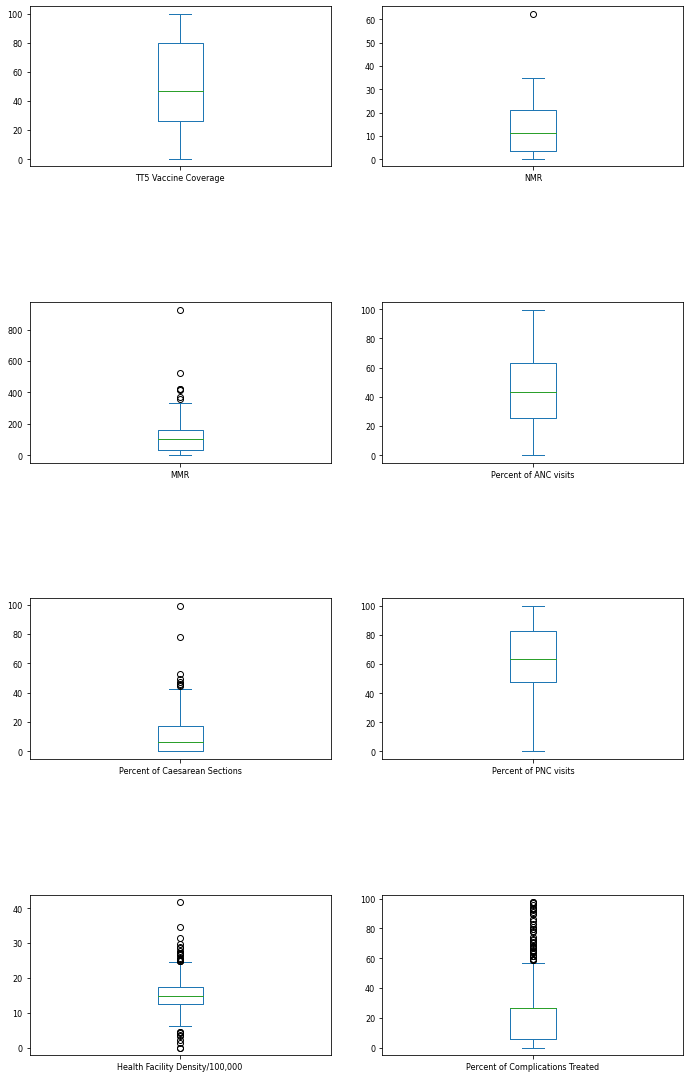

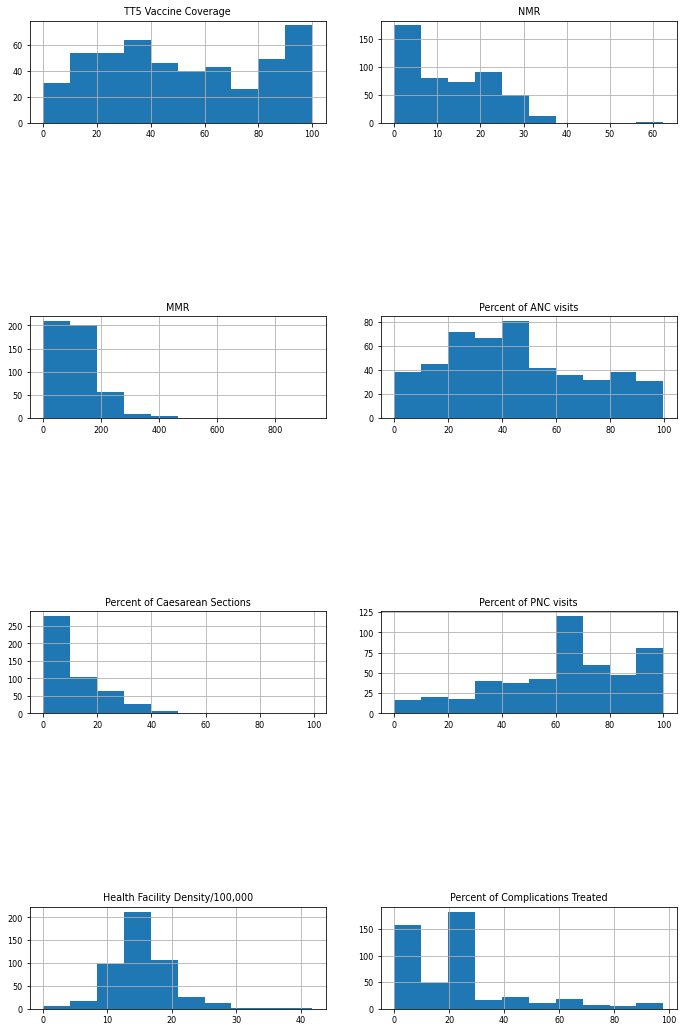

In [240]:
#Boxplots
df2_full.plot(kind='box', subplots=True, layout=(5,2), sharex=False, sharey=False)
plt.tight_layout()
plt.gcf().set_size_inches(10,20)
plt.rcParams.update({'font.size': 8})
plt.show()


#Histograms
df2_full.hist(layout = (5,2))
plt.tight_layout()
plt.gcf().set_size_inches(10,20)
plt.rcParams.update({'font.size': 8})
plt.show()

Now, compare this with the dataframe that has the empty rows dropped

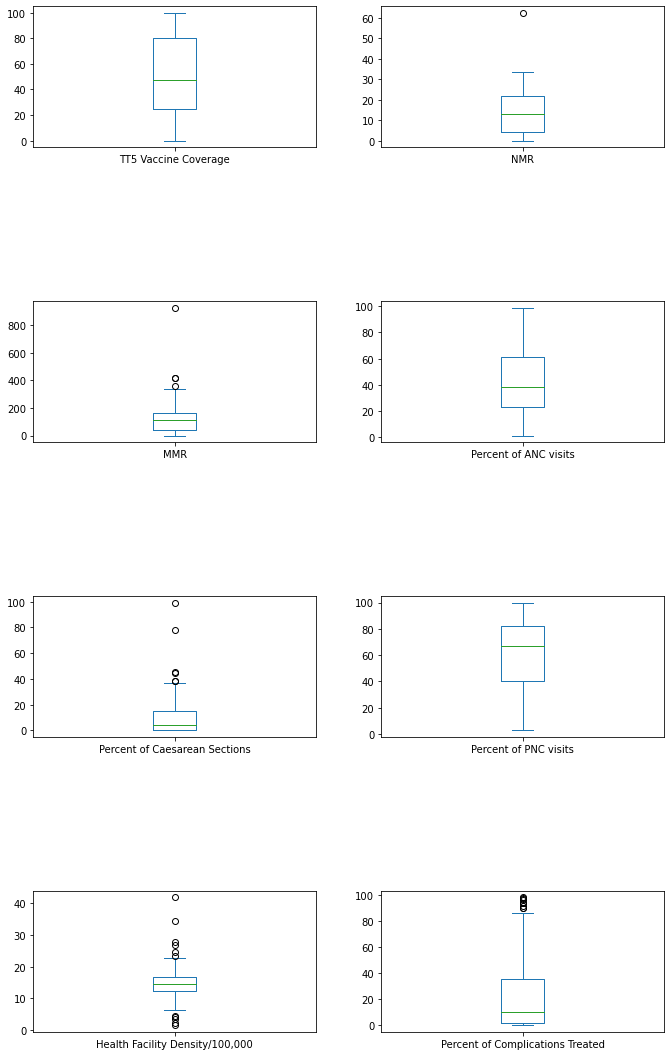

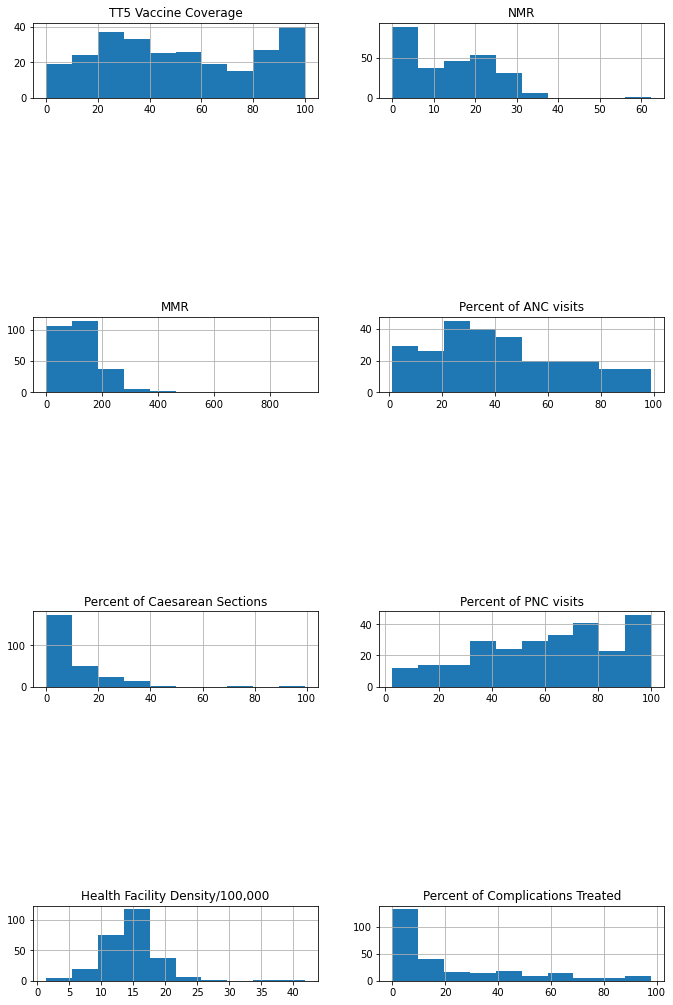

In [225]:
#Boxplots
df3.plot(kind='box', subplots=True, layout=(5,2), sharex=False, sharey=False)
plt.tight_layout()
plt.gcf().set_size_inches(10,20)
plt.show()

#Histograms
df3.hist(layout = (5,2))
plt.tight_layout()
plt.gcf().set_size_inches(10,20)
plt.show()

Now compare this with a heatmap of correlation

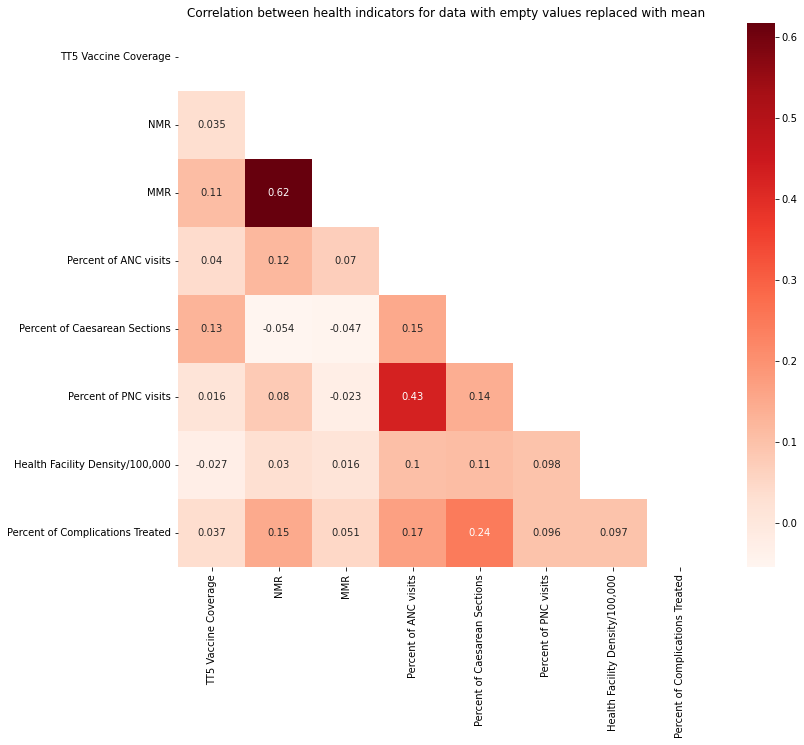

In [226]:
##Visualise heat map to see if there is any correlation between measures
plt.figure(figsize=(12,10))
cor = df2_full.corr()
matrix = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, mask = matrix)
plt.title('Correlation between health indicators for data with empty values replaced with mean')
plt.show()

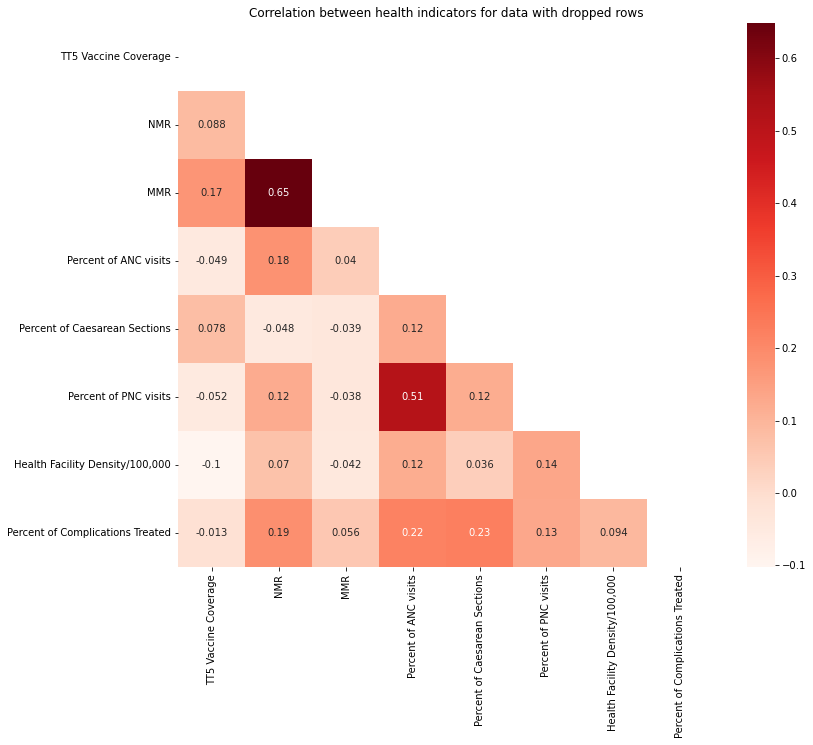

In [227]:
##Visualise heat map to see if there is any correlation between measures
plt.figure(figsize=(12,10))
cor = df3.corr()
matrix = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, mask = matrix)
plt.title('Correlation between health indicators for data with dropped rows')
plt.show()

Upon plotting a heat map of correlation for both data that has empty values replaced with mean or empty values dropped altogether, it appears the latter has overall higher values of correlation. Therefore, only this dataset will be used herein.

Firstly, I need to tidy the dataframe so that dimensionality reduction techniques can be performed on it. 

In [269]:
#Make a copy of the dataframe to avoid overwriting it
df4 = df3.copy()

#Reset index to replace locations with numbers as locations are no longer needed
df4 = df4.reset_index(drop=True)

#Inspect dataframe
df4

,TT5 Vaccine Coverage,NMR,MMR,Percent of ANC visits,Percent of Caesarean Sections,Percent of PNC visits,"Health Facility Density/100,000",Percent of Complications Treated
0,82.0,17.9,214,60.85,4.32,35.77,19.718310,11.08
1,29.0,12.2,180,24.59,34.41,46.35,19.580420,44.51
2,40.0,22.4,417,50.21,10.64,63.61,8.387097,23.96
3,63.0,23.4,361,30.62,7.22,67.90,22.121212,0.00
4,66.0,11.9,334,29.79,26.73,24.96,16.250000,15.81
...,...,...,...,...,...,...,...,...
260,21.0,6.8,64,46.59,15.79,76.96,17.176471,59.55
261,9.0,22.5,156,31.69,9.75,30.82,12.350598,10.18
262,32.0,29.2,150,42.83,2.43,97.17,14.765101,12.62
263,10.0,19.0,177,49.08,11.73,49.24,14.671815,26.53


As the MMR is the key factor I am investigating, I separate this out as the target. I then categorise the MMR into 5 categories based on the size of the MMR. This is to see whether sub-districts with similiar values for MMR seem to cluster together. 

The first category is based on the SDG goal of an MMR of 70 by 2030. The remaining intervals are divided such that each category increments by a value of 50.

In [270]:
#Locate MMR values 
mmr_mag = df4.values[:,2]

#Replace MMR values <70 with 0
mmr_mag = np.where(mmr_mag <= 70, 0, mmr_mag)
#Replace MMR values >70 and <100 with 1
mmr_mag = np.where(((mmr_mag > 70) & (mmr_mag <= 120)), 1, mmr_mag)
#Replace MMR values >100 and <150 with 2
mmr_mag = np.where(((mmr_mag > 120) & (mmr_mag <= 170)), 2, mmr_mag)
#Replace MMR values >150 and <200 with 3
mmr_mag = np.where(((mmr_mag > 170) & (mmr_mag <= 220)), 3, mmr_mag)
#Replace MMR values >200 with 4
mmr_mag = np.where(mmr_mag >= 220, 4, mmr_mag)


#Now add this to existing dataframe
mmr_score_df = pd.DataFrame(mmr_mag)

df4 = df4.join(mmr_score_df)

In [271]:
#Now amend df2 so that it only contains NMR score 0-4
df4 = df4.drop(['MMR'],axis = 1)
df4['MMR_score'] = df4[[0]]
df4 = df4.drop([0], axis = 1)

In [272]:
#Replace values of 0-4 with ranges used
df4['MMR_score'] = df4['MMR_score'].replace(0,'<70 MMR')
df4['MMR_score'] = df4['MMR_score'].replace(1,'70-120 MMR')
df4['MMR_score'] = df4['MMR_score'].replace(2,'120-170 MMR')
df4['MMR_score'] = df4['MMR_score'].replace(3,'170-220 MMR')
df4['MMR_score'] = df4['MMR_score'].replace(4,'>220 MMR')

#Inspect dataframe
df4

,TT5 Vaccine Coverage,NMR,Percent of ANC visits,Percent of Caesarean Sections,Percent of PNC visits,"Health Facility Density/100,000",Percent of Complications Treated,MMR_score
0,82.0,17.9,60.85,4.32,35.77,19.718310,11.08,170-220 MMR
1,29.0,12.2,24.59,34.41,46.35,19.580420,44.51,170-220 MMR
2,40.0,22.4,50.21,10.64,63.61,8.387097,23.96,>220 MMR
3,63.0,23.4,30.62,7.22,67.90,22.121212,0.00,>220 MMR
4,66.0,11.9,29.79,26.73,24.96,16.250000,15.81,>220 MMR
...,...,...,...,...,...,...,...,...
260,21.0,6.8,46.59,15.79,76.96,17.176471,59.55,<70 MMR
261,9.0,22.5,31.69,9.75,30.82,12.350598,10.18,120-170 MMR
262,32.0,29.2,42.83,2.43,97.17,14.765101,12.62,120-170 MMR
263,10.0,19.0,49.08,11.73,49.24,14.671815,26.53,170-220 MMR


### Dimensionality Reduction with Principal Component Analysis (PCA)

Now the data is ready for a PCA. 

In [273]:
#Define features that impact the target
features = ['TT5 Vaccine Coverage', 'NMR','Percent of ANC visits', 'Percent of Caesarean Sections', 'Percent of PNC visits', 'Health Facility Density/100,000', 'Percent of Complications Treated']

# Separating out the features
x = df4.loc[:, features].values

# Separating out the target - which in this case is the MMR
y = df4.loc[:,['MMR_score']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [274]:
##Check data has been normalised. Should have mean as close to 0 and sd as close to 1, as possible
np.mean(x),np.std(x)

(4.165580728512717e-17, 1.0)

In [275]:
#Call pca function and put into dataframe
pca = PCA(n_components = 7)
principalComponents = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principalComponents, columns = ['pc_1', 'pc_2', 'pc_3','pc_4','pc_5','pc_6','pc_7'])

In [276]:
#Add primary indicator to the dataframe, the MMR
final_df = pd.concat([principal_df, df4[['MMR_score']]], axis = 1)
final_df

,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,MMR_score
0,0.013470,-0.180386,-0.809053,0.628631,1.349932,-0.212859,1.252901,170-220 MMR
1,0.450642,-0.410886,1.917937,1.697839,0.177143,0.814074,-0.122567,170-220 MMR
2,0.196015,-0.452755,-0.544614,-0.571398,-1.323260,0.638794,0.049791,>220 MMR
3,0.209983,0.480496,-0.820664,0.932422,1.669154,0.703781,-0.368530,>220 MMR
4,-0.729172,-1.066246,0.968816,0.783272,0.667468,0.721112,0.675335,>220 MMR
...,...,...,...,...,...,...,...,...
260,1.130938,0.494998,1.337521,0.680431,-0.544630,-0.614049,-0.409565,<70 MMR
261,-0.829687,0.480458,-0.212462,0.716729,-1.184139,1.281615,0.462747,120-170 MMR
262,0.960439,0.776723,-1.313380,-0.113871,-0.287076,0.870396,-0.954266,120-170 MMR
263,0.261879,0.664572,0.185366,0.653409,-0.939388,0.706224,0.444073,170-220 MMR


Visualise the variance explained by each principal component with a bar graph

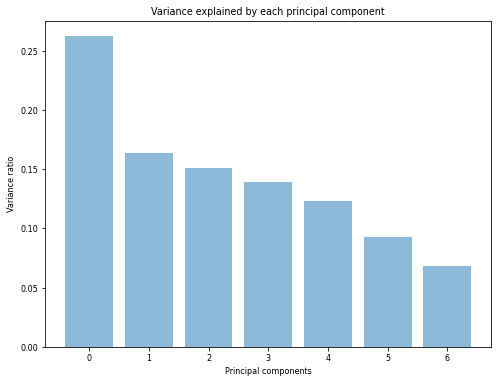

In [277]:
##Add in bar graph for variance ratio for all different components. First principal component should explain the most variance 
var_expl = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.bar(range(7), var_expl, alpha=0.5, align='center')
plt.title('Variance explained by each principal component')
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

In [278]:
##Function to visualise PCA scores

def pca_plot(pc1_label, pc2_label, pc1_no, pc2_no):
    
    fig = plt.figure(figsize = (8,8))

    targets = ['<70 MMR', '70-120 MMR','120-170 MMR','170-220 MMR','>220 MMR']
    colors = ['r', 'b', 'g','c']
    for target, color in zip(targets,colors):
        indicesToKeep = final_df['MMR_score'] == target
        plt.scatter(final_df.loc[indicesToKeep, 'pc_1']
               , final_df.loc[indicesToKeep, 'pc_2']
               , c = color
               , s = 10)

    plt.title("PCA of Maternal Mortality Rate in Bangladesh")
    plt.legend(targets,loc=2, shadow=False)    
    plt.xlabel(pc1_label + ' : ' + str(round(var_expl[pc1_no]*100,1)) + '% variance explained')
    plt.ylabel(pc2_label + ' : ' + str(round(var_expl[pc2_no]*100,1)) + '% variance explained'
          )    
    plt.show()
    
    return(plt.show())

Visualise the Score Plots for each of the principal components

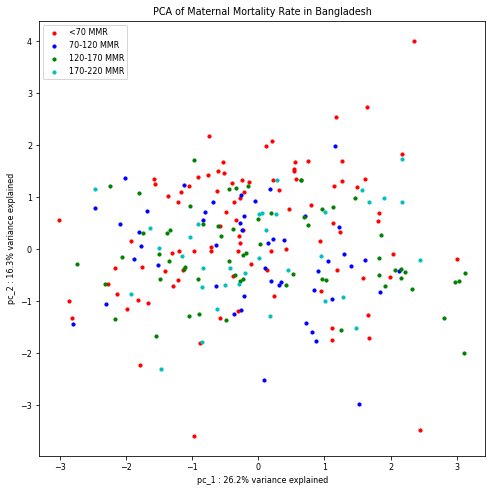

In [279]:
#PCA plot for first two principal components
pca_plot('pc_1','pc_2',0,1)

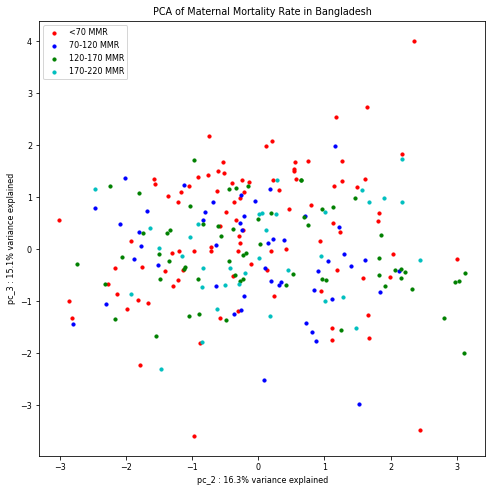

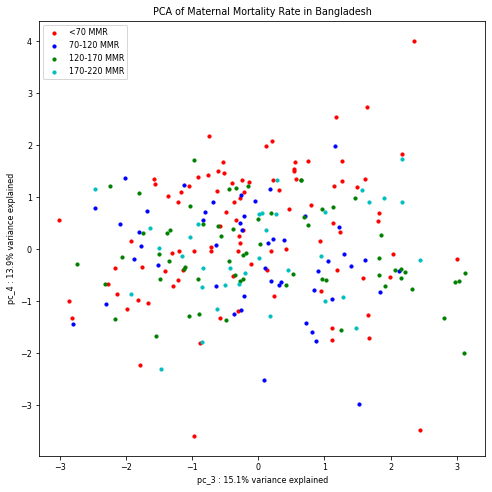

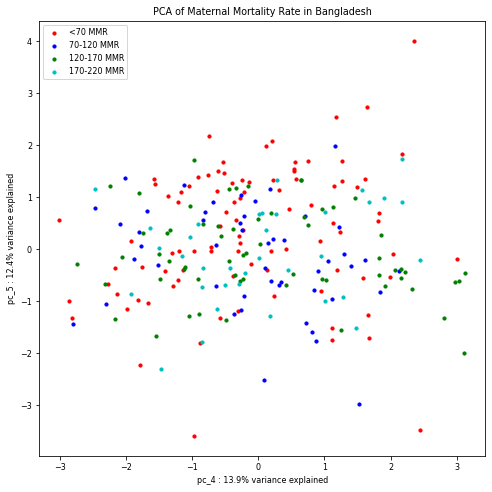

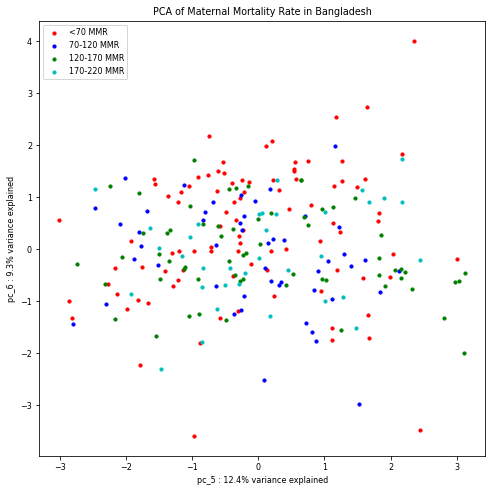

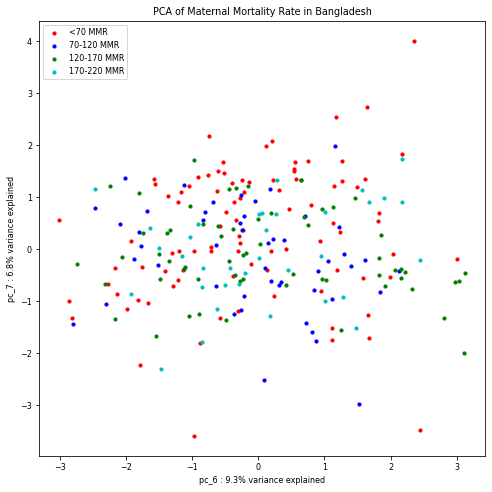

In [280]:
#PCA plot for other principal components
pca_plot('pc_2','pc_3',1,2)
pca_plot('pc_3','pc_4',2,3)
pca_plot('pc_4','pc_5',3,4)
pca_plot('pc_5','pc_6',4,5)
pca_plot('pc_6','pc_7',5,6)